Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import logging

In [2]:
logging.disable(logging.DEBUG)

In [3]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [4]:
from nnest import NestedSampler, MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *
from nnest.distributions import *

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Likelihood + prior
like = Himmelblau(2)
transform = lambda x: 5*x
prior = UniformPrior(2, -5, 5)
#like = Rosenbrock(2)
#transform = lambda x: 5*x
#prior = UniformPrior(2, -2, 5)
#prior = UniformPrior(4, -2, 5)
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
like = Eggbox(2)
transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 3*x
#prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [7]:
base_dist = None
#base_dist = GeneralisedNormal(torch.zeros(like.x_dim), torch.ones(like.x_dim), torch.tensor(8.0))

In [8]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, 
                        num_blocks=3, flow='spline', base_dist=base_dist)

Creating directory for new run logs/test/run7
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fea

In [9]:
sampler.run(mcmc_steps=5*like.x_dim, volume_switch=0.01)

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [0.0100]
[nnest.sampler] [INFO] Step [0] loglstar [1.0557e+00] max logl [2.4268e+02] logz [-5.8525e+00] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [7.3002e+00] max logl [2.4268e+02] logz [3.5698e+00] vol [8.18731e-01] ncalls [1226] mean calls [1.0000]
[nnest.sampler] [INFO] Step [400] loglstar [1.7957e+01] max logl [2.4268e+02] logz [1.3676e+01] vol [6.70320e-01] ncalls [1503] mean calls [1.4000]
[nnest.sampler] [INFO] Step [600] loglstar [2.8652e+01] max logl [2.4284e+02] logz [2.4241e+01] vol [5.48812e-01] ncalls [1782] mean calls [1.4000]
[nnest.sampler] [INFO] Step [800] loglstar [3.6839e+01] max logl [2.4284e+02] logz [3.1983e+01] vol [4.49329e-01] ncalls [2180] mean calls [2.0000]
[nnest.sampler] [INFO] Step [1000] loglstar [4.7871e+01] max logl [2.4284e+02] logz [4.2318e+01] vol [3.67879e-01] ncalls [2642] m

---------------------
[[ 0.79763335  0.8112248 ]
 [-0.782778   -0.8117893 ]
 [ 0.7883316   0.8238141 ]
 [-0.81614524 -0.7946243 ]
 [-0.3960314   0.37850547]
 [ 0.8256537  -0.8088901 ]
 [-0.3988232   0.36913955]
 [ 0.0165348  -0.78116834]
 [-0.7898419  -0.01577847]
 [ 0.39929327  0.4195999 ]]
tensor([[ 1.0024,  1.3940],
        [-0.6125, -1.6150],
        [ 0.8226,  1.9348],
        [-1.7056, -1.1383],
        [-0.5434,  0.3372],
        [ 1.9765, -1.7070],
        [-0.5606,  0.3102],
        [ 0.1453, -0.9941],
        [-0.9738, -0.0076],
        [ 0.3701,  0.6849]])
tensor([[ 1.1218,  1.5850],
        [-0.5253, -1.7174],
        [ 0.9224,  1.9614],
        [-1.8120, -1.1487],
        [-0.5086,  0.3113],
        [ 2.0486, -1.5859],
        [-0.5131,  0.3391],
        [ 0.2043, -0.9249],
        [-1.0499, -0.1542],
        [ 0.3593,  0.6589]])
[[ 0.8020761   0.81664485]
 [-0.75949466 -0.8183126 ]
 [ 0.7932222   0.8249744 ]
 [-0.8189906  -0.79452986]
 [-0.3869971   0.36966157]
 [ 0.82685

---------------------
[[-0.8099761  -0.77992135]
 [-0.7705209   0.00445769]
 [-0.80248755 -0.02754006]
 [-0.7898167  -0.80661166]
 [-0.01871679  0.01831159]
 [ 0.01384974 -0.01866325]
 [-0.40006706 -0.37860486]
 [-0.8142186   0.02650667]
 [ 0.01642234 -0.00220126]
 [-0.4125677   0.39362955]]
tensor([[-1.6120, -0.6582],
        [-0.7172,  0.1562],
        [-1.3435, -0.1300],
        [-0.7389, -1.4489],
        [-0.1694,  0.1111],
        [ 0.0994, -0.1907],
        [-0.4232, -0.3637],
        [-1.8024,  0.2828],
        [ 0.1142,  0.0047],
        [-0.5864,  0.4039]])
tensor([[-3.3371, -0.3539],
        [-2.0946,  3.4052],
        [-0.2256, -2.6075],
        [ 0.8968,  2.2627],
        [-2.0595,  0.2350],
        [ 0.6491, -0.8469],
        [-0.8732,  0.8593],
        [-3.1675,  2.6162],
        [ 4.7879, -0.2463],
        [-1.2129, -0.2977]])
[[-1.06342    -0.54408187]
 [-0.8987629   1.6328272 ]
 [-0.46566245 -0.85041213]
 [ 0.79135585  0.83386075]
 [-0.82118833  0.01183396]
 [ 0.40109

---------------------
[[ 0.02391702  0.01138569]
 [ 0.80443573 -0.00785763]
 [-0.02217294 -0.78903836]
 [ 0.8108536  -0.8202296 ]
 [-0.78802484 -0.80000055]
 [ 0.37459764  0.40025488]
 [-0.7930874   0.02474426]
 [-0.8052152   0.80773586]
 [ 0.407765   -0.40586796]
 [ 0.7997969   0.0251588 ]]
tensor([[ 0.1349,  0.1076],
        [ 1.2020, -0.1410],
        [-0.1676, -1.0680],
        [ 1.2778, -2.1565],
        [-0.7948, -1.1569],
        [ 0.2884,  0.6003],
        [-1.1039,  0.2733],
        [-1.4323,  1.4610],
        [ 0.5936, -0.6768],
        [ 1.2391,  0.2035]])
tensor([[-0.6912, -0.2930],
        [ 0.5773, -1.6529],
        [-0.6409, -0.4684],
        [-0.6095, -0.9622],
        [-0.0956, -5.3136],
        [-0.8052,  3.8769],
        [ 0.0465, -0.8607],
        [-2.4255,  1.6629],
        [ 0.5480,  1.0488],
        [ 1.8395, -1.4376]])
[[-0.78364915 -0.4935121 ]
 [ 0.40476498 -0.80094314]
 [-0.7660869  -0.7618779 ]
 [-0.76906043 -0.79880846]
 [-0.7796159  -2.1847765 ]
 [ 0.20476

---------------------
[[ 0.8108536  -0.8202296 ]
 [-0.8294216  -0.00311154]
 [-0.792247    0.81002426]
 [-0.00583299 -0.8179961 ]
 [-0.3890361   0.40076813]
 [ 0.7986339   0.7884683 ]
 [ 0.02303704 -0.77863026]
 [-0.39461142 -0.37740433]
 [-0.3762549   0.39863408]
 [-0.8022078  -0.02993964]]
tensor([[ 1.2778, -2.1565],
        [-2.2776,  0.1547],
        [-1.0884,  1.5993],
        [-0.0935, -2.0033],
        [-0.4442,  0.4482],
        [ 1.1163,  0.8091],
        [ 0.1637, -0.9651],
        [-0.3737, -0.3627],
        [-0.3887,  0.4379],
        [-1.3344, -0.1389]])
tensor([[ 2.0567, -1.4707],
        [-1.4582,  0.9640],
        [-2.4615,  1.6561],
        [-1.1274, -1.1561],
        [ 0.8220,  0.4553],
        [ 2.1832, -0.3818],
        [ 1.9312, -2.4161],
        [ 0.3821,  1.9834],
        [-2.6393,  0.1789],
        [-0.9815,  0.2940]])
[[ 8.2658470e-01 -8.0274665e-01]
 [-8.0864602e-01  7.9729229e-01]
 [-8.3786952e-01  8.1372809e-01]
 [-8.0078620e-01 -7.9750597e-01]
 [ 7.3972136e

---------------------
[[ 0.8259746   0.7836385 ]
 [ 0.8256434   0.80740035]
 [-0.7951115  -0.80281174]
 [-0.426719   -0.41100323]
 [ 0.7825541  -0.02422898]
 [ 0.8239082  -0.8059089 ]
 [-0.81259835 -0.80346555]
 [-0.3910906   0.39590108]
 [-0.8198538  -0.78739697]
 [ 0.7975858   0.7840873 ]]
tensor([[ 2.0922,  0.6893],
        [ 2.0449,  1.1401],
        [-0.8911, -1.3299],
        [-0.5041, -0.5848],
        [ 0.8337, -0.2966],
        [ 1.9215, -1.5897],
        [-1.4160, -1.4649],
        [-0.4786,  0.4172],
        [-1.9273, -0.9030],
        [ 1.1165,  0.7556]])
tensor([[ 1.6750,  0.6499],
        [ 3.8377,  0.8583],
        [ 0.4253,  0.0075],
        [-1.2236, -1.2934],
        [ 1.4519,  0.0564],
        [ 3.4328, -3.8203],
        [-2.9427,  1.7829],
        [ 1.5888,  1.3221],
        [-1.4761, -1.2438],
        [-1.8819, -0.0161]])
[[ 0.8124554   0.77444726]
 [ 1.2875762   0.8193336 ]
 [ 0.39344922 -0.00361461]
 [-0.80549    -0.80017096]
 [ 0.81004214  0.00961943]
 [ 1.04379

---------------------
[[-0.79438615 -0.81140727]
 [-0.02441759 -0.01282784]
 [-0.80224395 -0.78531426]
 [ 0.8223932  -0.01848214]
 [ 0.00973803 -0.00761213]
 [-0.78802484 -0.80000055]
 [-0.79908425  0.76901966]
 [-0.79252785 -0.7775569 ]
 [-0.8302306  -0.80142343]
 [-0.00364788 -0.7953305 ]]
tensor([[-0.7889, -1.6810],
        [-0.1869, -0.1606],
        [-1.3161, -0.7545],
        [ 1.8593, -0.2658],
        [ 0.0875, -0.0622],
        [-0.7948, -1.1569],
        [-1.1601,  0.5316],
        [-1.0547, -0.5575],
        [-2.1194, -1.4513],
        [-0.0135, -1.2525]])
tensor([[-2.9128, -2.6903],
        [-2.6383, -2.1203],
        [-2.9533, -1.5381],
        [ 2.4209, -2.3202],
        [-1.0877, -0.9509],
        [ 0.0112, -0.4173],
        [-3.5724,  1.3051],
        [-1.1189, -3.5838],
        [-1.1627,  0.9136],
        [ 0.4603, -0.5057]])
[[-0.938413   -0.8749695 ]
 [-0.8548713  -0.8213086 ]
 [-0.94664675 -0.8121318 ]
 [ 0.8412992  -0.8250763 ]
 [-0.7967227  -0.7927945 ]
 [-0.00229

---------------------
[[-3.0147318e-02  7.9785031e-01]
 [-7.7436084e-01  8.0152249e-01]
 [ 3.7219033e-03 -1.7149670e-03]
 [ 4.0455723e-01  4.2908767e-01]
 [ 8.1352174e-01  2.5479740e-02]
 [ 4.0765718e-01 -3.9872679e-01]
 [ 8.1330186e-01  8.1407923e-01]
 [ 7.8722072e-01  7.7880818e-01]
 [-2.3651253e-04 -7.9528975e-01]
 [ 2.8966334e-02  8.0983877e-01]]
tensor([[-3.3693e-01,  1.2257e+00],
        [-8.1106e-01,  1.2463e+00],
        [ 5.8658e-02,  1.6168e-03],
        [ 4.0519e-01,  7.0947e-01],
        [ 1.7047e+00,  2.0336e-01],
        [ 6.1139e-01, -5.9261e-01],
        [ 1.5455e+00,  1.4314e+00],
        [ 9.3129e-01,  7.2632e-01],
        [ 2.6526e-02, -1.2586e+00],
        [ 3.7930e-02,  1.6427e+00]])
tensor([[-2.7028, -0.0252],
        [ 0.7368,  0.7842],
        [ 1.0007, -0.5982],
        [ 0.9770, -1.5548],
        [ 3.4212, -0.3471],
        [ 0.4334, -0.5031],
        [ 1.6109,  0.1508],
        [ 0.5681, -0.2354],
        [ 2.1961,  0.6182],
        [-3.3101,  2.6459]])
[[-0.

---------------------
[[-0.02664623  0.80911785]
 [ 0.37654397 -0.39028203]
 [-0.02208819  0.79113257]
 [-0.79443884 -0.02277376]
 [ 0.7872207   0.7788082 ]
 [ 0.8133509   0.01010882]
 [ 0.41632485  0.41958347]
 [-0.39451227  0.41304785]
 [ 0.80281794 -0.7818516 ]
 [-0.8198538  -0.78739697]]
tensor([[-0.3521,  1.5224],
        [ 0.3724, -0.4717],
        [-0.3111,  1.0930],
        [-1.0814, -0.0986],
        [ 0.9313,  0.7263],
        [ 1.5794,  0.0611],
        [ 0.5647,  0.6781],
        [-0.4585,  0.5087],
        [ 1.3336, -0.9343],
        [-1.9273, -0.9030]])
tensor([[-1.4483,  1.9198],
        [ 1.5899,  0.5545],
        [-2.6039,  2.3633],
        [-1.1437, -4.0639],
        [ 0.3566,  0.9689],
        [ 1.9143, -3.2440],
        [ 0.2712,  2.8459],
        [ 1.1061, -0.2646],
        [-1.2597,  0.7241],
        [-5.2390,  0.2602]])
[[-0.80199504  0.8174337 ]
 [ 0.79201406  0.6140027 ]
 [-0.85497475  0.8325975 ]
 [-0.8392382  -1.634969  ]
 [ 0.43421516  0.7170963 ]
 [ 0.67700

---------------------
[[ 0.02329688  0.81770784]
 [-0.8248264  -0.8002337 ]
 [-0.81893146 -0.0051302 ]
 [ 0.823956   -0.8134322 ]
 [-0.00676693  0.7918707 ]
 [ 0.8198426  -0.8094821 ]
 [-0.7692738  -0.797462  ]
 [-0.7705209   0.00445769]
 [-0.00675206 -0.02057745]
 [-0.807697   -0.00195157]]
tensor([[ 0.0056,  1.7994],
        [-1.9388, -1.3897],
        [-1.9710,  0.1327],
        [ 1.8673, -1.8910],
        [-0.2243,  1.1203],
        [ 1.7130, -1.7313],
        [-0.6157, -0.9178],
        [-0.7172,  0.1562],
        [-0.0616, -0.2359],
        [-1.5714,  0.1477]])
tensor([[ 0.6270,  4.1629],
        [-1.9816, -2.1461],
        [-1.3504, -1.1561],
        [ 0.0971, -3.9114],
        [-0.6037,  1.8886],
        [ 0.8590, -3.2029],
        [ 0.3202, -1.1061],
        [-0.4107,  0.3841],
        [-1.3361,  0.7804],
        [-1.5965, -0.3615]])
[[ 1.4427783   1.6866218 ]
 [-0.8290527  -0.8217411 ]
 [-0.80717915 -0.7964241 ]
 [-0.6448151  -1.5743803 ]
 [-0.4049826   0.7995169 ]
 [ 0.49333

---------------------
[[ 0.01888433 -0.80208546]
 [ 0.7833097  -0.82567215]
 [ 0.81593984  0.02176034]
 [-0.7720552   0.005462  ]
 [-0.4223763  -0.39563116]
 [-0.01216731  0.02268845]
 [ 0.4184074   0.37530643]
 [ 0.38544938  0.4258519 ]
 [ 0.8264445   0.01135553]
 [-0.02699328 -0.81440437]]
tensor([[ 0.1196, -1.4997],
        [ 0.7650, -2.3283],
        [ 1.7783,  0.1810],
        [-0.7310,  0.1653],
        [-0.5076, -0.4558],
        [-0.0876,  0.1312],
        [ 0.5982,  0.4844],
        [ 0.3001,  0.7032],
        [ 2.1344,  0.0734],
        [-0.1665, -1.8182]])
tensor([[-1.1207,  0.4521],
        [ 0.1597, -1.7209],
        [ 0.8468, -0.6632],
        [-1.8224,  0.4369],
        [-0.5434,  0.4128],
        [ 0.7427, -0.1300],
        [ 2.7286,  0.5118],
        [-1.0189,  3.0658],
        [ 3.4278, -2.6656],
        [ 1.4037, -1.0197]])
[[-0.79312325  0.5570716 ]
 [ 0.0294239  -0.8079293 ]
 [ 0.7894906  -0.43148622]
 [-0.8113726   0.58521575]
 [-0.40048468  0.39519927]
 [ 0.70592

---------------------
[[ 0.41688177 -0.386609  ]
 [ 0.7934769   0.78869784]
 [ 0.7791282  -0.02193093]
 [ 0.38082778 -0.3918851 ]
 [ 0.79480845  0.8178717 ]
 [ 0.81696606  0.79970294]
 [ 0.78961897  0.8031613 ]
 [ 0.7716023  -0.01079267]
 [-0.3926486  -0.38298613]
 [-0.7920355   0.01846517]]
tensor([[ 0.6664, -0.4385],
        [ 0.9925,  0.8274],
        [ 0.8141, -0.2773],
        [ 0.3858, -0.4889],
        [ 0.9314,  1.6691],
        [ 1.6871,  0.9595],
        [ 0.8584,  1.1632],
        [ 0.7863, -0.1683],
        [-0.3497, -0.3807],
        [-1.0819,  0.2534]])
tensor([[ 3.1119, -1.5565],
        [-1.3010,  1.4098],
        [ 1.6088, -4.2953],
        [ 2.8348,  1.1700],
        [ 0.7198,  4.1565],
        [ 2.3299,  1.2318],
        [-0.4152,  0.9743],
        [ 2.2403, -1.3397],
        [-0.3869, -2.4109],
        [-3.1699,  0.8082]])
[[ 1.0668614  -0.8179087 ]
 [-0.80159074  0.80650073]
 [ 0.23922156 -1.7583731 ]
 [ 0.9211773   0.81376404]
 [ 1.4534452   1.7085288 ]
 [ 0.83378

---------------------
[[-0.37329987 -0.40580812]
 [ 0.7890844  -0.01665198]
 [-0.39624837 -0.3905744 ]
 [ 0.82089037 -0.00320197]
 [ 0.01568804  0.00610363]
 [-0.4034892   0.3961429 ]
 [-0.7825077   0.7850065 ]
 [ 0.00973803 -0.00761213]
 [ 0.82054716  0.79872257]
 [ 0.7847822   0.8154521 ]]
tensor([[-0.2711, -0.5808],
        [ 0.8979, -0.2291],
        [-0.3601, -0.4195],
        [ 1.8253, -0.0979],
        [ 0.1107,  0.0764],
        [-0.5558,  0.4184],
        [-0.7829,  0.6908],
        [ 0.0875, -0.0622],
        [ 1.8324,  0.9250],
        [ 0.7563,  1.6199]])
tensor([[-1.2005, -0.5039],
        [ 2.0811,  1.4864],
        [-1.0396, -0.8811],
        [ 1.9125,  0.6959],
        [ 1.1182, -4.2823],
        [ 1.5960, -1.3757],
        [ 0.2405,  3.2539],
        [-1.7322, -0.4803],
        [ 0.9681, -1.6676],
        [ 2.1525,  3.3549]])
[[-0.7975144  -0.7724586 ]
 [ 0.82569444  0.81662554]
 [-0.794443   -0.7911474 ]
 [ 0.82081074  0.7832553 ]
 [ 0.15172717 -1.7413936 ]
 [ 0.81520

---------------------
[[ 0.78609276 -0.01417281]
 [ 0.3948785  -0.3788091 ]
 [-0.0085167   0.0145736 ]
 [ 0.40071118 -0.3962435 ]
 [-0.77454275 -0.8021875 ]
 [-0.7843795  -0.7973426 ]
 [ 0.82789266  0.80317867]
 [-0.00620336 -0.00856577]
 [-0.01611296  0.7823547 ]
 [ 0.0256529   0.01014691]]
tensor([[ 0.8676, -0.2041],
        [ 0.4820, -0.4143],
        [-0.0419,  0.1047],
        [ 0.5358, -0.5496],
        [-0.6195, -1.1329],
        [-0.7689, -1.0230],
        [ 2.1179,  1.0087],
        [-0.0233, -0.0891],
        [-0.2819,  0.9749],
        [ 0.1392,  0.1022]])
tensor([[ 3.0690e-01, -1.9889e+00],
        [-9.7494e-01, -1.3378e+00],
        [-1.4548e+00,  1.0159e+00],
        [ 1.9280e+00, -3.4574e+00],
        [ 5.4252e-04, -1.9724e+00],
        [-3.7999e-01, -2.3704e+00],
        [ 2.0501e+00,  1.4301e+00],
        [-1.3418e-01,  1.1173e+00],
        [ 9.3804e-01, -2.0626e+00],
        [-8.7387e-01,  8.3657e-01]])
[[ 3.5459620e-01 -8.0959713e-01]
 [-7.9837692e-01 -8.0242676e-01]

---------------------
[[-0.82718396  0.79059094]
 [-0.7922107  -0.8283154 ]
 [ 0.78227097 -0.8223658 ]
 [ 0.39347565  0.3831824 ]
 [-0.78258723  0.00840772]
 [ 0.01125547 -0.8024551 ]
 [-0.4157637   0.40163046]
 [-0.8023799   0.8000012 ]
 [ 0.39682135  0.41194165]
 [ 0.39828476  0.4047665 ]]
tensor([[-2.1573,  0.6710],
        [-0.6372, -2.2588],
        [ 0.7583, -2.2151],
        [ 0.3559,  0.5144],
        [-0.8734,  0.1956],
        [ 0.0872, -1.4960],
        [-0.5942,  0.4517],
        [-1.2617,  1.1010],
        [ 0.3593,  0.6589],
        [ 0.3747,  0.6263]])
tensor([[-2.7520, -0.7976],
        [-0.1823, -0.8194],
        [ 0.6587, -2.2212],
        [ 1.2214,  2.0045],
        [-0.7591,  1.5640],
        [ 0.0294, -3.8526],
        [-1.1984, -0.3634],
        [ 0.7459,  2.4288],
        [ 0.6408,  0.4649],
        [ 1.1589,  3.1657]])
[[-0.8880771  -0.7792438 ]
 [-0.03232718 -0.7662524 ]
 [ 0.43033522 -0.81848866]
 [ 0.80303186  0.82694787]
 [-0.4466799   0.786446  ]
 [-0.64005

---------------------
[[-0.81874406  0.02208342]
 [ 0.00182097 -0.816162  ]
 [ 0.7922453  -0.808997  ]
 [ 0.7987818   0.79333675]
 [-0.7845621  -0.01538145]
 [ 0.37966353 -0.3801224 ]
 [-0.38931906  0.3743452 ]
 [-0.784396    0.8118099 ]
 [ 0.37212884  0.40075606]
 [ 0.40614352  0.41067415]]
tensor([[-1.9648,  0.2732],
        [ 0.0227, -1.9586],
        [ 0.8685, -1.6980],
        [ 1.0929,  0.8890],
        [-0.8597, -0.0126],
        [ 0.3833, -0.4182],
        [-0.5151,  0.3243],
        [-0.9702,  1.6900],
        [ 0.2835,  0.6028],
        [ 0.4550,  0.6515]])
tensor([[-1.9211,  0.4094],
        [ 0.2748, -1.9533],
        [ 0.9047, -1.6923],
        [ 1.1486,  0.7463],
        [-0.9920,  0.0196],
        [ 0.3659, -0.4795],
        [-0.5406,  0.2103],
        [-0.9551,  1.7455],
        [ 0.2502,  0.4629],
        [ 0.5290,  0.6587]])
[[-0.8145389   0.45756233]
 [ 0.28375286 -0.80919   ]
 [ 0.7944581  -0.80881083]
 [ 0.79864913  0.783482  ]
 [-0.79039395 -0.01358952]
 [ 0.37421

---------------------
[[-7.7699900e-01  6.7825802e-03]
 [-4.1256002e-01  3.8382208e-01]
 [-4.0307540e-01 -3.9755437e-01]
 [ 7.8269551e-03  8.2056820e-01]
 [-3.9461142e-01 -3.7740433e-01]
 [ 7.8302759e-01 -1.5748521e-02]
 [-1.9194282e-04  8.2995427e-01]
 [ 7.9657084e-01  8.0046499e-01]
 [ 7.9520237e-01 -2.0563869e-02]
 [-3.8611716e-01 -3.8339081e-01]]
tensor([[-0.7854,  0.1798],
        [-0.5898,  0.3590],
        [-0.4193, -0.5004],
        [-0.0794,  1.8596],
        [-0.3737, -0.3627],
        [ 0.8411, -0.2193],
        [-0.1547,  2.1007],
        [ 1.0046,  1.0568],
        [ 0.9806, -0.2679],
        [-0.3207, -0.3844]])
tensor([[-0.7628,  0.2757],
        [-0.4735,  0.3080],
        [-0.3218, -0.6124],
        [-0.1084,  1.9159],
        [-0.3134, -0.3203],
        [ 0.8753, -0.1641],
        [-0.2346,  1.9355],
        [ 1.0525,  0.9496],
        [ 0.9099, -0.3256],
        [-0.3993, -0.4143]])
[[-0.77466047  0.02947404]
 [-0.38173404  0.36829025]
 [-0.39612222 -0.41445237]
 [ 0

---------------------
[[-8.1569231e-01  2.2366953e-03]
 [ 8.1184238e-01  8.1400383e-01]
 [ 7.9470700e-01 -9.8198419e-03]
 [ 1.6146088e-02  7.3495698e-03]
 [ 1.7767273e-02 -1.4501536e-02]
 [ 4.0000939e-01 -4.0260920e-01]
 [-2.1425276e-03 -5.4130721e-04]
 [-3.9461142e-01 -3.7740433e-01]
 [-1.7574059e-02  9.5204487e-03]
 [ 7.9248196e-01  7.9509860e-01]]
tensor([[-1.8672,  0.1813],
        [ 1.4844,  1.4347],
        [ 0.9826, -0.1608],
        [ 0.1121,  0.0843],
        [ 0.1167, -0.1378],
        [ 0.4932, -0.6539],
        [ 0.0195,  0.0090],
        [-0.3737, -0.3627],
        [-0.1579,  0.0740],
        [ 0.9402,  0.9467]])
tensor([[-1.9547,  0.0564],
        [ 1.4699,  1.4276],
        [ 0.9460, -0.1201],
        [ 0.2672,  0.2470],
        [ 0.1689,  0.0232],
        [ 0.3000, -0.5552],
        [-0.1425, -0.0114],
        [-0.2745, -0.5706],
        [-0.0085,  0.1302],
        [ 1.0452,  1.0787]])
[[-0.8185475  -0.0136023 ]
 [ 0.81149423  0.81378585]
 [ 0.79206455 -0.00601488]
 [ 0

---------------------
[[ 0.01776727 -0.01450157]
 [-0.39699194  0.39208448]
 [-0.426719   -0.41100323]
 [ 0.7754641   0.7856351 ]
 [-0.01391944  0.01160722]
 [ 0.01008529 -0.81981164]
 [ 0.8012157  -0.79850924]
 [ 0.00567838  0.7723354 ]
 [ 0.02283805  0.80262464]
 [ 0.3959596   0.38885784]]
tensor([[ 0.1167, -0.1378],
        [-0.5302,  0.3951],
        [-0.5041, -0.5848],
        [ 0.7587,  0.8379],
        [-0.1178,  0.0881],
        [ 0.1080, -2.1003],
        [ 1.1260, -1.3191],
        [-0.0196,  0.9091],
        [ 0.0313,  1.4260],
        [ 0.3677,  0.5373]])
tensor([[ 0.3189, -1.6673],
        [ 1.0871, -0.4286],
        [-4.3377, -0.3857],
        [-0.5039,  1.7368],
        [ 1.6732, -1.4473],
        [ 0.3650, -2.6986],
        [ 1.0993, -0.4036],
        [ 0.8580,  0.8059],
        [ 1.0527,  0.5125],
        [-0.8567,  2.4816]])
[[ 0.37096328 -0.7997069 ]
 [ 0.79818416 -0.40107298]
 [-1.5422428  -0.5031513 ]
 [-0.37906057  0.7967247 ]
 [ 0.8177418  -0.80209357]
 [ 0.37219

---------------------
[[ 0.01519234 -0.00619959]
 [-0.02251451 -0.01275091]
 [-0.37865528 -0.4105141 ]
 [ 0.80285597  0.805409  ]
 [ 0.00311617  0.00873725]
 [ 0.00678778 -0.82692885]
 [ 0.81016785 -0.8158251 ]
 [ 0.77353525  0.79805934]
 [ 0.00243102  0.80256146]
 [ 0.4144961   0.3925413 ]]
tensor([[ 0.1096, -0.0424],
        [-0.1805, -0.1577],
        [-0.2761, -0.6031],
        [ 1.1634,  1.1706],
        [ 0.0539,  0.0836],
        [ 0.0975, -2.2994],
        [ 1.2789, -1.9857],
        [ 0.7124,  1.0945],
        [-0.0977,  1.3611],
        [ 0.5686,  0.5497]])
tensor([[ 0.1143,  0.0392],
        [-0.1192, -0.3361],
        [-0.4161, -0.6370],
        [ 1.1363,  1.3213],
        [ 0.0196,  0.1385],
        [ 0.0315, -2.3697],
        [ 1.3001, -2.0344],
        [ 0.7060,  1.1265],
        [-0.2278,  1.4074],
        [ 0.5250,  0.5444]])
[[ 1.6520698e-02  1.1772725e-03]
 [-1.1612252e-02 -1.0255195e-01]
 [-4.1123873e-01 -4.2802832e-01]
 [ 8.0222166e-01  8.0983448e-01]
 [-2.2443112e

---------------------
[[ 0.3987883  -0.393115  ]
 [-0.39624837 -0.3905744 ]
 [-0.38227454  0.3994596 ]
 [-0.7920355   0.01846517]
 [ 0.8073477   0.8044734 ]
 [ 0.01907407 -0.77742225]
 [ 0.8163602   0.0074502 ]
 [-0.00722781 -0.7751883 ]
 [ 0.40729377  0.37375945]
 [-0.7856406  -0.7744604 ]]
tensor([[ 5.1922e-01, -5.0084e-01],
        [-3.6012e-01, -4.1953e-01],
        [-4.0852e-01,  4.4172e-01],
        [-1.0819e+00,  2.5342e-01],
        [ 1.3141e+00,  1.1229e+00],
        [ 1.5468e-01, -9.4493e-01],
        [ 1.6822e+00,  2.8433e-02],
        [ 6.8638e-04, -8.9098e-01],
        [ 4.8679e-01,  4.8208e-01],
        [-8.9444e-01, -5.0205e-01]])
tensor([[ 0.3171, -2.6110],
        [-4.3376,  0.0959],
        [-1.2743, -0.6036],
        [-1.4800,  3.3706],
        [ 0.5877, -2.8004],
        [ 1.1967, -1.8393],
        [ 0.9725, -1.0264],
        [ 0.9529, -2.6015],
        [ 0.4492, -0.9275],
        [-1.2745, -0.4477]])
[[ 0.30667722 -0.8386891 ]
 [-1.4208686   0.85377455]
 [-0.800080

---------------------
[[ 0.40829355 -0.41387758]
 [-0.40458646 -0.38471997]
 [-0.38227454  0.3994596 ]
 [ 0.02239627  0.00999734]
 [ 0.8184985   0.8003833 ]
 [ 0.01907407 -0.77742225]
 [ 0.7770082  -0.79007775]
 [ 0.00459375 -0.8230191 ]
 [ 0.37941423  0.3934661 ]
 [-0.77948236 -0.77912855]]
tensor([[ 0.5905, -0.7186],
        [-0.4461, -0.3823],
        [-0.4085,  0.4417],
        [ 0.1308,  0.1005],
        [ 1.7476,  0.9703],
        [ 0.1547, -0.9449],
        [ 0.8088, -1.0749],
        [ 0.0663, -2.1876],
        [ 0.3028,  0.5598],
        [-0.7800, -0.5425]])
tensor([[ 0.7701, -0.8489],
        [-0.4416, -0.3561],
        [-0.4604,  0.4889],
        [ 0.1028,  0.0235],
        [ 1.8040,  0.9642],
        [ 0.0126, -1.0220],
        [ 0.8732, -1.1960],
        [ 0.2069, -2.1649],
        [ 0.3959,  0.4386],
        [-0.8461, -0.5904]])
[[ 7.6246649e-01 -7.7416122e-01]
 [-4.0165290e-01 -3.7577811e-01]
 [-3.9345038e-01  4.0857980e-01]
 [ 1.3206017e-02 -3.3147895e-04]
 [ 8.1990242e

[nnest.sampler] [INFO] Acceptance [0.3900] min ESS [1.8207] max ESS [2.1774] average jump [0.0196]
[nnest.sampler] [INFO] Step [4800] loglstar [2.3241e+02] maxlogl [2.4298e+02] logz [2.2541e+02] vol [8.22975e-03] ncalls [100429] scale [0.0627]
---------------------
[[-0.776999    0.00678249]
 [-0.02590975 -0.00360292]
 [-0.7920355   0.01846517]
 [ 0.8067295   0.81526613]
 [ 0.00178187 -0.00195041]
 [ 0.37953988 -0.38201848]
 [-0.7829868   0.8036076 ]
 [-0.01265091  0.00164152]
 [ 0.02086068  0.7861064 ]
 [ 0.37714404  0.4073599 ]]
tensor([[-0.7854,  0.1798],
        [-0.1942, -0.0463],
        [-1.0819,  0.2534],
        [ 1.2826,  1.5079],
        [ 0.0468, -0.0029],
        [ 0.3828, -0.4250],
        [-0.8818,  1.3190],
        [-0.0972,  0.0218],
        [ 0.0533,  1.1059],
        [ 0.2895,  0.6382]])
tensor([[ 0.0601, -0.0816],
        [-0.6323, -1.1621],
        [-1.8027, -1.4575],
        [ 3.0149,  2.6158],
        [ 1.2508,  0.5190],
        [-1.1727, -2.8053],
        [-1.01

---------------------
[[-0.01850361  0.01347532]
 [-0.7983309  -0.78243464]
 [-0.7932681   0.00193222]
 [ 0.8062006   0.82729644]
 [ 0.00269253  0.00926829]
 [ 0.37953988 -0.38201848]
 [-0.79135764  0.7942213 ]
 [-0.01605772 -0.00926715]
 [ 0.00233121  0.7756648 ]
 [ 0.37714404  0.4073599 ]]
tensor([[-0.1666,  0.0923],
        [-1.2063, -0.6674],
        [-1.1025,  0.1626],
        [ 1.3443,  2.0084],
        [ 0.0513,  0.0863],
        [ 0.3828, -0.4250],
        [-0.9304,  0.9095],
        [-0.1443, -0.1077],
        [-0.0602,  0.9294],
        [ 0.2895,  0.6382]])
tensor([[-0.1690,  0.1192],
        [-1.2536, -0.7749],
        [-0.9898,  0.2122],
        [ 1.3160,  2.0436],
        [-0.0022,  0.1372],
        [ 0.4107, -0.3680],
        [-0.8898,  1.0027],
        [-0.2352, -0.0950],
        [-0.0308,  0.9311],
        [ 0.2377,  0.6365]])
[[-0.01864958  0.02073708]
 [-0.8005331  -0.7863921 ]
 [-0.78820175  0.01049021]
 [ 0.80533624  0.82814443]
 [-0.00486178  0.02343943]
 [ 0.38369

---------------------
[[ 0.00275589 -0.02652058]
 [-0.00416189 -0.0055366 ]
 [-0.4125677   0.39362955]
 [ 0.81182927  0.01532464]
 [-0.02648192 -0.7953774 ]
 [ 0.8060962  -0.81638056]
 [-0.7737263   0.791942  ]
 [-0.37974828 -0.38551408]
 [-0.37530494 -0.40430796]
 [ 0.01888433 -0.80208546]]
tensor([[ 2.8149e-02, -2.7390e-01],
        [ 2.0381e-04, -5.0767e-02],
        [-5.8642e-01,  4.0387e-01],
        [ 1.5656e+00,  1.2510e-01],
        [-1.8430e-01, -1.2019e+00],
        [ 1.1455e+00, -2.0059e+00],
        [-7.5569e-01,  8.8748e-01],
        [-3.0186e-01, -3.9403e-01],
        [-2.7450e-01, -5.7061e-01],
        [ 1.1955e-01, -1.4997e+00]])
tensor([[ 1.9595,  2.1344],
        [-0.5253, -1.6815],
        [-0.6713,  0.7934],
        [ 0.1575,  2.7479],
        [ 1.8676,  1.1306],
        [ 3.6270, -1.8429],
        [-0.9319,  1.7900],
        [ 2.4677,  0.7895],
        [ 1.1260,  2.0688],
        [ 0.0346, -1.6218]])
[[ 0.819504    0.83142143]
 [-0.7512628  -0.8190447 ]
 [-0.448368

---------------------
[[-0.7829868   0.8036076 ]
 [ 0.8089368  -0.7912623 ]
 [ 0.37714404  0.4073599 ]
 [-0.01165527 -0.7969117 ]
 [ 0.00934088 -0.00434258]
 [ 0.7963022   0.77761847]
 [ 0.8218273  -0.8183595 ]
 [-0.7811282  -0.81865084]
 [ 0.38218084  0.39578342]
 [-0.82077134  0.80641377]]
tensor([[-0.8818,  1.3190],
        [ 1.4757, -1.1169],
        [ 0.2895,  0.6382],
        [-0.1365, -1.2780],
        [ 0.0867, -0.0237],
        [ 1.1385,  0.6976],
        [ 1.7336, -2.0871],
        [-0.5573, -1.8852],
        [ 0.3085,  0.5735],
        [-1.9900,  1.3384]])
tensor([[ 3.1404,  0.8383],
        [ 0.5737, -2.4905],
        [ 0.8591,  1.2861],
        [ 1.1358, -0.6164],
        [-1.6312,  0.4443],
        [ 2.1924,  1.1137],
        [ 1.2026, -1.2494],
        [ 2.0421,  0.2250],
        [ 1.6902,  0.2963],
        [-0.7526,  0.3909]])
[[ 1.0391291   0.81367403]
 [ 0.4030367  -0.8294655 ]
 [ 0.7903378   0.80715823]
 [ 0.8031834  -0.42588916]
 [-0.8064995   0.5991343 ]
 [ 0.82971

---------------------
[[-0.01171539 -0.7745177 ]
 [-0.4070961  -0.41619122]
 [ 0.00548945  0.7769126 ]
 [ 0.81352174  0.02547974]
 [-0.4034892   0.3961429 ]
 [-0.81565297 -0.795033  ]
 [ 0.8191687  -0.00403559]
 [-0.00675206 -0.02057745]
 [ 0.3838936   0.37925452]
 [ 0.00202073  0.01697557]]
tensor([[-0.0739, -0.8794],
        [-0.4150, -0.6133],
        [-0.0306,  0.9443],
        [ 1.7047,  0.2034],
        [-0.5558,  0.4184],
        [-1.6806, -1.1511],
        [ 1.7480, -0.1066],
        [-0.0616, -0.2359],
        [ 0.3206,  0.5007],
        [ 0.0483,  0.1202]])
tensor([[-1.5765, -0.5316],
        [-1.1630,  0.7868],
        [-1.2863,  1.6642],
        [ 1.7542, -0.7968],
        [-2.7269,  1.2820],
        [-2.0274, -2.6668],
        [ 3.6296,  1.7067],
        [-1.4053,  0.2017],
        [ 1.8444,  0.7923],
        [ 1.1247,  1.0500]])
[[-0.8086463  -0.7728271 ]
 [-0.8012003   0.7914213 ]
 [-0.7991769   0.8116425 ]
 [ 0.81416893 -0.75990236]
 [-0.8822881   0.8130284 ]
 [-0.83268

---------------------
[[-0.01658447  0.79822713]
 [ 0.8011046  -0.01913992]
 [ 0.8109789  -0.81704366]
 [-0.8185474  -0.01360237]
 [ 0.41178313 -0.384867  ]
 [-0.41164932  0.3800891 ]
 [ 0.0116369   0.01818444]
 [ 0.8023389   0.78099793]
 [-0.39806473 -0.39478117]
 [-0.79099065 -0.01164121]]
tensor([[-0.3036,  1.2364],
        [ 1.1008, -0.2553],
        [ 1.3001, -2.0344],
        [-1.9547,  0.0564],
        [ 0.6500, -0.4321],
        [-0.5889,  0.3453],
        [ 0.0959,  0.1300],
        [ 1.2786,  0.7135],
        [-0.3682, -0.4602],
        [-1.0109,  0.0422]])
tensor([[ 0.4151,  0.0081],
        [ 3.2146, -0.5737],
        [ 0.4259, -4.2371],
        [-2.2775, -0.2761],
        [-0.4080, -0.0473],
        [ 1.5702,  0.8662],
        [ 2.4503,  1.4700],
        [ 3.1146, -1.1841],
        [-1.2438, -1.3609],
        [ 0.3412,  1.0889]])
[[ 0.39205104 -0.00367364]
 [ 1.0461823  -0.44298485]
 [-0.590852   -1.6793276 ]
 [-0.84063226 -0.51071095]
 [-0.34790602  0.02460114]
 [ 0.81350

---------------------
[[ 0.00332443  0.7735124 ]
 [ 0.8178375  -0.7995004 ]
 [ 0.7839928  -0.78398657]
 [ 0.02070793 -0.79442686]
 [-0.8180578   0.7911083 ]
 [ 0.41458666  0.3949156 ]
 [ 0.39988983  0.41107884]
 [ 0.41857263  0.38189027]
 [-0.8110594  -0.7871724 ]
 [-0.01871679  0.01831159]]
tensor([[-0.0447,  0.9144],
        [ 1.7189, -1.3575],
        [ 0.9085, -0.9619],
        [ 0.1361, -1.2771],
        [-1.8108,  0.7185],
        [ 0.5685,  0.5620],
        [ 0.3824,  0.6547],
        [ 0.5970,  0.5047],
        [-1.6124, -0.8521],
        [-0.1694,  0.1111]])
tensor([[-1.4268, -0.7965],
        [ 2.9410, -0.8949],
        [ 0.1542,  0.4193],
        [ 2.5035, -2.3858],
        [-3.6511,  0.6006],
        [ 0.0484,  0.5324],
        [ 1.7998,  0.7401],
        [-1.5338,  2.4765],
        [ 0.9429,  0.2398],
        [ 0.6610,  0.0425]])
[[-0.8056729  -0.7862268 ]
 [ 0.9721549  -0.78465056]
 [ 0.02927503  0.37893614]
 [ 0.84508336 -0.827269  ]
 [-1.1670594   0.84290886]
 [-0.01721

---------------------
[[ 0.4111093   0.394861  ]
 [ 0.8061604  -0.7894535 ]
 [ 0.7846297  -0.7828878 ]
 [-0.00594047 -0.79764676]
 [-0.8226248   0.7959383 ]
 [ 0.37747613  0.41025355]
 [ 0.39663348  0.41416022]
 [ 0.41857263  0.38189027]
 [-0.78537714 -0.78554165]
 [ 0.41073236  0.40688932]]
tensor([[ 0.5384,  0.5632],
        [ 1.3945, -1.0740],
        [ 0.9191, -0.9449],
        [-0.0709, -1.3111],
        [-1.9961,  0.8532],
        [ 0.2887,  0.6508],
        [ 0.3563,  0.6673],
        [ 0.5970,  0.5047],
        [-0.8648, -0.6788],
        [ 0.5279,  0.6326]])
tensor([[ 0.3594,  0.5633],
        [ 1.4069, -0.9400],
        [ 0.9652, -0.8549],
        [-0.0396, -1.4263],
        [-2.0277,  0.8418],
        [ 0.1327,  0.7262],
        [ 0.3857,  0.5849],
        [ 0.5979,  0.5309],
        [-0.8437, -0.6148],
        [ 0.4913,  0.7787]])
[[ 0.39491224  0.3939944 ]
 [ 0.80503607 -0.7822157 ]
 [ 0.78724957 -0.77522933]
 [-0.00235763 -0.80121523]
 [-0.82351094  0.79573214]
 [ 0.01867

---------------------
[[-0.39664406 -0.41163817]
 [ 0.42065126 -0.40300912]
 [ 0.3977152  -0.41370463]
 [ 0.01398676  0.7779604 ]
 [ 0.41240355  0.39556158]
 [ 0.776135    0.00633386]
 [ 0.40431425  0.42318213]
 [ 0.4250761  -0.3938234 ]
 [ 0.00373777  0.00768398]
 [ 0.8079894  -0.01953752]]
tensor([[-0.3302, -0.6025],
        [ 0.6647, -0.6402],
        [ 0.4552, -0.7224],
        [ 0.0306,  0.9743],
        [ 0.5508,  0.5666],
        [ 0.8118,  0.0225],
        [ 0.4134,  0.6943],
        [ 0.6830, -0.4858],
        [ 0.0577,  0.0780],
        [ 1.2895, -0.2631]])
tensor([[-0.2935, -0.7100],
        [ 0.6760, -0.6003],
        [ 0.3635, -0.6506],
        [ 0.0180,  0.9955],
        [ 0.6066,  0.6389],
        [ 0.8523,  0.0972],
        [ 0.3179,  0.7238],
        [ 0.6046, -0.5579],
        [ 0.0276,  0.1823],
        [ 1.3100, -0.3008]])
[[-0.46607137 -0.62262547]
 [ 0.423621   -0.40040144]
 [ 0.3771372  -0.40222114]
 [ 0.0126065   0.78060055]
 [ 0.42422605  0.4101876 ]
 [ 0.78027

---------------------
[[-3.83463800e-01 -3.82665068e-01]
 [ 3.95523787e-01 -3.76212239e-01]
 [-4.17258739e-01 -3.91533077e-01]
 [-1.63693409e-02 -1.60068292e-02]
 [-1.81471203e-02  1.02855554e-02]
 [-7.88163364e-01 -1.33301625e-02]
 [-4.11387205e-01  3.99933666e-01]
 [ 1.04134157e-02  1.91181824e-02]
 [-7.51888519e-03  1.78549625e-02]
 [ 9.72955488e-03 -2.07824982e-04]]
tensor([[-0.3135, -0.3822],
        [ 0.4932, -0.4069],
        [-0.4970, -0.4156],
        [-0.1531, -0.1918],
        [-0.1628,  0.0774],
        [-0.9390,  0.0188],
        [-0.5821,  0.4419],
        [ 0.0909,  0.1323],
        [-0.0292,  0.1181],
        [ 0.0889,  0.0231]])
tensor([[-0.2969, -0.3762],
        [ 0.5236, -0.3788],
        [-0.3993, -0.5141],
        [-0.0587, -0.1424],
        [-0.1201,  0.0886],
        [-0.8883, -0.0066],
        [-0.6966,  0.4665],
        [ 0.0357,  0.2584],
        [ 0.1440, -0.0104],
        [ 0.2849,  0.0168]])
[[-0.3747026  -0.38026026]
 [ 0.39601293 -0.3568812 ]
 [-0.401057

---------------------
[[ 0.7975541  -0.7983969 ]
 [-0.4113872   0.39993367]
 [-0.00492931  0.7750976 ]
 [-0.00620336 -0.00856577]
 [ 0.7969074  -0.01633715]
 [ 0.39166248 -0.40797177]
 [ 0.39499924 -0.37251803]
 [ 0.80977964  0.7860074 ]
 [ 0.37810293 -0.3932343 ]
 [ 0.01776727 -0.01450157]]
tensor([[ 1.0345, -1.3135],
        [-0.5821,  0.4419],
        [-0.1655,  0.9169],
        [-0.0233, -0.0891],
        [ 1.0153, -0.2273],
        [ 0.4138, -0.6976],
        [ 0.4909, -0.3985],
        [ 1.4813,  0.7480],
        [ 0.3762, -0.5035],
        [ 0.1167, -0.1378]])
tensor([[ 0.2662, -1.1951],
        [ 0.6391,  0.8794],
        [ 0.2702,  1.7475],
        [ 1.8026,  1.1351],
        [ 0.4714,  0.8104],
        [ 2.5852, -1.6708],
        [ 1.5841, -0.9409],
        [ 4.2077,  0.1311],
        [-0.1104,  0.7689],
        [-1.3129, -3.5040]])
[[ 0.27365354 -0.7827151 ]
 [ 0.5235897   0.7278936 ]
 [ 0.44111988  0.78016025]
 [ 0.8197002   0.8065331 ]
 [ 0.42184222  0.5233441 ]
 [ 0.84568

---------------------
[[ 0.7950993  -0.7802031 ]
 [-0.3893288   0.37918755]
 [-0.780455    0.80526304]
 [-0.79443634  0.00618454]
 [ 0.7981899  -0.01482908]
 [ 0.39166248 -0.40797177]
 [ 0.39499924 -0.37251803]
 [ 0.78469527  0.00966059]
 [ 0.3997194  -0.40179724]
 [ 0.01966524 -0.00581877]]
tensor([[ 1.1192, -0.9102],
        [-0.5071,  0.3399],
        [-0.8690,  1.3991],
        [-1.1462,  0.1914],
        [ 1.0417, -0.2125],
        [ 0.4138, -0.6976],
        [ 0.4909, -0.3985],
        [ 0.8862,  0.0616],
        [ 0.4920, -0.6454],
        [ 0.1245, -0.0352]])
tensor([[ 1.2039, -0.8674],
        [-0.3621,  0.1149],
        [-1.0037,  1.3308],
        [-1.0215,  0.1853],
        [ 0.9063, -0.2381],
        [ 0.3613, -0.8066],
        [ 0.5145, -0.3089],
        [ 0.9162, -0.0032],
        [ 0.6802, -0.7956],
        [ 0.0616, -0.1333]])
[[ 0.79823697 -0.7764136 ]
 [-0.3445819   0.11845776]
 [-0.79075366  0.8042643 ]
 [-0.7898403   0.00579987]
 [ 0.78983545 -0.01757241]
 [ 0.37565

---------------------
[[-0.7795494  -0.00993458]
 [ 0.8199299   0.00127353]
 [-0.81545246 -0.01117356]
 [-0.80821353 -0.79212487]
 [-0.37773535  0.40085503]
 [ 0.39166248 -0.40797177]
 [-0.81259835 -0.80346555]
 [-0.8045951   0.8146417 ]
 [-0.77711725  0.8066596 ]
 [-0.7970368   0.79605234]]
tensor([[-0.7886,  0.0416],
        [ 1.8005, -0.0458],
        [-1.8468,  0.0779],
        [-1.4600, -1.0020],
        [-0.3919,  0.4507],
        [ 0.4138, -0.6976],
        [-1.4160, -1.4649],
        [-1.4977,  1.7954],
        [-0.8550,  1.4676],
        [-1.0709,  0.9571]])
tensor([[-1.9543,  0.6841],
        [ 0.1908, -1.4612],
        [-1.9501,  1.3381],
        [-2.7381, -2.9140],
        [-2.0518,  0.8920],
        [ 2.6552,  0.4110],
        [-1.1679, -1.0455],
        [-0.7536,  3.2566],
        [-2.0113,  1.9769],
        [ 0.7681, -0.1858]])
[[-0.8215544   0.79027814]
 [ 0.06724107 -0.7980741 ]
 [-0.8196624   0.8063163 ]
 [-0.8759712  -1.1454513 ]
 [-0.82403797  0.7971324 ]
 [ 0.83690

---------------------
[[-0.79438615 -0.81140727]
 [-0.38217852 -0.3836151 ]
 [-0.37382627 -0.40018797]
 [ 0.00934088 -0.00434258]
 [-0.781876   -0.8076387 ]
 [-0.0018668   0.81588334]
 [ 0.7854674  -0.79996824]
 [ 0.4250761  -0.3938234 ]
 [ 0.01662349  0.00883612]
 [-0.80881244  0.8098595 ]]
tensor([[-0.7889, -1.6810],
        [-0.3092, -0.3859],
        [-0.2764, -0.5356],
        [ 0.0867, -0.0237],
        [-0.6317, -1.4288],
        [-0.1559,  1.7223],
        [ 0.8155, -1.3566],
        [ 0.6830, -0.4858],
        [ 0.1136,  0.0929],
        [-1.5792,  1.5576]])
tensor([[-0.4555,  0.6548],
        [ 2.4121,  1.0178],
        [-0.1934, -0.2346],
        [-1.6067, -0.6979],
        [-0.6470, -1.5711],
        [-1.6247,  0.5268],
        [ 2.4287,  0.2973],
        [ 2.0494, -0.7109],
        [-4.4078,  2.1337],
        [-2.0135,  3.2718]])
[[-0.4028224   0.4760983 ]
 [ 0.83796597  0.8045959 ]
 [-0.0271911  -0.01842402]
 [-0.81002367 -0.78167576]
 [-0.7851487  -0.81035745]
 [-0.81194

---------------------
[[-0.8040831  -0.8250891 ]
 [-0.00242677 -0.0111195 ]
 [-0.7857979  -0.00113151]
 [ 0.41621098 -0.40431583]
 [-0.7844734  -0.81410533]
 [ 0.01492689  0.78570825]
 [ 0.8148587  -0.80770046]
 [ 0.802035   -0.01389312]
 [-0.00901437  0.00529028]
 [-0.8100108   0.8179512 ]]
tensor([[-0.9457, -2.2028],
        [ 0.0092, -0.1155],
        [-0.9145,  0.1320],
        [ 0.6484, -0.6576],
        [-0.6149, -1.7239],
        [ 0.0244,  1.0670],
        [ 1.5112, -1.6595],
        [ 1.1290, -0.2035],
        [-0.0475,  0.0535],
        [-1.7236,  1.9337]])
tensor([[-0.8729, -2.1692],
        [ 0.1268, -0.2532],
        [-0.8915,  0.1618],
        [ 0.7681, -0.6962],
        [-0.8058, -1.8311],
        [ 0.1658,  1.0382],
        [ 1.5062, -1.5743],
        [ 1.2595, -0.4543],
        [ 0.0439,  0.2356],
        [-1.7894,  1.9610]])
[[-0.801479   -0.82418954]
 [ 0.02189412 -0.02516034]
 [-0.7841831   0.00308804]
 [ 0.7739915  -0.43848535]
 [-0.79634833 -0.8149246 ]
 [ 0.15068

---------------------
[[ 0.01330261  0.01379592]
 [ 0.02661166  0.79950124]
 [ 0.02391702  0.01138569]
 [ 0.42221147  0.38982522]
 [ 0.00845226 -0.78800625]
 [-0.8185474  -0.01360237]
 [ 0.7974205  -0.00573673]
 [-0.80224395 -0.78531426]
 [-0.01625188  0.78397226]
 [ 0.02661166  0.79950124]]
tensor([[ 0.1022,  0.1147],
        [ 0.0507,  1.3899],
        [ 0.1349,  0.1076],
        [ 0.6096,  0.5340],
        [ 0.1071, -1.1042],
        [-1.9547,  0.0564],
        [ 1.0386, -0.1176],
        [-1.3161, -0.7545],
        [-0.2846,  0.9935],
        [ 0.0507,  1.3899]])
tensor([[-0.3184,  1.0243],
        [ 0.9426,  0.1809],
        [ 0.7449, -0.9206],
        [-0.3648,  1.3046],
        [-1.0497, -2.3463],
        [-0.4807, -0.9754],
        [-0.2402,  3.0906],
        [-0.8834,  0.0111],
        [-1.5899,  0.7815],
        [-0.7853,  1.5099]])
[[-0.02956448  0.786823  ]
 [ 0.7858486   0.02125997]
 [ 0.7434083  -0.78036433]
 [-0.05181847  0.8009472 ]
 [-0.8080669  -0.8302645 ]
 [-0.51907

tensor([[ 0.1022,  0.1147],
        [ 0.9448,  0.1933],
        [ 0.1349,  0.1076],
        [ 0.1088, -0.1741],
        [ 0.1246, -1.1963],
        [-1.9376,  0.1916],
        [ 1.2200,  0.2004],
        [-0.4212,  0.5297],
        [-0.2487,  1.1370],
        [-0.0302,  1.2990]])
tensor([[ 0.0019,  0.1845],
        [ 0.9842,  0.2447],
        [ 0.0640,  0.0576],
        [ 0.2028, -0.2318],
        [ 0.1779, -1.1094],
        [-1.8794,  0.2413],
        [ 1.3147,  0.2421],
        [-0.3285,  0.4901],
        [-0.2576,  1.0788],
        [-0.0391,  1.2373]])
[[-0.00772788  0.0483687 ]
 [ 0.7863014   0.03592848]
 [ 0.00482015  0.00443889]
 [ 0.07450019 -0.02881881]
 [ 0.03541191 -0.78625053]
 [-0.8157265   0.01361563]
 [ 0.8014048   0.03496871]
 [-0.28596514  0.40572888]
 [-0.01003329  0.7896304 ]
 [ 0.00795149  0.7966778 ]]
tensor([0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=torch.int32)
---------------------
[[-0.01605753 -0.00926729]
 [ 0.00981849  0.80613875]
 [ 0.40048856 -0.42714489]
 [-0.4

---------------------
[[ 0.78961897  0.8031613 ]
 [ 0.792354   -0.7990586 ]
 [ 0.403561   -0.38442853]
 [ 0.8158156  -0.0175935 ]
 [-0.3766136  -0.3895656 ]
 [ 0.40431452  0.4231824 ]
 [ 0.3772691  -0.40183762]
 [ 0.00573228  0.778465  ]
 [ 0.38206747 -0.41328454]
 [-0.8198538  -0.78739697]]
tensor([[ 0.8584,  1.1632],
        [ 0.9211, -1.3316],
        [ 0.6000, -0.4329],
        [ 1.5791, -0.2505],
        [-0.2925, -0.4159],
        [ 0.4134,  0.6943],
        [ 0.3642, -0.6465],
        [-0.0311,  0.9590],
        [ 0.3711, -0.7221],
        [-1.9273, -0.9030]])
tensor([[ 0.7027,  1.8555],
        [ 1.6964, -3.1475],
        [ 1.0046, -0.5696],
        [ 1.0822,  0.5646],
        [-1.4973, -3.1841],
        [-0.3687, -0.7673],
        [-0.0267, -2.4408],
        [-2.0070,  1.6653],
        [ 3.5562, -1.5320],
        [-2.9548, -1.4930]])
[[ 0.77853984  0.820733  ]
 [ 0.78292185 -1.1231472 ]
 [ 0.7973684  -0.42276004]
 [ 0.7665764   0.58714724]
 [-0.8233719  -1.2857612 ]
 [-0.50289

---------------------
[[ 0.01038287 -0.01148268]
 [-0.00364788 -0.7953305 ]
 [ 0.39246437  0.39427832]
 [ 0.41520455  0.39015108]
 [ 0.39955834 -0.38071105]
 [ 0.80329686  0.7902513 ]
 [-0.02027853  0.79183507]
 [ 0.3897975  -0.4224155 ]
 [-0.01692225 -0.01130765]
 [ 0.3838936   0.37925452]]
tensor([[ 0.0886, -0.1079],
        [-0.0135, -1.2525],
        [ 0.3464,  0.5653],
        [ 0.5743,  0.5380],
        [ 0.5511, -0.4194],
        [ 1.2388,  0.8223],
        [-0.3076,  1.1060],
        [ 0.3998, -0.7479],
        [-0.1523, -0.1338],
        [ 0.3206,  0.5007]])
tensor([[ 1.9109, -1.6010],
        [ 1.3905, -1.1086],
        [ 0.8572,  1.0139],
        [ 1.6267, -0.9678],
        [ 0.2729,  0.5240],
        [-1.0219,  0.7747],
        [ 1.6774, -0.3999],
        [ 2.1140, -1.2302],
        [ 0.5069, -0.0359],
        [-0.6858,  0.3081]])
[[ 0.8237157  -0.80619884]
 [ 0.80649036 -0.79094833]
 [ 0.7882841   0.79734266]
 [ 0.8111465  -0.7839213 ]
 [ 0.3595887   0.38662055]
 [-0.79633

---------------------
[[-0.8005259   0.7890105 ]
 [-0.38384387  0.40909016]
 [ 0.01296064 -0.00343653]
 [-0.7951115  -0.80281174]
 [-0.7843795  -0.7973426 ]
 [-0.8139155  -0.8111796 ]
 [ 0.01597628 -0.01743861]
 [ 0.00511648 -0.8016209 ]
 [ 0.01008529 -0.81981164]
 [ 0.7986487   0.78348196]]
tensor([[-1.1392,  0.7242],
        [-0.4064,  0.4919],
        [ 0.1018, -0.0113],
        [-0.8911, -1.3299],
        [-0.7689, -1.0230],
        [-1.4106, -1.7696],
        [ 0.1088, -0.1741],
        [ 0.0450, -1.4557],
        [ 0.1080, -2.1003],
        [ 1.1486,  0.7463]])
tensor([[-0.7665, -0.4367],
        [-1.1126,  0.3406],
        [-1.8897,  0.6885],
        [-3.9766,  1.0524],
        [-0.2873, -0.4234],
        [-2.5274, -3.4859],
        [-1.9794,  0.8149],
        [-0.7482, -1.6252],
        [-0.4004, -2.5571],
        [ 0.7291,  1.5561]])
[[-0.792228   -0.55849713]
 [-0.7923106   0.13315824]
 [-0.8199151   0.79021513]
 [-1.292394    0.8658588 ]
 [-0.37392431 -0.39062336]
 [-0.84133

---------------------
[[-0.7944683   0.7776865 ]
 [-0.41412535  0.39463523]
 [-0.008447    0.0211309 ]
 [-0.8158904  -0.7880728 ]
 [-0.79525316 -0.78050435]
 [-0.80232143 -0.79357237]
 [ 0.01597628 -0.01743861]
 [ 0.01553038 -0.8197945 ]
 [ 0.00202129 -0.81748426]
 [ 0.7950765   0.8050045 ]]
tensor([[-0.9940,  0.5715],
        [-0.5901,  0.4095],
        [-0.0387,  0.1286],
        [-1.7817, -0.9057],
        [-1.1225, -0.6162],
        [-1.2409, -1.0167],
        [ 0.1088, -0.1741],
        [ 0.1387, -2.1105],
        [ 0.0262, -2.0050],
        [ 0.9579,  1.1935]])
tensor([[-0.9623,  0.6944],
        [-0.5098,  0.6071],
        [ 0.0112,  0.1662],
        [-1.7965, -0.9914],
        [-1.2175, -0.6954],
        [-1.0902, -0.9641],
        [ 0.1622, -0.2054],
        [ 0.1212, -2.1812],
        [-0.0087, -1.8517],
        [ 0.9346,  1.2906]])
[[-7.9385465e-01  7.8680873e-01]
 [-4.0663123e-01  4.4725922e-01]
 [-5.2272039e-03  3.5984844e-02]
 [-8.1693220e-01 -7.9045177e-01]
 [-7.9886770e

---------------------
[[ 0.00902174  0.8027343 ]
 [-0.78237885 -0.780602  ]
 [-0.4056325  -0.40715376]
 [ 0.8072518  -0.80857825]
 [ 0.00998692 -0.8218435 ]
 [-0.78920895 -0.7800312 ]
 [ 0.00723605 -0.79958075]
 [-0.4228403  -0.40257716]
 [ 0.78150463 -0.79076606]
 [ 0.40488315 -0.41599533]]
tensor([[-0.0420,  1.3765],
        [-0.8249, -0.5730],
        [-0.4245, -0.5794],
        [ 1.2223, -1.6915],
        [ 0.1112, -2.1641],
        [-0.9663, -0.5865],
        [ 0.0649, -1.3963],
        [-0.5020, -0.5396],
        [ 0.8451, -1.0931],
        [ 0.5457, -0.7273]])
tensor([[-0.0801,  1.3548],
        [-1.0175, -0.7664],
        [-0.4152, -0.5439],
        [ 1.1881, -1.7572],
        [ 0.1133, -2.1471],
        [-1.0284, -0.4909],
        [ 0.0720, -1.4767],
        [-0.5553, -0.5572],
        [ 0.8247, -1.0730],
        [ 0.4792, -0.8114]])
[[ 0.00420429  0.8021915 ]
 [-0.79262567 -0.7876165 ]
 [-0.4031908  -0.40163252]
 [ 0.8064614  -0.8102221 ]
 [ 0.01046273 -0.82125854]
 [-0.79148

---------------------
[[-0.00704423  0.02400753]
 [ 0.4030867  -0.37804517]
 [-0.02504404 -0.7987296 ]
 [-0.4109286   0.38670418]
 [-0.38488245  0.41405845]
 [ 0.7886277  -0.8185901 ]
 [-0.79738015  0.80129147]
 [-0.8023062  -0.7861726 ]
 [ 0.00318113 -0.8246816 ]
 [ 0.7925252   0.8071132 ]]
tensor([[-0.0231,  0.1378],
        [ 0.5990, -0.4104],
        [-0.1858, -1.2963],
        [-0.5853,  0.3705],
        [-0.4064,  0.5132],
        [ 0.8086, -2.0800],
        [-1.1270,  1.1751],
        [-1.3127, -0.7780],
        [ 0.0531, -2.2318],
        [ 0.8996,  1.2739]])
tensor([[-0.0909,  0.0518],
        [ 0.4510, -0.3110],
        [-0.2735, -1.3447],
        [-0.5461,  0.4380],
        [-0.3377,  0.5557],
        [ 0.6943, -2.0768],
        [-0.8906,  1.1942],
        [-1.2571, -0.7954],
        [ 0.2540, -2.2190],
        [ 0.9084,  1.2290]])
[[-0.01222049  0.00534509]
 [ 0.39674747 -0.0691751 ]
 [-0.48126015 -0.77419484]
 [-0.40197676  0.3992353 ]
 [-0.30184916  0.42500314]
 [ 0.68205

---------------------
[[ 0.0197958   0.7905342 ]
 [ 0.786086    0.7971763 ]
 [ 0.01571496  0.80989593]
 [ 0.0095518   0.02463023]
 [ 0.41349885  0.38853115]
 [-0.38384372  0.40909046]
 [-0.8027639  -0.7935747 ]
 [-0.41281337  0.39885533]
 [-0.01692218 -0.01130774]
 [ 0.80434114 -0.82596016]]
tensor([[ 0.0565,  1.2292],
        [ 0.7474,  1.0755],
        [-0.0098,  1.6905],
        [ 0.0989,  0.1736],
        [ 0.5679,  0.5281],
        [-0.3777,  0.5008],
        [-1.2804, -0.8507],
        [-0.5702,  0.4248],
        [-0.1710, -0.1643],
        [ 1.0804, -2.3695]])
tensor([[ 0.1145,  1.3312],
        [ 0.6403,  1.0912],
        [-0.1121,  1.5548],
        [ 0.1680,  0.0759],
        [ 0.3590,  0.5777],
        [-0.3454,  0.4863],
        [-1.3157, -0.8433],
        [-0.4041,  0.3756],
        [-0.2269, -0.2506],
        [ 1.1206, -2.4847]])
[[ 6.9330215e-02  7.8186309e-01]
 [ 7.5337327e-01  7.9185706e-01]
 [ 2.7295839e-04  8.0645311e-01]
 [ 3.1254802e-02  3.6356400e-03]
 [ 3.9712095e

---------------------
[[ 0.80646145 -0.8102221 ]
 [ 0.38335806  0.39647457]
 [-0.00409446 -0.7792972 ]
 [ 0.79549325  0.02536223]
 [ 0.3966333   0.41416046]
 [ 0.00459372 -0.823019  ]
 [ 0.4250757  -0.39382368]
 [-0.7801006  -0.8000432 ]
 [ 0.4142528  -0.41827488]
 [ 0.00544037  0.81223285]]
tensor([[ 1.2168, -1.6931],
        [ 0.3004,  0.5717],
        [-0.0333, -0.8461],
        [ 1.1568,  0.2551],
        [ 0.3435,  0.6748],
        [ 0.0718, -2.1123],
        [ 0.6860, -0.4579],
        [-0.6610, -0.9355],
        [ 0.6213, -0.7233],
        [-0.0763,  1.7425]])
tensor([[ 0.7452, -1.1582],
        [ 2.7728,  1.1144],
        [-0.2284, -0.3777],
        [-0.6854,  1.4759],
        [ 1.1359,  0.7039],
        [ 0.7041, -2.3394],
        [ 2.8998,  0.5604],
        [-1.9857,  1.2919],
        [ 2.9914, -0.4830],
        [ 0.2432,  0.5532]])
[[ 0.7747104  -0.7974598 ]
 [ 0.8743034   0.8067892 ]
 [-0.17714563 -0.3816831 ]
 [-0.41638324  0.7850141 ]
 [ 0.79735684  0.77995795]
 [ 0.45350

---------------------
[[-0.00552701  0.02117229]
 [ 0.8031664   0.821603  ]
 [-0.79335296 -0.7871407 ]
 [ 0.00292414  0.02274014]
 [-0.0041622  -0.00553667]
 [-0.79443884 -0.02277383]
 [ 0.003181   -0.8246814 ]
 [-0.8107886  -0.01687567]
 [-0.01454144 -0.01391386]
 [-0.391856    0.39954686]]
tensor([[-3.6768e-02,  1.4889e-01],
        [ 1.1944e+00,  1.9888e+00],
        [-9.9363e-01, -6.1581e-01],
        [ 5.6856e-02,  1.6412e-01],
        [-1.7411e-03, -6.4149e-02],
        [-1.0041e+00, -1.1516e-01],
        [ 5.6850e-02, -2.1666e+00],
        [-1.6588e+00, -8.6477e-02],
        [-1.5821e-01, -2.0038e-01],
        [-4.3264e-01,  4.3217e-01]])
tensor([[ 2.5953, -2.5496],
        [-0.8209,  2.9680],
        [-1.1111, -2.6528],
        [-0.3274,  1.1728],
        [-0.2589,  1.2625],
        [ 0.4795, -4.6992],
        [-0.5169, -0.5015],
        [-0.6887,  0.5835],
        [ 0.6566,  0.2871],
        [-1.3877, -3.0685]])
[[ 0.8447796  -0.83208996]
 [-0.06680968  1.2327212 ]
 [-0.808274

---------------------
[[-0.00552701  0.02117229]
 [ 0.81921077  0.80885255]
 [-0.80211484 -0.79471713]
 [-0.02276756  0.79299104]
 [-0.795788    0.7969988 ]
 [-0.7982916   0.0194271 ]
 [ 0.01402319 -0.81655353]
 [-0.8154205  -0.01751565]
 [-0.38609272 -0.39511925]
 [-0.39287034  0.3944963 ]]
tensor([[-0.0368,  0.1489],
        [ 2.0099,  1.3233],
        [-1.2459, -0.8886],
        [-0.3274,  1.1728],
        [-0.9682,  0.8589],
        [-1.1783,  0.2852],
        [ 0.1370, -1.8866],
        [-1.8671, -0.0925],
        [-0.2970, -0.4525],
        [-0.4599,  0.3939]])
tensor([[-0.0719,  0.0881],
        [ 2.0632,  1.3797],
        [-1.1296, -0.9767],
        [-0.2808,  1.0626],
        [-1.0994,  0.8124],
        [-1.0693,  0.2312],
        [ 0.0988, -1.9266],
        [-1.9570, -0.0986],
        [-0.2074, -0.5331],
        [-0.3856,  0.3270]])
[[-0.00847501  0.00860415]
 [ 0.82030433  0.81022435]
 [-0.79962236 -0.79738283]
 [-0.01265335  0.7869031 ]
 [-0.80014443  0.7962496 ]
 [-0.79488

---------------------
[[-0.00104591  0.00116918]
 [ 0.42330948 -0.40878993]
 [ 0.02484852  0.8028363 ]
 [ 0.8046846  -0.00595058]
 [-0.78223693 -0.00490622]
 [ 0.39617807 -0.3833439 ]
 [-0.7902742  -0.8177992 ]
 [ 0.00621109  0.01032024]
 [ 0.02375637  0.801366  ]
 [-0.8099773  -0.8014634 ]]
tensor([[ 0.0316,  0.0318],
        [ 0.6673, -0.6841],
        [ 0.0405,  1.5512],
        [ 1.2955, -0.0896],
        [-0.7494,  0.0748],
        [ 0.4908, -0.3893],
        [-0.6547, -1.8706],
        [ 0.0806,  0.1138],
        [ 0.0418,  1.5052],
        [-1.4454, -1.2328]])
tensor([[-0.0531,  0.0523],
        [ 0.6831, -0.6370],
        [-0.0804,  1.4024],
        [ 1.1096, -0.1184],
        [-0.7245, -0.0273],
        [ 0.4656, -0.3657],
        [-0.7504, -1.8306],
        [ 0.0869,  0.1327],
        [ 0.0153,  1.4748],
        [-1.3611, -1.1822]])
[[-0.00779941  0.00376192]
 [ 0.42788285 -0.40316066]
 [ 0.00227731  0.8011133 ]
 [ 0.79931897 -0.0083883 ]
 [-0.7813992  -0.01139667]
 [ 0.39308

---------------------
[[ 1.7944172e-02  4.0622139e-03]
 [-8.0822629e-01  1.7481669e-03]
 [ 1.7461162e-02 -9.0700630e-03]
 [ 8.2565725e-01 -7.9715604e-01]
 [ 8.0558562e-01 -1.0884726e-02]
 [-8.2325554e-01 -3.9812196e-03]
 [ 4.2274123e-04 -2.5773397e-02]
 [ 7.9225117e-01  1.2175112e-02]
 [ 7.1051423e-03 -7.8196692e-01]
 [-3.3796239e-03  1.5148687e-02]]
tensor([[ 0.1341,  0.0734],
        [-1.5577,  0.1747],
        [ 0.1351, -0.0965],
        [ 2.2490, -1.1764],
        [ 1.3210, -0.1520],
        [-2.1750,  0.1268],
        [ 0.0261, -0.2710],
        [ 1.0012,  0.1460],
        [ 0.0966, -0.8869],
        [-0.0027,  0.1300]])
tensor([[ 0.1366,  0.2068],
        [-1.6414,  0.2447],
        [ 0.0882, -0.0550],
        [ 2.2906, -1.0963],
        [ 1.2830, -0.1125],
        [-2.1707,  0.0414],
        [ 0.0712, -0.2531],
        [ 0.9619,  0.2242],
        [ 0.0079, -0.9752],
        [ 0.1116,  0.0131]])
[[ 1.75704863e-02  3.93869840e-02]
 [-8.09710741e-01  1.10777635e-02]
 [ 6.87476387e-

---------------------
[[-0.02206444 -0.0066279 ]
 [ 0.7843168   0.00613196]
 [ 0.02127381 -0.00362152]
 [ 0.00475791 -0.00527345]
 [-0.38725257  0.41457134]
 [ 0.8034244  -0.02083228]
 [ 0.3910226  -0.38211688]
 [ 0.40435985 -0.42161733]
 [-0.00470619  0.01417398]
 [ 0.01645819 -0.78775996]]
tensor([[-0.1942, -0.1062],
        [ 0.8514,  0.0674],
        [ 0.1470, -0.0175],
        [ 0.0755, -0.0521],
        [-0.3851,  0.5302],
        [ 1.2258, -0.2687],
        [ 0.4389, -0.3849],
        [ 0.4947, -0.7344],
        [-0.0187,  0.1238],
        [ 0.1428, -0.9848]])
tensor([[-0.3780, -0.1004],
        [ 0.9295,  0.1816],
        [ 0.0678, -0.1203],
        [-0.0092, -0.1618],
        [-0.4509,  0.6042],
        [ 1.2838, -0.1583],
        [ 0.4925, -0.2685],
        [ 0.5507, -0.7285],
        [-0.0130,  0.0830],
        [ 0.2443, -1.0267]])
[[-0.35289675  0.02494286]
 [ 0.7876916   0.01492304]
 [ 0.00402673 -0.00997508]
 [-0.00376407 -0.01218981]
 [-0.4034061   0.43445837]
 [ 0.80465

---------------------
[[-0.00174561  0.7940341 ]
 [ 0.77579486 -0.806753  ]
 [-0.4168936   0.40169734]
 [ 0.78481966  0.7855181 ]
 [-0.38598147 -0.3794315 ]
 [-0.38245672 -0.4058379 ]
 [ 0.00961588  0.00145549]
 [ 0.7938062   0.79651093]
 [-0.00092835  0.8021923 ]
 [ 0.804735   -0.80815965]]
tensor([[-0.1194,  1.2165],
        [ 0.7211, -1.5045],
        [-0.5820,  0.4471],
        [ 0.7876,  0.8168],
        [-0.3103, -0.3358],
        [-0.2787, -0.5736],
        [ 0.1018,  0.0430],
        [ 0.8992,  1.0162],
        [-0.1198,  1.4264],
        [ 1.1609, -1.5984]])
tensor([[-0.1599,  1.2924],
        [ 0.6131, -1.4632],
        [-0.6289,  0.3650],
        [ 0.7536,  0.8020],
        [-0.2396, -0.3875],
        [-0.2530, -0.7601],
        [ 0.0755, -0.0057],
        [ 0.9353,  1.1177],
        [-0.2509,  1.4456],
        [ 1.1709, -1.6070]])
[[-0.00391666  0.79740745]
 [ 0.41475835 -0.79701054]
 [-0.48156083  0.37854573]
 [ 0.78150624  0.7838225 ]
 [-0.27985346 -0.38847244]
 [-0.48297

---------------------
[[ 0.80064225 -0.02026706]
 [-0.38302505 -0.4151394 ]
 [ 0.4033547  -0.4009396 ]
 [ 0.38981056  0.38816053]
 [-0.79438627 -0.8114075 ]
 [ 0.3931212   0.3878756 ]
 [ 0.79200435 -0.7929741 ]
 [ 0.39439026 -0.4236427 ]
 [ 0.01642238 -0.00220113]
 [ 0.4126498  -0.4084557 ]]
tensor([[ 1.1349e+00, -2.6145e-01],
        [-2.7399e-01, -6.1083e-01],
        [ 5.1123e-01, -6.3167e-01],
        [ 3.2536e-01,  5.3207e-01],
        [-7.8167e-01, -1.5993e+00],
        [ 3.4005e-01,  5.3029e-01],
        [ 9.4883e-01, -1.0445e+00],
        [ 4.1197e-01, -7.4196e-01],
        [ 1.3090e-01, -1.2607e-03],
        [ 6.1643e-01, -6.8805e-01]])
tensor([[-0.0765,  1.7458],
        [-0.7041, -1.7325],
        [-0.0161, -1.7256],
        [-0.4531,  0.5009],
        [-3.7581, -0.0307],
        [-2.0590,  0.0129],
        [-0.4147, -1.1026],
        [ 3.5576,  0.0987],
        [-0.0874, -0.3010],
        [ 1.0521, -1.0173]])
[[ 5.4408736e-03  8.1233776e-01]
 [-7.9180884e-01 -8.1458014e-01]

---------------------
[[-0.0052981   0.78169835]
 [-0.7899069  -0.78256196]
 [-0.79335296 -0.7871407 ]
 [-0.00842887 -0.0209032 ]
 [ 0.4126498  -0.4084557 ]
 [-0.78025264  0.799486  ]
 [ 0.39770204 -0.38197902]
 [ 0.01771181 -0.784402  ]
 [-0.7883757   0.00130402]
 [-0.7959232  -0.00756001]]
tensor([[-0.1722,  0.9990],
        [-0.9074, -0.5172],
        [-0.9936, -0.6158],
        [-0.0995, -0.2562],
        [ 0.6164, -0.6881],
        [-0.7529,  1.0216],
        [ 0.5161, -0.3830],
        [ 0.1497, -0.9327],
        [-0.8746,  0.1538],
        [-1.0648,  0.0586]])
tensor([[-0.5849, -0.1058],
        [-2.3314, -1.4199],
        [ 0.1239, -0.6542],
        [-0.4248, -0.8695],
        [ 2.5950,  1.2447],
        [ 0.1592,  1.0820],
        [ 0.0975,  1.5125],
        [-1.3946, -0.7569],
        [-0.0793,  0.8435],
        [-0.2715, -1.5065]])
[[-0.45908272  0.02504251]
 [-0.8313914  -0.8032411 ]
 [ 0.02447449 -0.4174833 ]
 [-0.5052586  -0.7541852 ]
 [ 0.8396691   0.80838495]
 [ 0.14966

---------------------
[[-0.7773507  -0.8077598 ]
 [-0.39783812  0.4235631 ]
 [-0.38302505 -0.4151394 ]
 [ 0.7941634  -0.77661955]
 [-0.38725254  0.41457134]
 [ 0.8044365  -0.00785765]
 [ 0.7902614   0.00998094]
 [-0.01408248  0.01172365]
 [-0.7969797  -0.8018666 ]
 [-0.78187597 -0.80763876]]
tensor([[-0.5796, -1.2565],
        [-0.4239,  0.5684],
        [-0.2740, -0.6108],
        [ 1.0512, -0.7944],
        [-0.3851,  0.5302],
        [ 1.2818, -0.1135],
        [ 0.9502,  0.1175],
        [-0.1685,  0.0965],
        [-0.9669, -1.1533],
        [-0.6137, -1.2929]])
tensor([[-0.5548, -3.0401],
        [-1.1700, -0.8197],
        [-1.3607,  1.2705],
        [ 1.9462,  0.1819],
        [-3.4676,  0.6835],
        [ 2.7207, -0.8945],
        [ 0.9123, -2.1968],
        [ 0.1098, -0.4770],
        [-0.8626, -0.2379],
        [-0.4430, -1.2700]])
[[-0.7997781  -1.2380526 ]
 [-0.7997345  -0.79319745]
 [-0.80491954  0.80726254]
 [ 0.8157199   0.01555358]
 [-1.0845001   0.83995724]
 [ 0.84578

---------------------
[[-0.8060594  -0.8055165 ]
 [-0.7801006  -0.8000432 ]
 [ 0.8165186   0.00385226]
 [-0.78577024  0.8043572 ]
 [ 0.81916875 -0.00403561]
 [ 0.42221153  0.3898255 ]
 [-0.80365914 -0.7904953 ]
 [-0.7944112  -0.81628627]
 [ 0.7789778   0.796911  ]
 [-0.8093112   0.79162294]]
tensor([[-1.2015, -1.3990],
        [-0.6610, -0.9355],
        [ 1.8917,  0.0318],
        [-0.8311,  1.2161],
        [ 1.9980, -0.0725],
        [ 0.6128,  0.5301],
        [-1.3376, -0.7528],
        [-0.7504, -1.8306],
        [ 0.6811,  1.1055],
        [-1.5085,  0.6485]])
tensor([[-1.2282, -2.2725],
        [ 1.3559, -4.2281],
        [ 1.2392, -1.3573],
        [ 0.0392,  0.5610],
        [ 3.5695,  1.7339],
        [-0.0162, -2.1726],
        [ 0.6367,  0.5903],
        [ 1.4296, -3.3253],
        [ 1.1731,  0.4122],
        [-1.3650,  1.0805]])
[[-8.0945367e-01 -8.2617635e-01]
 [ 2.1715495e-01 -1.7079479e+00]
 [ 8.0589384e-01 -8.0239189e-01]
 [-1.6331328e-02  4.1310412e-01]
 [ 1.1750811e

---------------------
[[ 0.01956942 -0.7914991 ]
 [ 0.38940513 -0.40151718]
 [ 0.39439026 -0.4236427 ]
 [ 0.7872207   0.7788082 ]
 [-0.80195695 -0.79259956]
 [ 0.39266717 -0.38762566]
 [ 0.00143298  0.78952914]
 [ 0.8230449   0.8059819 ]
 [-0.387374   -0.38676086]
 [ 0.77764374  0.00961523]]
tensor([[ 0.1500, -1.0631],
        [ 0.3974, -0.6453],
        [ 0.4120, -0.7420],
        [ 0.8720,  0.7203],
        [-1.2568, -0.8120],
        [ 0.4461, -0.4151],
        [-0.0679,  1.1304],
        [ 2.1635,  1.1919],
        [-0.3080, -0.3648],
        [ 0.7994,  0.1142]])
tensor([[-0.1615, -0.7228],
        [ 1.8366, -0.3643],
        [ 0.5766, -0.2863],
        [-0.0098,  1.4315],
        [-3.5701, -2.8459],
        [-0.7264,  1.5824],
        [-1.2309,  2.5084],
        [ 2.2647,  0.1616],
        [ 0.1673, -0.4708],
        [ 0.5246, -0.4018]])
[[-0.01681527 -0.51620466]
 [ 0.8092637  -0.37776762]
 [ 0.4044894  -0.0621836 ]
 [ 0.01130851  0.8013648 ]
 [-1.1297504  -0.97093004]
 [-0.42914

---------------------
[[ 0.01904663 -0.00418857]
 [ 0.7999638  -0.0034963 ]
 [ 0.39682153  0.4119414 ]
 [ 0.40057892 -0.40657184]
 [-0.02208809  0.79113245]
 [ 0.01642238 -0.00220113]
 [-0.00364818 -0.7953306 ]
 [-0.41941103  0.3931427 ]
 [ 0.81110334 -0.80325234]
 [ 0.82407343  0.8022469 ]]
tensor([[ 1.4022e-01, -2.6982e-02],
        [ 1.1384e+00, -5.7073e-02],
        [ 3.4669e-01,  6.6432e-01],
        [ 4.6476e-01, -6.8313e-01],
        [-3.2218e-01,  1.1343e+00],
        [ 1.3090e-01, -1.2607e-03],
        [-7.3227e-02, -1.1021e+00],
        [-5.8438e-01,  3.8547e-01],
        [ 1.4598e+00, -1.3943e+00],
        [ 2.1921e+00,  1.0547e+00]])
tensor([[ 0.5199,  2.0088],
        [ 0.7820,  0.2340],
        [ 2.3954,  0.9157],
        [ 0.4507, -0.8664],
        [-1.6261,  1.7796],
        [ 0.3046, -0.4901],
        [-0.5781,  1.2728],
        [-1.1572,  0.2687],
        [ 1.7670, -2.7413],
        [-0.1917,  1.6823]])
[[ 0.53765905  0.79666156]
 [ 0.7715003   0.02109226]
 [ 0.830708

---------------------
[[ 0.78878117  0.0147615 ]
 [ 0.8060961  -0.81638086]
 [ 0.01589257  0.00766451]
 [-0.39856347 -0.4096347 ]
 [-0.39330313  0.4048788 ]
 [ 0.4000094  -0.40260917]
 [ 0.01662344  0.00883613]
 [-0.7838606   0.01041305]
 [-0.8160572  -0.79010856]
 [-0.813368    0.7809327 ]]
tensor([[ 0.9476,  0.1796],
        [ 1.1730, -1.9770],
        [ 0.1259,  0.1015],
        [-0.3730, -0.5869],
        [-0.4298,  0.4725],
        [ 0.4665, -0.6526],
        [ 0.1282,  0.1097],
        [-0.8035,  0.2261],
        [-1.8687, -0.8005],
        [-1.7651,  0.5299]])
tensor([[-1.3720, -0.3732],
        [ 2.8948, -2.2275],
        [ 0.6236,  1.5242],
        [ 0.6299, -1.7626],
        [-1.1243,  3.0702],
        [-0.1534,  2.1314],
        [-1.2215, -2.3403],
        [-1.0739,  0.8868],
        [ 0.3446, -1.8288],
        [-2.5382,  1.7475]])
[[-8.1643599e-01 -5.2441329e-01]
 [ 9.3225211e-01 -8.2667297e-01]
 [ 7.7643681e-01  8.0798680e-01]
 [ 4.1753456e-01 -8.0544126e-01]
 [-8.4451330e

---------------------
[[ 0.01956942 -0.7914991 ]
 [-0.3853926  -0.41788754]
 [-0.41093528 -0.38646132]
 [ 0.791455   -0.8110968 ]
 [-0.3773084  -0.40183532]
 [-0.775875   -0.0009563 ]
 [ 0.803182    0.00297722]
 [-0.01625236  0.783972  ]
 [ 0.38940513 -0.40151718]
 [ 0.81696635  0.79970336]]
tensor([[ 0.1500, -1.0631],
        [-0.2770, -0.6175],
        [-0.4738, -0.3546],
        [ 0.8295, -1.7173],
        [-0.2704, -0.5458],
        [-0.6850,  0.1125],
        [ 1.2689,  0.0251],
        [-0.2936,  1.0171],
        [ 0.3974, -0.6453],
        [ 1.8814,  1.0003]])
tensor([[ 1.4027, -1.2318],
        [ 0.1771, -2.5094],
        [-0.1508,  0.7112],
        [ 1.1763, -1.2822],
        [-2.7573,  0.3971],
        [-1.3961, -0.8213],
        [-0.0390, -0.0360],
        [ 0.6283,  0.0501],
        [ 1.5392,  1.2304],
        [ 1.6698,  1.0591]])
[[ 8.0823857e-01 -7.9892701e-01]
 [ 9.8713320e-03 -8.3716387e-01]
 [-3.3908613e-02  5.1966983e-01]
 [ 8.0337185e-01 -8.0044025e-01]
 [-8.6367774e

---------------------
[[-0.80697787  0.00480362]
 [ 0.39102253 -0.382117  ]
 [-0.02027821  0.7918352 ]
 [-0.80976087  0.01020027]
 [ 0.00260095  0.02093913]
 [ 0.405662   -0.3863145 ]
 [ 0.3966333   0.41416046]
 [ 0.4098849  -0.39488763]
 [-0.00322289 -0.02300471]
 [-0.77672505 -0.00344129]]
tensor([[-1.5105,  0.1996],
        [ 0.4389, -0.3849],
        [-0.3193,  1.1493],
        [-1.6412,  0.2392],
        [ 0.0530,  0.1581],
        [ 0.6172, -0.4010],
        [ 0.3435,  0.6748],
        [ 0.6318, -0.4952],
        [-0.0155, -0.2631],
        [-0.6882,  0.0839]])
tensor([[-0.5728,  1.0068],
        [ 0.2836,  0.9630],
        [ 2.1809,  1.3205],
        [-2.4047,  0.1414],
        [-1.2599,  0.0332],
        [-3.9746, -2.8894],
        [-0.2221,  0.9274],
        [ 0.1305, -0.1675],
        [-2.7460, -2.2247],
        [-1.2709, -0.4396]])
[[-0.39792138  0.76674426]
 [ 0.42298216  0.7142332 ]
 [ 0.8231677   0.80910796]
 [-0.83090705 -0.00298632]
 [-0.8013892  -0.00972134]
 [-1.29047

---------------------
[[-0.00298634 -0.7862483 ]
 [-0.02208809  0.79113245]
 [ 0.8074078  -0.8157442 ]
 [ 0.791455   -0.8110968 ]
 [ 0.79053056  0.7781718 ]
 [-0.776999    0.00678258]
 [ 0.00250718  0.8032648 ]
 [ 0.39265457 -0.40988433]
 [-0.38245678 -0.40583828]
 [ 0.7948087   0.8178719 ]]
tensor([[-0.0224, -0.9287],
        [-0.3222,  1.1343],
        [ 1.2259, -1.9489],
        [ 0.8295, -1.7173],
        [ 0.9513,  0.7049],
        [-0.7067,  0.1910],
        [-0.0824,  1.4638],
        [ 0.4060, -0.7036],
        [-0.2787, -0.5736],
        [ 0.8492,  1.8574]])
tensor([[-2.1693e+00, -7.0611e-01],
        [-6.5279e-01,  2.6082e+00],
        [ 2.1490e+00, -4.4800e-01],
        [-4.9498e-01, -2.1777e+00],
        [ 1.3822e+00,  3.2222e+00],
        [ 1.3679e+00,  5.7439e-01],
        [-2.4231e-01, -4.6366e-01],
        [ 2.7817e+00,  3.5827e-01],
        [-5.0293e-02,  1.4535e+00],
        [-1.8551e-03,  2.4036e+00]])
[[-0.82318693 -0.7861173 ]
 [-0.3850413   0.91714007]
 [ 0.81831 

---------------------
[[ 0.79491496 -0.7986137 ]
 [ 0.38335806  0.39647457]
 [ 0.8060961  -0.81638086]
 [-0.7801006  -0.8000432 ]
 [-0.8168765  -0.79546905]
 [-0.8046925  -0.78885555]
 [ 0.8020557   0.8166962 ]
 [-0.4125676   0.3936295 ]
 [-0.01267217 -0.01899306]
 [ 0.8213223   0.8024779 ]]
tensor([[ 0.9548, -1.2121],
        [ 0.3004,  0.5717],
        [ 1.1730, -1.9770],
        [-0.6610, -0.9355],
        [-1.8612, -1.0079],
        [-1.3886, -0.7090],
        [ 1.1180,  1.7662],
        [-0.5685,  0.3880],
        [-0.1460, -0.2480],
        [ 2.0832,  1.0713]])
tensor([[-1.4312, -0.6885],
        [ 1.8843, -0.6966],
        [-0.0162, -1.5495],
        [ 0.0093,  0.8949],
        [-1.6268, -1.1587],
        [-3.4375, -1.9879],
        [ 1.7516, -0.8329],
        [-1.4015,  0.2071],
        [-0.5461,  0.1148],
        [ 0.6224,  0.4211]])
[[-0.8056233  -0.7879763 ]
 [ 0.8170974  -0.45580032]
 [ 0.00164941 -0.808953  ]
 [ 0.00456826  0.76701677]
 [-0.81314796 -0.7994159 ]
 [-1.06950

---------------------
[[ 0.00742438  0.00522336]
 [ 0.4033547  -0.4009396 ]
 [-0.4046098   0.39820153]
 [ 0.80607027  0.01125146]
 [ 0.81696635  0.79970336]
 [-0.01658453  0.7982272 ]
 [ 0.41449606  0.39254126]
 [-0.01003326  0.78963035]
 [-0.7962639  -0.00883501]
 [-0.81340176  0.7908372 ]]
tensor([[ 0.0890,  0.0782],
        [ 0.5112, -0.6317],
        [-0.5399,  0.4202],
        [ 1.4379,  0.1312],
        [ 1.8814,  1.0003],
        [-0.3203,  1.3017],
        [ 0.5737,  0.5442],
        [-0.2640,  1.1126],
        [-1.0740,  0.0405],
        [-1.7170,  0.6190]])
tensor([[ 2.0789,  1.6202],
        [-0.9187, -1.8415],
        [-1.0714,  1.1998],
        [ 2.4305,  2.0906],
        [ 1.8417,  1.7960],
        [ 1.6189, -1.1044],
        [ 0.3641,  1.5465],
        [-1.2629,  3.1332],
        [-0.3735,  1.2644],
        [-1.5772,  0.6041]])
[[ 0.820323    0.8152728 ]
 [-0.8002107  -0.8157181 ]
 [-0.79735196  0.80509424]
 [ 0.8277307   0.8250584 ]
 [ 0.8149969   0.81845707]
 [ 0.81138

---------------------
[[-0.8142713  -0.8127669 ]
 [ 0.7898354  -0.01757243]
 [ 0.78161526 -0.80622137]
 [-0.0084751   0.00860419]
 [ 0.7934189  -0.8125845 ]
 [ 0.00852434  0.01686556]
 [-0.41552892 -0.3960185 ]
 [ 0.8123712  -0.79972756]
 [ 0.01662344  0.00883613]
 [ 0.3872622   0.4137918 ]]
tensor([[-1.5325, -1.7810],
        [ 0.8999, -0.2295],
        [ 0.7397, -1.4890],
        [-0.0719,  0.0881],
        [ 0.8575, -1.7885],
        [ 0.0911,  0.1470],
        [-0.4844, -0.4591],
        [ 1.5878, -1.2617],
        [ 0.1282,  0.1097],
        [ 0.3000,  0.6753]])
tensor([[ 0.0147,  0.1335],
        [ 0.7866, -0.2420],
        [ 2.4835, -1.7741],
        [-1.6242, -0.3225],
        [ 1.4121, -1.5366],
        [-0.3172,  0.5944],
        [-1.5128, -2.0102],
        [ 2.9290, -0.6301],
        [-1.5976, -1.9816],
        [-0.4386,  1.3571]])
[[-0.00183909  0.01544321]
 [ 0.77654386 -0.01869165]
 [ 0.8362832  -0.8119448 ]
 [-0.8216632  -0.51521903]
 [ 0.81050736 -0.80666274]
 [-0.19814

[nnest.sampler] [INFO] Acceptance [0.4400] min ESS [1.9145] max ESS [2.5136] average jump [0.0215]
[nnest.sampler] [INFO] Step [5200] loglstar [2.3606e+02] maxlogl [2.4299e+02] logz [2.2883e+02] vol [5.51656e-03] ncalls [103962] scale [0.0590]
---------------------
[[ 0.00243104  0.8025615 ]
 [ 0.416211   -0.40431583]
 [ 0.39175436  0.39634737]
 [ 0.79863423  0.7884683 ]
 [-0.39699227  0.39208457]
 [-0.40369138  0.4184325 ]
 [ 0.8199024   0.8003331 ]
 [ 0.390515   -0.4161049 ]
 [ 0.7809307   0.79034054]
 [ 0.01158085 -0.00098293]]
tensor([[-0.0818,  1.4434],
        [ 0.6444, -0.6579],
        [ 0.3298,  0.5693],
        [ 1.0984,  0.8146],
        [-0.5007,  0.3782],
        [-0.5014,  0.5465],
        [ 2.0184,  1.0083],
        [ 0.3938, -0.7256],
        [ 0.7222,  0.9246],
        [ 0.1116,  0.0131]])
tensor([[-1.3048, -0.1290],
        [ 1.0939,  0.8138],
        [ 1.2973,  0.0455],
        [-0.4762,  0.9899],
        [-2.8047, -0.2923],
        [-3.1924,  0.5180],
        [ 1.44

---------------------
[[-0.4065269   0.41056222]
 [-0.01173919 -0.8019567 ]
 [ 0.40488315 -0.41599527]
 [ 0.7809307   0.79034054]
 [ 0.7918298   0.81108475]
 [ 0.7918298   0.81108475]
 [-0.4034892   0.3961424 ]
 [-0.78025264  0.799486  ]
 [-0.39699227  0.39208457]
 [ 0.01750902  0.01222954]]
tensor([[-0.5386,  0.5068],
        [-0.1653, -1.2625],
        [ 0.5040, -0.7209],
        [ 0.7222,  0.9246],
        [ 0.7786,  1.5650],
        [ 0.7786,  1.5650],
        [-0.5355,  0.4050],
        [-0.7529,  1.0216],
        [-0.5007,  0.3782],
        [ 0.1303,  0.1297]])
tensor([[-1.1264, -0.9509],
        [ 1.0873, -1.3830],
        [ 1.3528, -1.5276],
        [-0.9873,  1.1711],
        [-0.3060,  2.5013],
        [ 1.9139,  3.0863],
        [ 1.6882,  0.6589],
        [ 1.4399, -0.6772],
        [ 0.6778,  1.8273],
        [ 0.8458, -2.2927]])
[[-7.9936016e-01 -7.9679155e-01]
 [ 8.0201387e-01 -8.0312324e-01]
 [ 8.0920571e-01 -8.0647385e-01]
 [-7.9455316e-01  8.0421782e-01]
 [-1.1406540e

---------------------
[[ 4.1116926e-01  4.0409583e-01]
 [-7.8598547e-01 -1.5117189e-02]
 [-3.8619244e-01 -3.8125032e-01]
 [-1.5349451e-02  1.2768007e-02]
 [-3.6354086e-03 -8.0705869e-01]
 [ 1.9665187e-02 -5.8188294e-03]
 [-8.0055652e-05 -9.6254582e-03]
 [ 9.7378111e-03 -7.6120687e-03]
 [ 7.8864354e-01 -3.2633406e-03]
 [-8.1078857e-01 -1.6875708e-02]]
tensor([[ 0.5416,  0.6113],
        [-0.7915, -0.0815],
        [-0.3093, -0.3414],
        [-0.1800,  0.0999],
        [-0.1201, -1.4630],
        [ 0.1425, -0.0491],
        [ 0.0351, -0.1198],
        [ 0.1028, -0.0817],
        [ 0.8912, -0.0544],
        [-1.6588, -0.0865]])
tensor([[ 1.2220, -1.1786],
        [-3.5478,  1.4481],
        [-0.1358,  1.1834],
        [-0.9775, -0.6966],
        [-1.8943, -3.0324],
        [-1.6923, -0.3237],
        [-1.3108, -1.7918],
        [-0.5096,  1.9493],
        [ 1.3033,  0.7231],
        [-0.9606, -2.1113]])
[[ 0.8032992  -0.7974074 ]
 [-1.1168358   0.85528547]
 [-0.00286489  0.79261357]
 [-0

---------------------
[[-0.80956495  0.01199866]
 [-0.41092852  0.38670412]
 [ 0.79258525  0.8211551 ]
 [ 0.40784287  0.39437667]
 [ 0.7835704  -0.01161006]
 [ 0.7871659   0.8002385 ]
 [ 0.00260095  0.02093913]
 [ 0.7987833   0.78419864]
 [-0.01702699  0.0078266 ]
 [-0.01757358  0.00952044]]
tensor([[-1.6351,  0.2501],
        [-0.5661,  0.3500],
        [ 0.7898,  2.0125],
        [ 0.4981,  0.5550],
        [ 0.8289, -0.1583],
        [ 0.7478,  1.1660],
        [ 0.0530,  0.1581],
        [ 1.1398,  0.7489],
        [-0.1866,  0.0679],
        [-0.1912,  0.0780]])
tensor([[ 0.4501, -1.2638],
        [-1.9885,  1.0704],
        [ 3.1619,  3.7792],
        [-0.0135, -0.1912],
        [ 0.3083, -1.5409],
        [-1.8728, -1.5073],
        [ 0.7803,  0.3334],
        [ 2.5572,  1.3130],
        [-0.4413,  0.2888],
        [ 1.1308, -3.5055]])
[[ 0.3938415  -0.7889564 ]
 [-0.8193267   0.80489475]
 [ 1.4489968   1.642296  ]
 [-0.00368337 -0.01416019]
 [ 0.35997045 -0.79650545]
 [-0.82060

---------------------
[[ 0.00600754 -0.8222599 ]
 [ 0.01744366 -0.80315465]
 [ 0.01407652 -0.80500555]
 [-0.00364818 -0.7953306 ]
 [-0.80521506  0.807736  ]
 [ 0.803182    0.00297722]
 [ 0.00202067  0.01697549]
 [-0.40097746 -0.39659762]
 [-0.0079362   0.7891633 ]
 [ 0.8155814  -0.78921765]]
tensor([[ 0.0873, -2.0886],
        [ 0.1189, -1.3810],
        [ 0.1048, -1.4369],
        [-0.0732, -1.1021],
        [-1.3777,  1.2937],
        [ 1.2689,  0.0251],
        [ 0.0487,  0.1432],
        [-0.4063, -0.4756],
        [-0.2371,  1.1072],
        [ 1.8965, -0.9675]])
tensor([[ 0.1017, -2.6196],
        [-1.9043, -2.2669],
        [-0.1555, -2.1976],
        [-3.0724, -2.5996],
        [-3.7468,  2.7699],
        [ 3.2521, -2.7740],
        [ 0.5672,  2.5927],
        [ 1.1726, -0.0746],
        [-1.6263,  1.1126],
        [ 1.9744, -0.0906]])
[[-0.00269355 -0.8464011 ]
 [-0.82283795 -0.82534796]
 [-0.35614687 -0.82313347]
 [-0.96427387 -0.86672723]
 [-1.2883717   1.1400838 ]
 [ 1.13348

tensor([[-0.5996, -1.2245],
        [-0.1656, -1.5588],
        [ 0.0717, -1.3848],
        [-1.2833, -1.2249],
        [-1.6969,  0.5409],
        [ 1.4845, -0.1763],
        [ 0.1242,  0.0302],
        [-0.3974, -0.3932],
        [-0.2890,  1.1537],
        [ 1.6041, -0.1768]])
tensor([[-0.5290, -1.2842],
        [-0.2621, -1.4818],
        [ 0.1357, -1.4274],
        [-1.2592, -1.2488],
        [-1.6134,  0.5434],
        [ 1.5149, -0.1061],
        [ 0.2041,  0.0246],
        [-0.4402, -0.3730],
        [-0.2295,  1.1182],
        [ 1.5517, -0.2029]])
[[-0.64591676 -0.81813556]
 [-0.48631665 -0.7834553 ]
 [ 0.02094119 -0.8042475 ]
 [-0.8059339  -0.8023968 ]
 [-0.8105133   0.78302085]
 [ 0.80987215 -0.00703368]
 [ 0.06169549 -0.00264424]
 [-0.4052033  -0.389053  ]
 [-0.0074677   0.78972477]
 [ 0.8109363  -0.01463546]]
tensor([0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=torch.int32)
---------------------
[[ 0.8050361  -0.7822158 ]
 [ 0.3924501  -0.3966606 ]
 [-0.78788656  0.8048192 ]
 [ 0.0

---------------------
[[ 8.1512684e-01 -7.9998869e-01]
 [ 7.8721434e-01  7.8872842e-01]
 [-7.9304838e-01 -1.4370297e-02]
 [-8.2077152e-01  8.0641383e-01]
 [ 3.7941438e-01  3.9346606e-01]
 [ 8.1227577e-01 -8.1554812e-01]
 [ 1.6343730e-02 -1.0418732e-02]
 [ 4.2041996e-03  8.0219150e-01]
 [ 3.8082778e-01 -3.9188507e-01]
 [-7.7331223e-04 -7.8889000e-01]]
tensor([[ 1.7234, -1.2719],
        [ 0.8083,  0.8645],
        [-0.9622, -0.0619],
        [-2.0585,  1.1396],
        [ 0.2922,  0.5571],
        [ 1.4399, -1.9429],
        [ 0.1308, -0.1166],
        [-0.0640,  1.4366],
        [ 0.3790, -0.4582],
        [ 0.0079, -0.9752]])
tensor([[ 1.5396, -0.7817],
        [ 0.9469,  2.2332],
        [ 0.4124, -0.8592],
        [-3.2655,  0.4642],
        [ 1.1525, -0.7987],
        [ 3.3410, -3.4195],
        [-1.0154,  0.4973],
        [ 0.0672,  1.3635],
        [ 0.3258, -0.5315],
        [-1.5710, -2.3804]])
[[ 0.8072382  -0.7742839 ]
 [ 0.7974096   0.82728547]
 [ 0.3779519  -0.7545475 ]
 [-1

---------------------
[[-0.7843793  -0.79734266]
 [ 0.42200014  0.40117678]
 [-0.79453796 -0.8138402 ]
 [-0.4008664  -0.41722792]
 [ 0.0054404   0.81223285]
 [ 0.79135334 -0.79612917]
 [-0.38245678 -0.40583828]
 [ 0.4152045   0.39015096]
 [-0.01222004  0.00934501]
 [-0.80014443  0.7962497 ]]
tensor([[-0.7372, -0.8660],
        [ 0.6069,  0.5847],
        [-0.7693, -1.7178],
        [-0.3756, -0.6107],
        [-0.0763,  1.7425],
        [ 0.9085, -1.1308],
        [-0.2787, -0.5736],
        [ 0.5796,  0.5339],
        [-0.1447,  0.0861],
        [-1.0994,  0.8124]])
tensor([[-3.3025, -2.2961],
        [-0.6106,  1.7329],
        [-3.8489, -1.8980],
        [-1.0290,  2.2093],
        [-2.4408,  2.9635],
        [ 1.8718, -0.9384],
        [ 1.0656, -1.9982],
        [ 2.0021,  1.8076],
        [-2.1373,  2.0252],
        [-2.2373,  2.3247]])
[[-1.0280592  -0.86138433]
 [-0.40545323  0.7927413 ]
 [-1.223921   -0.8793752 ]
 [-0.78635424  0.82690626]
 [-0.88970864  1.3429905 ]
 [ 0.81488

---------------------
[[-0.78187597 -0.80763876]
 [-0.7938548   0.78680867]
 [-0.00292125 -0.81654406]
 [-0.80769664 -0.00195145]
 [ 0.8060274   0.01867682]
 [-0.8071692  -0.80947316]
 [-0.7988782  -0.8074341 ]
 [ 0.01008541 -0.81981194]
 [ 0.81636006  0.00745021]
 [ 0.40632552  0.40248138]]
tensor([[-0.6137, -1.2929],
        [-0.9244,  0.6196],
        [-0.0872, -1.8386],
        [-1.5308,  0.1387],
        [ 1.5068,  0.2139],
        [-1.2238, -1.5953],
        [-0.9308, -1.4396],
        [ 0.1196, -2.0057],
        [ 1.9057,  0.0787],
        [ 0.4673,  0.6026]])
tensor([[-1.4147, -3.1900],
        [ 0.0090,  1.5121],
        [-1.2384, -3.4274],
        [-1.3661, -0.5663],
        [ 0.4060, -0.7989],
        [-1.9408, -1.2602],
        [ 0.5764, -3.8402],
        [-0.2582, -0.1232],
        [ 1.7768,  2.9168],
        [ 0.7548,  2.2063]])
[[-0.81511784 -1.2809473 ]
 [ 0.01614116  0.8036388 ]
 [-0.8140857  -1.3586904 ]
 [-0.8036424  -0.78306264]
 [ 0.3861903  -0.58494735]
 [-0.82080

---------------------
[[ 0.801445    0.7782896 ]
 [ 0.01038289 -0.01148268]
 [-0.00167705 -0.7841168 ]
 [ 0.39089006 -0.3876955 ]
 [-0.0090678  -0.02059802]
 [ 0.813351    0.01010905]
 [-0.01454144 -0.01391386]
 [-0.39171854  0.40343985]
 [ 0.792482    0.7950994 ]
 [ 0.7984296  -0.00368491]]
tensor([[ 1.3066,  0.6785],
        [ 0.1043, -0.1371],
        [ 0.0033, -0.9012],
        [ 0.4318, -0.4158],
        [-0.1090, -0.2550],
        [ 1.7720,  0.1141],
        [-0.1582, -0.2004],
        [-0.4205,  0.4626],
        [ 0.8758,  0.9847],
        [ 1.0930, -0.0595]])
tensor([[ 2.3196, -1.3709],
        [ 0.8363,  1.8913],
        [ 0.5621,  0.8317],
        [ 0.5282, -0.1550],
        [ 1.3622, -0.2508],
        [ 2.2211, -1.0540],
        [-1.0102,  0.4810],
        [-0.1844, -0.8584],
        [ 0.1697, -0.5087],
        [ 4.0682, -0.6185]])
[[ 0.82939506 -0.80260813]
 [ 0.7943431   0.8185691 ]
 [ 0.43647888  0.56859446]
 [ 0.40193027 -0.02095317]
 [ 0.8068766  -0.01882709]
 [ 0.82374

---------------------
[[ 0.8075939  -0.78199196]
 [-0.7869145  -0.80494237]
 [ 0.40314472  0.41529006]
 [-0.00385693  0.8144821 ]
 [-0.41858485  0.3973777 ]
 [ 0.78721434  0.7887284 ]
 [-0.00363541 -0.8070587 ]
 [-0.3988972   0.39237794]
 [-0.01167104  0.01111053]
 [ 0.39941117  0.39684767]]
tensor([[ 1.5395, -0.8475],
        [-0.7023, -1.2100],
        [ 0.4025,  0.6779],
        [-0.1734,  1.8047],
        [-0.5839,  0.4134],
        [ 0.8083,  0.8645],
        [-0.1201, -1.4630],
        [-0.5129,  0.3800],
        [-0.1393,  0.0973],
        [ 0.3772,  0.5703]])
tensor([[ 0.8290, -0.5744],
        [-1.2509, -0.6442],
        [ 0.7630,  2.7111],
        [ 1.2477,  1.2055],
        [-2.5831,  1.3447],
        [-0.6268,  2.2221],
        [-1.1693, -2.5259],
        [-0.0613,  2.4946],
        [-0.4955, -1.3149],
        [ 2.6321,  1.2272]])
[[ 0.784935   -0.42290634]
 [-0.80098134 -0.7870266 ]
 [ 0.8672577   0.9819875 ]
 [ 0.80457664  0.80416924]
 [-0.83865845  0.812948  ]
 [-0.40985

---------------------
[[-0.0062884   0.79576004]
 [ 0.41134045  0.4131107 ]
 [ 0.00795146  0.7966778 ]
 [ 0.3882271   0.41128597]
 [-0.39589223  0.41212642]
 [ 0.77836984  0.00591249]
 [ 0.7854671  -0.79996824]
 [ 0.00285858  0.7792149 ]
 [-0.00632317  0.81015337]
 [-0.01222004  0.00934501]]
tensor([[-0.2082,  1.2479],
        [ 0.5365,  0.6637],
        [-0.0203,  1.3002],
        [ 0.3051,  0.6631],
        [-0.4329,  0.5164],
        [ 0.7993,  0.0647],
        [ 0.7929, -1.2502],
        [-0.0343,  0.9828],
        [-0.2071,  1.6644],
        [-0.1447,  0.0861]])
tensor([[-1.6075,  1.2868],
        [ 1.3372,  0.1254],
        [ 2.2547,  0.8229],
        [ 0.3476,  2.4168],
        [-0.0780, -1.4872],
        [ 1.1160,  0.2831],
        [ 0.4288,  0.3607],
        [-0.7992, -0.0246],
        [ 2.0384, -0.2662],
        [ 0.7222, -0.6585]])
[[-0.8104308   0.8081282 ]
 [ 0.80371755  0.01074682]
 [ 0.82580477  0.7936296 ]
 [ 0.48799363  0.82881355]
 [-0.00091386 -0.8075017 ]
 [ 0.79310

---------------------
[[ 3.0562326e-03  8.0755109e-01]
 [-4.1138718e-01  3.9993379e-01]
 [-1.2674932e-02  1.3432010e-03]
 [-7.9592317e-01 -7.5600063e-03]
 [ 7.9650962e-01 -7.7868104e-01]
 [-9.3342597e-03  1.5715154e-02]
 [ 8.1551051e-01 -8.0219507e-01]
 [-7.9341334e-01 -7.9101616e-01]
 [-7.9107130e-01  8.0162317e-01]
 [-8.0055652e-05 -9.6254582e-03]]
tensor([[-0.0861,  1.5932],
        [-0.5660,  0.4335],
        [-0.1382,  0.0194],
        [-1.0648,  0.0586],
        [ 1.1150, -0.8104],
        [-0.1031,  0.1231],
        [ 1.7007, -1.3543],
        [-0.9790, -0.7158],
        [-0.8893,  1.0668],
        [ 0.0351, -0.1198]])
tensor([[-1.4521,  3.6162],
        [-0.0183,  4.4233],
        [-0.2263, -1.0862],
        [-1.2496,  1.8258],
        [ 0.4275, -1.9909],
        [ 0.6745, -0.2443],
        [-0.6271, -3.0339],
        [ 1.1287, -1.0129],
        [-2.7633,  0.7468],
        [-0.6615,  0.5778]])
[[-0.900849    1.7239486 ]
 [ 1.4089708   1.6642467 ]
 [-0.44424137 -0.76808065]
 [-0

---------------------
[[-4.1464856e-01  4.0764329e-01]
 [ 7.9135334e-01 -7.9612917e-01]
 [ 7.8478193e-01  8.1545234e-01]
 [ 8.1434453e-01  7.9432046e-01]
 [ 8.0091745e-01 -1.3696103e-02]
 [ 4.1265413e-01 -3.9473778e-01]
 [ 7.8478193e-01  8.1545234e-01]
 [-3.9148822e-01 -3.9833769e-01]
 [ 2.7870719e-04  8.1032556e-01]
 [ 9.3407985e-03 -4.3425593e-03]]
tensor([[-0.5761,  0.4886],
        [ 0.9085, -1.1308],
        [ 0.6555,  1.8007],
        [ 1.7693,  0.8716],
        [ 1.1513, -0.1836],
        [ 0.6482, -0.4886],
        [ 0.6555,  1.8007],
        [-0.3178, -0.5065],
        [-0.1187,  1.6757],
        [ 0.1015, -0.0353]])
tensor([[-0.2011, -1.3815],
        [ 0.0280,  0.3799],
        [-0.5826,  2.2302],
        [ 0.4819,  0.0667],
        [ 0.6415,  0.4197],
        [ 0.5511,  1.3774],
        [-1.4448,  3.2565],
        [-0.7251,  0.9958],
        [ 1.2232,  0.7247],
        [-0.3163,  0.6099]])
[[-4.2515483e-02 -8.0703884e-01]
 [-7.9601072e-03  3.6809999e-01]
 [-4.0370455e-01  8

---------------------
[[ 0.0144833  -0.01629684]
 [ 0.7884931   0.00431299]
 [-0.8005564  -0.7780498 ]
 [ 0.8098722  -0.00703375]
 [ 0.78252834  0.01216868]
 [ 0.40776497 -0.405868  ]
 [-0.40508637 -0.39442292]
 [ 0.80029655 -0.8125582 ]
 [-0.7988782  -0.8074341 ]
 [ 0.41491273  0.3995212 ]]
tensor([[ 0.1212, -0.2032],
        [ 0.9020,  0.0433],
        [-1.2433, -0.4790],
        [ 1.5149, -0.1061],
        [ 0.8474,  0.1477],
        [ 0.5664, -0.6747],
        [-0.4369, -0.4324],
        [ 1.0036, -1.7952],
        [-0.9308, -1.4396],
        [ 0.5744,  0.5793]])
tensor([[-0.0518,  1.5612],
        [ 1.4800,  1.6436],
        [-3.2442,  2.1089],
        [ 1.3855,  0.8851],
        [ 2.6549,  1.3239],
        [ 0.5329,  0.5689],
        [ 1.1576,  0.9517],
        [ 2.4602, -1.6094],
        [-1.4489,  0.6033],
        [-2.2645, -1.6784]])
[[ 0.00687675  0.80626607]
 [ 0.80926484  0.814862  ]
 [-1.0185043   0.85177755]
 [ 0.80656314  0.7935861 ]
 [ 0.84443456  0.8103553 ]
 [ 0.41019

---------------------
[[-0.3912088  -0.3931853 ]
 [ 0.7924377   0.0040413 ]
 [ 0.8097802   0.78600746]
 [ 0.81413025 -0.812543  ]
 [-0.79745424 -0.77888274]
 [ 0.00887252  0.81328255]
 [-0.0062884   0.79576004]
 [ 0.39828467  0.40476647]
 [ 0.4048324   0.40687883]
 [ 0.78878117  0.0147615 ]]
tensor([[-0.3176, -0.4191],
        [ 0.9703,  0.0396],
        [ 1.5964,  0.7406],
        [ 1.5521, -1.8047],
        [-1.1326, -0.4833],
        [-0.0549,  1.7796],
        [-0.2082,  1.2479],
        [ 0.3634,  0.6220],
        [ 0.4367,  0.6338],
        [ 0.9476,  0.1796]])
tensor([[ 2.6035,  0.1785],
        [ 2.4853,  0.1784],
        [ 1.5362, -1.0427],
        [ 2.2445,  0.6642],
        [-0.5573,  0.8731],
        [-0.9159,  2.6723],
        [-2.0346,  1.2899],
        [ 1.7884,  0.0400],
        [-1.0078, -0.8807],
        [ 1.9733, -0.2184]])
[[ 0.8329012   0.0157245 ]
 [ 0.828329    0.01559644]
 [ 0.809065   -0.7925701 ]
 [ 0.82408935  0.7821561 ]
 [-0.4006149   0.7372985 ]
 [-0.72632

---------------------
[[ 0.8028178  -0.7818522 ]
 [ 0.800254   -0.7786388 ]
 [-0.40563282 -0.40715405]
 [-0.00292125 -0.81654406]
 [ 0.8119052   0.01699142]
 [-0.3918682   0.41250515]
 [-0.7962744   0.798967  ]
 [-0.40025285 -0.40554821]
 [-0.4000669  -0.37860513]
 [-0.80404544 -0.78692585]]
tensor([[ 1.3296, -0.8450],
        [ 1.2398, -0.8103],
        [-0.4361, -0.5719],
        [-0.0872, -1.8386],
        [ 1.7686,  0.1977],
        [-0.4053,  0.5192],
        [-0.9904,  0.9300],
        [-0.3964, -0.5660],
        [-0.4133, -0.3286],
        [-1.3712, -0.6541]])
tensor([[ 1.6032,  0.5233],
        [-0.8494, -1.5324],
        [-0.5331, -0.5554],
        [-0.5032, -3.2965],
        [ 4.7311,  0.5119],
        [ 1.1698,  0.7989],
        [ 1.6966, -0.3314],
        [-0.2629, -0.0784],
        [-1.5337, -1.0081],
        [ 0.2912, -1.8151]])
[[ 0.7877815   0.4948865 ]
 [-0.7965827  -0.8096903 ]
 [-0.45906785 -0.41509593]
 [-0.80120564 -1.3180096 ]
 [ 1.5437385   0.80431217]
 [ 0.80050

---------------------
[[ 0.8049825  -0.7842836 ]
 [ 0.81118745 -0.7853408 ]
 [-0.40563282 -0.40715405]
 [ 0.00538799 -0.8194886 ]
 [ 0.80872095 -0.00278652]
 [-0.3918682   0.41250515]
 [-0.7855947   0.80223984]
 [-0.40358442 -0.39699036]
 [-0.40016556 -0.37885743]
 [-0.80202365  0.7803103 ]]
tensor([[ 1.4117, -0.8780],
        [ 1.6999, -0.8955],
        [-0.4361, -0.5719],
        [ 0.0712, -1.9806],
        [ 1.4741, -0.0512],
        [-0.4053,  0.5192],
        [-0.8122,  1.1181],
        [-0.4279, -0.4812],
        [-0.4137, -0.3293],
        [-1.2269,  0.5496]])
tensor([[ 1.4481, -0.7334],
        [ 1.5797, -0.9360],
        [-0.3137, -0.5568],
        [ 0.1160, -2.0320],
        [ 1.5207, -0.1030],
        [-0.5261,  0.5697],
        [-0.8516,  1.1173],
        [-0.4585, -0.6709],
        [-0.3575, -0.3629],
        [-1.1553,  0.6697]])
[[ 0.8114588  -0.6473281 ]
 [ 0.8089985  -0.7876954 ]
 [-0.39143386 -0.40345243]
 [ 0.00939234 -0.82053345]
 [ 0.8099812  -0.00678776]
 [-0.40778

---------------------
[[-0.38079607 -0.4020393 ]
 [-0.7925246   0.7824895 ]
 [-0.80617994 -0.7957808 ]
 [-0.7991079  -0.8177174 ]
 [-0.0183334  -0.80643433]
 [ 0.41287026 -0.40368208]
 [ 0.4158067  -0.39380246]
 [ 0.8098044   0.7894953 ]
 [-0.79028916 -0.811758  ]
 [-0.4095157   0.40284914]]
tensor([[-0.2771, -0.5476],
        [-0.9006,  0.5795],
        [-1.3984, -0.9557],
        [-0.8705, -1.9225],
        [-0.1831, -1.3921],
        [ 0.6253, -0.6545],
        [ 0.6626, -0.4680],
        [ 1.5672,  0.7935],
        [-0.6932, -1.5826],
        [-0.5590,  0.4565]])
tensor([[-0.1395, -0.5138],
        [-0.8661,  0.5962],
        [-1.2351, -0.9851],
        [-0.8211, -1.8066],
        [-0.2724, -1.6072],
        [ 0.7167, -0.8210],
        [ 0.6347, -0.5681],
        [ 1.4200,  0.8341],
        [-0.5986, -1.6405],
        [-0.5458,  0.5354]])
[[-0.0201082  -0.3958467 ]
 [-0.79119605  0.78417164]
 [-0.8024695  -0.79710597]
 [-0.79692686 -0.8153939 ]
 [-0.4898499  -0.7882635 ]
 [ 0.47699

---------------------
[[-0.8107886  -0.01687567]
 [ 0.8053692   0.78764117]
 [ 0.4007619   0.41150323]
 [ 0.79286927 -0.8162926 ]
 [-0.01444753 -0.81382716]
 [-0.00292125 -0.81654406]
 [ 0.8075939  -0.78199196]
 [-0.81011677 -0.8020068 ]
 [-0.39670503 -0.40402856]
 [ 0.8132116  -0.81623745]]
tensor([[-1.6588, -0.0865],
        [ 1.3727,  0.7778],
        [ 0.3795,  0.6611],
        [ 0.8458, -1.9590],
        [-0.1542, -1.6906],
        [-0.0872, -1.8386],
        [ 1.5395, -0.8475],
        [-1.4394, -1.2591],
        [-0.3566, -0.5583],
        [ 1.4806, -1.9748]])
tensor([[-4.0175,  2.7049],
        [ 3.0539,  1.8298],
        [-1.5130,  3.2693],
        [ 1.9018, -1.8053],
        [ 0.4458,  0.8072],
        [-1.3528, -0.0279],
        [-0.0305,  1.1618],
        [-2.0461, -1.6122],
        [-2.2715,  1.5357],
        [ 0.5910, -1.3492]])
[[-1.3168038   0.9858659 ]
 [ 1.0004293   0.82248443]
 [-0.8744493   1.5439785 ]
 [ 0.8211051  -0.8125338 ]
 [ 0.4176292   0.49449566]
 [-0.80380

---------------------
[[ 0.8104229   0.8185896 ]
 [ 0.8099815  -0.00678772]
 [ 0.00887252  0.81328255]
 [-0.39664415 -0.4116382 ]
 [-0.80674917  0.81122583]
 [ 0.8165186   0.00385226]
 [-0.789689    0.00908054]
 [ 0.00361313  0.01048926]
 [-0.39670503 -0.40402856]
 [-0.80404544 -0.78692585]]
tensor([[ 1.5811,  1.8192],
        [ 1.5207, -0.1030],
        [-0.0549,  1.7796],
        [-0.3445, -0.5957],
        [-1.4712,  1.4734],
        [ 1.8917,  0.0318],
        [-0.9222,  0.2208],
        [ 0.0640,  0.1130],
        [-0.3566, -0.5583],
        [-1.3712, -0.6541]])
tensor([[ 2.7617,  1.2804],
        [ 0.5810, -0.0790],
        [-1.1165,  3.0142],
        [ 0.6469, -2.0670],
        [-2.4291,  2.0329],
        [-0.2488,  0.6686],
        [-0.9047, -1.3818],
        [ 0.9719,  1.4312],
        [-0.6012,  0.0962],
        [ 0.3946, -1.0177]])
[[ 0.8697302   0.8102026 ]
 [ 0.40484977 -0.01137232]
 [-0.8408895   1.3996372 ]
 [ 0.41992855 -0.81356645]
 [-0.8294379   0.8242247 ]
 [-0.04515

[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [1.5559] max ESS [1.6274] average jump [0.0187]
[nnest.sampler] [INFO] Step [5400] loglstar [2.3731e+02] maxlogl [2.4299e+02] logz [2.3014e+02] vol [4.51658e-03] ncalls [105668] scale [0.0567]
---------------------
[[ 0.8109274  -0.80943257]
 [-0.8094285  -0.8093448 ]
 [-0.7969427  -0.79313177]
 [-0.7968891  -0.792415  ]
 [ 0.81593996  0.79850733]
 [-0.40605932 -0.4040048 ]
 [ 0.39926663 -0.38306773]
 [-0.80849296 -0.7890146 ]
 [ 0.00657135 -0.01491088]
 [ 0.7884931   0.00431299]]
tensor([[ 1.4153, -1.6601],
        [-1.3236, -1.6023],
        [-1.0748, -0.8011],
        [-1.0778, -0.7773],
        [ 1.8329,  0.9701],
        [-0.4404, -0.5534],
        [ 0.5403, -0.3870],
        [-1.5471, -0.7310],
        [ 0.0797, -0.1907],
        [ 0.9020,  0.0433]])
tensor([[ 0.8060, -3.5174],
        [ 1.7481, -4.5292],
        [-0.1225, -0.4847],
        [-1.3406, -1.2568],
        [ 0.5413, -0.4606],
        [ 3.2332,  1.5876],
        [ 0.81

---------------------
[[ 0.8069636  -0.8140789 ]
 [-0.8054643  -0.78819406]
 [-0.79268754 -0.80851316]
 [-0.80410737 -0.7890386 ]
 [ 0.41062823 -0.40438187]
 [-0.3943867  -0.40296283]
 [ 0.39926663 -0.38306773]
 [-0.7838764  -0.7913337 ]
 [-0.78840923 -0.0055246 ]
 [ 0.7916101   0.00332021]]
tensor([[ 1.2169, -1.8718],
        [-1.4236, -0.6938],
        [-0.7618, -1.4416],
        [-1.3639, -0.7115],
        [ 0.6052, -0.6619],
        [-0.3347, -0.5518],
        [ 0.5403, -0.3870],
        [-0.7575, -0.6753],
        [-0.8610,  0.0762],
        [ 0.9522,  0.0303]])
tensor([[ 1.2359, -1.7591],
        [-1.4286, -0.7167],
        [-0.7222, -1.5945],
        [-1.4381, -0.7230],
        [ 0.5528, -0.6026],
        [-0.3900, -0.5434],
        [ 0.5272, -0.2874],
        [-0.8539, -0.6695],
        [-0.8842,  0.0234],
        [ 0.9848,  0.0425]])
[[ 0.80712605 -0.8116453 ]
 [-0.80568147 -0.7889667 ]
 [-0.7917933  -0.8117395 ]
 [-0.80593157 -0.7891436 ]
 [ 0.405229   -0.39907157]
 [-0.39929

---------------------
[[-7.8551042e-01  8.0094260e-01]
 [ 2.4310423e-03  8.0256152e-01]
 [ 7.9084426e-01  8.1347698e-01]
 [-6.1275507e-03  8.1093651e-01]
 [-8.1414592e-01  5.8965251e-04]
 [ 8.1335098e-01  1.0109052e-02]
 [ 7.9491490e-01 -8.0361998e-01]
 [-7.8782171e-01  8.1405175e-01]
 [-7.8883910e-01  4.7523547e-03]
 [-8.0976087e-01  1.0200270e-02]]
tensor([[-0.8017,  1.0610],
        [-0.0818,  1.4434],
        [ 0.7491,  1.6782],
        [-0.2041,  1.6899],
        [-1.8124,  0.1679],
        [ 1.7720,  0.1141],
        [ 0.8965, -1.3963],
        [-0.9402,  1.6923],
        [-0.8923,  0.1859],
        [-1.6412,  0.2392]])
tensor([[-1.6616,  1.2149],
        [ 2.4133,  4.5811],
        [-2.2959,  0.9709],
        [-0.3160,  5.3970],
        [-4.5504,  0.3431],
        [ 2.0610,  0.0122],
        [ 1.5926, -0.5626],
        [-3.3249,  3.6179],
        [-0.5785,  0.5230],
        [-2.4897,  2.1215]])
[[-0.811873    0.8069164 ]
 [ 1.5065346   1.8761196 ]
 [-0.8271576   0.803869  ]
 [ 1

---------------------
[[ 0.01088575 -0.01498451]
 [-0.39543882  0.39678696]
 [ 0.7936587   0.8086152 ]
 [-0.8156233   0.8123833 ]
 [ 0.00329854 -0.7802356 ]
 [-0.40815505 -0.39611542]
 [ 0.8114943   0.8137858 ]
 [ 0.38296324 -0.4090826 ]
 [-0.40416917 -0.38159373]
 [ 0.79009485  0.7883741 ]]
tensor([[ 0.1047, -0.1878],
        [-0.4811,  0.4101],
        [ 0.8359,  1.4465],
        [-1.8722,  1.4953],
        [ 0.0655, -0.8629],
        [-0.4552, -0.4638],
        [ 1.6088,  1.5817],
        [ 0.3692, -0.7000],
        [-0.4419, -0.3362],
        [ 0.8639,  0.8462]])
tensor([[ 1.5955, -1.3104],
        [-2.4773,  1.2374],
        [ 4.1110,  0.6509],
        [-1.3999,  1.8640],
        [ 0.3970,  0.7978],
        [-0.5140,  1.7504],
        [-0.4998,  2.5478],
        [-0.5489, -2.2999],
        [ 0.0574, -1.9668],
        [ 0.3642,  1.6992]])
[[ 0.8130268  -0.8010601 ]
 [-0.83305734  0.8101063 ]
 [ 1.3711599   0.8066195 ]
 [-0.80285466  0.81847876]
 [ 0.4132682   0.47997302]
 [-0.39143

---------------------
[[-0.8007868  -0.78707904]
 [ 0.01211426 -0.80387384]
 [-0.79587024  0.01843432]
 [ 0.8042064   0.00472102]
 [ 0.8068718   0.8028854 ]
 [-0.00458088  0.8190442 ]
 [ 0.3997194  -0.40179747]
 [ 0.40616    -0.3829953 ]
 [ 0.81120443 -0.01014142]
 [ 0.38605255 -0.41160062]]
tensor([[-1.2434, -0.6447],
        [ 0.0892, -1.3920],
        [-1.0985,  0.2802],
        [ 1.3163,  0.0473],
        [ 1.3588,  1.1477],
        [-0.1881,  1.9490],
        [ 0.4656, -0.6445],
        [ 0.6256, -0.3846],
        [ 1.5717, -0.1465],
        [ 0.3778, -0.7109]])
tensor([[-0.7460, -0.8365],
        [-1.6420,  0.7795],
        [-1.7303, -0.2261],
        [ 0.8000, -1.8278],
        [-1.4937,  1.9297],
        [-2.5401,  3.2520],
        [ 1.0612, -0.8842],
        [ 2.1768, -1.8038],
        [ 3.6330, -1.7803],
        [-0.4309, -2.2660]])
[[-0.78459823 -0.7964696 ]
 [-0.8125994   0.7970621 ]
 [-0.8234204  -0.5083147 ]
 [ 0.7891054  -0.8135538 ]
 [-0.8047988   0.8200086 ]
 [-0.92171

tensor([[-1.1396, -0.9600],
        [ 0.0945, -1.1127],
        [-1.0985,  0.2802],
        [ 0.8356, -0.9653],
        [-1.0593,  1.6652],
        [-0.0140,  1.0215],
        [ 0.5146, -0.7157],
        [ 0.6526, -0.3824],
        [ 2.0795,  0.0056],
        [ 0.0787, -1.2051]])
tensor([[-1.0968, -0.8778],
        [ 0.1317, -1.1249],
        [-1.0934,  0.2402],
        [ 0.6346, -0.8953],
        [-0.9212,  1.7284],
        [ 0.0124,  1.0904],
        [ 0.4901, -0.7514],
        [ 0.7322, -0.4191],
        [ 1.9997, -0.0162],
        [ 0.1529, -1.2160]])
[[-7.9806238e-01 -7.9511678e-01]
 [ 1.5975621e-02 -7.9448426e-01]
 [-7.9559821e-01  1.1365364e-02]
 [ 3.9994186e-01 -7.6688671e-01]
 [-7.8608251e-01  8.1472224e-01]
 [ 9.4328839e-03  7.8601462e-01]
 [ 4.0409958e-01 -4.3295911e-01]
 [ 5.3539765e-01 -3.9772075e-01]
 [ 8.1891465e-01  2.5246621e-04]
 [ 2.3661423e-02 -7.9733860e-01]]
tensor([1, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=torch.int32)
---------------------
[[-0.00620731  0.7839942 ]


---------------------
[[-4.08859551e-01  4.16104168e-01]
 [ 7.94808686e-01  8.17871928e-01]
 [ 7.94914901e-01 -8.03619981e-01]
 [ 1.86531513e-03 -1.40836155e-02]
 [-7.99622357e-01 -7.97382891e-01]
 [ 1.66234430e-02  8.83612502e-03]
 [-3.96992266e-01  3.92084569e-01]
 [ 8.17261994e-01  7.97860980e-01]
 [ 6.93631545e-03  6.02460641e-04]
 [-8.15652847e-01 -7.95033336e-01]]
tensor([[-0.5458,  0.5354],
        [ 0.8492,  1.8574],
        [ 0.8965, -1.3963],
        [ 0.0457, -0.1832],
        [-1.1296, -0.9767],
        [ 0.1282,  0.1097],
        [-0.5007,  0.3782],
        [ 1.8990,  0.9475],
        [ 0.0882,  0.0309],
        [-1.8159, -0.9827]])
tensor([[-2.7497,  0.9798],
        [-0.9318,  2.3373],
        [ 0.0478, -0.4382],
        [ 0.5416, -2.0897],
        [-2.3115, -0.9994],
        [-0.5660,  1.4387],
        [-2.0227, -0.6455],
        [ 3.7138,  3.1928],
        [-1.0528, -2.5100],
        [-2.4821, -1.7817]])
[[-8.6824310e-01  8.1173462e-01]
 [-7.7580422e-01  8.3236569e-01]

---------------------
[[-0.38352427  0.4081793 ]
 [ 0.79314756  0.8091811 ]
 [ 0.8102704  -0.8124994 ]
 [ 0.80964345 -0.01698336]
 [-0.7825325  -0.796708  ]
 [ 0.01662344  0.00883613]
 [-0.39699227  0.39208457]
 [ 0.8180408   0.8047959 ]
 [ 0.00322372 -0.01011017]
 [-0.80354136 -0.7804366 ]]
tensor([[-0.3772,  0.4954],
        [ 0.8200,  1.4738],
        [ 1.3657, -1.8008],
        [ 1.4879, -0.2309],
        [-0.7114, -0.8306],
        [ 0.1282,  0.1097],
        [-0.5007,  0.3782],
        [ 1.9406,  1.1650],
        [ 0.0618, -0.1231],
        [-1.3620, -0.5195]])
tensor([[-0.2068,  0.5033],
        [ 0.7873,  1.5009],
        [ 1.3709, -1.8269],
        [ 1.5595, -0.1295],
        [-0.8345, -0.8163],
        [ 0.2023,  0.1470],
        [-0.4888,  0.4324],
        [ 1.9657,  1.0468],
        [ 0.1621, -0.0731],
        [-1.3655, -0.3603]])
[[-0.03373344  0.40323916]
 [ 0.7918606   0.80963016]
 [ 0.81046075 -0.8130591 ]
 [ 0.8108968  -0.00881951]
 [-0.78867406 -0.7950979 ]
 [ 0.06426

---------------------
[[-0.79982764  0.8006642 ]
 [-0.81206274  0.00535559]
 [-0.8075753  -0.0034644 ]
 [-0.39085314  0.40883592]
 [-0.01077701 -0.79165035]
 [ 0.79445857 -0.80818105]
 [-0.0102361   0.00594657]
 [ 0.0153149  -0.8076502 ]
 [ 0.8091194   0.79093176]
 [ 0.38351315 -0.40126386]]
tensor([[-1.1107,  0.9814],
        [-1.7290,  0.2065],
        [-1.5246,  0.1223],
        [-0.4049,  0.4986],
        [-0.1431, -1.0068],
        [ 0.8811, -1.5891],
        [-0.1049,  0.0664],
        [ 0.1190, -1.5375],
        [ 1.5248,  0.8214],
        [ 0.3759, -0.6423]])
tensor([[-1.1461,  0.8701],
        [-1.6738,  0.3735],
        [-1.4654,  0.1911],
        [-0.3998,  0.4917],
        [-0.0304, -0.9826],
        [ 1.0318, -1.6102],
        [-0.2102, -0.0147],
        [ 0.1481, -1.5694],
        [ 1.5316,  0.7944],
        [ 0.3346, -0.7329]])
[[-8.0125666e-01  7.9805434e-01]
 [-8.0711699e-01  2.3945683e-01]
 [-8.0595326e-01  3.8254859e-03]
 [-3.8956499e-01  4.0766972e-01]
 [-2.9146012e

---------------------
[[-0.7963484  -0.8149246 ]
 [-0.7922411   0.7956272 ]
 [ 0.00611882 -0.7983305 ]
 [ 0.8161458  -0.7968738 ]
 [ 0.38699767 -0.39957952]
 [ 0.4128703  -0.40368193]
 [ 0.8109274  -0.80943257]
 [ 0.00887252  0.81328255]
 [-0.01219642  0.8075298 ]
 [-0.01285608 -0.00227802]]
tensor([[-0.8084, -1.7813],
        [-0.8782,  0.8282],
        [ 0.0600, -1.2041],
        [ 1.8278, -1.1671],
        [ 0.3902, -0.6209],
        [ 0.6253, -0.6545],
        [ 1.4153, -1.6601],
        [-0.0549,  1.7796],
        [-0.3072,  1.5795],
        [-0.1358, -0.0272]])
tensor([[-1.8009, -0.6835],
        [-1.3270,  0.8786],
        [ 1.7202, -0.0951],
        [-2.0343, -1.8479],
        [ 0.5156, -2.3880],
        [ 2.0531,  0.4743],
        [-0.8610, -1.6360],
        [ 3.6075,  3.0285],
        [-0.3678,  1.9813],
        [ 0.2430, -1.9837]])
[[-0.8141024  -0.7865277 ]
 [-0.8057071   0.79889065]
 [ 0.81397617 -0.00599388]
 [-0.8246689  -0.8135808 ]
 [ 0.405132   -0.8233519 ]
 [ 0.80045

---------------------
[[-0.7846324  -0.7945338 ]
 [ 0.01038289 -0.01148268]
 [ 0.0088814   0.7938638 ]
 [ 0.79155546 -0.78406024]
 [ 0.7930894  -0.00426701]
 [-0.39651766 -0.38973734]
 [-0.80976087  0.01020027]
 [-0.38984412  0.3904413 ]
 [ 0.4057844   0.39642856]
 [-0.7880058   0.79647505]]
tensor([[-0.7569, -0.7722],
        [ 0.1043, -0.1371],
        [-0.0073,  1.2382],
        [ 0.9776, -0.8714],
        [ 0.9651, -0.0670],
        [-0.3543, -0.3814],
        [-1.6412,  0.2392],
        [-0.4367,  0.3684],
        [ 0.4572,  0.5661],
        [-0.8072,  0.8747]])
tensor([[-3.5913, -2.4914],
        [ 1.2851, -1.8295],
        [ 1.9110,  0.8857],
        [ 0.4569, -4.4444],
        [ 0.5441, -1.6987],
        [-1.3811,  1.7510],
        [-2.2229,  1.2289],
        [ 0.4985,  2.6718],
        [ 3.0984, -1.2980],
        [ 0.4920,  1.9412]])
[[-1.1299592  -0.89636236]
 [ 0.808518   -0.8131423 ]
 [ 0.81734324  0.79539883]
 [-0.60303795 -1.7520313 ]
 [ 0.40509373 -0.80330163]
 [-0.80316

---------------------
[[ 0.38450703 -0.39077088]
 [ 0.81916875 -0.00403561]
 [ 0.79690737 -0.01633708]
 [-0.80433357 -0.7990744 ]
 [-0.817343    0.80138636]
 [ 0.78161526 -0.80622137]
 [ 0.40683243  0.41768837]
 [-0.81565285 -0.79503334]
 [ 0.39458582 -0.38738528]
 [ 0.78929764  0.7902505 ]]
tensor([[ 0.3933, -0.4451],
        [ 1.9980, -0.0725],
        [ 1.0371, -0.2152],
        [-1.2675, -1.0830],
        [-1.8825,  0.9190],
        [ 0.7397, -1.4890],
        [ 0.4582,  0.6861],
        [-1.8159, -0.9827],
        [ 0.4645, -0.4131],
        [ 0.8372,  0.8862]])
tensor([[ 1.3339, -1.7040],
        [ 1.8669,  0.5060],
        [ 0.3433,  1.6703],
        [-0.4238, -1.8166],
        [-2.3593,  0.6154],
        [ 2.0358, -0.5064],
        [ 3.3281, -0.1169],
        [ 0.8996,  1.6932],
        [ 2.9958, -0.8892],
        [ 0.9186,  2.1822]])
[[ 0.8092828  -0.81041485]
 [ 0.7953449   0.46592113]
 [ 0.45634362  0.77472365]
 [-0.5107625  -0.79643387]
 [-0.82859707  0.7935336 ]
 [ 0.81653

---------------------
[[ 0.39042214 -0.38381907]
 [ 0.8051335  -0.79065335]
 [ 0.8087668  -0.01193439]
 [-0.8036073  -0.801427  ]
 [-0.8124936   0.8150149 ]
 [ 0.8006287  -0.7985195 ]
 [ 0.39988452  0.38564128]
 [ 0.78704256  0.806422  ]
 [ 0.39275163 -0.39935315]
 [ 0.7873068   0.80076313]]
tensor([[ 0.4323, -0.3925],
        [ 1.3813, -0.9955],
        [ 1.4544, -0.1674],
        [-1.1920, -1.1858],
        [-1.7524,  1.6541],
        [ 1.1121, -1.2133],
        [ 0.3849,  0.5206],
        [ 0.7176,  1.3955],
        [ 0.4184, -0.6176],
        [ 0.7477,  1.1828]])
tensor([[ 0.4712, -0.6699],
        [ 1.3046, -1.0714],
        [ 1.2199, -0.2398],
        [-1.3246, -1.4675],
        [-2.1185,  1.5482],
        [ 1.2462, -1.2412],
        [ 0.3593,  0.7881],
        [ 0.7584,  1.3093],
        [ 0.2182, -0.4326],
        [ 0.3203,  1.1882]])
[[ 0.400913   -0.4046751 ]
 [ 0.8041333  -0.7937481 ]
 [ 0.8031311  -0.01821129]
 [-0.8090813  -0.8065362 ]
 [-0.8213079   0.81381214]
 [ 0.80469

---------------------
[[ 0.39509207 -0.40020642]
 [ 0.01272516 -0.8043483 ]
 [ 0.8015431   0.01956204]
 [-0.38725254  0.41457134]
 [-0.00989382  0.81414545]
 [ 0.01051349  0.8078658 ]
 [-0.40149906 -0.40017417]
 [-0.3947713  -0.41567603]
 [ 0.40409258 -0.4116391 ]
 [ 0.01746107 -0.00907003]]
tensor([[ 0.4313, -0.6290],
        [ 0.0946, -1.4101],
        [ 1.3301,  0.2216],
        [-0.3851,  0.5302],
        [-0.2733,  1.7962],
        [-0.0320,  1.6167],
        [-0.4119, -0.5237],
        [-0.3189, -0.6091],
        [ 0.4974, -0.7066],
        [ 0.1351, -0.0965]])
tensor([[ 0.4668, -0.6519],
        [ 0.0964, -1.3328],
        [ 1.3806,  0.2072],
        [-0.3154,  0.5275],
        [-0.2847,  1.7310],
        [ 0.0258,  1.6143],
        [-0.5338, -0.4460],
        [-0.2448, -0.3455],
        [ 0.5557, -0.8192],
        [ 0.2269, -0.0799]])
[[ 0.4000278  -0.4025343 ]
 [ 0.01290207 -0.8020489 ]
 [ 0.8031908   0.01776541]
 [-0.23280227  0.41010246]
 [-0.01043944  0.8121587 ]
 [ 0.02255

---------------------
[[-0.78975755 -0.00740386]
 [ 0.8109362  -0.01463552]
 [-0.81096447  0.80613476]
 [ 0.00422355  0.8108388 ]
 [-0.00928706 -0.01116995]
 [ 0.7927753  -0.7955228 ]
 [ 0.41842306 -0.39416927]
 [ 0.39828467  0.40476647]
 [-0.8007868  -0.78707904]
 [ 0.7959361   0.8002584 ]]
tensor([[-0.8889,  0.0524],
        [ 1.5517, -0.2029],
        [-1.6127,  1.1790],
        [-0.0830,  1.6972],
        [-0.0937, -0.1522],
        [ 0.9420, -1.1140],
        [ 0.6707, -0.4714],
        [ 0.3634,  0.6220],
        [-1.2434, -0.6447],
        [ 0.9353,  1.1177]])
tensor([[-2.6416,  1.3649],
        [ 3.5022, -1.7251],
        [-2.5531,  2.3940],
        [ 1.1029,  2.8037],
        [-1.5796, -0.3335],
        [ 2.4567, -2.3962],
        [-0.0122, -1.1493],
        [ 1.2322, -0.1886],
        [-1.5119, -1.9510],
        [ 1.6242,  3.0643]])
[[-8.4404498e-01  8.1421447e-01]
 [ 1.2272389e+00 -8.2979208e-01]
 [-8.3513540e-01  8.3556896e-01]
 [ 9.0882879e-01  1.0123732e+00]
 [-8.2076043e

---------------------
[[ 0.7979819  -0.79572225]
 [ 0.80179495  0.01413979]
 [ 0.4067423  -0.39058787]
 [ 0.00432945 -0.79924184]
 [ 0.00279643  0.7868263 ]
 [ 0.00275074 -0.01721108]
 [-0.80612653  0.79930216]
 [-0.8175632   0.79353696]
 [ 0.00161226 -0.01193362]
 [-0.8059897  -0.01321589]]
tensor([[ 1.0680, -1.1235],
        [ 1.2946,  0.1696],
        [ 0.6186, -0.4334],
        [ 0.0376, -1.2255],
        [-0.0478,  1.0856],
        [ 0.0482, -0.2256],
        [-1.3470,  0.8923],
        [-1.9072,  0.6591],
        [ 0.0469, -0.1516],
        [-1.4468, -0.0222]])
tensor([[-0.9884,  1.6463],
        [ 1.4615,  0.3466],
        [ 0.8537, -1.7018],
        [ 0.2652,  0.8915],
        [ 0.1729,  0.4340],
        [ 2.0345,  0.0870],
        [ 0.1835,  2.9408],
        [-3.6943,  0.9432],
        [ 2.4626,  0.9286],
        [-2.3762, -0.6142]])
[[-0.7909856   0.81328505]
 [ 0.7975306   0.10348144]
 [ 0.7930558  -0.81071275]
 [ 0.40964165  0.6625102 ]
 [ 0.03737213  0.38081583]
 [ 0.81876

---------------------
[[ 0.00442683  0.00178243]
 [-0.41092852  0.38670412]
 [-0.8085825   0.7928816 ]
 [-0.01167104  0.01111053]
 [-0.00385228  0.00507949]
 [ 0.79670435 -0.784383  ]
 [ 0.01429015  0.00702652]
 [-0.7969268  -0.81539416]
 [-0.81465507  0.79947853]
 [ 0.793337    0.01018325]]
tensor([[ 7.2834e-02,  4.2896e-02],
        [-5.6606e-01,  3.5002e-01],
        [-1.4658e+00,  6.7912e-01],
        [-1.3931e-01,  9.7298e-02],
        [-1.1929e-04,  6.8340e-02],
        [ 1.1081e+00, -8.7744e-01],
        [ 1.2007e-01,  9.6257e-02],
        [-8.2111e-01, -1.8067e+00],
        [-1.7480e+00,  8.5565e-01],
        [ 1.0142e+00,  1.1977e-01]])
tensor([[-2.1363,  1.8292],
        [ 0.4336,  2.1363],
        [-1.4960,  1.8337],
        [-0.9418,  0.7490],
        [-2.6392,  1.6653],
        [ 0.6864, -2.6854],
        [ 1.4115,  1.6732],
        [ 0.4720, -2.7912],
        [-2.3597,  1.8468],
        [ 0.0395, -0.8547]])
[[-8.2080138e-01  8.1892008e-01]
 [ 4.7894070e-01  7.9801494e-01]

---------------------
[[-0.78418297  0.00308795]
 [ 0.8098722  -0.00703375]
 [ 0.39770204 -0.38197902]
 [ 0.39988974  0.41107893]
 [ 0.81046087 -0.8130593 ]
 [ 0.00421697  0.78884465]
 [ 0.7876916   0.01492296]
 [ 0.8165186   0.00385226]
 [ 0.7930894  -0.00426701]
 [-0.4113438   0.40529612]]
tensor([[-0.7953,  0.1664],
        [ 1.5149, -0.1061],
        [ 0.5161, -0.3830],
        [ 0.3716,  0.6592],
        [ 1.3709, -1.8269],
        [-0.0362,  1.1237],
        [ 0.9295,  0.1816],
        [ 1.8917,  0.0318],
        [ 0.9651, -0.0670],
        [-0.5652,  0.4736]])
tensor([[ 0.1579,  0.0489],
        [ 1.7454,  1.5824],
        [ 0.9187,  2.5219],
        [ 1.1138, -2.1005],
        [ 2.9841, -2.0184],
        [-1.4698,  0.8791],
        [ 3.1725,  1.9987],
        [ 2.5368,  2.1582],
        [-0.5808, -0.9884],
        [ 2.0090,  1.4636]])
[[ 0.02596445  0.00122686]
 [ 0.81388193  0.8140194 ]
 [ 0.79950434  0.84903204]
 [ 0.804727   -0.8191709 ]
 [ 0.9927683  -0.82558525]
 [-0.80885

---------------------
[[ 0.3924501  -0.3966606 ]
 [ 0.7998933   0.8106088 ]
 [-0.40669093  0.4150095 ]
 [ 0.791861    0.8096301 ]
 [ 0.8022216   0.80983466]
 [ 0.8074078  -0.8157442 ]
 [-0.8007692   0.01493171]
 [-0.4148769  -0.3961701 ]
 [-0.80233365  0.7907313 ]
 [ 0.81512684 -0.7999887 ]]
tensor([[ 0.4248, -0.5662],
        [ 1.0270,  1.4962],
        [-0.5335,  0.5303],
        [ 0.7873,  1.5009],
        [ 1.1269,  1.4486],
        [ 1.2259, -1.9489],
        [-1.2719,  0.2640],
        [-0.4823, -0.4622],
        [-1.1961,  0.6570],
        [ 1.7234, -1.2719]])
tensor([[-1.3355,  0.5731],
        [-1.0843,  0.6174],
        [ 0.1145,  0.7518],
        [ 2.6051,  0.6279],
        [ 2.0551, -0.4797],
        [ 0.2740, -6.0327],
        [ 0.7004,  1.2299],
        [ 0.8996, -2.0750],
        [ 0.4389,  0.3027],
        [ 3.4273, -2.9439]])
[[-0.80500615  0.7855176 ]
 [-0.7991064   0.7877926 ]
 [ 0.00520373  0.55870765]
 [ 0.8410474   0.78081644]
 [ 0.81672126 -0.41898146]
 [-0.78240

---------------------
[[-0.40869498 -0.39328822]
 [ 0.40294686  0.38747433]
 [ 0.0088814   0.7938638 ]
 [ 0.7902614   0.00998094]
 [-0.0041796   0.01296828]
 [-0.40605932 -0.4040048 ]
 [-0.00337962  0.01514869]
 [-0.78975755 -0.00740386]
 [-0.80433357 -0.7990744 ]
 [ 0.7969184   0.81704754]]
tensor([[-0.4582, -0.4139],
        [ 0.4161,  0.5268],
        [-0.0073,  1.2382],
        [ 0.9502,  0.1175],
        [-0.0103,  0.1190],
        [-0.4404, -0.5534],
        [-0.0027,  0.1300],
        [-0.8889,  0.0524],
        [-1.2675, -1.0830],
        [ 0.9148,  1.8089]])
tensor([[-0.0583,  0.7834],
        [ 0.6279, -0.3983],
        [-0.7564, -1.5464],
        [ 2.4156, -0.9794],
        [-1.1740, -0.3566],
        [ 0.2376, -2.8058],
        [ 0.3589, -0.3276],
        [ 1.4975, -1.4015],
        [-3.7885, -2.5048],
        [ 1.8655,  1.9535]])
[[-0.01603878  0.6835194 ]
 [ 0.40700173 -0.38591793]
 [-0.79304653 -0.8105554 ]
 [ 0.82861507 -0.7897404 ]
 [-0.81161195 -0.51689655]
 [-0.05005

---------------------
[[-0.38731897 -0.39678365]
 [ 0.40700173 -0.38591793]
 [-0.01853875  0.8020232 ]
 [ 0.796333    0.0155422 ]
 [ 0.01636061  0.00323344]
 [-0.40254384 -0.40495443]
 [-0.01470256  0.00186783]
 [-0.795099   -0.00228423]
 [-0.8140819  -0.8022709 ]
 [ 0.7902704   0.80464756]]
tensor([[-0.3000, -0.4845],
        [ 0.6279, -0.3983],
        [-0.3361,  1.4076],
        [ 1.1273,  0.1868],
        [ 0.1290,  0.0650],
        [-0.4164, -0.5613],
        [-0.1618,  0.0212],
        [-1.0473,  0.1235],
        [-1.6082, -1.2959],
        [ 0.7814,  1.3059]])
tensor([[-0.3022, -0.5774],
        [ 0.5770, -0.3972],
        [-0.3439,  1.4310],
        [ 1.1638,  0.2054],
        [ 0.3269,  0.0087],
        [-0.3861, -0.5532],
        [-0.2169,  0.1970],
        [-1.0814,  0.1868],
        [-1.7174, -1.3051],
        [ 0.7000,  1.3681]])
[[-0.38956165 -0.4067342 ]
 [ 0.40179068 -0.3853514 ]
 [-0.02032751  0.80281675]
 [ 0.79710275  0.01748011]
 [ 0.367801   -0.00622871]
 [-0.39905

[nnest.sampler] [INFO] Acceptance [0.3900] min ESS [2.1887] max ESS [2.2402] average jump [0.0185]
[nnest.sampler] [INFO] Step [5600] loglstar [2.3848e+02] maxlogl [2.4299e+02] logz [2.3127e+02] vol [3.69786e-03] ncalls [107409] scale [0.0651]
---------------------
[[-0.7938548   0.78680867]
 [-0.8175632   0.79353696]
 [ 0.00611882 -0.7983305 ]
 [ 0.00657135 -0.01491088]
 [-0.7847991   0.81151825]
 [ 0.40379614 -0.3997832 ]
 [-0.8101834  -0.78850514]
 [-0.41180897 -0.40955392]
 [-0.79846174 -0.8179257 ]
 [ 0.00841991  0.00969391]]
tensor([[-0.9244,  0.6196],
        [-1.9072,  0.6591],
        [ 0.0600, -1.2041],
        [ 0.0797, -0.1907],
        [-0.8762,  1.5749],
        [ 0.5234, -0.6154],
        [-1.6226, -0.7234],
        [-0.4634, -0.5796],
        [-0.8493, -1.9279],
        [ 0.0929,  0.1111]])
tensor([[ 0.4871, -1.0723],
        [-2.8216,  1.4355],
        [ 0.1076, -4.0697],
        [-1.8699,  0.7008],
        [-1.0249,  3.6157],
        [-0.4695, -1.1875],
        [-2.58

---------------------
[[-7.9461646e-01  7.8820896e-01]
 [-8.0331886e-01 -7.5064977e-03]
 [-6.7091454e-04 -8.0570686e-01]
 [ 7.2491202e-03 -1.4504855e-02]
 [-7.9022020e-01  8.0973274e-01]
 [ 4.0762678e-01 -4.0378276e-01]
 [-8.0616474e-01  1.0213211e-02]
 [-4.1180897e-01 -4.0955392e-01]
 [-8.0596817e-01 -8.1700885e-01]
 [-1.7951885e-02  2.8312185e-03]]
tensor([[-0.9413,  0.6383],
        [-1.3406,  0.0679],
        [-0.0779, -1.4225],
        [ 0.0844, -0.1841],
        [-0.9435,  1.4679],
        [ 0.5703, -0.6586],
        [-1.4894,  0.2378],
        [-0.4634, -0.5796],
        [-1.1255, -1.9271],
        [-0.1865,  0.0248]])
tensor([[-0.9552,  0.6476],
        [-1.3918,  0.0701],
        [-0.0754, -1.3059],
        [ 0.1271, -0.1696],
        [-0.9186,  1.4952],
        [ 0.6891, -0.6676],
        [-1.5260,  0.3959],
        [-0.6158, -0.6319],
        [-1.0604, -1.9389],
        [-0.1212,  0.1123]])
[[-0.7951773   0.78886724]
 [-0.8045469  -0.00743908]
 [-0.00112055 -0.8023218 ]
 [ 0

---------------------
[[-3.8245678e-01 -4.0583828e-01]
 [-1.5297007e-02 -8.1061655e-01]
 [-8.0768365e-01 -8.0447274e-01]
 [ 4.2184787e-03 -7.9262137e-01]
 [-7.8535908e-01  7.9854184e-01]
 [ 2.7870719e-04  8.1032556e-01]
 [-7.8802490e-01 -8.0000055e-01]
 [-8.0014443e-01  7.9624969e-01]
 [-1.2220041e-02  9.3450062e-03]
 [-7.9469252e-01  1.4486558e-02]]
tensor([[-0.2787, -0.5736],
        [-0.1656, -1.5588],
        [-1.2838, -1.3599],
        [ 0.0599, -1.0585],
        [-0.7838,  0.9626],
        [-0.1187,  1.6757],
        [-0.7837, -0.9973],
        [-1.0994,  0.8124],
        [-0.1447,  0.0861],
        [-1.0631,  0.2589]])
tensor([[-0.4147, -1.0118],
        [ 2.4723, -1.1587],
        [ 0.5007, -2.3323],
        [-1.4114, -1.7908],
        [-2.4170,  2.0408],
        [ 0.9262,  3.9328],
        [-2.2541, -0.3971],
        [-3.2794,  2.5708],
        [-0.7927, -0.9905],
        [-2.8933,  0.6130]])
[[-0.5047779  -0.76325744]
 [ 0.8323802  -0.7965946 ]
 [ 0.4042195  -0.821365  ]
 [-0

---------------------
[[-0.8095994   0.00783393]
 [-0.0079362   0.7891633 ]
 [-0.7898167  -0.8066119 ]
 [-0.39109075  0.39590117]
 [ 0.00421848 -0.7926214 ]
 [ 0.39284953  0.4127014 ]
 [ 0.01168632  0.81288254]
 [ 0.00887252  0.81328255]
 [-0.8071692  -0.80947316]
 [-0.81093156 -0.80245626]]
tensor([[-1.6287,  0.2234],
        [-0.2371,  1.1072],
        [-0.7267, -1.3199],
        [-0.4354,  0.4039],
        [ 0.0599, -1.0585],
        [ 0.3233,  0.6690],
        [-0.0373,  1.7714],
        [-0.0549,  1.7796],
        [-1.2238, -1.5953],
        [-1.4646, -1.2855]])
tensor([[ 1.1535,  0.7465],
        [ 0.0713,  0.0399],
        [-0.1109, -1.5738],
        [-1.5302,  0.4535],
        [ 0.3220, -2.5899],
        [ 0.8591,  0.9966],
        [-0.3899,  1.0953],
        [-1.3665,  2.5577],
        [-0.6443, -2.2087],
        [-0.1874, -1.7081]])
[[ 0.7991285   0.78410476]
 [ 0.00417816  0.0015335 ]
 [-0.00349891 -0.8099786 ]
 [-0.8034171   0.55223453]
 [ 0.19596653 -0.8358255 ]
 [ 0.79183

---------------------
[[ 4.0011087e-01 -3.8333029e-01]
 [-2.9863361e-03 -7.8624833e-01]
 [ 4.0765759e-01 -3.9872679e-01]
 [-7.9697973e-01 -8.0186659e-01]
 [ 8.0179495e-01  1.4139794e-02]
 [-3.8384372e-01  4.0909046e-01]
 [-7.9694271e-01 -7.9313177e-01]
 [ 5.4170559e-03  7.9297948e-01]
 [-4.0508637e-01 -3.9442292e-01]
 [ 5.1292375e-04  8.0054271e-01]]
tensor([[ 0.5557, -0.3879],
        [-0.0224, -0.9287],
        [ 0.5925, -0.5939],
        [-0.9669, -1.1533],
        [ 1.2946,  0.1696],
        [-0.3777,  0.5008],
        [-1.0748, -0.8011],
        [-0.0332,  1.2087],
        [-0.4369, -0.4324],
        [-0.0990,  1.3832]])
tensor([[-1.1145, -1.8467],
        [ 2.7866,  0.3271],
        [ 0.1120,  2.2861],
        [ 1.0455, -3.0741],
        [ 0.6571,  0.2783],
        [ 1.0579,  0.0700],
        [-0.4708, -0.0358],
        [-0.2038,  2.3996],
        [ 0.1097,  1.0568],
        [-2.5909,  4.3275]])
[[-8.0542314e-01 -8.1519121e-01]
 [ 8.5055661e-01  1.3056162e-01]
 [ 3.8598302e-01  8

---------------------
[[ 7.9487413e-01 -7.8975159e-01]
 [ 8.1517762e-01  7.9871047e-01]
 [-4.0086639e-01 -4.1722792e-01]
 [-1.1899641e-02  8.0785674e-01]
 [ 3.9177415e-01 -4.0662235e-01]
 [ 4.1191739e-01  3.9801836e-01]
 [ 1.0447121e-02 -4.2181229e-04]
 [-2.3575255e-03 -8.0121529e-01]
 [-7.9831666e-01  7.8447956e-01]
 [ 3.2758636e-03 -8.0680430e-01]]
tensor([[ 1.0390, -0.9716],
        [ 1.7942,  0.9787],
        [-0.3756, -0.6107],
        [-0.3043,  1.5901],
        [ 0.4035, -0.6867],
        [ 0.5512,  0.5722],
        [ 0.1064,  0.0203],
        [-0.0914, -1.2676],
        [-1.0679,  0.5811],
        [ 0.0060, -1.4734]])
tensor([[ 2.7087, -3.3987],
        [ 0.2616, -0.1740],
        [ 1.7001, -1.8237],
        [-0.5570,  2.4448],
        [-1.5026, -0.5540],
        [ 0.8806, -1.9410],
        [ 0.9918, -0.7127],
        [ 2.8511, -1.8563],
        [ 1.3730, -1.1793],
        [-0.3446, -3.9667]])
[[ 0.7103823  -1.32447   ]
 [ 0.22004353 -0.03156985]
 [ 0.81711227 -0.8129346 ]
 [-0

---------------------
[[ 0.78533125  0.80547905]
 [ 0.79347664  0.78869796]
 [-0.7914256  -0.8053028 ]
 [-0.7871909  -0.01031472]
 [ 0.7930894  -0.00426701]
 [ 0.01091009  0.8058419 ]
 [-0.81472397  0.00453251]
 [ 0.78961945  0.80316126]
 [ 0.00887252  0.81328255]
 [ 0.405662   -0.3863145 ]]
tensor([[ 0.7000,  1.3681],
        [ 0.9408,  0.8387],
        [-0.7753, -1.2698],
        [-0.8255,  0.0036],
        [ 0.9651, -0.0670],
        [-0.0242,  1.5572],
        [-1.8405,  0.2014],
        [ 0.7755,  1.2540],
        [-0.0549,  1.7796],
        [ 0.6172, -0.4010]])
tensor([[ 0.7667,  2.6755],
        [ 0.3475,  0.7526],
        [ 0.1282, -3.9423],
        [-2.2272,  1.7515],
        [ 4.7183,  1.7749],
        [ 2.5490, -0.5125],
        [-1.4732,  1.9807],
        [ 1.9075,  0.4601],
        [-0.7213,  1.3324],
        [-0.3910, -1.6968]])
[[ 0.8545395   0.9672515 ]
 [ 0.40283805  0.44174543]
 [-0.63611734 -1.5793726 ]
 [-0.8236028   0.81771207]
 [ 1.553132    0.8358537 ]
 [ 0.82943

---------------------
[[ 0.38591993 -0.41109598]
 [ 0.38940513 -0.40151718]
 [ 0.01211426 -0.80387384]
 [-0.38984412  0.3904413 ]
 [-0.8116763  -0.80548686]
 [-0.41092852  0.38670412]
 [-0.01061345  0.80222195]
 [ 0.4119174   0.39801836]
 [-0.80976087  0.01020027]
 [-0.7945945  -0.8138591 ]]
tensor([[ 0.3775, -0.7090],
        [ 0.3974, -0.6453],
        [ 0.0892, -1.3920],
        [-0.4367,  0.3684],
        [-1.4485, -1.4332],
        [-0.5661,  0.3500],
        [-0.2860,  1.4155],
        [ 0.5512,  0.5722],
        [-1.6412,  0.2392],
        [-0.7705, -1.7191]])
tensor([[-1.6404,  2.1684],
        [-1.4356, -0.2340],
        [ 0.4795, -1.8807],
        [ 2.7263,  1.8416],
        [-0.6657, -3.0303],
        [ 1.7897,  1.7253],
        [-0.0073, -1.1811],
        [ 0.7552, -0.2963],
        [-1.6225,  1.4703],
        [ 0.2898, -1.4558]])
[[-8.0689454e-01  8.2600451e-01]
 [-8.1689954e-01 -5.0606668e-01]
 [ 4.0203059e-01 -8.0812353e-01]
 [ 8.5515732e-01  8.2039446e-01]
 [-8.0275166e

---------------------
[[ 0.38591993 -0.41109598]
 [ 0.40495735 -0.4112404 ]
 [ 0.788485   -0.7985461 ]
 [-0.4157715   0.40698957]
 [-0.8155155  -0.8067302 ]
 [-0.39989653  0.396668  ]
 [ 0.01445958  0.79439867]
 [ 0.41183797  0.39971948]
 [-0.8120297  -0.00645849]
 [-0.8004007  -0.8006967 ]]
tensor([[ 0.3775, -0.7090],
        [ 0.5095, -0.7046],
        [ 0.8404, -1.2045],
        [-0.5797,  0.4844],
        [-1.6248, -1.5123],
        [-0.5154,  0.4090],
        [ 0.0251,  1.2711],
        [ 0.5500,  0.5820],
        [-1.7191,  0.0898],
        [-1.0947, -1.1267]])
tensor([[ 0.4389, -0.7117],
        [ 0.4262, -0.6990],
        [ 0.7999, -1.3255],
        [-0.6442,  0.5234],
        [-1.7125, -1.6905],
        [-0.4919,  0.4107],
        [-0.0473,  1.3090],
        [ 0.5432,  0.5081],
        [-1.8943,  0.1366],
        [-0.9730, -1.0915]])
[[ 0.39815497 -0.41232184]
 [ 0.39606106 -0.409062  ]
 [ 0.7877936  -0.80198115]
 [-0.47092006  0.41338557]
 [-0.8176813  -0.8104142 ]
 [-0.39668

---------------------
[[ 8.0639553e-01  8.0906135e-01]
 [-3.8956499e-01  4.0766972e-01]
 [ 8.1691134e-01  8.0158222e-01]
 [-8.0404544e-01 -7.8692585e-01]
 [-1.2196421e-02  8.0752981e-01]
 [ 6.9363154e-03  6.0246064e-04]
 [ 7.9798192e-01 -7.9572225e-01]
 [-3.7562216e-04  1.6992444e-02]
 [-1.6215925e-04 -1.7511733e-02]
 [ 4.0762678e-01 -4.0378284e-01]]
tensor([[ 1.3287,  1.3920],
        [-0.3998,  0.4917],
        [ 1.8801,  1.0582],
        [-1.3712, -0.6541],
        [-0.3072,  1.5795],
        [ 0.0882,  0.0309],
        [ 1.0680, -1.1235],
        [ 0.0282,  0.1415],
        [ 0.0206, -0.2305],
        [ 0.5703, -0.6586]])
tensor([[ 2.2904,  1.6598],
        [-3.6730, -0.8950],
        [ 2.4358,  2.5365],
        [-2.2054, -1.8437],
        [-0.2658,  2.0506],
        [ 1.6953,  0.6842],
        [ 2.1836, -1.7475],
        [ 0.9117,  1.9775],
        [-1.6971, -0.8789],
        [ 3.2290, -1.7343]])
[[ 0.8253945   0.81633335]
 [-1.1436456  -0.8150534 ]
 [ 0.82727534  0.85177404]
 [-0

---------------------
[[ 0.3998785   0.38359696]
 [-0.8096087   0.7973284 ]
 [ 0.4070084  -0.4018842 ]
 [-0.81630903  0.79231524]
 [ 0.41073182  0.40688977]
 [-0.01362542 -0.00193335]
 [-0.8095994   0.00783393]
 [-0.39907977 -0.40176433]
 [ 0.00981839  0.8061386 ]
 [-0.00098564  0.00920499]]
tensor([[ 0.3849,  0.5136],
        [-1.4982,  0.8024],
        [ 0.5678, -0.6401],
        [-1.8532,  0.6372],
        [ 0.5351,  0.6304],
        [-0.1455, -0.0241],
        [-1.6287,  0.2234],
        [-0.3880, -0.5399],
        [-0.0316,  1.5635],
        [ 0.0276,  0.1015]])
tensor([[ 0.3714, -0.2711],
        [ 1.4073,  0.1798],
        [-0.7588, -2.3405],
        [-1.3538,  1.4096],
        [-0.1597,  0.3047],
        [ 1.6721,  0.1109],
        [-2.9503,  0.7305],
        [-0.7921, -0.1468],
        [ 0.4889,  2.2687],
        [-0.0041,  1.5957]])
[[ 0.38289914 -0.04993762]
 [ 0.8044501   0.01504524]
 [-0.79750925 -0.82947326]
 [-0.80417204  0.80980605]
 [-0.01738206  0.30524877]
 [ 0.81140

---------------------
[[ 8.0355507e-01  6.7941756e-03]
 [ 4.0613967e-01  3.9413095e-01]
 [-7.9446906e-01  7.8443217e-01]
 [ 2.9230109e-04  8.0630398e-01]
 [-3.9188004e-01  3.9329329e-01]
 [ 7.9206473e-01 -6.0150409e-03]
 [ 1.4961537e-02 -7.9579782e-01]
 [ 3.8699767e-01 -3.9957952e-01]
 [-4.0358418e-01 -3.9699036e-01]
 [-9.8563835e-04  9.2049893e-03]]
tensor([[ 1.3030,  0.0743],
        [ 0.4639,  0.5544],
        [-0.9470,  0.5905],
        [-0.1116,  1.5503],
        [-0.4517,  0.3860],
        [ 0.9433, -0.0890],
        [ 0.1247, -1.1559],
        [ 0.3902, -0.6209],
        [-0.4279, -0.4812],
        [ 0.0276,  0.1015]])
tensor([[ 4.3984, -3.2520],
        [ 1.6762, -1.7206],
        [-3.7153, -0.9450],
        [-1.0444,  1.2539],
        [-2.8803,  1.1650],
        [-0.4486, -2.5335],
        [-0.8244, -0.0977],
        [ 0.5737,  0.8283],
        [-0.2043, -1.8287],
        [ 1.5147,  1.7930]])
[[ 1.4448894  -1.0782697 ]
 [ 0.81631863 -0.8107076 ]
 [-1.1603668  -0.8211721 ]
 [-0

---------------------
[[-0.0024535   0.81068057]
 [-0.00779941  0.00376192]
 [-0.7869134  -0.00151897]
 [-0.8047436   0.8069916 ]
 [ 0.798956   -0.00965563]
 [-0.00620337 -0.00856571]
 [ 0.8044365  -0.00785765]
 [-0.38323772 -0.3983775 ]
 [-0.79903793 -0.79568326]
 [-0.78648716 -0.00346023]]
tensor([[-0.1507,  1.6835],
        [-0.0531,  0.0523],
        [-0.8375,  0.1227],
        [-1.3507,  1.2573],
        [ 1.0974, -0.1341],
        [-0.0331, -0.1104],
        [ 1.2818, -0.1135],
        [-0.2863, -0.5094],
        [-1.1253, -0.9054],
        [-0.8250,  0.0996]])
tensor([[-0.8451,  0.6780],
        [-2.9902,  1.0382],
        [ 0.1547,  0.0322],
        [-0.8479,  3.4939],
        [ 2.4683, -0.2518],
        [ 1.5892, -0.2580],
        [ 0.5251,  1.2546],
        [-2.1867,  1.7247],
        [ 1.4890, -1.5273],
        [-1.0182, -1.1643]])
[[-7.9064953e-01  7.8967905e-01]
 [-9.4470167e-01  8.2521868e-01]
 [ 2.4486804e-02 -9.4054529e-05]
 [ 2.9502768e-02  1.4628983e+00]
 [ 8.3060527e

---------------------
[[-0.00347066  0.8078675 ]
 [-0.01650234  0.7980691 ]
 [-0.79446906  0.7844322 ]
 [ 0.01568804  0.00610358]
 [ 0.39926663 -0.38306773]
 [-0.0062884   0.79576004]
 [-0.8120626   0.00535587]
 [ 0.40356103 -0.3844286 ]
 [-0.00483195  0.00702166]
 [ 0.00143298  0.78952914]]
tensor([[-0.1614,  1.5930],
        [-0.3196,  1.2975],
        [-0.9470,  0.5905],
        [ 0.1256,  0.0899],
        [ 0.5403, -0.3870],
        [-0.2082,  1.2479],
        [-1.7290,  0.2065],
        [ 0.6009, -0.3918],
        [-0.0130,  0.0830],
        [-0.0679,  1.1304]])
tensor([[ 0.4565,  0.1222],
        [-1.8706,  2.2173],
        [-0.2481, -0.2246],
        [ 0.5511, -0.3100],
        [ 1.3418,  0.2112],
        [-0.3758,  0.7422],
        [-1.5273,  1.2091],
        [ 2.3774, -0.3299],
        [ 0.2932, -0.7570],
        [ 1.2797,  4.7460]])
[[ 3.9725029e-01  7.9165203e-03]
 [-8.1225270e-01  8.2758856e-01]
 [-1.4412957e-01 -1.8316719e-03]
 [ 4.0047956e-01 -1.4395159e-01]
 [ 8.0210686e

---------------------
[[-0.81011677 -0.8020068 ]
 [-0.7963484  -0.8149246 ]
 [ 0.80607027  0.01125146]
 [-0.01275462  0.7918641 ]
 [-0.01285614 -0.00227808]
 [ 0.8161458  -0.7968738 ]
 [-0.00235753 -0.8012153 ]
 [-0.0084751   0.00860419]
 [-0.7952575  -0.7869073 ]
 [-0.81149995 -0.8095974 ]]
tensor([[-1.4394, -1.2591],
        [-0.8084, -1.7813],
        [ 1.4379,  0.1312],
        [-0.2890,  1.1537],
        [-0.1358, -0.0272],
        [ 1.8278, -1.1671],
        [-0.0914, -1.2676],
        [-0.0719,  0.0881],
        [-1.0523, -0.6181],
        [-1.4174, -1.6252]])
tensor([[-0.5986, -1.2746],
        [-1.3091, -2.6205],
        [ 2.2017, -1.2114],
        [-1.0325,  0.1396],
        [ 1.0736,  2.2385],
        [ 2.7390,  0.2703],
        [ 0.1163, -0.5650],
        [-1.9097,  1.6783],
        [-1.4691,  0.0564],
        [ 1.2194, -2.3386]])
[[-7.8003883e-01 -8.0764610e-01]
 [-8.1228971e-01 -8.4176362e-01]
 [ 8.2477760e-01 -7.9822987e-01]
 [-7.9450881e-01 -7.3601754e-04]
 [ 8.0033755e

---------------------
[[ 0.80330384 -0.80125546]
 [ 0.79683506  0.79703856]
 [-0.7948314   0.8162355 ]
 [-0.8046925  -0.78885555]
 [-0.39589223  0.41212642]
 [ 0.40819347  0.41229442]
 [ 0.8089985  -0.7876954 ]
 [-0.7876221  -0.01094416]
 [-0.7921274  -0.00528418]
 [ 0.8018815   0.01179589]]
tensor([[ 1.1599, -1.3122],
        [ 0.9807,  1.0156],
        [-1.1128,  1.7798],
        [-1.3886, -0.7090],
        [-0.4329,  0.5164],
        [ 0.4958,  0.6617],
        [ 1.5797, -0.9360],
        [-0.8333, -0.0063],
        [-0.9538,  0.0842],
        [ 1.2765,  0.1394]])
tensor([[ 1.3955, -2.2521],
        [ 0.7871,  2.2754],
        [-0.3617,  2.3786],
        [-1.5713, -2.5330],
        [ 0.1350,  4.0142],
        [ 2.2105,  1.4684],
        [-0.0275, -2.5491],
        [-3.9473, -1.1374],
        [-3.3444, -0.4380],
        [-1.0840,  2.3932]])
[[ 0.81225395 -0.8226931 ]
 [ 0.7926393   0.828259  ]
 [-0.01389667  0.8381514 ]
 [-0.8170911  -0.8364371 ]
 [ 1.3813765   1.5490335 ]
 [ 0.82367

---------------------
[[ 0.798956   -0.00965563]
 [ 0.79665446 -0.81585956]
 [-0.01370454  0.7919933 ]
 [-0.4168938   0.40169773]
 [-0.4148769  -0.3961701 ]
 [ 0.79093415 -0.00902917]
 [ 0.81109816  0.7974285 ]
 [-0.80709743 -0.81344223]
 [ 0.8089367  -0.7912621 ]
 [-0.80212253 -0.8060822 ]]
tensor([[ 1.0974, -0.1341],
        [ 0.9109, -1.9439],
        [-0.2949,  1.1558],
        [-0.5820,  0.4471],
        [-0.4823, -0.4622],
        [ 0.9208, -0.1265],
        [ 1.5876,  0.9603],
        [-1.1956, -1.7778],
        [ 1.5462, -1.0109],
        [-1.0471, -1.3983]])
tensor([[ 2.7944, -2.7357],
        [ 2.2121, -2.8179],
        [-1.1430,  1.2371],
        [ 1.4672,  2.6386],
        [-1.0507, -1.2494],
        [-2.4586,  0.0758],
        [ 4.5104,  2.0135],
        [ 0.7815, -1.1554],
        [ 2.0040,  0.3283],
        [ 1.8863,  0.1330]])
[[ 0.8723336  -0.8447457 ]
 [ 0.8340913  -0.8694774 ]
 [-0.7993517   0.8060424 ]
 [ 0.8496762   0.9428346 ]
 [-0.80061686 -0.80325377]
 [-0.83300

---------------------
[[ 0.78763455 -0.794027  ]
 [ 0.79831874 -0.8131895 ]
 [ 0.01376224  0.7994834 ]
 [-0.4168938   0.40169773]
 [-0.39851186 -0.41097277]
 [ 0.7874031   0.00543372]
 [ 0.8092774   0.79972094]
 [-0.8062851  -0.8113544 ]
 [ 0.81073475 -0.79236925]
 [-0.7988203  -0.8059411 ]]
tensor([[ 0.8654, -1.0692],
        [ 0.9523, -1.8224],
        [ 0.0088,  1.3912],
        [-0.5820,  0.4471],
        [-0.3689, -0.5923],
        [ 0.8887,  0.0580],
        [ 1.4847,  1.0335],
        [-1.1746, -1.6782],
        [ 1.6198, -1.0383],
        [-0.9437, -1.3658]])
tensor([[ 0.8214, -1.0337],
        [ 1.0177, -1.8617],
        [ 0.0275,  1.4537],
        [-0.4890,  0.4431],
        [-0.4007, -0.5186],
        [ 0.9055, -0.0391],
        [ 1.5095,  1.0926],
        [-1.2543, -1.6661],
        [ 1.6902, -1.0887],
        [-0.9649, -1.4013]])
[[ 0.7833227  -0.79274064]
 [ 0.80097115 -0.813977  ]
 [ 0.01880211  0.8010659 ]
 [-0.39742833  0.40096247]
 [-0.4002353  -0.39964864]
 [ 0.78949

---------------------
[[ 0.39595973  0.38885787]
 [-0.39148822 -0.3983377 ]
 [ 0.80092406 -0.800249  ]
 [ 0.40488315 -0.41599527]
 [-0.0094693   0.0120418 ]
 [ 0.806965   -0.80596125]
 [ 0.79083055 -0.0065223 ]
 [ 0.7999638  -0.0034963 ]
 [-0.80633044 -0.00378512]
 [-0.00167705 -0.7841168 ]]
tensor([[ 0.3552,  0.5336],
        [-0.3178, -0.5065],
        [ 1.0955, -1.2735],
        [ 0.5040, -0.7209],
        [-0.0984,  0.1059],
        [ 1.2581, -1.5040],
        [ 0.9213, -0.0954],
        [ 1.1384, -0.0571],
        [-1.4707,  0.1176],
        [ 0.0033, -0.9012]])
tensor([[-0.7606, -0.0340],
        [ 0.6431, -0.5798],
        [ 0.2443, -3.1363],
        [-0.3325, -1.9443],
        [ 0.3109, -1.0047],
        [ 1.6474, -3.5701],
        [ 2.5602, -0.4957],
        [-0.5253, -0.6016],
        [-0.6890, -0.5203],
        [ 2.5779, -0.2598]])
[[-0.7839051  -0.01207849]
 [ 0.41348603 -0.3983426 ]
 [-0.50110763 -1.2704115 ]
 [-0.4961752  -0.8012235 ]
 [ 0.32870492 -0.77490973]
 [ 0.39953

---------------------
[[-0.8055549   0.8057343 ]
 [-0.00851672  0.01457396]
 [-0.00523263  0.80871147]
 [-0.79738194 -0.8112334 ]
 [ 0.81335264  0.8018487 ]
 [-0.8059897  -0.01321589]
 [-0.00364818 -0.7953306 ]
 [-0.79738194 -0.8112334 ]
 [ 0.4076576  -0.3987268 ]
 [ 0.39988455  0.3856412 ]]
tensor([[-1.3708,  1.1881],
        [-0.0832,  0.1195],
        [-0.1888,  1.6177],
        [-0.8615, -1.6138],
        [ 1.6982,  1.0818],
        [-1.4468, -0.0222],
        [-0.0732, -1.1021],
        [-0.8615, -1.6138],
        [ 0.5925, -0.5939],
        [ 0.3849,  0.5206]])
tensor([[ 0.2299,  0.7957],
        [-0.3129, -1.0862],
        [ 0.1131,  3.4842],
        [-3.0833, -0.7362],
        [ 2.3948,  0.7633],
        [-1.4490, -0.2625],
        [-1.2285, -0.5709],
        [-0.0449, -0.6579],
        [ 3.2342, -1.4635],
        [-0.5253, -0.7432]])
[[ 0.35495177  0.46949497]
 [-0.49788082 -0.76645935]
 [ 1.191397    1.3440293 ]
 [-0.96194804 -0.7833929 ]
 [ 0.8305052   0.7909633 ]
 [-0.81740

---------------------
[[-0.00297832  0.8113464 ]
 [-0.79738194 -0.8112334 ]
 [-0.38984412  0.3904413 ]
 [-0.41576397  0.40163058]
 [-0.7879044   0.7982756 ]
 [-0.8097108   0.01107789]
 [-0.79861456 -0.8012712 ]
 [-0.8080782  -0.8108751 ]
 [-0.0147025   0.00186789]
 [-0.8024695  -0.7971059 ]]
tensor([[-0.1583,  1.7042],
        [-0.8615, -1.6138],
        [-0.4367,  0.3684],
        [-0.5790,  0.4467],
        [-0.8134,  0.9413],
        [-1.6414,  0.2447],
        [-1.0264, -1.1390],
        [-1.2543, -1.6661],
        [-0.1618,  0.0212],
        [-1.2351, -0.9851]])
tensor([[ 1.3806,  2.3694],
        [-0.7212, -0.8046],
        [ 0.2661, -1.1861],
        [ 1.3983,  1.8494],
        [ 0.7232, -0.3559],
        [-1.8142,  1.1551],
        [-0.6864, -2.9648],
        [-0.1098, -3.2765],
        [-1.9079, -0.6747],
        [-0.5865,  1.8501]])
[[ 0.8058774   0.8323508 ]
 [-0.78288937 -0.7958716 ]
 [ 0.2291347  -0.7885749 ]
 [ 0.8072458   0.8189485 ]
 [ 0.4836537  -0.37662846]
 [-0.81532

---------------------
[[-8.06176278e-04 -8.04011345e-01]
 [-7.96979725e-01 -8.01866591e-01]
 [ 7.90934145e-01 -9.02916677e-03]
 [-9.28698748e-04  8.02192330e-01]
 [-1.02359485e-02  5.94647415e-03]
 [-4.09558713e-01  4.07413661e-01]
 [ 7.65942852e-04  7.99572051e-01]
 [-3.94771248e-01 -4.15676087e-01]
 [-8.10107231e-01  7.89367855e-01]
 [ 4.20419965e-03  8.02191496e-01]]
tensor([[-0.0809, -1.3629],
        [-0.9669, -1.1533],
        [ 0.9208, -0.1265],
        [-0.1198,  1.4264],
        [-0.1049,  0.0664],
        [-0.5571,  0.4876],
        [-0.0942,  1.3575],
        [-0.3189, -0.6091],
        [-1.5604,  0.6053],
        [-0.0640,  1.4366]])
tensor([[-0.5166, -0.8020],
        [ 2.2398,  0.2846],
        [ 1.2030, -1.1840],
        [-0.3908,  3.3452],
        [ 0.6953, -1.0318],
        [-0.7734,  2.5812],
        [ 1.0514,  2.5822],
        [-1.0786, -1.8922],
        [-2.0728,  2.4850],
        [-1.2797,  1.6942]])
[[-0.52911675 -0.7584101 ]
 [ 0.8196184   0.03637175]
 [ 0.802859

---------------------
[[-0.00266627 -0.80315197]
 [-0.78538144 -0.8054141 ]
 [ 0.7905072   0.00432715]
 [-0.00659082  0.78761333]
 [-0.01035008  0.00742709]
 [-0.3991244   0.40247065]
 [-0.01586482  0.7987494 ]
 [-0.38947427 -0.4058031 ]
 [-0.8067301   0.8058027 ]
 [-0.01335984  0.80879134]]
tensor([[-0.1091, -1.3290],
        [-0.6751, -1.2182],
        [ 0.9349,  0.0434],
        [-0.2107,  1.0823],
        [-0.1097,  0.0770],
        [-0.5001,  0.4546],
        [-0.3181,  1.3159],
        [-0.3023, -0.5725],
        [-1.4210,  1.1850],
        [-0.3192,  1.6206]])
tensor([[-0.0288, -1.4425],
        [-0.5536, -1.2087],
        [ 0.9349,  0.0140],
        [-0.1178,  1.1138],
        [-0.0661,  0.0509],
        [-0.5990,  0.4413],
        [-0.3611,  1.3285],
        [-0.3227, -0.5128],
        [-1.4382,  1.2355],
        [-0.2639,  1.7216]])
[[ 0.00142589 -0.80609953]
 [-0.7671793  -0.8085615 ]
 [ 0.79083234  0.00206295]
 [-0.00211713  0.7889893 ]
 [-0.00853874  0.00374895]
 [-0.42562

tensor([[ 1.6491, -1.3292],
        [ 0.8820, -0.0149],
        [-0.8660,  0.8318],
        [ 1.4903, -1.2955],
        [ 1.1294, -0.9516],
        [ 0.5747, -0.7007],
        [-0.2665,  1.4151],
        [ 0.6054, -0.6463],
        [-0.2998, -0.3951],
        [ 0.1283, -0.0187]])
tensor([[ 1.7306, -1.4401],
        [ 0.8882, -0.1854],
        [-0.8275,  0.9040],
        [ 1.5491, -1.0973],
        [ 1.1803, -0.9652],
        [ 0.6022, -0.8269],
        [-0.2714,  1.5158],
        [ 0.6290, -0.6376],
        [-0.3295, -0.3373],
        [ 0.1847, -0.0151]])
[[ 0.8165368  -0.80433244]
 [ 0.78895277 -0.01386578]
 [-0.7890912   0.7974199 ]
 [ 0.8098895  -0.7945998 ]
 [ 0.79958224 -0.7893461 ]
 [ 0.3953466  -0.7415212 ]
 [-0.00945136  0.8055195 ]
 [ 0.41291836 -0.4020338 ]
 [-0.39097634 -0.38047236]
 [ 0.04046117 -0.00457991]]
tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=torch.int32)
---------------------
[[-0.00197894 -0.01129999]
 [ 0.40767384  0.38733697]
 [ 0.7927753  -0.7955228 ]
 [ 0.0

---------------------
[[ 0.8114156   0.80577445]
 [ 0.4137411   0.39901277]
 [ 0.7893295  -0.79336125]
 [ 0.00911739  0.8095196 ]
 [-0.800368    0.7975689 ]
 [ 0.806673    0.8112113 ]
 [-0.7886116   0.7961444 ]
 [ 0.39647022  0.4083147 ]
 [-0.39309773 -0.4043106 ]
 [-0.01208846  0.00767836]]
tensor([[ 1.5980,  1.2314],
        [ 0.5664,  0.5770],
        [ 0.8964, -1.0529],
        [-0.0447,  1.6643],
        [-1.1123,  0.8568],
        [ 1.3388,  1.4857],
        [-0.8149,  0.8608],
        [ 0.3473,  0.6450],
        [-0.3233, -0.5619],
        [-0.1406,  0.0756]])
tensor([[ 1.5815,  1.2832],
        [ 0.5097,  0.5751],
        [ 0.8687, -1.1127],
        [ 0.0248,  1.5393],
        [-1.0447,  0.8352],
        [ 1.3386,  1.4784],
        [-0.7918,  0.8207],
        [ 0.3800,  0.6321],
        [-0.2768, -0.4905],
        [-0.0749,  0.1501]])
[[ 0.8110717   0.80703753]
 [ 0.40852988  0.39827403]
 [ 0.7886726  -0.79557234]
 [ 0.0202899   0.80401   ]
 [-0.79844654  0.796685  ]
 [ 0.80666

---------------------
[[-8.0593389e-01 -8.0239677e-01]
 [-8.1565285e-01 -7.9503334e-01]
 [-8.0931121e-01  7.9162294e-01]
 [-4.0275243e-01 -4.0247563e-01]
 [-3.9415404e-01 -3.9291266e-01]
 [ 1.2114260e-02 -8.0387384e-01]
 [-4.0669093e-01  4.1500950e-01]
 [-8.1414592e-01  5.8965251e-04]
 [-3.9754224e-01  4.0181080e-01]
 [-4.1552892e-01 -3.9601851e-01]]
tensor([[-1.2592, -1.2488],
        [-1.8159, -0.9827],
        [-1.5085,  0.6485],
        [-0.4204, -0.5439],
        [-0.3341, -0.4144],
        [ 0.0892, -1.3920],
        [-0.5335,  0.5303],
        [-1.8124,  0.1679],
        [-0.4877,  0.4497],
        [-0.4844, -0.4591]])
tensor([[ 0.1848, -0.5690],
        [-1.4585,  0.1834],
        [-1.6132,  2.4494],
        [-0.5676, -1.1989],
        [-0.3398, -2.5391],
        [ 1.6149, -1.2986],
        [ 0.6768, -0.8473],
        [-4.1392,  1.4406],
        [-0.3664,  0.1685],
        [-1.9133, -1.3799]])
[[ 0.05068452 -0.4044632 ]
 [-0.80583304  0.00291946]
 [-0.80433077  0.8371518 ]
 [-0

---------------------
[[-0.00552465  0.81010926]
 [ 0.806458   -0.8074871 ]
 [ 0.41126812 -0.3978469 ]
 [ 0.7857135  -0.79667366]
 [-0.81472397  0.00453251]
 [-0.79869497  0.78500694]
 [-0.00844184 -0.01372721]
 [ 0.806458   -0.8074871 ]
 [-0.01185922 -0.79003036]
 [ 0.00630892  0.81400657]]
tensor([[-0.1939,  1.6629],
        [ 1.2301, -1.5700],
        [ 0.6309, -0.5716],
        [ 0.8213, -1.1431],
        [-1.8405,  0.2014],
        [-1.0795,  0.5850],
        [-0.0886, -0.1901],
        [ 1.2301, -1.5700],
        [-0.1465, -0.9757],
        [-0.0737,  1.7987]])
tensor([[ 0.3195,  2.5963],
        [ 2.4908, -1.3147],
        [ 0.5943, -0.8798],
        [ 1.2900, -0.5681],
        [-2.9959, -1.6906],
        [ 1.2188,  3.3630],
        [ 1.6085, -0.8031],
        [ 1.3425, -0.5118],
        [ 0.6866,  2.2782],
        [ 1.2023,  1.4187]])
[[ 0.5954038   0.91606736]
 [ 0.8345414  -0.8011688 ]
 [ 0.39379227 -0.76363736]
 [ 0.80305666 -0.4227433 ]
 [-0.94147396 -0.81688553]
 [ 1.35800

---------------------
[[-0.01294918  0.8076381 ]
 [ 0.80853957 -0.80690473]
 [-0.0035464   0.01210871]
 [ 0.80354756 -0.78746456]
 [-0.8161435   0.00102005]
 [-0.78660035  0.8002343 ]
 [-0.01254926  0.00826538]
 [ 0.8053034  -0.7980403 ]
 [-0.00320568 -0.80737066]
 [ 0.01069384  0.8008258 ]]
tensor([[-3.1442e-01,  1.5830e+00],
        [ 1.3207e+00, -1.5459e+00],
        [-1.4449e-03,  1.1574e-01],
        [ 1.3372e+00, -9.3006e-01],
        [-1.8971e+00,  1.7288e-01],
        [-8.0942e-01,  1.0261e+00],
        [-1.4763e-01,  7.8709e-02],
        [ 1.2908e+00, -1.2004e+00],
        [-1.1452e-01, -1.4757e+00],
        [-1.2114e-02,  1.4148e+00]])
tensor([[-0.3522,  1.5623],
        [ 1.3524, -1.7138],
        [ 0.1552,  0.2178],
        [ 1.4495, -0.9221],
        [-1.8081,  0.1813],
        [-0.7981,  1.0650],
        [-0.1041,  0.1197],
        [ 1.4111, -1.2413],
        [-0.2027, -1.3713],
        [ 0.0470,  1.4283]])
[[-0.01987374  0.8069868 ]
 [ 0.80972505 -0.8106222 ]
 [ 0.024116

---------------------
[[-8.3735436e-03  8.1065345e-01]
 [-3.9148822e-01 -3.9833769e-01]
 [ 4.0548486e-01  3.9318198e-01]
 [ 7.9061168e-01  7.6647638e-04]
 [ 7.9497141e-01 -1.3985052e-02]
 [-8.1051344e-01 -7.9344177e-01]
 [-8.0523229e-01  7.8792536e-01]
 [-6.9854583e-04  7.8628772e-01]
 [-7.8784150e-01  8.0849558e-01]
 [ 1.5380440e-02  8.0210215e-01]]
tensor([[-0.2449,  1.6810],
        [-0.3178, -0.5065],
        [ 0.4520,  0.5501],
        [ 0.9283, -0.0028],
        [ 0.9939, -0.1869],
        [-1.6047, -0.8907],
        [-1.3344,  0.5999],
        [-0.0919,  1.0704],
        [-0.8932,  1.4131],
        [ 0.0098,  1.4669]])
tensor([[-0.3367,  1.8339],
        [-0.2541, -0.5983],
        [ 0.4356,  0.4815],
        [ 0.9674,  0.0957],
        [ 1.0392, -0.1041],
        [-1.5652, -0.7641],
        [-1.4454,  0.5695],
        [-0.0890,  1.0859],
        [-0.8507,  1.3893],
        [-0.0079,  1.5000]])
[[-1.4766087e-02  8.1522191e-01]
 [-3.6759302e-01 -4.1039631e-01]
 [ 4.0453744e-01  3

---------------------
[[ 0.79997915  0.8076522 ]
 [-0.79856086 -0.00415166]
 [-0.01027017  0.00408267]
 [-0.01362542 -0.00193335]
 [-0.8049027   0.00768331]
 [-0.39829302  0.41258237]
 [ 0.40635842 -0.40140635]
 [ 0.7861444   0.7995777 ]
 [-0.7985005  -0.8098427 ]
 [ 0.7875437   0.80717707]]
tensor([[ 1.0435,  1.3683],
        [-1.1604,  0.1058],
        [-0.1019,  0.0509],
        [-0.1455, -0.0241],
        [-1.4306,  0.2201],
        [-0.4564,  0.5186],
        [ 0.5592, -0.6351],
        [ 0.7364,  1.1500],
        [-0.9036, -1.5546],
        [ 0.7209,  1.4233]])
tensor([[ 0.9561,  1.1789],
        [-1.1553, -0.0143],
        [-0.2123,  0.0192],
        [-0.0921, -0.0792],
        [-1.3492,  0.1241],
        [-0.4541,  0.5206],
        [ 0.3564, -0.5754],
        [ 0.7098,  1.1654],
        [-0.8247, -1.6195],
        [ 0.6758,  1.3697]])
[[ 0.79689026  0.8022377 ]
 [-0.7987605  -0.01234209]
 [-0.02454981  0.00352924]
 [-0.00998381 -0.00613725]
 [-0.80341995 -0.0029732 ]
 [-0.39821

---------------------
[[ 2.7112088e-03 -8.1241703e-01]
 [-6.7672222e-03  7.9187077e-01]
 [ 8.0966336e-01 -8.0594128e-01]
 [-4.0112001e-01  3.9559555e-01]
 [-3.9612290e-01 -4.1445261e-01]
 [-7.9738194e-01 -8.1123340e-01]
 [ 7.8769004e-01 -1.7234062e-04]
 [-3.9589223e-01  4.1212642e-01]
 [ 8.0203497e-01  1.4087739e-02]
 [ 8.1426817e-01 -8.0154991e-01]]
tensor([[ 0.0123, -1.6885],
        [-0.2178,  1.1611],
        [ 1.3767, -1.5049],
        [-0.5236,  0.4012],
        [-0.3325, -0.6050],
        [-0.8615, -1.6138],
        [ 0.8820, -0.0149],
        [-0.4329,  0.5164],
        [ 1.3030,  0.1688],
        [ 1.6491, -1.3292]])
tensor([[ 0.2293, -1.1688],
        [-0.8602, -1.5082],
        [ 2.0540, -0.2174],
        [ 1.4151,  2.1748],
        [-1.6951, -0.4474],
        [-0.1586, -1.2816],
        [-1.9897,  0.3947],
        [ 0.6669,  0.9196],
        [ 2.6461, -0.7004],
        [ 3.6471,  1.9686]])
[[ 0.0857013  -0.79159546]
 [-0.79684865 -0.8091549 ]
 [ 0.82066274 -0.01508741]
 [ 0

---------------------
[[ 0.79755324 -0.7983969 ]
 [-0.79753417 -0.8137417 ]
 [ 0.4055507  -0.41438732]
 [ 0.79755324 -0.7983969 ]
 [-0.80633044 -0.00378512]
 [ 0.3927515  -0.39935315]
 [-0.7945263  -0.8100797 ]
 [ 0.8132946  -0.8089178 ]
 [ 0.802035    0.01408774]
 [ 0.38732958  0.39954448]]
tensor([[ 1.0227, -1.2069],
        [-0.8491, -1.7343],
        [ 0.5146, -0.7157],
        [ 1.0227, -1.2069],
        [-1.4707,  0.1176],
        [ 0.4184, -0.6176],
        [-0.7938, -1.5351],
        [ 1.5351, -1.6380],
        [ 1.3030,  0.1688],
        [ 0.3107,  0.5887]])
tensor([[ 2.8835, -2.8193],
        [ 1.3801, -1.5586],
        [-0.5911, -1.3396],
        [-0.2987, -0.2099],
        [-3.7295,  1.2228],
        [ 0.4305, -3.6632],
        [-2.4811, -1.6108],
        [ 1.3966, -1.7752],
        [ 0.2584, -0.8526],
        [ 1.3388, -0.0301]])
[[ 9.3307078e-01 -8.7302798e-01]
 [ 8.0988538e-01 -8.0717468e-01]
 [-7.8035682e-01 -8.0887973e-01]
 [-3.1804925e-01  7.1170009e-03]
 [-1.1849716e

---------------------
[[ 0.80029655 -0.8125582 ]
 [-0.79143804 -0.7911186 ]
 [ 0.7897294  -0.80890775]
 [ 0.00266044 -0.8008152 ]
 [-0.00493121 -0.7980288 ]
 [ 0.39550963 -0.38864705]
 [ 0.41183802  0.39971948]
 [ 0.40435007 -0.39743766]
 [-0.40105805 -0.39860922]
 [-0.792829   -0.01387431]]
tensor([[ 1.0036, -1.7952],
        [-0.9239, -0.7084],
        [ 0.8082, -1.6158],
        [ 0.0074, -1.2680],
        [-0.1104, -1.1674],
        [ 0.4719, -0.4225],
        [ 0.5500,  0.5820],
        [ 0.5504, -0.5712],
        [-0.4082, -0.5058],
        [-0.9571, -0.0521]])
tensor([[ 1.1381, -3.8319],
        [ 1.0494, -1.1943],
        [ 0.6376, -1.9354],
        [-1.2865, -3.5381],
        [-0.9492,  1.0410],
        [ 2.3404,  0.6187],
        [-0.4726,  0.1702],
        [ 2.0283,  0.6829],
        [-1.9846,  0.3273],
        [-1.5998,  1.8715]])
[[ 0.28491685 -1.524293  ]
 [ 0.79832464 -0.79799485]
 [ 0.41840637 -0.8100118 ]
 [-0.815921   -1.3975345 ]
 [-0.7939922   0.8013446 ]
 [ 0.82659

---------------------
[[-0.79962236 -0.7973829 ]
 [ 0.79347664  0.78869796]
 [-0.00211713  0.7889893 ]
 [-0.807133   -0.00173965]
 [-0.40358418 -0.39699036]
 [-0.39873603  0.39190108]
 [ 0.79683506  0.79703856]
 [-0.7898402   0.00579983]
 [ 0.7965049   0.80023235]
 [-0.0009287   0.80219233]]
tensor([[-1.1296, -0.9767],
        [ 0.9408,  0.8387],
        [-0.1178,  1.1138],
        [-1.5066,  0.1405],
        [-0.4279, -0.4812],
        [-0.5126,  0.3771],
        [ 0.9807,  1.0156],
        [-0.9184,  0.1955],
        [ 0.9522,  1.1137],
        [-0.1198,  1.4264]])
tensor([[-1.8849, -0.2632],
        [-0.0617, -0.7616],
        [-0.2664, -0.9496],
        [-2.4743,  1.4887],
        [-3.0906, -2.2204],
        [-3.5623,  1.7824],
        [ 1.2126,  1.3061],
        [-0.8985, -0.7103],
        [ 2.0577,  0.5154],
        [-1.7323,  3.1012]])
[[-8.2711786e-01 -5.1296455e-01]
 [-5.8665819e-04 -7.3477417e-01]
 [-4.9170959e-01 -7.5815725e-01]
 [-8.3261824e-01  8.1441253e-01]
 [-9.6677816e

---------------------
[[-0.78867424 -0.795098  ]
 [-0.7895246   0.7999578 ]
 [-0.8085825   0.7928816 ]
 [-0.39651766 -0.38973734]
 [-0.00837386  0.8106535 ]
 [-0.8111102  -0.0023546 ]
 [ 0.7923539  -0.7990585 ]
 [ 0.39173967 -0.38893643]
 [ 0.8077812  -0.8136467 ]
 [-0.79079825 -0.8101639 ]]
tensor([[-0.8345, -0.8163],
        [-0.8495,  1.0018],
        [-1.4658,  0.6791],
        [-0.3543, -0.3814],
        [-0.2449,  1.6810],
        [-1.6798,  0.1370],
        [ 0.8973, -1.2248],
        [ 0.4367, -0.4259],
        [ 1.2518, -1.8523],
        [-0.7130, -1.5076]])
tensor([[ 0.7515, -3.9660],
        [-0.3133,  1.3044],
        [-0.6549,  1.0558],
        [-1.0174, -1.6919],
        [-0.5991,  2.8644],
        [ 0.1315,  0.4756],
        [ 1.4588, -0.9229],
        [-1.4722,  0.1855],
        [ 2.9895, -1.8713],
        [ 0.3196, -0.8545]])
[[-0.22609115 -1.5682595 ]
 [-0.01503714  0.79830736]
 [-0.41851643  0.7689019 ]
 [-0.80238485 -0.8121541 ]
 [-0.1121646   1.0817492 ]
 [ 0.01176

---------------------
[[ 7.9341888e-01 -8.1258452e-01]
 [-2.1414827e-03  8.1196672e-01]
 [-4.0625998e-01  3.9792281e-01]
 [-3.9712960e-01 -4.0394196e-01]
 [-8.0360729e-01 -8.0142689e-01]
 [ 7.8809422e-01 -6.1706547e-04]
 [-8.1465507e-01  7.9947853e-01]
 [-2.4468212e-03 -1.1504829e-02]
 [ 4.0767384e-01  3.8733697e-01]
 [ 9.7378111e-03 -7.6120687e-03]]
tensor([[ 0.8575, -1.7885],
        [-0.1486,  1.7250],
        [-0.5473,  0.4180],
        [-0.3620, -0.5575],
        [-1.1920, -1.1858],
        [ 0.8869, -0.0206],
        [-1.7480,  0.8556],
        [ 0.0080, -0.1501],
        [ 0.4951,  0.5252],
        [ 0.1028, -0.0817]])
tensor([[-1.8301, -2.5980],
        [-2.7864,  0.8124],
        [ 0.4500,  3.4512],
        [ 1.8418, -1.2247],
        [-2.1455,  0.6603],
        [ 0.1182, -0.1986],
        [-0.4381,  0.9600],
        [ 0.0913,  0.1844],
        [ 0.9253,  0.2296],
        [-0.7489,  0.6777]])
[[-0.8222326  -0.84023124]
 [-0.8792518   0.81030655]
 [ 1.2686822   1.3526466 ]
 [ 0

---------------------
[[-0.80849296 -0.7890146 ]
 [-0.38613063  0.4036703 ]
 [-0.01159689 -0.00489743]
 [ 0.4033547  -0.4009396 ]
 [-0.7995636   0.8134765 ]
 [ 0.4123277  -0.409139  ]
 [-0.79335296 -0.7871407 ]
 [-0.79811126 -0.8115238 ]
 [ 0.79683506  0.79703856]
 [-0.81149995 -0.8095974 ]]
tensor([[-1.5471, -0.7310],
        [-0.3887,  0.4654],
        [-0.1192, -0.0632],
        [ 0.5112, -0.6317],
        [-1.2177,  1.6253],
        [ 0.6130, -0.6918],
        [-0.9936, -0.6158],
        [-0.8807, -1.6331],
        [ 0.9807,  1.0156],
        [-1.4174, -1.6252]])
tensor([[-3.1215, -2.3946],
        [-2.1037,  2.9158],
        [ 0.6541, -0.8963],
        [ 0.4400,  1.9159],
        [ 0.0879, -1.1114],
        [ 0.3095, -1.9093],
        [-0.1381, -0.7439],
        [ 1.2621, -0.1343],
        [ 2.7573,  1.8807],
        [-2.2815,  0.4163]])
[[-0.9759521  -0.85453165]
 [-0.8618875   1.2280904 ]
 [ 0.40509537 -0.7677406 ]
 [ 0.47260475  0.7868059 ]
 [ 0.0081045  -0.794593  ]
 [ 0.33607

---------------------
[[-4.0762150e-01  3.9921406e-01]
 [-7.9567415e-01  7.9315931e-01]
 [-8.7703223e-04 -8.1466079e-01]
 [ 6.3139144e-03  8.0027616e-01]
 [-7.8648716e-01 -3.4602792e-03]
 [ 2.7870719e-04  8.1032556e-01]
 [ 8.1512684e-01 -7.9998869e-01]
 [ 7.9434621e-01  8.0787086e-01]
 [-8.0931121e-01  7.9162294e-01]
 [-3.8878590e-01 -3.9101881e-01]]
tensor([[-0.5526,  0.4280],
        [-0.9577,  0.7404],
        [-0.0594, -1.7683],
        [-0.0416,  1.3885],
        [-0.8250,  0.0996],
        [-0.1187,  1.6757],
        [ 1.7234, -1.2719],
        [ 0.8580,  1.4109],
        [-1.5085,  0.6485],
        [-0.3091, -0.3954]])
tensor([[-0.9086, -0.6500],
        [ 0.0210, -0.4247],
        [ 0.4581, -0.6175],
        [ 0.9122,  1.1748],
        [ 1.0742, -0.9307],
        [-0.5416,  0.9701],
        [ 1.2577, -1.5704],
        [-0.3163,  0.5628],
        [-3.1694,  1.5959],
        [ 3.1516,  1.1697]])
[[-0.7905092  -0.7890938 ]
 [-0.00545202 -0.39062953]
 [ 0.39824617 -0.3995835 ]
 [ 0

---------------------
[[-7.7331223e-04 -7.8889000e-01]
 [ 8.0313933e-01 -7.8758204e-01]
 [-4.0859240e-01  4.1181946e-01]
 [-6.2033655e-03 -8.5657127e-03]
 [ 9.1524431e-03  7.9866570e-01]
 [ 7.9999405e-01  7.9697841e-01]
 [-4.0656030e-01 -3.8600186e-01]
 [-2.6832148e-03  8.0389595e-01]
 [-7.9143804e-01 -7.9111862e-01]
 [ 4.0988490e-01 -3.9488754e-01]]
tensor([[ 0.0079, -0.9752],
        [ 1.3201, -0.9321],
        [-0.5489,  0.5136],
        [-0.0331, -0.1104],
        [-0.0166,  1.3531],
        [ 1.0873,  0.9982],
        [-0.4520, -0.3538],
        [-0.1463,  1.4728],
        [-0.9239, -0.7084],
        [ 0.6318, -0.4952]])
tensor([[ 2.6932, -0.8471],
        [ 0.6953, -0.7765],
        [-0.0907, -0.7005],
        [ 2.8154,  2.3732],
        [-1.4192,  0.4958],
        [ 2.5587,  2.8835],
        [-1.5781,  0.4395],
        [-0.6143,  2.1535],
        [-0.9643,  0.5349],
        [ 2.6844,  0.0782]])
[[ 0.84227717 -0.78199166]
 [ 0.44356728 -0.5402668 ]
 [-0.00476961 -0.45035312]
 [ 0

---------------------
[[-0.00452284 -0.7968835 ]
 [-0.7914256  -0.8053028 ]
 [-0.8049099   0.793992  ]
 [ 0.40632552  0.40248138]
 [-0.78747624  0.00082174]
 [ 0.7928078  -0.00847855]
 [-0.00099594  0.7909841 ]
 [-0.39605966 -0.38946888]
 [ 0.39175436  0.39634737]
 [ 0.00544037  0.81223285]]
tensor([[-0.0987, -1.1384],
        [-0.7753, -1.2698],
        [-1.2895,  0.7228],
        [ 0.4673,  0.6026],
        [-0.8540,  0.1480],
        [ 0.9544, -0.1196],
        [-0.1032,  1.1536],
        [-0.3506, -0.3794],
        [ 0.3298,  0.5693],
        [-0.0763,  1.7425]])
tensor([[-1.5732, -2.5450],
        [ 1.3097, -1.1404],
        [-2.9341, -1.8378],
        [-0.8330, -2.8217],
        [-1.1083, -1.6316],
        [ 0.3725, -0.8291],
        [-0.0647,  2.9954],
        [ 0.2456, -1.6830],
        [-1.3242,  2.2283],
        [-0.7924,  3.2246]])
[[-0.8171625  -0.83708394]
 [ 0.80505574 -0.79614687]
 [-0.92426    -0.8194187 ]
 [-0.80252445 -0.88490117]
 [-0.8045225  -0.8105852 ]
 [ 0.36943

---------------------
[[ 0.00803823 -0.7971166 ]
 [ 0.8141179  -0.79730403]
 [-0.80409265  0.79327387]
 [ 0.00941831  0.8109742 ]
 [-0.791719   -0.00256346]
 [ 0.793361   -0.01222973]
 [ 0.01251331  0.7967913 ]
 [-0.40019378 -0.38976347]
 [ 0.39175436  0.39634737]
 [-0.81322914  0.00179101]]
tensor([[ 0.0805, -1.1754],
        [ 1.7192, -1.1803],
        [-1.2577,  0.7076],
        [-0.0462,  1.7095],
        [-0.9486,  0.1166],
        [ 0.9619, -0.1657],
        [ 0.0090,  1.3192],
        [-0.3953, -0.3802],
        [ 0.3298,  0.5693],
        [-1.7732,  0.1781]])
tensor([[ 0.2161, -1.0960],
        [ 1.7200, -1.2049],
        [-1.3924,  0.7560],
        [ 0.0648,  1.5959],
        [-0.9587,  0.0420],
        [ 0.9544, -0.2330],
        [-0.0461,  1.3530],
        [-0.4121, -0.4478],
        [ 0.4569,  0.5597],
        [-1.6779,  0.2517]])
[[ 0.05923022 -0.7900955 ]
 [ 0.81438214 -0.7980542 ]
 [-0.8073645   0.7955484 ]
 [ 0.03915165  0.80026597]
 [-0.7924878  -0.00838546]
 [ 0.79312

---------------------
[[ 0.79863423  0.7884683 ]
 [-0.39856347 -0.4096347 ]
 [ 0.793703    0.00679769]
 [-0.81465507  0.79947853]
 [-0.8080782  -0.8108751 ]
 [ 0.00227742  0.8011138 ]
 [-0.00945171  0.8055193 ]
 [ 0.806965   -0.80596125]
 [-0.8061648   0.01021328]
 [-0.79567415  0.7931593 ]]
tensor([[ 1.0984,  0.8146],
        [-0.3730, -0.5869],
        [ 1.0067,  0.0755],
        [-1.7480,  0.8556],
        [-1.2543, -1.6661],
        [-0.0804,  1.4024],
        [-0.2714,  1.5158],
        [ 1.2581, -1.5040],
        [-1.4894,  0.2378],
        [-0.9577,  0.7404]])
tensor([[ 1.4573, -0.0553],
        [-0.9401, -1.8464],
        [ 2.5543,  0.1238],
        [-1.7619,  1.4028],
        [-0.2529, -0.2126],
        [-0.7427,  0.8345],
        [ 1.7953,  3.0795],
        [-0.6069, -1.9633],
        [-1.4207, -0.0303],
        [-2.0021,  0.8038]])
[[ 8.08370709e-01 -3.12302448e-03]
 [-8.00855756e-01 -8.15743923e-01]
 [ 8.31581295e-01  1.12888319e-02]
 [-8.13429117e-01  8.10530305e-01]
 [-1.

[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0002]
[nnest.trainer] [INFO] Best epoch [172] validation loss [-0.0345]
[nnest.sampler] [INFO] Acceptance [0.5500] min ESS [1.2533] max ESS [1.4348] average jump [0.0112]
[nnest.sampler] [INFO] Step [6000] loglstar [2.4011e+02] maxlogl [2.4299e+02] logz [2.3292e+02] vol [2.47875e-03] ncalls [110954] scale [0.1200]
---------------------
[[ 0.8052823  -0.8049133 ]
 [ 0.39166287 -0.40797153]
 [-0.39664486 -0.41163778]
 [-0.8061646   0.01021325]
 [ 0.8044776   0.7938691 ]
 [-0.80454695 -0.00743908]
 [ 0.8016642   0.0045764 ]
 [-0.38903606  0.40076774]
 [ 0.80611295 -0.78698146]
 [ 0.006119   -0.7983304 ]]
tensor([[ 1.2945, -1.4072],
        [ 0.3329, -0.6612],
        [-0.3516, -0.6279],
        [-1.4571,  0.3250],
        [ 1.4325,  0.7699],
        [-1.3583,  0.1106],
        [ 1.2657,  0.1566],
        [-0.3097,  0.3805],
        [ 1.7583, -0.7051],
        [ 0.0739, -1.1071]])
tensor([[ 2

tensor([[ 1.9536, -1.0475],
        [ 0.3542, -0.6638],
        [-0.3597, -0.5880],
        [-1.0502,  0.3114],
        [ 0.7270, -1.7672],
        [-0.9238,  0.1984],
        [ 1.1562,  0.1460],
        [ 0.0988,  0.0672],
        [ 1.6154, -0.7011],
        [ 0.0595, -1.4992]])
tensor([[ 2.0595, -1.0844],
        [ 0.1987, -0.7461],
        [-0.4424, -0.6106],
        [-0.9977,  0.2871],
        [ 0.8063, -1.8491],
        [-0.8750,  0.0510],
        [ 1.1588,  0.1022],
        [ 0.1474,  0.1720],
        [ 1.4559, -0.6350],
        [ 0.0406, -1.4753]])
[[ 0.81271154 -0.7997528 ]
 [ 0.06949849 -0.65972596]
 [-0.40404382 -0.40815237]
 [-0.7986611   0.00548353]
 [ 0.7973536  -0.81080604]
 [-0.7961297  -0.00873316]
 [ 0.8002531   0.00189606]
 [ 0.00992377  0.01304541]
 [ 0.804483   -0.44748384]
 [ 0.00604257 -0.8064117 ]]
tensor([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=torch.int32)
---------------------
[[ 0.81271154 -0.7997528 ]
 [ 0.39583278 -0.40821174]
 [-0.40404382 -0.40815237]
 [-0.7

---------------------
[[ 0.41458958  0.3969074 ]
 [-0.00719554  0.8110031 ]
 [-0.00099599  0.7909838 ]
 [ 0.7999639  -0.00349621]
 [-0.80580324 -0.00417393]
 [-0.80821353 -0.792125  ]
 [ 0.41374102  0.39901266]
 [ 0.7948742  -0.78975165]
 [-0.8060591  -0.80551654]
 [ 0.41128892 -0.39559317]]
tensor([[ 0.6016,  0.5775],
        [-0.1960,  1.7956],
        [-0.0475,  0.9579],
        [ 1.1046, -0.0215],
        [-1.4425,  0.1807],
        [-1.8039, -0.5509],
        [ 0.5970,  0.5880],
        [ 1.0145, -0.7443],
        [-1.4567, -1.2673],
        [ 0.6083, -0.3973]])
tensor([[ 1.4916,  2.7380],
        [-0.8619,  3.4663],
        [-1.8734,  2.9645],
        [ 1.2075,  0.5897],
        [-0.4997,  4.2868],
        [-2.0243, -0.9420],
        [-0.2160, -1.0928],
        [ 1.5959, -2.1353],
        [-0.7476, -2.0023],
        [ 1.4491,  0.9620]])
[[ 0.92929316  0.9644408 ]
 [-0.8592488   1.574215  ]
 [-0.8547565   1.2274789 ]
 [ 0.7975752   0.776075  ]
 [ 0.5691171   1.6095446 ]
 [-0.81129

---------------------
[[-0.80821353 -0.792125  ]
 [ 0.79434615  0.80787075]
 [ 0.8020353  -0.01389298]
 [ 0.41183788  0.39971948]
 [ 0.40613964  0.394131  ]
 [ 0.806232   -0.7897347 ]
 [-0.40955782  0.4074137 ]
 [ 0.79413    -0.811776  ]
 [-0.41137043 -0.4009443 ]
 [ 0.4078426   0.39437652]]
tensor([[-1.8039, -0.5509],
        [ 0.8461,  1.7038],
        [ 1.1568, -0.2493],
        [ 0.5834,  0.5921],
        [ 0.4850,  0.5663],
        [ 1.7417, -0.7441],
        [-0.4938,  0.4582],
        [ 0.7154, -1.9184],
        [-0.4766, -0.5575],
        [ 0.5287,  0.5671]])
tensor([[-3.4079,  0.1325],
        [ 0.3316,  1.1874],
        [-1.0751,  1.6666],
        [-1.6190, -1.0335],
        [ 2.9218,  0.9037],
        [ 4.4596, -0.2375],
        [ 0.1684, -1.2240],
        [-0.6637, -2.3471],
        [-1.3788, -0.5064],
        [-0.2962,  1.2903]])
[[-1.0154146  -0.04084077]
 [ 0.45613807  0.7628625 ]
 [-0.7975842   0.8055775 ]
 [-0.8067209  -0.80221534]
 [ 0.9165055   0.80041695]
 [ 1.39003

---------------------
[[-8.1353325e-01 -7.9924047e-01]
 [ 7.9410696e-01  8.1094068e-01]
 [ 8.0203527e-01 -1.3892980e-02]
 [-1.9621396e-04  4.1569029e-03]
 [ 3.9988282e-01  4.0234822e-01]
 [ 8.1254518e-01 -8.0054027e-01]
 [-4.0955782e-01  4.0741369e-01]
 [ 6.8077152e-03 -7.9552484e-01]
 [-4.1137043e-01 -4.0094429e-01]
 [ 3.9916277e-01  3.9814952e-01]]
tensor([[-2.2052, -0.8866],
        [ 0.8571,  1.9616],
        [ 1.1568, -0.2493],
        [ 0.0618,  0.0854],
        [ 0.3789,  0.6094],
        [ 2.0221, -1.1277],
        [-0.4938,  0.4582],
        [ 0.0922, -1.0185],
        [-0.4766, -0.5575],
        [ 0.3711,  0.5860]])
tensor([[-2.1972, -0.7556],
        [ 0.7936,  1.9457],
        [ 1.0242, -0.1079],
        [ 0.0259,  0.1414],
        [ 0.3669,  0.7584],
        [ 2.0154, -1.0666],
        [-0.5887,  0.3784],
        [ 0.1667, -1.0685],
        [-0.3953, -0.3116],
        [ 0.3987,  0.5005]])
[[-0.8132193  -0.79686064]
 [ 0.7923722   0.8106028 ]
 [ 0.7987148  -0.00678483]
 [-0

---------------------
[[ 0.00227729  0.80111325]
 [ 0.01307754  0.798947  ]
 [ 0.00420842 -0.7979667 ]
 [ 0.00135891  0.7946942 ]
 [-0.00352995  0.7956129 ]
 [-0.00665485 -0.7918103 ]
 [-0.79505074  0.7891783 ]
 [-0.3976317   0.390062  ]
 [ 0.80968314 -0.80939347]
 [ 0.8029076  -0.0073487 ]]
tensor([[ 0.0366,  1.2676],
        [ 0.1504,  1.1960],
        [ 0.0588, -1.0872],
        [ 0.0166,  1.0457],
        [-0.1517,  1.0765],
        [-0.1321, -0.8949],
        [-0.8651,  0.6511],
        [-0.4542,  0.2459],
        [ 1.5556, -1.7573],
        [ 1.2454, -0.1221]])
tensor([[-0.0221,  1.2017],
        [ 0.1096,  1.0392],
        [-0.1495, -1.2813],
        [-0.1517,  1.1151],
        [-0.1338,  1.2379],
        [-0.0493, -1.0669],
        [-1.0087,  0.6768],
        [-0.4867,  0.4331],
        [ 1.7826, -1.5874],
        [ 1.5120,  0.1350]])
[[-2.2941620e-04  7.9935145e-01]
 [ 7.4574342e-03  7.9409194e-01]
 [-2.3404581e-03 -8.0345118e-01]
 [-3.5344670e-03  7.9682034e-01]
 [-3.2841503e

---------------------
[[ 7.8770804e-01 -4.2001349e-03]
 [-3.9287117e-01  3.9449635e-01]
 [ 8.0420679e-01  4.7211107e-03]
 [ 5.4400163e-03  8.1223279e-01]
 [ 4.0324140e-01 -4.1131645e-01]
 [-7.9160941e-01 -8.1127775e-01]
 [ 7.8809392e-01 -6.1710604e-04]
 [-7.8935069e-01  7.9721886e-01]
 [ 4.1132820e-01  4.0759030e-01]
 [ 4.0810692e-01 -4.0275502e-01]]
tensor([[ 0.7551, -0.0443],
        [-0.3863,  0.2947],
        [ 1.4368,  0.1599],
        [ 0.0835,  1.8041],
        [ 0.4311, -0.6802],
        [-0.6297, -1.5758],
        [ 0.7698,  0.0428],
        [-0.6923,  1.0776],
        [ 0.5816,  0.6430],
        [ 0.5543, -0.5985]])
tensor([[ 1.0785, -0.2939],
        [-0.9516,  0.1521],
        [ 1.1107,  0.0243],
        [-0.3548,  1.7533],
        [-0.4062, -0.3305],
        [-0.3451, -1.1199],
        [ 0.7933, -0.2123],
        [-1.3814,  0.6556],
        [ 0.3288,  0.5359],
        [ 0.8950, -0.3746]])
[[ 0.79161286 -0.33473328]
 [-0.7977375  -0.00487974]
 [ 0.7998405  -0.00160129]
 [-0

---------------------
[[-0.78975016  0.8075839 ]
 [ 0.00468515  0.810828  ]
 [ 0.39606103 -0.409062  ]
 [-0.80490255  0.00768333]
 [-0.7973817  -0.81123334]
 [ 0.389405   -0.40151712]
 [-0.01096142 -0.8012937 ]
 [ 0.0088978  -0.807179  ]
 [-0.80782485  0.7958519 ]
 [-0.40762144  0.39921415]]
tensor([[-0.7753,  1.8185],
        [ 0.0764,  1.7346],
        [ 0.3551, -0.6698],
        [-1.3689,  0.3084],
        [-0.8187, -1.6400],
        [ 0.3322, -0.5689],
        [-0.2078, -1.1491],
        [ 0.0703, -1.5329],
        [-1.7334,  0.8628],
        [-0.4881,  0.3502]])
tensor([[-1.6629,  4.0429],
        [-2.3982,  2.7011],
        [ 1.6662, -2.4441],
        [-1.4270,  0.4423],
        [-0.1883, -2.9614],
        [-0.5803, -0.0793],
        [ 0.8634, -0.9690],
        [ 0.0320, -2.9225],
        [-0.6206,  0.8721],
        [-2.8829, -0.2156]])
[[-0.93604505  1.8808085 ]
 [-0.82547295  0.96601427]
 [ 0.8132776  -0.8190096 ]
 [-0.8005658   0.44478163]
 [-0.5732121  -1.1847523 ]
 [-0.78341

---------------------
[[-7.8952378e-01  8.0536085e-01]
 [ 4.6851472e-03  8.1082797e-01]
 [ 3.9606103e-01 -4.0906200e-01]
 [-8.0490255e-01  7.6833270e-03]
 [-3.5567430e-04 -7.8774083e-01]
 [ 3.9175439e-01 -3.9933404e-01]
 [-1.0961418e-02 -8.0129367e-01]
 [-4.2762021e-03 -8.0450642e-01]
 [-8.0914003e-01 -7.7434080e-03]
 [-4.0762144e-01  3.9921415e-01]]
tensor([[-0.7458,  1.6642],
        [ 0.0764,  1.7346],
        [ 0.3551, -0.6698],
        [-1.3689,  0.3084],
        [ 0.0377, -0.8406],
        [ 0.3506, -0.4964],
        [-0.2078, -1.1491],
        [-0.1893, -1.3219],
        [-1.6884,  0.1114],
        [-0.4881,  0.3502]])
tensor([[-0.6793,  1.6771],
        [-0.0513,  1.8400],
        [ 0.3255, -0.6681],
        [-1.3510,  0.2006],
        [-0.1191, -0.8826],
        [ 0.3771, -0.5009],
        [-0.1230, -1.2098],
        [-0.2766, -1.2317],
        [-1.5298,  0.0779],
        [-0.5587,  0.4126]])
[[-0.78596944  0.8055024 ]
 [-0.00267524  0.8121775 ]
 [ 0.38980156 -0.4089652 ]
 [-0

tensor([[ 2.0736,  0.1058],
        [-0.4723, -0.4628],
        [ 1.8975,  0.1985],
        [-1.0067,  0.3281],
        [ 1.0395, -1.4045],
        [-0.9024, -0.0788],
        [ 0.1291,  0.1065],
        [ 0.0903,  1.1400],
        [ 0.1009,  1.6794],
        [-0.3596,  0.4237]])
tensor([[ 2.1235, -0.0070],
        [-0.4166, -0.4834],
        [ 1.9134,  0.2336],
        [-1.0117,  0.1806],
        [ 1.1080, -1.4064],
        [-1.1332, -0.2465],
        [-0.0043,  0.0897],
        [ 0.1324,  1.2165],
        [ 0.2002,  1.7323],
        [-0.2792,  0.3251]])
[[ 0.8140928  -0.00280716]
 [-0.40017456 -0.39683685]
 [ 0.8096299   0.00888059]
 [-0.7989316  -0.00348174]
 [ 0.80248785 -0.8049545 ]
 [-0.8097303  -0.51709837]
 [-0.00438351  0.00494009]
 [ 0.01027759  0.7996405 ]
 [ 0.04264629  0.80972034]
 [-0.38050967  0.39643815]]
tensor([1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=torch.int32)
---------------------
[[ 0.8140928  -0.00280716]
 [-0.41046685 -0.39587343]
 [ 0.8096299   0.00888059]
 [-0.7

---------------------
[[ 0.01179531  0.7948657 ]
 [ 0.8053395  -0.79720885]
 [ 0.39312047  0.3878755 ]
 [ 0.40413475 -0.4035446 ]
 [-0.00159095 -0.80507517]
 [ 0.8015865  -0.00192079]
 [ 0.38981807  0.4038868 ]
 [-0.4080208   0.41143566]
 [-0.79761356  0.8141514 ]
 [ 0.7942682   0.8065056 ]]
tensor([[ 0.1445,  1.0690],
        [ 1.5573, -0.9610],
        [ 0.3360,  0.5447],
        [ 0.4731, -0.6135],
        [-0.1454, -1.3644],
        [ 1.2040,  0.0174],
        [ 0.3208,  0.6210],
        [-0.4820,  0.4954],
        [-1.2256,  2.1999],
        [ 0.8455,  1.5890]])
tensor([[ 0.0938,  0.9053],
        [ 1.4269, -0.9108],
        [ 0.3502,  0.5986],
        [ 0.5639, -0.8967],
        [-0.1499, -1.0992],
        [ 1.5754,  0.3510],
        [ 0.2518,  0.8043],
        [-0.5443,  0.8099],
        [-1.3970,  2.4388],
        [ 0.4664,  2.0275]])
[[ 0.00560495  0.7874102 ]
 [ 0.8032484  -0.795972  ]
 [ 0.39627492  0.40041685]
 [ 0.39718455 -0.7796432 ]
 [-0.00488968 -0.7993031 ]
 [ 0.80243

---------------------
[[ 0.8066026   0.0082545 ]
 [-0.40863937  0.40152904]
 [ 0.8016642   0.0045764 ]
 [ 0.8085098  -0.805884  ]
 [-0.8051759  -0.00754646]
 [-0.4115071  -0.39372906]
 [-0.00380743 -0.00438276]
 [ 0.39619532 -0.40559506]
 [ 0.40953842 -0.39975595]
 [ 0.79469544 -0.01213738]]
tensor([[ 1.6661,  0.2238],
        [-0.4922,  0.3847],
        [ 1.2657,  0.1566],
        [ 1.5283, -1.4819],
        [-1.4021,  0.1092],
        [-0.4737, -0.4068],
        [-0.0350, -0.0949],
        [ 0.3593, -0.6407],
        [ 0.5826, -0.5191],
        [ 0.8576, -0.2353]])
tensor([[ 1.5828, -0.1707],
        [-0.5676,  0.6273],
        [ 1.2349,  0.2759],
        [ 1.4239, -1.2933],
        [-1.3235,  0.1588],
        [-0.4973, -1.0627],
        [-0.2109, -0.0293],
        [ 0.5045, -0.4990],
        [ 0.1057, -0.3014],
        [ 0.4175, -0.5415]])
[[ 0.80772364 -0.00902445]
 [-0.46086597  0.44642413]
 [ 0.79960585  0.01144534]
 [ 0.8063727  -0.80325824]
 [-0.8040598  -0.00521154]
 [-0.51222

---------------------
[[ 4.0052015e-01 -3.9963770e-01]
 [ 4.0052015e-01 -3.9963770e-01]
 [ 7.9557675e-01  1.1856431e-02]
 [ 4.0456405e-01 -4.1116610e-01]
 [-8.0454695e-01 -7.4390811e-03]
 [-9.4167748e-03  8.0607235e-01]
 [-7.9712975e-01  7.9376292e-01]
 [ 8.0906034e-01  7.8940284e-01]
 [ 1.1255352e-02 -8.0245495e-01]
 [-2.9211733e-04 -8.0735874e-01]]
tensor([[ 0.4339, -0.5196],
        [ 0.4339, -0.5196],
        [ 1.0435,  0.2831],
        [ 0.4580, -0.6788],
        [-1.3583,  0.1106],
        [-0.2252,  1.5350],
        [-0.9510,  0.8349],
        [ 1.7934,  0.6556],
        [ 0.0815, -1.2988],
        [-0.0825, -1.4925]])
tensor([[ 1.1699,  0.2187],
        [ 0.4940, -0.9333],
        [-0.5332, -0.0928],
        [ 0.1292, -2.2527],
        [-2.3735,  0.3024],
        [ 1.7119,  5.1466],
        [-1.7100, -0.1450],
        [ 2.4758, -0.0655],
        [ 1.5957, -0.1567],
        [-1.1114, -0.4408]])
[[ 0.7993168   0.00796439]
 [ 0.3919059  -0.7811584 ]
 [-0.43783277  0.25985855]
 [ 0

---------------------
[[ 7.9645556e-01 -9.6218372e-03]
 [ 3.8665262e-01 -3.9846811e-01]
 [ 7.9956746e-01  5.6898869e-03]
 [ 4.0456405e-01 -4.1116610e-01]
 [-8.0861890e-01  3.3523936e-03]
 [-9.4167748e-03  8.0607235e-01]
 [-7.8993303e-01  8.0465925e-01]
 [ 8.1081623e-01  7.9436827e-01]
 [-6.3212233e-04 -8.0652589e-01]
 [-8.0918169e-01 -7.9914224e-01]]
tensor([[ 0.9207, -0.1899],
        [ 0.3328, -0.4554],
        [ 1.1575,  0.1776],
        [ 0.4580, -0.6788],
        [-1.6282,  0.2770],
        [-0.2252,  1.5350],
        [-0.7505,  1.6130],
        [ 1.8679,  0.7649],
        [-0.0996, -1.4453],
        [-1.8639, -0.8581]])
tensor([[ 0.7870, -0.2974],
        [ 0.4270, -0.4683],
        [ 1.1902,  0.1761],
        [ 0.2944, -0.6941],
        [-1.7603,  0.1681],
        [-0.2072,  1.4755],
        [-0.6684,  1.7367],
        [ 1.6858,  0.6853],
        [-0.0927, -1.3482],
        [-1.7836, -0.9788]])
[[ 7.8494394e-01 -3.6597383e-01]
 [ 3.9911893e-01 -3.9841998e-01]
 [ 8.0018336e-01  5

---------------------
[[ 0.80058426 -0.804648  ]
 [-0.39850098 -0.4140312 ]
 [ 0.00107257 -0.80712193]
 [ 0.80502766 -0.80834633]
 [ 0.7955634  -0.80217016]
 [-0.7941603  -0.8005049 ]
 [ 0.00550193 -0.00750834]
 [-0.00545839 -0.00251138]
 [-0.80960864  0.7973284 ]
 [-0.38878587 -0.39101893]]
tensor([[ 1.0048, -1.3815],
        [-0.3734, -0.6345],
        [-0.0424, -1.4872],
        [ 1.2195, -1.6684],
        [ 0.8571, -1.2093],
        [-0.8178, -0.8389],
        [ 0.0795, -0.1661],
        [-0.0603, -0.0526],
        [-1.8858,  0.9327],
        [-0.2786, -0.3748]])
tensor([[ 1.4399, -3.6736],
        [ 0.9919, -0.9433],
        [-1.3472, -3.2177],
        [ 2.5610, -1.1923],
        [-0.3628, -2.9744],
        [ 0.9018,  1.2911],
        [ 0.5610, -4.1307],
        [-3.4762,  0.2158],
        [-1.0331,  0.6480],
        [-0.0218,  0.3364]])
[[ 0.3500873  -1.3821498 ]
 [ 0.7960121  -0.79692966]
 [-0.80628204 -1.25782   ]
 [ 0.8230242  -0.801699  ]
 [-0.5896344  -1.1928518 ]
 [ 0.79559

---------------------
[[-7.9943621e-01  7.9565734e-01]
 [-6.2512276e-03  2.3812447e-04]
 [-8.0078667e-01 -7.8707892e-01]
 [-7.8988874e-01  1.0442441e-04]
 [ 7.9413873e-01 -8.0635381e-01]
 [ 1.8655803e-03 -1.4083604e-02]
 [ 8.0273569e-01 -7.9835188e-01]
 [-7.9142529e-01 -8.0530250e-01]
 [ 8.0091774e-01 -1.3696358e-02]
 [ 3.8732883e-01  3.9954451e-01]]
tensor([[-1.0917,  0.9311],
        [-0.0618,  0.0100],
        [-1.1973, -0.4264],
        [-0.6810,  0.2154],
        [ 0.7452, -1.4937],
        [ 0.0127, -0.2788],
        [ 1.3431, -1.0106],
        [-0.6824, -1.1135],
        [ 1.0960, -0.2480],
        [ 0.3145,  0.5951]])
tensor([[ 0.7001,  1.0997],
        [ 1.9612, -0.5251],
        [-2.5988, -0.9450],
        [-3.8292, -1.7831],
        [ 0.5381, -2.3305],
        [-1.0664,  0.7201],
        [ 0.1968,  1.4725],
        [-2.0146, -0.7447],
        [ 2.2328, -1.8093],
        [ 0.9868, -1.4319]])
[[ 0.7875184   0.7988246 ]
 [ 0.8089172  -0.4149429 ]
 [-0.8208155  -0.7995665 ]
 [-1

---------------------
[[ 7.9931873e-01 -8.3883749e-03]
 [ 4.2170445e-03  7.8884459e-01]
 [-7.8975755e-01 -7.4036876e-03]
 [ 1.1580799e-02 -9.8291528e-04]
 [ 7.9280734e-01 -8.4788091e-03]
 [ 7.9961669e-01  8.0698246e-01]
 [-7.8909123e-01  7.9741997e-01]
 [ 7.9249400e-01 -8.7106712e-03]
 [-7.7304989e-04 -7.8888988e-01]
 [-7.9755598e-01  7.8662318e-01]]
tensor([[ 1.0420, -0.1528],
        [ 0.0734,  0.9243],
        [-0.6721,  0.0656],
        [ 0.1435,  0.0019],
        [ 0.8241, -0.1577],
        [ 1.1176,  1.5896],
        [-0.6881,  1.0920],
        [ 0.8165, -0.1645],
        [ 0.0301, -0.8560],
        [-1.0157,  0.5766]])
tensor([[ 2.0088, -1.9520],
        [ 1.7558,  2.6768],
        [-1.3167, -0.7525],
        [-1.1361, -1.3174],
        [ 1.4626,  1.2584],
        [-0.3784,  2.0630],
        [ 1.2072,  2.6216],
        [ 0.2617,  1.7423],
        [-0.0898, -2.6941],
        [-3.6757,  1.2206]])
[[ 0.8160532  -0.81181055]
 [ 0.89417654  0.9401831 ]
 [-0.8023085  -0.79783756]
 [-0

---------------------
[[-7.9956365e-01  8.1347615e-01]
 [-7.8988874e-01  1.0442441e-04]
 [-1.0189684e-02  7.9909360e-01]
 [ 4.2043105e-03  8.0219150e-01]
 [-8.0757910e-01 -8.0072844e-01]
 [-4.0869468e-01 -3.9328736e-01]
 [-7.9861438e-01 -8.0127102e-01]
 [ 8.0188119e-01  1.1795899e-02]
 [-3.9415395e-01 -3.9291254e-01]
 [ 3.9692673e-01 -3.9295575e-01]]
tensor([[-1.3409,  2.1602],
        [-0.6810,  0.2154],
        [-0.2327,  1.2070],
        [ 0.0686,  1.3090],
        [-1.7117, -0.9431],
        [-0.4629, -0.3986],
        [-1.0340, -0.9145],
        [ 1.3808,  0.2808],
        [-0.3104, -0.3927],
        [ 0.4193, -0.3751]])
tensor([[-1.2575,  1.4667],
        [-0.9315,  0.1228],
        [ 2.3690,  1.9861],
        [-1.1429, -1.5149],
        [-4.5287,  0.9604],
        [ 0.4033,  0.4842],
        [-4.8473, -1.3725],
        [ 0.5115, -0.1199],
        [-2.3331,  0.4102],
        [ 0.5874,  0.1742]])
[[-0.8008627   0.80325174]
 [-0.79732466 -0.00620415]
 [ 0.81703496  0.812036  ]
 [-0

---------------------
[[-0.00385238  0.0050795 ]
 [ 0.00544002  0.8122328 ]
 [ 0.80944264 -0.7937534 ]
 [-0.39171854  0.4034399 ]
 [ 0.40896618 -0.41071254]
 [-0.79943395  0.7895063 ]
 [ 0.8003376  -0.80984193]
 [-0.01291576 -0.8000068 ]
 [-0.00364802 -0.7953306 ]
 [-0.80782485  0.7958519 ]]
tensor([[ 0.0063,  0.0921],
        [ 0.0835,  1.8041],
        [ 1.9415, -0.8377],
        [-0.3227,  0.4171],
        [ 0.5477, -0.6742],
        [-1.1081,  0.6439],
        [ 0.9313, -1.7790],
        [-0.2089, -1.0956],
        [-0.0629, -0.9801],
        [-1.7334,  0.8628]])
tensor([[-2.6230,  2.0076],
        [ 2.3516,  4.4808],
        [ 3.0408,  1.7064],
        [ 0.5873,  2.3401],
        [ 0.0516, -0.4152],
        [-0.6134, -1.9055],
        [ 1.1885, -1.4668],
        [-1.1910, -0.1686],
        [-0.6053, -1.4543],
        [-0.4759,  2.7222]])
[[-8.2142007e-01  8.1285322e-01]
 [ 1.4922620e+00  1.7711647e+00]
 [ 9.6084416e-01  8.1109101e-01]
 [ 5.3471082e-01  8.0113786e-01]
 [-3.1081808e

---------------------
[[-0.7896889   0.00908066]
 [-0.00397926  0.8028019 ]
 [-0.0066468   0.0087842 ]
 [ 0.7920041  -0.792974  ]
 [-0.8085824   0.7928814 ]
 [ 0.4113282   0.4075903 ]
 [ 0.8110713   0.8070374 ]
 [-0.7986284   0.79241896]
 [-0.79559803  0.01136527]
 [ 0.8123709  -0.7997275 ]]
tensor([[-0.6853,  0.3066],
        [-0.1495,  1.3566],
        [-0.0562,  0.1260],
        [ 0.8850, -0.8114],
        [-1.8068,  0.7068],
        [ 0.5816,  0.6430],
        [ 1.9474,  1.5425],
        [-1.0315,  0.7611],
        [-0.8690,  0.3270],
        [ 2.0360, -1.0831]])
tensor([[-0.9358, -0.3580],
        [ 1.5996,  2.0253],
        [-2.1851,  0.6384],
        [ 2.8609, -1.8949],
        [-0.1946,  0.7471],
        [ 0.3922,  1.6684],
        [ 1.0219, -1.6613],
        [-1.8185,  1.0897],
        [-2.0995, -0.0474],
        [ 2.6022,  0.6629]])
[[-0.80691457 -0.54413193]
 [ 0.80528086  0.81232333]
 [-0.8131482   0.7920632 ]
 [ 0.8687338  -0.8128087 ]
 [-0.01900002  0.74379337]
 [ 0.48052

---------------------
[[-0.00626291  0.8066891 ]
 [ 0.7913578  -0.79430795]
 [-0.7914379  -0.79111856]
 [-0.8050742   0.79015374]
 [-0.8120894  -0.00409001]
 [ 0.8055779   0.79923356]
 [ 0.7966838  -0.8111561 ]
 [ 0.00082702 -0.79784834]
 [ 0.7920041  -0.792974  ]
 [ 0.80222154  0.80983436]]
tensor([[-0.1912,  1.5581],
        [ 0.8544, -0.8482],
        [-0.7383, -0.4825],
        [-1.5382,  0.6329],
        [-1.8920,  0.1904],
        [ 1.5074,  0.9902],
        [ 0.7829, -1.8752],
        [ 0.0165, -1.0706],
        [ 0.8850, -0.8114],
        [ 1.3167,  1.8242]])
tensor([[ 0.4067,  3.3922],
        [-0.8961, -1.0959],
        [ 0.6494, -1.7287],
        [-4.0940, -0.6873],
        [-2.7757,  0.9550],
        [ 2.3895,  0.6566],
        [-1.3754, -2.5765],
        [ 0.3269,  0.5799],
        [ 0.8265, -1.7516],
        [ 2.2741,  0.8857]])
[[ 1.2792524   1.1981115 ]
 [-0.7969062  -0.804304  ]
 [ 0.78931105 -0.80953157]
 [-1.2792854  -0.80006605]
 [-0.83580965  0.80180454]
 [ 0.82055

---------------------
[[ 0.01376232  0.7994831 ]
 [-0.00338589  0.01114818]
 [-0.39742443  0.40716723]
 [ 0.40671632  0.39265797]
 [ 0.8088136  -0.00845245]
 [ 0.80935615  0.7920342 ]
 [-0.7975623   0.7903875 ]
 [ 0.7951619  -0.79091054]
 [ 0.7898449   0.7968983 ]
 [ 0.4087696   0.4066519 ]]
tensor([[ 0.1538,  1.2153],
        [ 0.0179,  0.1478],
        [-0.3800,  0.4586],
        [ 0.5007,  0.5602],
        [ 1.6741, -0.1553],
        [ 1.7889,  0.7056],
        [-0.9847,  0.6819],
        [ 1.0196, -0.7656],
        [ 0.7304,  0.9765],
        [ 0.5544,  0.6370]])
tensor([[ 1.3841,  2.1556],
        [-0.4042,  0.3313],
        [ 0.9130, -0.2391],
        [ 0.2980,  0.1577],
        [ 2.2238, -0.4725],
        [ 4.2628,  1.5466],
        [-0.6455, -2.1174],
        [ 0.4186, -3.1621],
        [ 1.3948,  0.6543],
        [-2.2590,  0.1006]])
[[ 8.0220151e-01  8.1393439e-01]
 [-3.9542061e-01  3.9758527e-01]
 [ 7.9656094e-01 -1.2537721e-02]
 [ 3.4896430e-01  5.6681939e-04]
 [ 8.1213969e

---------------------
[[ 7.9345626e-01 -7.9073291e-03]
 [-4.0863669e-01 -4.0223658e-01]
 [-8.0605912e-01 -8.0551654e-01]
 [-8.5821113e-04  2.0400080e-04]
 [-3.4005940e-03  8.0580783e-01]
 [ 8.0084848e-01 -8.0850089e-01]
 [ 8.0411935e-01 -7.8983313e-01]
 [-3.0363214e-03 -8.0694562e-01]
 [-7.9165161e-01  8.0043823e-01]
 [-7.8790426e-01  7.9827577e-01]]
tensor([[ 0.8413, -0.1412],
        [-0.4678, -0.5707],
        [-1.4567, -1.2673],
        [ 0.0459,  0.0181],
        [-0.1065,  1.5029],
        [ 0.9714, -1.6734],
        [ 1.5766, -0.7460],
        [-0.1694, -1.4543],
        [-0.7701,  1.2955],
        [-0.6710,  1.1543]])
tensor([[ 0.5532, -0.6252],
        [-0.5412,  0.6893],
        [-1.9484, -2.6278],
        [-0.1871, -0.0365],
        [-1.4068,  0.7288],
        [-1.3485, -4.5081],
        [ 3.5864, -1.3162],
        [-1.7654, -2.6275],
        [-0.8570,  1.5844],
        [-1.1954, -0.2463]])
[[ 4.0854999e-01 -4.0458128e-01]
 [-4.3040308e-01  4.9795383e-01]
 [-8.1219816e-01 -8

---------------------
[[-3.9712977e-01 -4.0394199e-01]
 [ 3.7375276e-03  7.6839151e-03]
 [ 4.0409258e-01 -4.1163906e-01]
 [-8.0084682e-01 -8.1259638e-01]
 [ 2.7112018e-03 -8.1241727e-01]
 [ 4.0033504e-01  4.0636075e-01]
 [-7.9559803e-01  1.1365272e-02]
 [ 7.9683506e-01  7.9703844e-01]
 [ 4.8510786e-04  7.9850513e-01]
 [ 2.7963468e-03  7.8682631e-01]]
tensor([[-0.3889, -0.5877],
        [ 0.1039,  0.1284],
        [ 0.4471, -0.6813],
        [-0.9984, -1.7923],
        [ 0.0135, -1.8050],
        [ 0.3846,  0.6367],
        [-0.8690,  0.3270],
        [ 0.9584,  0.9299],
        [-0.0041,  1.1688],
        [ 0.0540,  0.8929]])
tensor([[ 0.2273, -2.1084],
        [-1.1105,  2.1165],
        [ 2.2631,  0.3435],
        [-0.5331, -3.0465],
        [-0.7855, -1.6428],
        [ 0.4908, -0.3731],
        [-1.6289, -0.8827],
        [-2.3089,  1.7590],
        [-3.6869,  2.3762],
        [-0.8571,  0.5884]])
[[ 0.3000725  -0.80967236]
 [-0.7960887   0.8124702 ]
 [ 0.81228316  0.01942744]
 [-0

[nnest.sampler] [INFO] Acceptance [0.3900] min ESS [1.7517] max ESS [2.5041] average jump [0.0152]
[nnest.sampler] [INFO] Step [6200] loglstar [2.4064e+02] maxlogl [2.4299e+02] logz [2.3350e+02] vol [2.02943e-03] ncalls [112672] scale [0.0556]
---------------------
[[-4.0611354e-04  7.8720808e-01]
 [-7.9623538e-01  7.9400659e-01]
 [ 8.0744386e-01 -7.9355639e-01]
 [-6.2880693e-03  7.9575980e-01]
 [ 8.0350828e-01 -7.9247642e-01]
 [-9.7286524e-03 -3.3691530e-03]
 [ 4.0362996e-01 -3.9438647e-01]
 [ 3.4945938e-04 -1.9764723e-03]
 [ 8.0091774e-01 -1.3696358e-02]
 [ 7.9235327e-01 -7.9905862e-01]]
tensor([[-0.0190,  0.8942],
        [-0.9072,  0.8522],
        [ 1.7893, -0.8319],
        [-0.2068,  1.0835],
        [ 1.5003, -0.8023],
        [-0.1566, -0.0817],
        [ 0.5537, -0.3863],
        [ 0.0534, -0.0296],
        [ 1.0960, -0.2480],
        [ 0.8298, -1.0342]])
tensor([[ 0.6707,  1.4717],
        [-0.2666,  3.0465],
        [ 3.3426,  0.3233],
        [ 0.0533,  1.3103],
        [ 

---------------------
[[-7.9351902e-01  3.2802226e-03]
 [-7.8738415e-01  7.9870558e-01]
 [ 8.0956042e-01 -7.9426825e-01]
 [ 1.8526387e-03  8.0316150e-01]
 [ 8.0013210e-01 -7.9576212e-01]
 [-4.0854281e-01  3.9740708e-01]
 [ 4.0362996e-01 -3.9438647e-01]
 [-4.9806561e-04 -6.7451904e-03]
 [ 8.0091774e-01 -1.3696358e-02]
 [ 7.9434526e-01 -7.9686749e-01]]
tensor([[-0.7826,  0.2602],
        [-0.6649,  1.1859],
        [ 1.9428, -0.8535],
        [ 0.0314,  1.3584],
        [ 1.2240, -0.9014],
        [-0.4914,  0.3250],
        [ 0.5537, -0.3863],
        [ 0.0090, -0.1505],
        [ 1.0960, -0.2480],
        [ 0.9255, -0.9395]])
tensor([[-0.9302,  0.2631],
        [-0.6900,  1.2105],
        [ 2.1068, -0.7451],
        [-0.0207,  1.5504],
        [ 1.3138, -0.8819],
        [-0.4846,  0.1759],
        [ 0.5911, -0.5872],
        [ 0.0716, -0.0485],
        [ 0.9778, -0.3067],
        [ 0.8291, -0.9839]])
[[-0.7972774   0.00303172]
 [-0.78874284  0.7991259 ]
 [ 0.8110745  -0.7898383 ]
 [-0

---------------------
[[ 0.7999944   0.7969782 ]
 [ 0.7928364  -0.79514366]
 [-0.40955782  0.4074137 ]
 [-0.39895383  0.40880775]
 [ 0.00716642  0.79240423]
 [ 0.40635824 -0.40140623]
 [-0.80490255  0.00768333]
 [-0.00363543 -0.80705863]
 [-0.79047716  0.79409856]
 [ 0.01126962  0.00631763]]
tensor([[ 1.1306,  0.9076],
        [ 0.8925, -0.8755],
        [-0.4938,  0.4582],
        [-0.3959,  0.4744],
        [ 0.1071,  0.9983],
        [ 0.5385, -0.5721],
        [-1.3689,  0.3084],
        [-0.1778, -1.4570],
        [-0.7047,  0.8836],
        [ 0.1502,  0.1208]])
tensor([[-0.3893,  0.3843],
        [ 1.3124, -1.0108],
        [ 0.1857,  0.8221],
        [-1.7332,  1.3774],
        [-0.3967,  3.5816],
        [-0.4986,  0.0135],
        [-1.6484, -0.3223],
        [-1.1725, -2.9504],
        [ 0.4724, -0.4417],
        [ 0.8688,  2.8773]])
[[-0.39547744  0.4012382 ]
 [ 0.8022857  -0.7983641 ]
 [ 0.01939073  0.77047884]
 [-0.8070634   0.8029873 ]
 [ 0.3162556   1.3863099 ]
 [-0.39600

---------------------
[[ 8.0033857e-01 -9.6843336e-03]
 [ 1.5056988e-03  8.1039196e-01]
 [ 3.0238195e-03  1.7651441e-04]
 [ 2.6570510e-03 -8.5810274e-03]
 [-8.0098456e-01 -8.0143428e-01]
 [-3.9949486e-01 -4.0421936e-01]
 [-8.0243301e-01 -7.6974668e-03]
 [ 8.0881357e-01 -8.4524471e-03]
 [ 7.9516190e-01 -7.9091054e-01]
 [-3.9109075e-01  3.9590105e-01]]
tensor([[ 1.0837, -0.1907],
        [ 0.0336,  1.7265],
        [ 0.0896,  0.0225],
        [ 0.0396, -0.1984],
        [-1.1841, -0.9417],
        [-0.4147, -0.5891],
        [-1.2173,  0.0995],
        [ 1.6741, -0.1553],
        [ 1.0196, -0.7656],
        [-0.3426,  0.3125]])
tensor([[ 1.1289, -0.5756],
        [ 0.0792,  3.7426],
        [ 0.7694,  2.4528],
        [ 1.0513, -2.0385],
        [-0.1987, -0.9154],
        [-0.6426, -1.7481],
        [-0.4730,  1.1674],
        [ 1.4710, -1.2258],
        [-0.8330,  2.2721],
        [-1.0378,  3.6465]])
[[ 0.7988296  -0.420105  ]
 [ 0.63286626  1.4443399 ]
 [ 0.79104084  0.8198344 ]
 [ 0

---------------------
[[ 0.40240598 -0.40467045]
 [-0.00628807  0.7957598 ]
 [ 0.00903075 -0.79957515]
 [-0.80032295 -0.807601  ]
 [ 0.7977394   0.7876504 ]
 [-0.00217948  0.8076649 ]
 [ 0.8018812   0.0117959 ]
 [-0.7970367   0.79605234]
 [-0.79407716 -0.8021232 ]
 [ 0.7995292   0.01114793]]
tensor([[ 0.4304, -0.6293],
        [-0.2068,  1.0835],
        [ 0.0873, -1.1650],
        [-0.9975, -1.3761],
        [ 1.0700,  0.6609],
        [-0.0530,  1.5961],
        [ 1.3808,  0.2808],
        [-0.9568,  0.9680],
        [-0.8023, -0.9304],
        [ 1.2259,  0.2713]])
tensor([[-1.0500, -0.8120],
        [ 0.0760,  2.7502],
        [ 1.2883,  0.1166],
        [-2.2520,  0.3110],
        [ 0.9786,  1.5703],
        [-0.1766,  2.1889],
        [ 0.7111,  0.0869],
        [-0.5880, -0.4841],
        [-1.1720,  0.6014],
        [ 2.0864, -1.2209]])
[[-0.79858375 -0.7994444 ]
 [ 0.0775628   0.9738756 ]
 [ 0.8023521   0.00256377]
 [-0.81831634  0.00720661]
 [ 0.79721296  0.8065597 ]
 [-0.00682

---------------------
[[-0.00516823  0.80086637]
 [-0.78984034  0.00579993]
 [-0.01173874 -0.8019566 ]
 [ 0.0027112  -0.81241727]
 [ 0.00981825  0.80613846]
 [ 0.7996167   0.80698246]
 [-0.00945139  0.8055196 ]
 [ 0.80998164 -0.0067877 ]
 [-0.00502446  0.8003604 ]
 [-0.79158646 -0.79109424]]
tensor([[-0.1868,  1.2722],
        [-0.6837,  0.2794],
        [-0.2121, -1.1721],
        [ 0.0135, -1.8050],
        [ 0.1284,  1.4880],
        [ 1.1176,  1.5896],
        [-0.2253,  1.5060],
        [ 1.7813, -0.1087],
        [-0.1852,  1.2505],
        [-0.7431, -0.4823]])
tensor([[ 7.7279e-02,  7.5398e-01],
        [ 1.8261e-01,  1.9286e+00],
        [-4.9155e-01, -1.1483e+00],
        [ 6.5299e-01, -1.6722e+00],
        [ 5.8946e-01,  4.5986e+00],
        [ 5.6524e-01,  4.3141e+00],
        [ 2.7994e-01, -1.4678e-03],
        [ 2.2743e+00,  2.3883e-01],
        [-7.4317e-01,  1.4529e+00],
        [ 8.2908e-02, -8.0087e-01]])
[[-0.00536632  0.74718285]
 [ 0.02947671  0.8162743 ]
 [-0.509156

---------------------
[[-0.00190254 -0.01142937]
 [-0.00620326 -0.00856572]
 [ 0.0019624   0.79459083]
 [-0.40762144  0.39921415]
 [ 0.7928364  -0.79514366]
 [ 0.00981825  0.80613846]
 [ 0.80944264 -0.7937534 ]
 [-0.8109316  -0.802456  ]
 [ 0.80666435  0.8110511 ]
 [ 0.40456405 -0.4111661 ]]
tensor([[-0.0610, -0.2590],
        [-0.1430, -0.2103],
        [ 0.0293,  1.0424],
        [-0.4881,  0.3502],
        [ 0.8925, -0.8755],
        [ 0.1284,  1.4880],
        [ 1.9415, -0.8377],
        [-1.9610, -1.0794],
        [ 1.6817,  1.9147],
        [ 0.4580, -0.6788]])
tensor([[ 0.8872, -1.8445],
        [-0.1297,  0.5676],
        [ 1.6968,  0.7537],
        [ 1.5706, -0.5991],
        [ 0.0373, -0.1561],
        [ 1.2574,  0.6694],
        [ 1.4866, -0.1546],
        [-3.3167,  1.6240],
        [ 2.7882,  2.3788],
        [ 0.2108, -1.0483]])
[[ 0.7995309  -0.81068593]
 [-0.03449534  0.416456  ]
 [ 0.808248    0.7937489 ]
 [ 0.8048939  -0.42457256]
 [ 0.00151443 -0.00701774]
 [ 0.80109

---------------------
[[ 0.40227416 -0.40805864]
 [ 0.80058426 -0.804648  ]
 [ 0.4115281   0.39414388]
 [ 0.8063716   0.7916509 ]
 [-0.00620326 -0.00856572]
 [-0.39843693 -0.39346698]
 [-0.01018968  0.7990936 ]
 [ 0.00112651  0.78761953]
 [ 0.7999944   0.7969782 ]
 [-0.7997746  -0.80651045]]
tensor([[ 0.4194, -0.6613],
        [ 1.0048, -1.3815],
        [ 0.5792,  0.5657],
        [ 1.5871,  0.7051],
        [-0.1430, -0.2103],
        [-0.3785, -0.4001],
        [-0.2327,  1.2070],
        [ 0.0193,  0.9010],
        [ 1.1306,  0.9076],
        [-0.9881, -1.2851]])
tensor([[ 1.3772, -0.0911],
        [-0.9674,  0.6701],
        [ 0.8944, -0.0841],
        [ 3.4849,  1.8905],
        [ 2.8754, -0.2619],
        [-1.3143, -1.4925],
        [-0.8041,  3.2751],
        [ 1.6077, -1.2856],
        [ 3.6450,  0.7064],
        [-1.0167, -2.9315]])
[[ 0.80473787 -0.00624758]
 [-0.79719853  0.7900132 ]
 [ 0.79507643 -0.00585193]
 [ 1.1159818   0.8243828 ]
 [ 0.8604762  -0.01214152]
 [-0.80486

---------------------
[[-0.38867697 -0.40644416]
 [-0.00523248  0.80871123]
 [ 0.80773014  0.00320648]
 [ 0.80287486 -0.8095253 ]
 [-0.802843   -0.79102594]
 [-0.00416211 -0.00553662]
 [-0.39624813 -0.39057446]
 [-0.7941603  -0.8005049 ]
 [ 0.8033037  -0.8012554 ]
 [ 0.40745237 -0.40753305]]
tensor([[-0.2807, -0.6065],
        [-0.1567,  1.6634],
        [ 1.6891,  0.1309],
        [ 1.0658, -1.7587],
        [-1.3641, -0.5074],
        [-0.0569, -0.1247],
        [-0.3358, -0.3697],
        [-0.8178, -0.8389],
        [ 1.2850, -1.1645],
        [ 0.5311, -0.6549]])
tensor([[-0.2306, -1.5106],
        [ 2.8754,  3.0930],
        [-2.7264,  0.9970],
        [ 3.6870, -2.7548],
        [-1.0807, -0.6366],
        [-0.7373,  0.6028],
        [ 3.1405, -0.8565],
        [-1.5777, -3.0849],
        [ 1.6490, -3.5060],
        [ 0.6902,  0.9003]])
[[-0.0270932  -0.8102629 ]
 [ 1.3518385   1.2391976 ]
 [-0.8276653   0.80109966]
 [ 1.256939   -0.84617233]
 [-0.7987411  -0.7955483 ]
 [-0.79136

---------------------
[[ 0.00082702 -0.79784834]
 [ 0.00824639  0.80764216]
 [ 0.40776464 -0.4058678 ]
 [ 0.00119161  0.80721265]
 [-0.8111099  -0.00235435]
 [ 0.00384528  0.80750185]
 [ 0.00903075 -0.79957515]
 [ 0.8016956   0.7911373 ]
 [ 0.80944264 -0.7937534 ]
 [ 0.38699776 -0.39957967]]
tensor([[ 0.0165, -1.0706],
        [ 0.1141,  1.5602],
        [ 0.5397, -0.6400],
        [ 0.0245,  1.5599],
        [-1.8185,  0.2158],
        [ 0.0664,  1.5646],
        [ 0.0873, -1.1650],
        [ 1.2708,  0.7086],
        [ 1.9415, -0.8377],
        [ 0.3301, -0.4981]])
tensor([[ 2.6452, -1.9924],
        [-1.6673,  0.5218],
        [ 0.5249,  0.6657],
        [ 0.9962,  0.3252],
        [-0.2313, -0.4357],
        [-1.7076,  2.3085],
        [ 0.7030, -1.9717],
        [ 1.7947, -0.5211],
        [ 2.2830, -2.9185],
        [ 3.1405, -0.6921]])
[[ 0.82927835 -0.8124502 ]
 [-0.80595446  0.78481895]
 [ 0.40693408  0.4110835 ]
 [ 0.79332435  0.01581737]
 [-0.29893744 -0.3975194 ]
 [-0.80397

---------------------
[[-0.00412692 -0.80421036]
 [-0.79075366  0.8042643 ]
 [ 0.39202332 -0.40526685]
 [-0.7943861  -0.81140727]
 [ 0.00421704  0.7888446 ]
 [-0.7991546   0.80191946]
 [-0.0126753   0.00134308]
 [-0.8005964   0.0128156 ]
 [-0.7980624  -0.79511666]
 [ 0.8047013  -0.810638  ]]
tensor([[-0.1864, -1.3083],
        [-0.7696,  1.5828],
        [ 0.3366, -0.6356],
        [-0.7021, -1.6186],
        [ 0.0734,  0.9243],
        [-1.1333,  1.3782],
        [-0.1715,  0.0225],
        [-1.1064,  0.3375],
        [-1.0400, -0.6177],
        [ 1.1602, -1.8507]])
tensor([[-2.2705,  0.6900],
        [-0.9476,  0.5367],
        [-1.1064,  0.3976],
        [-0.8548, -1.6634],
        [-0.2514,  1.7026],
        [-1.1984,  1.8228],
        [ 0.6519,  1.7610],
        [-3.8899, -2.1072],
        [-1.7066,  0.7972],
        [ 1.8062,  0.0783]])
[[-8.14628601e-01  7.93718874e-01]
 [-7.96070158e-01  7.83557534e-01]
 [-8.01817000e-01  8.28325748e-02]
 [-7.98166573e-01 -8.11406016e-01]
 [-1.

---------------------
[[ 0.00097709 -0.00489126]
 [ 0.39351645  0.41081622]
 [ 0.8088136  -0.00845245]
 [ 0.80696476 -0.8059612 ]
 [-0.7884415  -0.79681486]
 [ 0.00550193 -0.00750834]
 [ 0.79400665 -0.80670536]
 [-0.7933164   0.79066616]
 [-0.00112057 -0.8023217 ]
 [ 0.80143476  0.00531075]]
tensor([[ 0.0457, -0.1005],
        [ 0.3327,  0.6671],
        [ 1.6741, -0.1553],
        [ 1.4030, -1.4862],
        [-0.6540, -0.6385],
        [ 0.0795, -0.1661],
        [ 0.7399, -1.5199],
        [-0.7857,  0.7104],
        [-0.0821, -1.2362],
        [ 1.2597,  0.1706]])
tensor([[ 1.1195,  0.2898],
        [-0.5611, -1.2325],
        [ 1.4572, -1.8946],
        [ 0.1371, -1.2570],
        [ 1.5351,  0.6791],
        [-0.3319, -1.9785],
        [-0.3996, -1.4557],
        [-0.3968, -1.4704],
        [ 1.6700, -3.0372],
        [ 1.4271,  1.2679]])
[[ 0.79713815  0.01236747]
 [-0.783989   -0.8077923 ]
 [ 0.8088905  -0.81111926]
 [ 0.02537734 -0.80022377]
 [ 0.8054032   0.7902449 ]
 [-0.49245

---------------------
[[ 0.8045041  -0.01112768]
 [ 0.80271655  0.78762394]
 [ 0.4033539  -0.40094   ]
 [-0.8076969  -0.00195158]
 [ 0.00351141  0.8110339 ]
 [ 0.8027357  -0.7983519 ]
 [ 0.79895526 -0.8106446 ]
 [-0.7943861  -0.81140727]
 [ 0.7968903   0.8022375 ]
 [-0.39273635  0.40362033]]
tensor([[ 1.3238, -0.2231],
        [ 1.3807,  0.6453],
        [ 0.4784, -0.5612],
        [-1.5730,  0.2175],
        [ 0.0621,  1.7511],
        [ 1.3431, -1.0106],
        [ 0.8646, -1.8400],
        [-0.7021, -1.6186],
        [ 0.9609,  1.2330],
        [-0.3314,  0.4190]])
tensor([[ 0.8491, -0.5540],
        [ 4.3555, -0.6464],
        [ 1.9981,  1.3257],
        [-3.8251,  1.3683],
        [ 0.1251,  4.2865],
        [-0.3916,  0.5703],
        [ 0.6629, -1.3379],
        [ 1.3341, -0.1555],
        [ 2.5444,  1.1578],
        [-1.2953,  0.8735]])
[[ 0.79276305 -0.4179536 ]
 [ 1.3868469  -0.80128753]
 [ 0.8120967   0.80454046]
 [-1.16692     0.85002786]
 [ 1.3835992   1.5206797 ]
 [-0.40402

---------------------
[[-7.8981656e-01 -8.0661160e-01]
 [-8.5821113e-04  2.0400080e-04]
 [ 7.2237868e-03 -8.0212259e-01]
 [ 7.9528320e-01  8.0830419e-01]
 [-2.9785314e-03  8.1134677e-01]
 [-7.9517722e-01  7.8886718e-01]
 [-3.9999053e-01  3.9565894e-01]
 [-3.9157847e-01  3.9527935e-01]
 [-8.0658006e-05  7.9062235e-01]
 [ 5.5019334e-03 -7.5083422e-03]]
tensor([[-0.6319, -1.1921],
        [ 0.0459,  0.0181],
        [ 0.0570, -1.2655],
        [ 0.8840,  1.7336],
        [-0.0611,  1.7971],
        [-0.8730,  0.6410],
        [-0.4544,  0.3050],
        [-0.3557,  0.3047],
        [-0.0184,  0.9505],
        [ 0.0795, -0.1661]])
tensor([[-2.2749,  1.5924],
        [-0.1418, -2.1379],
        [-0.4086, -1.8895],
        [-0.6522,  0.7154],
        [ 2.7947,  3.3515],
        [ 0.0796,  1.9810],
        [-2.0221,  0.4686],
        [-1.1909,  1.8404],
        [ 0.3226,  0.9401],
        [-0.5941, -0.1605]])
[[-0.81416863  0.8066292 ]
 [-0.00377067 -0.8187683 ]
 [-0.4967473  -0.79612356]
 [-0

---------------------
[[ 0.8088136  -0.00845245]
 [-0.39157847  0.39527935]
 [-0.0066468   0.0087842 ]
 [ 0.00550193 -0.00750834]
 [-0.80195934  0.01223799]
 [-0.0115971  -0.00489762]
 [-0.8040579  -0.7892736 ]
 [ 0.00940018  0.8004462 ]
 [-0.800345   -0.8105975 ]
 [-0.00941677  0.80607235]]
tensor([[ 1.6741, -0.1553],
        [-0.3557,  0.3047],
        [-0.0562,  0.1260],
        [ 0.0795, -0.1661],
        [-1.1871,  0.3349],
        [-0.1752, -0.1244],
        [-1.4520, -0.4696],
        [ 0.1255,  1.2445],
        [-0.9800, -1.6210],
        [-0.2252,  1.5350]])
tensor([[-0.2022, -0.2025],
        [ 0.5965, -1.9536],
        [-0.6635,  1.1385],
        [ 1.2134, -1.1212],
        [-3.4541, -1.1155],
        [-0.2866, -2.9575],
        [-1.0986,  0.9201],
        [-0.5643, -0.9509],
        [-1.6431, -0.6331],
        [-1.4708,  5.0446]])
[[-0.01945033 -0.00716394]
 [ 0.5621645  -0.8083278 ]
 [-0.7874941   0.7980212 ]
 [ 0.80179715 -0.80052656]
 [-0.99492496 -0.80137736]
 [-0.58216

 [-0.00369903  0.8030713 ]]
tensor([[ 1.9787,  0.0030],
        [-1.0197,  0.3033],
        [ 0.0987, -0.0556],
        [ 0.0651, -0.2179],
        [-1.4883,  0.0292],
        [-0.1752, -0.1244],
        [-1.6701,  0.1874],
        [-0.0504,  0.9506],
        [-1.7871, -0.5861],
        [-0.1370,  1.3685]])
tensor([[ 1.9463,  0.0251],
        [-1.1500,  0.3272],
        [ 0.0982,  0.0784],
        [ 0.1464, -0.1922],
        [-1.4226, -0.0928],
        [-0.0802,  0.1186],
        [-1.5802,  0.1774],
        [-0.0418,  0.9792],
        [-1.8203, -0.5238],
        [-0.1703,  1.3401]])
[[ 8.1158000e-01 -1.5736426e-03]
 [-8.0127829e-01  1.0911542e-02]
 [ 3.3664799e-03  3.2988819e-03]
 [ 1.6535036e-02 -8.9731812e-03]
 [-8.0514216e-01 -1.7941982e-02]
 [-7.4101067e-03  8.0624744e-03]
 [-8.0772448e-01 -4.5241266e-03]
 [-7.9205458e-04  7.9198629e-01]
 [-8.0844522e-01 -7.9117197e-01]
 [-4.6053212e-03  8.0241472e-01]]
tensor([1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=torch.int32)
---------------------

---------------------
[[ 0.40085897  0.4061683 ]
 [ 0.40227416 -0.40805864]
 [ 0.79351664  0.80616945]
 [-0.79623836  0.79683405]
 [-0.7964452   0.7881204 ]
 [ 0.40416375 -0.3886334 ]
 [-0.79551613 -0.80992234]
 [-0.40408477 -0.4098473 ]
 [ 0.39916322  0.39814943]
 [ 0.79807025 -0.78759664]]
tensor([[ 0.3909,  0.6351],
        [ 0.4194, -0.6613],
        [ 0.8191,  1.5673],
        [-0.9214,  1.0221],
        [-0.9414,  0.6151],
        [ 0.5696, -0.3482],
        [-0.7505, -1.5103],
        [-0.4403, -0.6178],
        [ 0.3711,  0.5860],
        [ 1.1878, -0.7135]])
tensor([[ 0.4584,  0.6738],
        [ 0.4641, -0.6834],
        [ 0.8743,  1.6406],
        [-0.9930,  1.0362],
        [-1.0980,  0.6505],
        [ 0.3053, -0.1155],
        [-0.6625, -1.4320],
        [-0.6480, -0.5852],
        [ 0.4489,  0.6085],
        [ 1.3483, -0.9013]])
[[ 0.40465614  0.4126026 ]
 [ 0.4048781  -0.41218928]
 [ 0.7950178   0.807189  ]
 [-0.7975942   0.7971452 ]
 [-0.79930955  0.789694  ]
 [ 0.36897

---------------------
[[-0.40190136 -0.41250166]
 [ 0.804746    0.01126976]
 [ 0.8056816  -0.00364882]
 [-0.401236    0.41163647]
 [-0.0045303   0.00599897]
 [ 0.40453762 -0.40781653]
 [ 0.80009013  0.810737  ]
 [ 0.00496616  0.79726374]
 [-0.404238   -0.3960613 ]
 [ 0.00973852 -0.00391795]]
tensor([[-0.4193, -0.6282],
        [ 1.5740,  0.2725],
        [ 1.4661, -0.0232],
        [-0.4150,  0.4985],
        [-0.0070,  0.1017],
        [ 0.4640, -0.6585],
        [ 1.1817,  1.9121],
        [ 0.0785,  1.1244],
        [-0.4445, -0.4630],
        [ 0.1263, -0.0694]])
tensor([[-0.5631, -0.5622],
        [ 1.5510,  0.3335],
        [ 1.5108,  0.0222],
        [-0.4374,  0.5177],
        [-0.0177,  0.1988],
        [ 0.4596, -0.6028],
        [ 1.2002,  1.9423],
        [ 0.1174,  1.1544],
        [-0.4866, -0.4219],
        [ 0.1243, -0.0736]])
[[-0.7813392  -0.7951185 ]
 [ 0.8032373   0.01722241]
 [ 0.8060739  -0.00178391]
 [-0.40379882  0.41427007]
 [-0.00806025  0.023473  ]
 [ 0.40338

---------------------
[[-7.9943395e-01  7.8950632e-01]
 [ 7.9694980e-01 -7.9348356e-01]
 [ 4.0116119e-01 -4.0976924e-01]
 [-6.1278092e-03  8.1093627e-01]
 [-1.0269915e-02  4.0826914e-03]
 [ 4.0674230e-01 -3.9058802e-01]
 [-4.0005398e-01  3.9627293e-01]
 [ 4.1201652e-04  1.0681265e-02]
 [-8.0246949e-01 -7.9710579e-01]
 [ 3.2235768e-03 -1.0110015e-02]]
tensor([[-1.1081,  0.6439],
        [ 1.0800, -0.8271],
        [ 0.4014, -0.6729],
        [-0.1721,  1.7878],
        [-0.1472,  0.0705],
        [ 0.5899, -0.3563],
        [-0.4530,  0.3126],
        [ 0.0723,  0.1486],
        [-1.3345, -0.7189],
        [ 0.0385, -0.2370]])
tensor([[-0.8819,  1.3325],
        [-0.2101, -0.2095],
        [ 1.1419, -1.8028],
        [-0.7214, -0.5433],
        [-0.7801, -0.1214],
        [ 2.3880, -2.2005],
        [ 0.7433, -1.2859],
        [ 0.4763, -0.7586],
        [ 0.5098,  0.8576],
        [-2.8545,  0.6432]])
[[-0.79456246  0.80107   ]
 [-0.0255453  -0.00634566]
 [ 0.8042678  -0.8100471 ]
 [-0

---------------------
[[-0.39309758 -0.40431055]
 [-0.79876035 -0.01234212]
 [ 0.00825718 -0.7981857 ]
 [-0.8075791  -0.80072844]
 [ 0.39246467  0.3942779 ]
 [ 0.80380493  0.00478021]
 [ 0.01091003  0.8058419 ]
 [-0.7895247   0.79995817]
 [-0.7997746  -0.80651045]
 [ 0.3924499  -0.39666045]]
tensor([[-0.3196, -0.5915],
        [-0.9953, -0.0595],
        [ 0.0900, -1.1100],
        [-1.7117, -0.9431],
        [ 0.3322,  0.5689],
        [ 1.4090,  0.1610],
        [ 0.1363,  1.4748],
        [-0.7110,  1.2675],
        [-0.9881, -1.2851],
        [ 0.3652, -0.4187]])
tensor([[ 0.2287, -1.2738],
        [ 1.9523,  2.1049],
        [-1.2947, -1.6392],
        [-2.3193, -0.6954],
        [ 1.3527, -0.1637],
        [ 0.6227,  2.6625],
        [ 0.8979,  4.2054],
        [-2.3545,  0.9594],
        [-1.9394, -2.0149],
        [ 2.6605, -0.8788]])
[[ 0.3480737  -0.7922434 ]
 [ 0.8096308   0.8134599 ]
 [-0.8047391  -0.8102523 ]
 [-0.814968   -0.7954412 ]
 [ 0.8046715  -0.00881481]
 [ 0.75525

---------------------
[[-0.39995968 -0.38969544]
 [-0.79876035 -0.01234212]
 [-0.00393126 -0.79433364]
 [-0.81129885 -0.80025554]
 [ 0.39246467  0.3942779 ]
 [ 0.8052387  -0.00554531]
 [ 0.00935886  0.80671674]
 [-0.7950033   0.798556  ]
 [-0.80786306 -0.8079637 ]
 [ 0.39337137 -0.3904891 ]]
tensor([[-0.3978, -0.3626],
        [-0.9953, -0.0595],
        [-0.0623, -0.9542],
        [-2.0259, -0.9361],
        [ 0.3322,  0.5689],
        [ 1.4192, -0.0722],
        [ 0.1242,  1.5152],
        [-0.8781,  1.1457],
        [-1.5728, -1.4795],
        [ 0.3812, -0.3595]])
tensor([[-0.3943, -0.4486],
        [-0.9205, -0.0995],
        [-0.0861, -0.8964],
        [-2.0588, -0.9621],
        [ 0.4374,  0.5725],
        [ 1.4956, -0.0546],
        [ 0.1321,  1.4804],
        [-0.9229,  1.1385],
        [-1.6032, -1.4862],
        [ 0.3011, -0.4185]])
[[-0.3988428  -0.3957626 ]
 [-0.79657304 -0.02285499]
 [-0.00522794 -0.7917577 ]
 [-0.8117603  -0.8006258 ]
 [ 0.40422934  0.39546958]
 [ 0.80619

---------------------
[[-0.39995962 -0.38969544]
 [ 0.80285484  0.79779565]
 [ 0.80603737  0.00431762]
 [ 0.8030976   0.00156893]
 [-0.7923708   0.8013713 ]
 [-0.7914379  -0.79111856]
 [ 0.00236025 -0.00458572]
 [ 0.4017122  -0.3970765 ]
 [-0.4089823  -0.40204605]
 [-0.8084765  -0.79331857]]
tensor([[-0.3978, -0.3626],
        [ 1.3144,  0.9295],
        [ 1.5687,  0.1525],
        [ 1.3272,  0.0961],
        [-0.8005,  1.3625],
        [-0.7383, -0.4825],
        [ 0.0641, -0.0915],
        [ 0.5028, -0.4289],
        [-0.4690, -0.5689],
        [-1.8282, -0.5904]])
tensor([[-0.4689, -0.3017],
        [ 1.2728,  0.8707],
        [ 1.5154,  0.1396],
        [ 1.3360,  0.1150],
        [-0.8818,  1.3738],
        [-0.6122, -0.5915],
        [ 0.0038, -0.1195],
        [ 0.4392, -0.5306],
        [-0.4240, -0.7111],
        [-1.8128, -0.5675]])
[[-0.3998942  -0.28581807]
 [ 0.80221987  0.7964084 ]
 [ 0.80544066  0.003664  ]
 [ 0.8031003   0.00247205]
 [-0.7944547   0.8016119 ]
 [-0.78612

tensor([[-7.3522e-01,  1.6278e-01],
        [ 2.5700e-02,  1.3119e+00],
        [-1.5573e+00,  2.3410e-01],
        [ 8.6224e-01, -1.9224e+00],
        [ 9.4282e-04, -5.1797e-02],
        [-8.4818e-01, -4.8402e-01],
        [ 7.2125e-01,  1.0212e+00],
        [-6.4956e-02,  1.7420e-02],
        [ 5.6519e-02, -1.3652e+00],
        [-1.0950e+00,  7.2776e-01]])
tensor([[-0.7304,  0.3022],
        [-0.0216,  1.3069],
        [-1.5830,  0.1951],
        [ 0.8116, -1.9486],
        [-0.0428, -0.0490],
        [-0.8765, -0.5497],
        [ 0.8097,  1.0279],
        [ 0.0149, -0.0570],
        [ 0.0396, -1.4450],
        [-1.0429,  0.7544]])
[[-7.9159069e-01  8.2417969e-03]
 [-3.8585305e-04  8.0189091e-01]
 [-8.0779153e-01 -3.4736285e-03]
 [ 7.9782212e-01 -8.1205183e-01]
 [-4.8398245e-03 -2.4115429e-03]
 [-7.9495108e-01 -7.9338801e-01]
 [ 7.9314893e-01  7.9845417e-01]
 [-1.9082290e-03 -2.9874109e-03]
 [ 6.1239456e-03 -8.0584270e-01]
 [-7.9881793e-01  7.9229110e-01]]
tensor([1, 1, 1, 1, 1, 1, 1

---------------------
[[-0.39458883 -0.39809674]
 [-0.79192895 -0.00140056]
 [-0.8008399   0.80109495]
 [-0.00422017  0.00435694]
 [ 0.8003532  -0.7961913 ]
 [ 0.40544736  0.39710015]
 [-0.7957927  -0.0038759 ]
 [-0.79666394  0.00764402]
 [-0.01165552 -0.7969117 ]
 [-0.8014919  -0.8088803 ]]
tensor([[-3.4208e-01, -5.1211e-01],
        [-7.3134e-01,  1.9809e-01],
        [-1.2351e+00,  1.3009e+00],
        [-1.3710e-03,  8.2570e-02],
        [ 1.2303e+00, -9.1745e-01],
        [ 4.6833e-01,  5.7985e-01],
        [-8.6447e-01,  1.6622e-01],
        [-9.0628e-01,  3.0250e-01],
        [-1.9677e-01, -1.0020e+00],
        [-1.0634e+00, -1.4917e+00]])
tensor([[-0.4213, -0.5703],
        [-0.7112,  0.2140],
        [-1.3160,  1.3364],
        [ 0.0270,  0.0939],
        [ 1.1563, -1.0691],
        [ 0.3530,  0.4782],
        [-0.7837,  0.1416],
        [-0.8855,  0.3612],
        [-0.2216, -1.0431],
        [-0.9892, -1.4967]])
[[-3.9997759e-01 -4.0204757e-01]
 [-7.9115671e-01 -1.9693750e-04]

---------------------
[[-8.0111331e-01  7.9958183e-01]
 [-9.2838297e-04  8.0219227e-01]
 [ 4.0565661e-01 -3.9836279e-01]
 [-3.8608501e-04  8.0189067e-01]
 [-3.8231127e-03 -7.7787670e-03]
 [ 6.5934081e-03  9.7324774e-03]
 [-8.0164206e-01  7.9192489e-01]
 [ 7.9755306e-01 -7.9839671e-01]
 [ 3.9606103e-01 -4.0906200e-01]
 [-8.0018586e-01  7.9834598e-01]]
tensor([[-1.2356,  1.1846],
        [-0.0361,  1.3215],
        [ 0.5589, -0.4638],
        [-0.0216,  1.3068],
        [-0.0814, -0.1840],
        [ 0.1262,  0.1481],
        [-1.2369,  0.7233],
        [ 1.0387, -1.0082],
        [ 0.3551, -0.6698],
        [-1.1593,  1.1041]])
tensor([[ 0.9975,  1.3164],
        [ 1.2303,  1.7438],
        [-1.0886,  1.2733],
        [-1.2046,  1.8912],
        [-0.4199,  1.3916],
        [ 0.8496,  0.0684],
        [-0.2592,  4.0135],
        [ 0.4762, -0.5091],
        [-1.0561, -1.5052],
        [-2.4976,  0.5912]])
[[ 7.9756594e-01  8.0345011e-01]
 [ 8.0124766e-01  8.0886108e-01]
 [-7.9868144e-01  8

tensor([[ 1.5707,  1.4464],
        [-0.1712,  0.9777],
        [ 0.5824, -0.4077],
        [-1.1822,  0.9042],
        [-0.1476, -0.0152],
        [-0.0363, -0.2570],
        [-1.6014,  0.2010],
        [ 0.3480, -0.6547],
        [ 0.3775, -0.6512],
        [-1.3582,  1.0202]])
tensor([[ 1.6603,  1.3713],
        [-0.2682,  1.0464],
        [ 0.6152, -0.5058],
        [-1.2066,  0.8819],
        [-0.1797,  0.0220],
        [-0.0432, -0.2633],
        [-1.6045,  0.1277],
        [ 0.3839, -0.6113],
        [ 0.2671, -0.6648],
        [-1.2807,  1.0684]])
[[ 0.80726105  0.8048889 ]
 [-0.06165505  0.79311514]
 [ 0.4164505  -0.39970967]
 [-0.8012182   0.79502004]
 [-0.01395577  0.0015575 ]
 [-0.00113528 -0.01185818]
 [-0.8080041  -0.00699558]
 [ 0.39857027 -0.40330625]
 [ 0.32271728 -0.41316855]
 [-0.80198085  0.7980858 ]]
tensor([1, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=torch.int32)
---------------------
[[ 8.0425912e-01 -7.9094863e-01]
 [ 4.0173313e-01 -3.9177838e-01]
 [ 6.0664117e-03  8.0

---------------------
[[ 8.0450410e-01 -1.1127676e-02]
 [-6.2512276e-03  2.3812447e-04]
 [-1.1352830e-03 -1.1858212e-02]
 [-7.9479563e-01 -8.0826420e-01]
 [ 8.0637163e-01  7.9165089e-01]
 [-5.4367371e-03 -7.9174149e-01]
 [ 4.0173313e-01 -3.9177838e-01]
 [-8.0960864e-01  7.9732841e-01]
 [-8.0982280e-01 -7.9808980e-01]
 [-4.0672886e-01 -3.9606094e-01]]
tensor([[ 1.3238, -0.2231],
        [-0.0618,  0.0100],
        [-0.0432, -0.2633],
        [-0.7356, -1.3689],
        [ 1.5871,  0.7051],
        [-0.0938, -0.8957],
        [ 0.5302, -0.3652],
        [-1.8858,  0.9327],
        [-1.9261, -0.8036],
        [-0.4579, -0.4653]])
tensor([[-0.4067,  0.1789],
        [ 0.6203,  0.0787],
        [-0.4707, -0.5364],
        [-1.2732, -0.2067],
        [ 1.8600, -1.3260],
        [-1.2957, -3.8611],
        [-0.0630, -1.4598],
        [-1.5461,  0.1582],
        [-3.9614, -1.4215],
        [-0.9426, -0.4279]])
[[-3.8667572e-01  3.8040471e-01]
 [ 4.1085026e-01 -9.1647421e-04]
 [-4.0934166e-01 -3

---------------------
[[ 4.6851472e-03  8.1082797e-01]
 [ 3.9466938e-01 -4.0709552e-01]
 [ 3.0561099e-03  8.0755091e-01]
 [ 8.2463939e-03  8.0764216e-01]
 [ 3.0238195e-03  1.7651441e-04]
 [ 1.1580799e-02 -9.8291528e-04]
 [ 7.9646879e-01  8.0465037e-01]
 [-8.0282485e-01  4.6553556e-03]
 [ 1.6797486e-03 -8.2417587e-03]
 [ 8.0165631e-01 -7.9325026e-01]]
tensor([[ 0.0764,  1.7346],
        [ 0.3480, -0.6547],
        [ 0.0554,  1.5702],
        [ 0.1141,  1.5602],
        [ 0.0896,  0.0225],
        [ 0.1435,  0.0019],
        [ 0.9429,  1.4185],
        [-1.2342,  0.2838],
        [ 0.0290, -0.1897],
        [ 1.3596, -0.8223]])
tensor([[-3.6309,  3.8980],
        [ 1.8023,  0.3578],
        [-0.2720,  1.2180],
        [-2.3805,  4.9662],
        [ 2.1077,  0.3500],
        [ 0.5698,  0.5589],
        [-1.0075,  0.0848],
        [-1.2750,  0.1774],
        [ 1.1054,  0.2655],
        [ 1.4321, -1.8852]])
[[-1.3216907   1.7852875 ]
 [ 0.804816    0.02235927]
 [-0.08050811  0.79634047]
 [-1

---------------------
[[-0.00094783  0.80803764]
 [ 0.3951669  -0.39683956]
 [ 0.00103673  0.801101  ]
 [ 0.00363524  0.8015397 ]
 [-0.00203192  0.00771865]
 [-0.00173418 -0.00428374]
 [-0.79964197 -0.00716334]
 [-0.8083346   0.00546661]
 [ 0.8041582   0.00723589]
 [ 0.7902691  -0.80521894]]
tensor([[-0.0188,  1.6113],
        [ 0.3869, -0.4234],
        [ 0.0116,  1.2698],
        [ 0.0597,  1.2825],
        [ 0.0389,  0.1220],
        [ 0.0087, -0.0886],
        [-1.0498,  0.1065],
        [-1.6060,  0.2943],
        [ 1.4654,  0.2061],
        [ 0.6732, -1.4028]])
tensor([[ 1.3414e-03,  1.5681e+00],
        [ 3.6941e-01, -3.4007e-01],
        [-6.7225e-02,  1.2154e+00],
        [ 1.3842e-01,  1.3213e+00],
        [-2.7591e-02,  1.2801e-01],
        [ 1.5481e-01,  2.7729e-02],
        [-1.1555e+00,  1.4225e-01],
        [-1.6968e+00,  3.6418e-01],
        [ 1.5128e+00,  1.8371e-01],
        [ 6.5287e-01, -1.4839e+00]])
[[ 2.69793200e-05  8.07287633e-01]
 [ 3.91538978e-01 -3.85052562e

---------------------
[[ 8.0925363e-01 -5.8507323e-03]
 [ 8.0918074e-01 -7.9281485e-01]
 [-7.9859233e-01  7.9200411e-01]
 [-3.9522937e-01  3.9427689e-01]
 [-6.5499037e-03  8.0654442e-01]
 [-3.9107022e-01 -4.0142339e-01]
 [ 8.0117476e-01 -7.7902353e-03]
 [ 8.0623376e-01  1.9876936e-03]
 [-4.0388283e-01 -3.8859433e-01]
 [ 4.3350080e-04  7.9216129e-01]]
tensor([[ 1.7300, -0.0819],
        [ 1.9347, -0.8112],
        [-1.0303,  0.7426],
        [-0.4189,  0.2906],
        [-0.1962,  1.5513],
        [-0.3014, -0.5647],
        [ 1.1399, -0.1351],
        [ 1.5582,  0.1058],
        [-0.4354, -0.3548],
        [-0.0060,  0.9826]])
tensor([[ 1.7915, -0.1289],
        [ 1.9519, -0.8949],
        [-0.9797,  0.7349],
        [-0.3708,  0.3004],
        [-0.1629,  1.6063],
        [-0.3427, -0.5630],
        [ 1.1151, -0.1927],
        [ 1.6161,  0.1377],
        [-0.5053, -0.3821],
        [-0.0304,  1.0547]])
[[ 8.1018072e-01 -7.4816737e-03]
 [ 8.0994469e-01 -7.9549408e-01]
 [-7.9768127e-01  7

---------------------
[[-3.9856434e-01 -4.0963504e-01]
 [-3.9701048e-01  3.9963305e-01]
 [-8.5821113e-04  2.0400080e-04]
 [-6.2880693e-03  7.9575980e-01]
 [ 7.9887551e-01  8.0522341e-01]
 [-5.1966505e-03 -8.0891073e-01]
 [ 1.0639979e-02  8.0008590e-01]
 [ 3.9275157e-01 -3.9935318e-01]
 [-3.9541161e-01  4.0659106e-01]
 [-8.0803776e-01  7.9459262e-01]]
tensor([[-0.3915, -0.6194],
        [-0.4180,  0.3591],
        [ 0.0459,  0.0181],
        [-0.2068,  1.0835],
        [ 1.0719,  1.4465],
        [-0.1882, -1.5506],
        [ 0.1350,  1.2335],
        [ 0.3559, -0.4990],
        [-0.3488,  0.4530],
        [-1.7476,  0.7920]])
tensor([[-0.0945,  0.4085],
        [ 0.3722,  2.1218],
        [-2.7610,  0.1201],
        [-1.3058,  1.3135],
        [ 4.3303, -0.7383],
        [-2.0599, -1.5413],
        [-0.4975,  1.4850],
        [-0.7054,  0.5263],
        [-1.2406, -1.5756],
        [-1.1946,  2.0317]])
[[-0.02070786  0.38529903]
 [ 0.48574358  0.79057026]
 [-0.8378803  -0.00819352]
 [-0

---------------------
[[ 8.01920891e-01  1.13661755e-02]
 [ 9.34084319e-03 -4.34250012e-03]
 [-3.98794681e-01 -3.95183772e-01]
 [-7.94441164e-01 -8.10412884e-01]
 [ 4.00520146e-01 -3.99637699e-01]
 [ 1.89479126e-03 -8.07189226e-01]
 [ 8.03834438e-01 -9.73745715e-03]
 [-9.73877497e-03 -6.13212294e-04]
 [-7.98151076e-01 -4.13389830e-03]
 [ 4.49855579e-03  8.02331507e-01]]
tensor([[ 1.3758,  0.2742],
        [ 0.1226, -0.0803],
        [-0.3898, -0.4328],
        [-0.7103, -1.5376],
        [ 0.4339, -0.5196],
        [-0.0224, -1.4955],
        [ 1.2884, -0.1914],
        [-0.1476, -0.0152],
        [-0.9719,  0.1674],
        [ 0.0728,  1.3143]])
tensor([[-0.8871, -1.1685],
        [-0.6575,  0.9916],
        [ 0.1097, -0.4568],
        [-1.7448, -2.7190],
        [ 0.1321,  1.1679],
        [-2.4526, -1.0679],
        [ 0.5033, -0.5486],
        [ 2.1693, -0.8026],
        [-2.0738,  0.9163],
        [ 0.9437,  2.1633]])
[[-0.7971975  -0.8052906 ]
 [-0.7876758   0.7957575 ]
 [ 0.010595

---------------------
[[-0.80521494  0.80773604]
 [-0.39890084  0.38930458]
 [-0.40335754  0.38937542]
 [ 0.39676574  0.3897049 ]
 [-0.7994362   0.79565734]
 [ 0.00913024 -0.79252076]
 [ 0.0115808  -0.00098292]
 [ 0.8110982   0.7974283 ]
 [ 0.79812986 -0.00335285]
 [-0.7962945  -0.7981322 ]]
tensor([[-1.6376e+00,  1.7658e+00],
        [-4.6459e-01,  2.3885e-01],
        [-4.8446e-01,  2.3855e-01],
        [ 3.5416e-01,  5.5042e-01],
        [-1.0917e+00,  9.3113e-01],
        [ 1.1594e-01, -9.4593e-01],
        [ 1.4352e-01,  1.8820e-03],
        [ 1.8893e+00,  8.7971e-01],
        [ 1.0196e+00, -1.8713e-02],
        [-9.3223e-01, -7.3348e-01]])
tensor([[-2.8612,  1.3245],
        [-0.8257,  0.7000],
        [-0.7014, -0.8645],
        [ 1.2233, -0.7836],
        [-2.3339,  1.7654],
        [ 0.4819, -0.9213],
        [-1.9871,  0.4021],
        [ 1.5424,  0.0346],
        [-0.9245, -0.1997],
        [-1.0861, -1.0411]])
[[-0.86270237  0.81049776]
 [-0.79432917  0.79050505]
 [-0.790946

---------------------
[[ 0.7908307  -0.00652246]
 [-0.00446431 -0.79102194]
 [ 0.40483224  0.4068787 ]
 [ 0.00142616 -0.80609953]
 [ 0.4112683  -0.39784673]
 [-0.79834706  0.8103061 ]
 [ 0.8019209   0.01136618]
 [ 0.01125535 -0.80245495]
 [-0.40408453 -0.40984765]
 [ 0.40635824 -0.40140623]]
tensor([[ 0.7922, -0.1039],
        [-0.0567, -0.8844],
        [ 0.4673,  0.6397],
        [-0.0381, -1.4338],
        [ 0.6030, -0.4422],
        [-1.2066,  1.9895],
        [ 1.3758,  0.2742],
        [ 0.0815, -1.2988],
        [-0.4403, -0.6178],
        [ 0.5385, -0.5721]])
tensor([[-1.0696,  0.2881],
        [-0.9115,  0.7169],
        [-0.8909, -0.8350],
        [ 0.5858,  0.3816],
        [ 1.0903, -1.1343],
        [ 0.0709,  3.4937],
        [ 0.8775,  0.5988],
        [ 1.0577, -1.7564],
        [-2.8291,  0.0401],
        [ 1.7474, -1.2655]])
[[-0.8000279   0.00545062]
 [-0.7963076   0.7911532 ]
 [-0.79576045 -0.80022657]
 [ 0.40770245  0.14626223]
 [ 0.7998562  -0.80079937]
 [ 0.42840

---------------------
[[ 0.8011694  -0.00440221]
 [-0.3946077  -0.4007454 ]
 [-0.39772114 -0.4069628 ]
 [ 0.7951619  -0.79091054]
 [ 0.00247862  0.7968638 ]
 [ 0.00875661 -0.8020262 ]
 [-0.7962945  -0.7981322 ]
 [-0.8070373  -0.00746084]
 [ 0.41127872 -0.40153015]
 [ 0.8082534  -0.80343515]]
tensor([[ 1.1632, -0.0439],
        [-0.3510, -0.5562],
        [-0.3891, -0.6071],
        [ 1.0196, -0.7656],
        [ 0.0388,  1.1098],
        [ 0.0693, -1.2679],
        [-0.9322, -0.7335],
        [-1.5349,  0.1149],
        [ 0.5860, -0.5707],
        [ 1.5661, -1.3066]])
tensor([[-0.8459, -0.7056],
        [-1.4116,  1.5207],
        [-1.2170, -1.3680],
        [ 0.1001, -2.4432],
        [-1.0151, -1.3169],
        [ 1.4514, -0.6307],
        [-0.6998, -3.6758],
        [-3.2808, -1.4306],
        [ 0.8006, -1.2619],
        [ 0.4771, -3.3004]])
[[-0.7944291  -0.7977446 ]
 [-0.80284303  0.8042134 ]
 [-0.80352014 -0.807098  ]
 [ 0.0059793  -0.82427734]
 [-0.8004052  -0.8068402 ]
 [ 0.80420

---------------------
[[-0.8061267   0.7993016 ]
 [ 0.00610155 -0.00971182]
 [-0.00853887  0.00374923]
 [-0.8024695  -0.7971058 ]
 [-0.3991239   0.4024705 ]
 [-0.00446431 -0.79102194]
 [ 0.80464303 -0.8066748 ]
 [ 0.7998933   0.8106087 ]
 [ 0.40671632  0.39265797]
 [ 0.8016553   0.8084364 ]]
tensor([[-1.6152,  1.1072],
        [ 0.0733, -0.2260],
        [-0.1167,  0.0687],
        [-1.3345, -0.7189],
        [-0.4322,  0.4010],
        [-0.0567, -0.8844],
        [ 1.2209, -1.5374],
        [ 1.1665,  1.9022],
        [ 0.5007,  0.5602],
        [ 1.2564,  1.7042]])
tensor([[-2.8152, -0.7180],
        [-2.6970, -0.2176],
        [-0.0252, -0.6013],
        [-0.6127, -1.3065],
        [-0.4718, -0.6715],
        [ 1.0414, -0.6298],
        [-0.7029, -0.8574],
        [ 0.9974,  0.8007],
        [ 1.3844,  1.4184],
        [ 3.2057,  2.9234]])
[[-8.4134758e-01 -7.9390168e-01]
 [-8.3913761e-01 -5.4405463e-01]
 [-9.2115218e-04 -4.0583438e-01]
 [-7.8954887e-01 -8.0817527e-01]
 [-4.2736158e

---------------------
[[-0.00211716  0.7889893 ]
 [ 0.7969027  -0.8014082 ]
 [ 0.00250708  0.8032646 ]
 [ 0.7976917   0.79702544]
 [ 0.38884473 -0.3979224 ]
 [ 0.7974201  -0.00573671]
 [-0.80924255 -0.00285187]
 [ 0.8053862   0.809772  ]
 [-0.80144936 -0.00577991]
 [ 0.7988997   0.81127244]]
tensor([[-0.0848,  0.9214],
        [ 0.9300, -1.1654],
        [ 0.0433,  1.3613],
        [ 1.0012,  0.9237],
        [ 0.3425, -0.4431],
        [ 0.9763, -0.0801],
        [-1.6862,  0.2065],
        [ 1.5548,  1.8058],
        [-1.1555,  0.1423],
        [ 1.1112,  1.9624]])
tensor([[-0.2744, -0.2926],
        [ 0.2308,  1.2742],
        [ 0.8278,  0.5977],
        [-1.9101,  0.6764],
        [ 0.6362,  0.2295],
        [ 1.9256, -1.3441],
        [-1.6575, -1.0826],
        [ 1.7723, -1.9936],
        [-2.7373,  0.4058],
        [ 0.5350,  3.3001]])
[[-0.3370057  -0.00165114]
 [ 0.1233976   0.7875119 ]
 [ 0.788421    0.77249223]
 [-0.80971044  0.79236335]
 [ 0.41341525  0.01407117]
 [ 0.81296

---------------------
[[ 2.5070850e-03  8.0326462e-01]
 [-3.9651778e-01 -3.8973722e-01]
 [ 4.0102214e-01 -3.9993522e-01]
 [ 8.0392075e-01 -5.3667724e-03]
 [-5.1966505e-03 -8.0891073e-01]
 [ 2.9218930e-04  8.0630386e-01]
 [-7.8978628e-01 -7.9840863e-01]
 [-1.0184165e-02 -1.8677282e-03]
 [ 3.1230662e-03  7.9058117e-01]
 [ 8.0568624e-01  2.4124631e-03]]
tensor([[ 0.0433,  1.3613],
        [-0.3404, -0.3637],
        [ 0.4392, -0.5306],
        [ 1.3273, -0.0678],
        [-0.1882, -1.5506],
        [ 0.0049,  1.5163],
        [-0.6827, -0.7095],
        [-0.1563, -0.0457],
        [ 0.0534,  0.9525],
        [ 1.5205,  0.1145]])
tensor([[ 3.3977,  3.1140],
        [-1.9175, -2.1474],
        [-0.6316, -0.7495],
        [-0.1008, -1.1462],
        [ 0.2747, -0.4960],
        [ 1.2727,  0.4316],
        [-2.1299,  0.3948],
        [-2.8399, -3.5019],
        [-4.2779, -2.9409],
        [ 3.2588, -1.1411]])
[[ 1.3850566   1.312485  ]
 [-0.8119038  -0.8163014 ]
 [-0.787675   -0.79952514]
 [-0

---------------------
[[-0.00703685  0.00595392]
 [ 0.79353184 -0.80533755]
 [-0.00945139  0.8055196 ]
 [-0.80164206  0.7919249 ]
 [ 0.3992276   0.39301205]
 [ 0.8084705  -0.8062603 ]
 [-0.7920783   0.80362487]
 [-0.40508646 -0.39442322]
 [-0.3946077  -0.4007454 ]
 [ 0.40073267 -0.3974199 ]]
tensor([[-0.0704,  0.0982],
        [ 0.7360, -1.4179],
        [-0.2253,  1.5060],
        [-1.2369,  0.7233],
        [ 0.3716,  0.5627],
        [ 1.5180, -1.5102],
        [-0.8053,  1.5327],
        [-0.4454, -0.4182],
        [-0.3510, -0.5562],
        [ 0.4717, -0.4374]])
tensor([[-0.8092,  0.6938],
        [ 0.1859, -3.0281],
        [-0.7788,  0.9692],
        [-2.1329, -1.1147],
        [-1.0797,  2.1858],
        [ 2.5928, -0.9853],
        [ 0.8777,  1.0854],
        [-2.5432,  0.7456],
        [ 0.6607, -3.1442],
        [ 1.8551, -1.5537]])
[[-0.793888    0.7902887 ]
 [-0.48737848 -1.1856626 ]
 [-0.7928697   0.79575694]
 [-0.8132022  -0.8027417 ]
 [-0.79514563  0.8138555 ]
 [ 0.82240

---------------------
[[-0.39651778 -0.38973722]
 [ 0.7920931   0.79753625]
 [-0.39415395 -0.39291254]
 [ 0.39692673 -0.39295575]
 [ 0.80443627 -0.00785763]
 [ 0.0019624   0.79459083]
 [ 0.00082702 -0.79784834]
 [-0.80164206  0.7919249 ]
 [ 0.40033504  0.40636075]
 [ 0.00888145  0.7938636 ]]
tensor([[-0.3404, -0.3637],
        [ 0.7797,  0.9889],
        [-0.3104, -0.3927],
        [ 0.4193, -0.3751],
        [ 1.3433, -0.1360],
        [ 0.0293,  1.0424],
        [ 0.0165, -1.0706],
        [-1.2369,  0.7233],
        [ 0.3846,  0.6367],
        [ 0.1233,  1.0369]])
tensor([[-1.7188,  0.9417],
        [ 3.2346,  1.1398],
        [-0.3143, -1.0360],
        [-2.5675, -0.8164],
        [-1.8975, -1.0620],
        [-2.9878,  0.7159],
        [ 0.8665, -3.6727],
        [-2.4420,  1.3608],
        [ 0.2283, -1.0008],
        [ 0.2955,  0.5477]])
[[-0.80758274  0.797112  ]
 [ 1.0175233   0.80760837]
 [-0.49715304 -0.7711055 ]
 [-0.8198783  -0.7974706 ]
 [-0.8101001  -0.8022876 ]
 [-0.90206

---------------------
[[ 0.806872    0.8028858 ]
 [ 0.00144069 -0.00991502]
 [ 0.80825174 -0.00179222]
 [-0.3963402  -0.3933795 ]
 [ 0.40137205 -0.4091982 ]
 [-0.7969553   0.79615813]
 [-0.80098456 -0.8014343 ]
 [-0.80697775  0.00480365]
 [ 0.7931489   0.7984543 ]
 [ 0.00658739 -0.8021854 ]]
tensor([[ 1.6165,  1.2176],
        [ 0.0131, -0.2343],
        [ 1.6819,  0.0220],
        [-0.3392, -0.3988],
        [ 0.4047, -0.6693],
        [-0.9532,  0.9750],
        [-1.1841, -0.9417],
        [-1.5113,  0.2882],
        [ 0.8098,  1.0279],
        [ 0.0510, -1.2655]])
tensor([[ 1.5900, -0.6603],
        [ 1.6509, -0.3117],
        [ 3.0934,  2.3489],
        [-1.0297, -1.8408],
        [ 0.3777, -0.3049],
        [ 1.3100,  1.3552],
        [-0.0710, -0.7067],
        [-0.5936,  1.8346],
        [ 3.1347,  1.3836],
        [-1.2478, -1.5714]])
[[ 0.8062244  -0.6874742 ]
 [ 0.80343324 -0.39301437]
 [ 0.985516    0.8235417 ]
 [-0.8013771  -0.81311655]
 [ 0.39248252 -0.2282175 ]
 [ 0.80252

---------------------
[[-7.9885143e-01 -7.9081386e-01]
 [-8.2954811e-03 -4.1012485e-03]
 [ 8.0825341e-01 -8.0343515e-01]
 [-2.3653496e-04 -7.9528970e-01]
 [ 1.0447212e-02 -4.2175330e-04]
 [-7.9592311e-01 -7.5600347e-03]
 [-7.9903805e-01 -7.9568338e-01]
 [-8.0971432e-01  2.4607645e-03]
 [-4.0710256e-01 -3.9954191e-01]
 [-7.9567415e-01  7.9315954e-01]]
tensor([[-1.0851, -0.4931],
        [-0.1431, -0.0973],
        [ 1.5661, -1.3066],
        [ 0.0169, -0.9897],
        [ 0.1390,  0.0140],
        [-0.8677,  0.0845],
        [-1.0991, -0.6430],
        [-1.7074,  0.2697],
        [-0.4627, -0.5399],
        [-0.8781,  0.8108]])
tensor([[-3.0199, -2.3017],
        [-1.2470,  1.1297],
        [ 2.3649, -1.3994],
        [-0.3611, -1.7892],
        [-0.7673, -0.2353],
        [-0.4427,  2.8009],
        [-1.8017,  0.3645],
        [-3.6271, -1.4973],
        [-2.3670, -0.6495],
        [-0.5719,  3.0489]])
[[-0.8908876  -0.8219054 ]
 [-0.8013918   0.79886526]
 [ 0.8198828  -0.804766  ]
 [-0

---------------------
[[-3.1485418e-03 -8.0465919e-01]
 [ 8.0890638e-01 -8.0378044e-01]
 [ 4.0422747e-01 -3.9451870e-01]
 [-4.0563247e-01 -4.0715393e-01]
 [-7.9513830e-01 -7.9171854e-01]
 [ 7.9828465e-01  7.9318005e-01]
 [-1.0406722e-02 -1.9617067e-04]
 [-8.0029988e-01 -7.9550433e-01]
 [-8.0673927e-01 -1.6932245e-03]
 [ 3.9428538e-01 -3.9608011e-01]]
tensor([[-0.1765, -1.3353],
        [ 1.6061, -1.3306],
        [ 0.5608, -0.3875],
        [-0.4520, -0.6051],
        [-0.8842, -0.5055],
        [ 1.0432,  0.7763],
        [-0.1543, -0.0065],
        [-1.1827, -0.6415],
        [-1.5042,  0.2199],
        [ 0.3811, -0.4096]])
tensor([[-0.0132, -3.7755],
        [ 2.0156, -0.4006],
        [-3.2135,  0.0102],
        [ 0.6476,  2.0076],
        [ 1.5849, -0.0330],
        [ 1.6295, -0.1564],
        [-0.3463, -0.7605],
        [-0.6109,  1.0937],
        [-0.8061, -0.8316],
        [-1.3248,  1.0880]])
[[-0.612438   -1.4611691 ]
 [ 0.80900955 -0.41067737]
 [-0.959568   -0.03412698]
 [ 0

[nnest.sampler] [INFO] Acceptance [0.4600] min ESS [1.4695] max ESS [1.5085] average jump [0.0442]
[nnest.sampler] [INFO] Step [6600] loglstar [2.4142e+02] maxlogl [2.4300e+02] logz [2.3434e+02] vol [1.36037e-03] ncalls [116191] scale [0.0600]
---------------------
[[ 0.40210932 -0.40957016]
 [-0.00730741 -0.7978295 ]
 [-0.40672886 -0.39606094]
 [ 0.8046907  -0.79925716]
 [ 0.8050494  -0.7977785 ]
 [ 0.7999639  -0.00349621]
 [ 0.00373753  0.00768392]
 [ 0.3994148  -0.4032338 ]
 [-0.00589145  0.8081421 ]
 [-0.7976813   0.79173255]]
tensor([[ 0.4146, -0.6713],
        [-0.1743, -1.0408],
        [-0.4579, -0.4653],
        [ 1.4571, -1.0561],
        [ 1.5229, -0.9857],
        [ 1.1046, -0.0215],
        [ 0.1039,  0.1284],
        [ 0.3933, -0.6100],
        [-0.1786,  1.6349],
        [-0.9797,  0.7349]])
tensor([[-2.3950, -1.4408],
        [ 2.6392, -3.0031],
        [ 2.3086, -2.9622],
        [ 0.5041, -2.6714],
        [ 1.4070,  0.5734],
        [ 0.5182, -1.5552],
        [-1.78

---------------------
[[ 0.0073825   0.00794355]
 [ 0.40145963 -0.4052841 ]
 [-0.7962653  -0.7967387 ]
 [ 0.8055292  -0.79030055]
 [ 0.804057   -0.79013944]
 [ 0.7923705   0.7924537 ]
 [-0.00615644  0.00428146]
 [ 0.39803886 -0.4072193 ]
 [-0.00537268  0.8064215 ]
 [ 0.00095595 -0.00355857]]
tensor([[ 0.1303,  0.1342],
        [ 0.4133, -0.6367],
        [-0.9368, -0.6724],
        [ 1.6803, -0.7545],
        [ 1.5687, -0.7516],
        [ 0.7964,  0.7875],
        [-0.0460,  0.0791],
        [ 0.3716, -0.6561],
        [-0.1741,  1.5411],
        [ 0.0532, -0.0673]])
tensor([[ 0.1486,  0.1977],
        [ 0.3628, -0.5622],
        [-0.9527, -0.8576],
        [ 1.5571, -0.8647],
        [ 1.5895, -0.7630],
        [ 0.7363,  0.7972],
        [ 0.0190,  0.1702],
        [ 0.2169, -0.5187],
        [-0.3329,  1.4499],
        [ 0.0682, -0.0583]])
[[ 0.00840569  0.0184111 ]
 [ 0.39514497 -0.40104342]
 [-0.79702866 -0.8004794 ]
 [ 0.80469185 -0.7946366 ]
 [ 0.8044188  -0.79073626]
 [ 0.78986

---------------------
[[ 0.00399468  0.8040556 ]
 [ 0.3968859  -0.4036037 ]
 [ 0.40839738 -0.39743918]
 [ 0.40449974  0.3928662 ]
 [-0.8097143   0.00246076]
 [ 0.00912638  0.8036656 ]
 [-0.80924255 -0.00285187]
 [ 0.8027837   0.7961663 ]
 [-0.8070874   0.8056921 ]
 [-0.40298674  0.39669365]]
tensor([[ 0.0671,  1.3937],
        [ 0.3680, -0.6156],
        [ 0.5883, -0.4342],
        [ 0.4417,  0.5613],
        [-1.7074,  0.2697],
        [ 0.1232,  1.3753],
        [-1.6862,  0.2065],
        [ 1.3108,  0.8580],
        [-1.7588,  1.5916],
        [-0.4694,  0.3170]])
tensor([[ 1.8707,  0.0922],
        [ 1.9600, -0.7909],
        [-0.1706, -0.7986],
        [ 0.1561, -0.7875],
        [ 1.4910,  2.7415],
        [-0.0242,  3.6975],
        [-0.5554, -0.3425],
        [ 0.7275,  1.4299],
        [-2.5625,  0.9423],
        [ 1.7591, -0.7502]])
[[ 8.1026882e-01  1.3787328e-03]
 [ 8.0937225e-01 -7.9201239e-01]
 [-1.0548194e-02 -7.8414673e-01]
 [ 1.7451741e-02 -7.7872241e-01]
 [ 9.3111295e

---------------------
[[-0.0081148   0.79645187]
 [ 0.00420431  0.8021915 ]
 [ 0.80058426 -0.804648  ]
 [-0.40062842  0.4063439 ]
 [ 0.8009245  -0.8002488 ]
 [ 0.00931594  0.80139863]
 [ 0.79353184 -0.80533755]
 [ 0.00250708  0.8032646 ]
 [-0.79697937 -0.8018666 ]
 [-0.8046932   0.79740477]]
tensor([[-0.2222,  1.1076],
        [ 0.0686,  1.3090],
        [ 1.0048, -1.3815],
        [-0.4338,  0.4490],
        [ 1.1696, -1.1050],
        [ 0.1248,  1.2812],
        [ 0.7360, -1.4179],
        [ 0.0433,  1.3613],
        [-0.9369, -0.9379],
        [-1.4838,  0.9926]])
tensor([[-0.0419,  3.1323],
        [-1.2925,  4.3337],
        [ 1.9917, -2.8569],
        [-0.6487, -1.4196],
        [ 1.5786,  2.5918],
        [ 1.4980,  2.6561],
        [ 1.7262, -0.8249],
        [-1.5133,  2.4271],
        [ 1.9386,  0.4564],
        [-1.7242, -0.6819]])
[[ 0.32459137  1.2107763 ]
 [-0.9544653   2.0072477 ]
 [ 0.82307225 -0.86118555]
 [-0.7919206  -0.80930877]
 [ 0.8158219   0.8526255 ]
 [ 0.86941

---------------------
[[ 0.00536645  0.8016864 ]
 [ 0.00650879  0.79556656]
 [ 0.7981053  -0.79112375]
 [-0.40284806  0.4080489 ]
 [ 0.8029736  -0.8089662 ]
 [-0.00877544  0.8026632 ]
 [ 0.80399346 -0.79391587]
 [ 0.00356356  0.804185  ]
 [-0.79357743 -0.80286074]
 [-0.8042384  -0.7931411 ]]
tensor([[ 0.0839,  1.2871],
        [ 0.0988,  1.0766],
        [ 1.1640, -0.7704],
        [-0.4504,  0.4664],
        [ 1.0796, -1.7143],
        [-0.2233,  1.3611],
        [ 1.5162, -0.8420],
        [ 0.0610,  1.4011],
        [-0.7772, -0.9714],
        [-1.4780, -0.5718]])
tensor([[ 0.0338,  1.4019],
        [ 0.1837,  1.0055],
        [ 1.1435, -0.7910],
        [-0.3524,  0.3966],
        [ 0.9679, -1.8674],
        [-0.2211,  1.3780],
        [ 1.4506, -0.9021],
        [-0.0247,  1.3871],
        [-0.8666, -0.9249],
        [-1.5330, -0.6342]])
[[ 1.9117563e-03  8.0409819e-01]
 [ 2.1899961e-02  7.9088581e-01]
 [ 7.9788727e-01 -7.9206067e-01]
 [-3.9378846e-01  4.0201220e-01]
 [ 8.0138266e

tensor([[ 9.6337e-01,  1.9223e-01],
        [ 3.8382e-02, -1.1150e+00],
        [-1.0647e-01,  1.1504e+00],
        [ 8.2607e-01, -1.4007e-02],
        [-5.2534e-02,  1.1843e+00],
        [ 1.1088e+00, -1.7551e-01],
        [ 4.1005e-01, -3.6460e-01],
        [-1.7777e-01, -1.4119e+00],
        [ 3.4430e-01,  5.6423e-01],
        [ 5.2308e-04,  5.0704e-02]])
tensor([[ 0.7515,  0.2473],
        [-0.0935, -1.1883],
        [-0.0030,  1.1242],
        [ 0.7713, -0.0926],
        [-0.1335,  1.2170],
        [ 1.1109, -0.0306],
        [ 0.4550, -0.4547],
        [-0.2362, -1.2894],
        [ 0.3766,  0.6551],
        [-0.0966, -0.1789]])
[[ 7.8321278e-01  9.5513659e-03]
 [-2.0885016e-03 -8.0130458e-01]
 [ 5.4593728e-04  7.9723179e-01]
 [ 7.8941232e-01 -6.0811206e-03]
 [-3.2332791e-03  7.9961449e-01]
 [ 8.0013138e-01 -3.8609258e-03]
 [ 4.0033785e-01 -3.9803010e-01]
 [-2.7241262e-02 -8.0571139e-01]
 [ 3.9965451e-01  4.0895233e-01]
 [-4.4370303e-03 -7.5516594e-03]]
tensor([0, 0, 1, 0, 1, 1, 0

---------------------
[[-0.80273855  0.79503167]
 [ 0.40882635 -0.39607507]
 [-0.39651778 -0.38973722]
 [-0.79835874 -0.8015776 ]
 [-0.00606052  0.79918   ]
 [-0.7891211  -0.8007256 ]
 [-0.80840665  0.00349202]
 [ 0.40943125 -0.39924127]
 [-0.7942079  -0.7980876 ]
 [ 0.80932003 -0.7964005 ]]
tensor([[-1.3178,  0.8679],
        [ 0.5952, -0.4064],
        [-0.3404, -0.3637],
        [-1.0156, -0.9309],
        [-0.2027,  1.2042],
        [-0.6579, -0.8168],
        [-1.6130,  0.2781],
        [ 0.5853, -0.4977],
        [-0.8346, -0.7196],
        [ 1.8878, -0.9291]])
tensor([[-1.3731,  0.7616],
        [ 0.6653, -0.4175],
        [-0.3226, -0.3034],
        [-0.9192, -0.8691],
        [-0.3873,  1.4615],
        [-0.7263, -0.6559],
        [-1.5699,  0.2299],
        [ 0.7161, -0.6612],
        [-0.8961, -0.6842],
        [ 1.9212, -0.9346]])
[[-0.80351716  0.7931215 ]
 [ 0.49474552 -0.400414  ]
 [-0.36969185 -0.11879113]
 [-0.7964286  -0.8007608 ]
 [-0.38889036  0.7887237 ]
 [-0.79117

---------------------
[[-7.9641634e-01 -7.9554063e-01]
 [-8.0140185e-01  1.0448461e-02]
 [ 8.3786743e-03 -8.0409193e-01]
 [ 1.0180858e-02  7.9824781e-01]
 [ 1.0725659e-03 -8.0712193e-01]
 [ 2.2592640e-03 -3.3484657e-06]
 [-8.0033910e-01 -8.0909246e-01]
 [ 7.9703897e-01  8.0526745e-01]
 [ 7.9516190e-01 -7.9091054e-01]
 [ 4.0052015e-01 -3.9963770e-01]]
tensor([[-0.9472, -0.6263],
        [-1.1556,  0.3244],
        [ 0.0565, -1.3652],
        [ 0.1321,  1.1679],
        [-0.0424, -1.4872],
        [ 0.0819,  0.0179],
        [-0.9892, -1.4968],
        [ 0.9708,  1.4639],
        [ 1.0196, -0.7656],
        [ 0.4339, -0.5196]])
tensor([[-0.1391,  0.1195],
        [-1.5931, -1.8371],
        [ 1.8667,  1.4915],
        [ 1.6005,  1.0409],
        [-1.0265,  0.7275],
        [-0.1051, -0.9312],
        [-3.4910, -1.1197],
        [ 1.1771,  3.1221],
        [ 0.0938, -1.6905],
        [ 0.5225, -0.2665]])
[[-0.00955291  0.00892245]
 [-0.80828303 -0.81224734]
 [ 0.8099821   0.8064248 ]
 [ 0

---------------------
[[-0.795347   -0.790677  ]
 [-0.80140185  0.01044846]
 [-0.00726845 -0.8027575 ]
 [ 0.01018086  0.7982478 ]
 [-0.7949088   0.79302585]
 [ 0.00183921 -0.7998177 ]
 [-0.7986955  -0.80330086]
 [ 0.80242485  0.8000417 ]
 [ 0.79768825 -0.79034173]
 [ 0.39696863 -0.40421668]]
tensor([[-0.8925, -0.4821],
        [-1.1556,  0.3244],
        [-0.1995, -1.2256],
        [ 0.1321,  1.1679],
        [-0.8444,  0.8076],
        [ 0.0165, -1.1455],
        [-1.0130, -1.0434],
        [ 1.2865,  1.0521],
        [ 1.1475, -0.7550],
        [ 0.3674, -0.6243]])
tensor([[-0.7951, -0.5117],
        [-1.0699,  0.3589],
        [-0.2311, -1.0659],
        [ 0.0776,  1.1706],
        [-0.9353,  0.8691],
        [ 0.0989, -1.2297],
        [-0.9863, -0.9116],
        [ 1.3324,  1.1556],
        [ 1.1905, -0.7328],
        [ 0.5143, -0.6711]])
[[-0.7930316  -0.7922024 ]
 [-0.80048025  0.01839422]
 [-0.05635117 -0.7987003 ]
 [ 0.00493134  0.79865277]
 [-0.796778    0.79436374]
 [ 0.01260

---------------------
[[-1.9082290e-03 -2.9874109e-03]
 [-8.5054208e-03  8.0302852e-01]
 [-7.9224092e-01  7.9562706e-01]
 [-8.0246949e-01 -7.9710579e-01]
 [-8.0442315e-01 -7.9069895e-01]
 [ 7.6594710e-04  7.9957193e-01]
 [ 2.2394516e-04 -7.9790574e-01]
 [ 3.9696878e-01 -4.0421668e-01]
 [-3.9817411e-03  8.0067849e-01]
 [-4.6364679e-03 -3.5179595e-03]]
tensor([[ 0.0149, -0.0570],
        [-0.2211,  1.3780],
        [-0.7582,  0.9641],
        [-1.3345, -0.7189],
        [-1.4869, -0.5027],
        [ 0.0036,  1.2085],
        [ 0.0058, -1.0702],
        [ 0.3674, -0.6243],
        [-0.1587,  1.2620],
        [-0.0475, -0.0753]])
tensor([[-0.4832,  0.3174],
        [-1.6949,  0.2818],
        [-2.5789, -0.7264],
        [-1.1041, -1.3717],
        [-0.8363,  0.6713],
        [ 2.7636,  2.5357],
        [-2.3050, -0.6047],
        [ 0.9138, -2.0839],
        [-1.5635, -0.1317],
        [-0.5146,  1.2613]])
[[-0.40609577  0.39677453]
 [-0.8095693   0.003829  ]
 [-0.82011634 -0.79569817]
 [-0

---------------------
[[ 0.8050319   0.00598362]
 [-0.8003391  -0.80909246]
 [-0.7995114   0.80730563]
 [-0.00167218  0.7996416 ]
 [ 0.4076572  -0.39872697]
 [-0.40644008  0.39752677]
 [ 0.00714198 -0.8077551 ]
 [ 0.8050319   0.00598362]
 [-0.8015062  -0.7925725 ]
 [-0.80803776  0.7945926 ]]
tensor([[ 1.5128,  0.1837],
        [-0.9892, -1.4968],
        [-1.2193,  1.7830],
        [-0.0672,  1.2154],
        [ 0.5756, -0.4768],
        [-0.4839,  0.3272],
        [ 0.0566, -1.5560],
        [ 1.5128,  0.1837],
        [-1.2679, -0.5461],
        [-1.7476,  0.7920]])
tensor([[ 0.6593,  0.9657],
        [-0.0346, -1.3973],
        [-0.8756,  0.6435],
        [-1.4069,  2.1792],
        [ 1.6416,  1.2603],
        [-3.0901, -0.1076],
        [-1.6359, -0.6924],
        [-0.0329, -1.1763],
        [-0.7330, -0.4433],
        [-1.6085,  0.5436]])
[[ 6.9922262e-01  7.8053063e-01]
 [ 1.7165742e-03 -8.0537462e-01]
 [-7.9524636e-01  7.8895807e-01]
 [-8.0042589e-01  8.1392598e-01]
 [ 8.0715704e

---------------------
[[-7.9885143e-01 -7.9081386e-01]
 [-7.9697937e-01 -8.0186659e-01]
 [ 6.2615136e-03  5.5904426e-03]
 [ 3.9466938e-01 -4.0709552e-01]
 [ 9.3159359e-03  8.0139863e-01]
 [ 4.8510786e-04  7.9850513e-01]
 [ 8.0287486e-01 -8.0952531e-01]
 [ 3.9186737e-01  4.0261522e-01]
 [ 1.4406941e-03 -9.9150203e-03]
 [-8.0859900e-01  7.9885113e-01]]
tensor([[-1.0851, -0.4931],
        [-0.9369, -0.9379],
        [ 0.1218,  0.1100],
        [ 0.3480, -0.6547],
        [ 0.1248,  1.2812],
        [-0.0041,  1.1688],
        [ 1.0658, -1.7587],
        [ 0.3284,  0.6124],
        [ 0.0131, -0.2343],
        [-1.8119,  1.0461]])
tensor([[-4.8397, -0.0386],
        [-4.0985, -1.9607],
        [ 0.3689, -1.3534],
        [ 0.2263, -1.4511],
        [ 2.3458,  1.1634],
        [ 1.6905,  0.5999],
        [ 1.5115, -3.6255],
        [ 1.3288, -0.3227],
        [ 0.7068,  0.1137],
        [-2.3611,  0.9735]])
[[-1.7278551  -0.44944227]
 [-1.3032131  -0.8627563 ]
 [ 0.3963617  -0.79408747]
 [ 0

---------------------
[[-0.7954093  -0.792202  ]
 [-0.8000029  -0.7903443 ]
 [ 0.00580762  0.00245971]
 [ 0.39214376 -0.3990464 ]
 [ 0.00348205  0.7959526 ]
 [ 0.0072336   0.8033836 ]
 [ 0.80064625 -0.8093495 ]
 [ 0.40415058  0.4020256 ]
 [ 0.00261688 -0.00671789]
 [-0.81031984  0.7984561 ]]
tensor([[-0.8975, -0.5184],
        [-1.1581, -0.4849],
        [ 0.1162,  0.0676],
        [ 0.3543, -0.4842],
        [ 0.0568,  1.0814],
        [ 0.1058,  1.3605],
        [ 0.9514, -1.7404],
        [ 0.4430,  0.6066],
        [ 0.0537, -0.1472],
        [-1.9477,  0.9986]])
tensor([[-0.9371, -0.5753],
        [-1.1025, -0.5116],
        [ 0.2033,  0.0050],
        [ 0.3004, -0.5375],
        [ 0.1707,  1.2032],
        [ 0.0112,  1.3829],
        [ 0.8603, -1.8260],
        [ 0.4880,  0.6374],
        [ 0.0298, -0.0099],
        [-2.0181,  0.8754]])
[[-0.79619515 -0.7940839 ]
 [-0.7991017  -0.79155034]
 [ 0.03185189 -0.00176302]
 [ 0.37400103 -0.40130255]
 [ 0.01776684  0.79901296]
 [ 0.00081

---------------------
[[-0.80564725 -0.80560875]
 [-0.80633044 -0.00378513]
 [ 0.00817996  0.80189514]
 [ 0.00349295  0.79459184]
 [-0.4034884   0.39614275]
 [-0.79247814  0.79547215]
 [-0.7908052  -0.7956308 ]
 [ 0.7914195   0.7984156 ]
 [-0.4024944  -0.4079692 ]
 [-0.7956715   0.7916453 ]]
tensor([[-1.4204, -1.2708],
        [-1.4791,  0.1880],
        [ 0.1148,  1.2992],
        [ 0.0575,  1.0435],
        [-0.4730,  0.3100],
        [-0.7648,  0.9537],
        [-0.7174, -0.6053],
        [ 0.7620,  1.0404],
        [-0.4328, -0.6103],
        [-0.8772,  0.7403]])
tensor([[-0.2751, -0.4967],
        [-0.9154,  1.8390],
        [ 0.0398, -0.1760],
        [-0.3402, -2.4618],
        [-2.5609,  0.3506],
        [ 0.2877,  3.7067],
        [-1.1467, -1.5238],
        [ 3.0624,  2.7302],
        [ 2.6959,  1.0635],
        [-0.2662, -0.0434]])
[[-0.3867638  -0.3975858 ]
 [-0.79365325  0.8079089 ]
 [ 0.00214922 -0.00776262]
 [-0.49512914 -0.8163519 ]
 [-0.82610285  0.01528135]
 [ 1.34483

---------------------
[[ 8.0825341e-01 -8.0343515e-01]
 [ 8.0402482e-01 -7.9970986e-01]
 [ 3.9246467e-01  3.9427790e-01]
 [ 7.9996389e-01 -3.4962071e-03]
 [-7.9973775e-01 -7.9618049e-01]
 [ 4.9842551e-04  8.0886990e-01]
 [ 8.0723667e-01 -1.6837755e-04]
 [ 1.4261606e-03 -8.0609953e-01]
 [ 8.0753750e-01 -7.9413664e-01]
 [-7.9779464e-01 -8.0132490e-01]]
tensor([[ 1.5661, -1.3066],
        [ 1.3927, -1.0790],
        [ 0.3322,  0.5689],
        [ 1.1046, -0.0215],
        [-1.1436, -0.6660],
        [ 0.0140,  1.6498],
        [ 1.6159,  0.0596],
        [-0.0381, -1.4338],
        [ 1.7878, -0.8493],
        [-0.9862, -0.9116]])
tensor([[-0.5666,  0.5741],
        [ 0.0258, -1.4644],
        [ 0.2181, -2.8626],
        [ 2.4637, -0.9340],
        [-2.0678,  0.5644],
        [ 0.1072,  2.9625],
        [ 2.9504,  0.4894],
        [-0.7696, -4.0843],
        [ 0.3597,  1.4648],
        [-1.2350, -1.6610]])
[[-0.46112046  0.42673835]
 [ 0.00487955 -0.8063248 ]
 [-0.09359384 -1.0448074 ]
 [ 0

---------------------
[[ 3.9275157e-01 -3.9935318e-01]
 [-4.0815577e-01 -3.9611548e-01]
 [ 4.0526563e-01 -3.9244768e-01]
 [ 7.9413873e-01 -8.0635381e-01]
 [ 3.5832345e-03 -7.9290450e-01]
 [ 9.6953502e-03 -1.4008600e-03]
 [ 4.2043105e-03  8.0219150e-01]
 [-4.7738917e-04  7.9496443e-01]
 [ 2.5596679e-03  8.1015551e-01]
 [-8.0580324e-01 -4.1739265e-03]]
tensor([[ 0.3559, -0.4990],
        [-0.4642, -0.4683],
        [ 0.5760, -0.3684],
        [ 0.7452, -1.4937],
        [ 0.0758, -0.9408],
        [ 0.1327, -0.0090],
        [ 0.0686,  1.3090],
        [-0.0304,  1.0547],
        [ 0.0493,  1.7092],
        [-1.4425,  0.1807]])
tensor([[ 2.6107, -0.2534],
        [ 1.2247, -1.2364],
        [ 1.8429,  0.7940],
        [ 1.0957, -0.3677],
        [ 1.4995, -0.8957],
        [-0.9707, -2.5063],
        [ 0.8144,  0.2912],
        [-0.6574, -3.3719],
        [ 2.5125,  1.4291],
        [ 0.7937, -4.5919]])
[[ 0.8240911  -0.0132073 ]
 [ 0.80309856 -0.80243564]
 [ 0.8104508   0.7952168 ]
 [ 0

---------------------
[[ 0.3901178  -0.4015968 ]
 [-0.00235798 -0.8012152 ]
 [ 0.80329746  0.7902512 ]
 [-0.00416211 -0.00553662]
 [ 0.79662985 -0.00723121]
 [-0.80633044 -0.00378513]
 [ 0.8042373  -0.7958937 ]
 [-0.80779153 -0.00347356]
 [-0.39764014  0.39108267]
 [-0.39522883  0.3942768 ]]
tensor([[ 0.3346, -0.5718],
        [-0.1015, -1.1835],
        [ 1.3893,  0.6852],
        [-0.0569, -0.1247],
        [ 0.9386, -0.1210],
        [-1.4791,  0.1880],
        [ 1.5006, -0.9083],
        [-1.5830,  0.1951],
        [-0.4504,  0.2556],
        [-0.4189,  0.2906]])
tensor([[ 1.3209, -0.7344],
        [ 1.6463, -1.6514],
        [ 2.7259, -1.6030],
        [ 0.0556, -2.1991],
        [ 2.4594, -4.2882],
        [-0.5346,  2.1491],
        [ 1.5527,  1.2328],
        [-4.2146,  0.2177],
        [ 0.8294, -1.1904],
        [ 0.6164, -0.2353]])
[[ 0.8004216  -0.78912336]
 [ 0.8104667  -0.8080587 ]
 [ 0.8318417  -0.80762994]
 [ 0.00383019 -0.8191474 ]
 [ 0.12116314 -1.6859013 ]
 [-0.40801

---------------------
[[-0.7951698  -0.79909223]
 [-0.8098228  -0.7980898 ]
 [-0.39949486 -0.40421936]
 [ 0.7968903   0.8022375 ]
 [-0.8097143   0.00246076]
 [-0.8049167   0.8085296 ]
 [ 0.8035555   0.00679429]
 [-0.00463647 -0.00351796]
 [ 0.00491661 -0.00361993]
 [-0.8036045  -0.80908746]]
tensor([[-0.8714, -0.7727],
        [-1.9261, -0.8036],
        [-0.4147, -0.5891],
        [ 0.9609,  1.2330],
        [-1.7074,  0.2697],
        [-1.6323,  1.8258],
        [ 1.4166,  0.1982],
        [-0.0475, -0.0753],
        [ 0.0933, -0.0656],
        [-1.2123, -1.5307]])
tensor([[-0.5206, -0.9827],
        [ 0.3683, -2.3462],
        [ 0.5646, -2.6247],
        [ 4.1749, -1.6115],
        [-3.3364,  0.3119],
        [-1.1202,  2.4710],
        [ 2.0629,  0.6960],
        [-2.1399, -1.1743],
        [-2.9554, -1.1687],
        [-1.7718, -2.3193]])
[[-0.53194946 -0.77869046]
 [ 0.4019416  -0.8128223 ]
 [ 0.41826266 -0.82076466]
 [ 1.3513379  -0.8293731 ]
 [-0.98466     0.8024771 ]
 [-0.79426

---------------------
[[ 9.3159359e-03  8.0139863e-01]
 [ 6.1190026e-03 -7.9833043e-01]
 [ 7.9662985e-01 -7.2312118e-03]
 [ 4.9842551e-04  8.0886990e-01]
 [ 4.0839738e-01 -3.9743918e-01]
 [ 4.0000957e-01 -4.0260929e-01]
 [-2.6245208e-03 -7.9799885e-01]
 [-6.2629054e-03  8.0668908e-01]
 [-6.3952184e-03 -7.9437858e-01]
 [-2.6245208e-03 -7.9799885e-01]]
tensor([[ 0.1248,  1.2812],
        [ 0.0739, -1.1071],
        [ 0.9386, -0.1210],
        [ 0.0140,  1.6498],
        [ 0.5883, -0.4342],
        [ 0.4029, -0.5991],
        [-0.0610, -1.0628],
        [-0.1912,  1.5581],
        [-0.1412, -0.9491],
        [-0.0610, -1.0628]])
tensor([[ 2.3417e+00,  4.2409e-03],
        [ 3.0933e-01, -6.4503e-01],
        [ 3.0807e-01, -2.5452e+00],
        [ 2.4990e+00,  2.0362e+00],
        [ 1.1584e+00, -1.6951e+00],
        [ 7.2497e-02,  1.0864e+00],
        [ 2.3009e+00,  1.0321e-01],
        [ 3.0439e-01,  4.9107e+00],
        [-1.5167e+00, -6.6506e-01],
        [ 2.3008e+00,  1.4383e+00]])
[[ 0.

---------------------
[[-4.0054753e-01  3.9749673e-01]
 [-3.9166645e-03  7.9740745e-01]
 [-9.7387750e-03 -6.1321229e-04]
 [-8.0605912e-01 -8.0551654e-01]
 [ 2.3135745e-03  8.0100697e-01]
 [-3.9466938e-01  3.9473471e-01]
 [-4.6950737e-03  8.0402076e-01]
 [-8.0461878e-01 -8.0198252e-01]
 [-8.0593383e-01 -8.0239671e-01]
 [ 8.0443627e-01 -7.8576310e-03]]
tensor([[-0.4537,  0.3281],
        [-0.1637,  1.1355],
        [-0.1476, -0.0152],
        [-1.4567, -1.2673],
        [ 0.0371,  1.2632],
        [-0.4101,  0.2963],
        [-0.1670,  1.4167],
        [-1.4493, -1.0029],
        [-1.5491, -1.0400],
        [ 1.3433, -0.1360]])
tensor([[-1.7555, -0.6093],
        [ 1.2784,  2.4088],
        [ 1.2523, -1.6342],
        [-0.0374, -0.2339],
        [ 0.5565, -0.1112],
        [-1.1909,  0.5325],
        [ 1.1838,  1.9899],
        [-2.9421, -0.1985],
        [-0.5703, -1.5320],
        [ 0.5383,  1.0989]])
[[-0.8075962  -0.7939275 ]
 [ 0.8006178   0.8189563 ]
 [ 0.8053945  -0.80790704]
 [-0

---------------------
[[-7.2268504e-03 -7.1329135e-03]
 [-7.9199564e-01  6.3043428e-03]
 [-7.9223543e-01  8.0256659e-01]
 [ 7.9338187e-01  6.5747807e-03]
 [ 3.0238195e-03  1.7651441e-04]
 [ 4.0039244e-01 -4.0574831e-01]
 [-3.9712977e-01 -4.0394199e-01]
 [-8.0622814e-04 -8.0401111e-01]
 [-7.9117465e-01 -7.9695964e-01]
 [-7.1807543e-04  1.0692937e-04]]
tensor([[-0.1471, -0.1738],
        [-0.7382,  0.2867],
        [-0.8022,  1.4528],
        [ 0.9128,  0.1937],
        [ 0.0896,  0.0225],
        [ 0.3979, -0.6420],
        [-0.3889, -0.5877],
        [-0.1101, -1.3158],
        [-0.7263, -0.6559],
        [ 0.0475,  0.0163]])
tensor([[-0.7059, -0.3109],
        [-0.0516,  0.9528],
        [ 0.8204,  2.2492],
        [ 1.3499,  0.6146],
        [-3.2212,  1.1792],
        [ 0.2523,  0.4257],
        [ 0.9977,  0.8865],
        [ 1.3834, -1.9551],
        [ 0.0692, -1.5230],
        [-1.4767,  1.0324]])
[[-0.80021155 -0.5148624 ]
 [-0.00112721  0.7907272 ]
 [ 0.7925537   0.81488144]
 [ 0

---------------------
[[ 3.9246467e-01  3.9427790e-01]
 [ 8.0402482e-01 -7.9970986e-01]
 [-8.0785793e-01 -5.6446781e-03]
 [ 2.3042562e-03  8.0086660e-01]
 [ 8.0703133e-01 -8.0532295e-01]
 [-7.9822487e-01  8.0806226e-01]
 [ 8.0242515e-01  8.0004162e-01]
 [ 5.6812546e-04 -5.7560380e-04]
 [-7.9181790e-01  7.9965717e-01]
 [-3.9742443e-01  4.0716723e-01]]
tensor([[ 0.3322,  0.5689],
        [ 1.3927, -1.0790],
        [-1.5919,  0.1566],
        [ 0.0368,  1.2574],
        [ 1.4196, -1.4389],
        [-1.1549,  1.8433],
        [ 1.2865,  1.0521],
        [ 0.0617,  0.0034],
        [-0.7694,  1.2377],
        [-0.3800,  0.4586]])
tensor([[ 2.6146,  1.3243],
        [ 2.3935, -2.6145],
        [-2.2522, -0.6573],
        [ 0.8574,  1.5271],
        [ 2.0207, -0.4716],
        [-1.8496,  2.6057],
        [ 0.9748, -0.7733],
        [-1.0630, -0.6747],
        [-0.4586,  1.4131],
        [-2.6789, -1.8346]])
[[ 0.82663083  0.804745  ]
 [ 0.8249617  -0.8228229 ]
 [-0.8139511  -0.7946395 ]
 [ 0

---------------------
[[-8.0253905e-01 -7.9480422e-01]
 [ 3.9466938e-01 -4.0709552e-01]
 [-7.9938489e-01  7.9526663e-01]
 [-1.4517482e-05  8.0437785e-01]
 [-8.0952531e-01 -8.0338746e-01]
 [-5.5823037e-03 -7.9166484e-01]
 [-3.9742443e-01  4.0716723e-01]
 [-8.0202919e-01 -8.7719578e-03]
 [ 4.0057871e-01 -4.0657157e-01]
 [-8.0780452e-01 -2.0399399e-03]]
tensor([[-1.3456, -0.6238],
        [ 0.3480, -0.6547],
        [-1.0865,  0.9079],
        [-0.0061,  1.4210],
        [-1.8173, -1.1358],
        [-0.0989, -0.8940],
        [-0.3800,  0.4586],
        [-1.1910,  0.0685],
        [ 0.3986, -0.6498],
        [-1.5809,  0.2164]])
tensor([[-0.7267, -1.4607],
        [ 1.0363, -2.8337],
        [-3.2372,  0.0047],
        [ 0.2692,  1.3619],
        [-0.0252,  1.0029],
        [ 0.2354, -2.3717],
        [-2.7135,  2.2364],
        [-3.1633, -1.1811],
        [-1.1112, -1.0597],
        [ 1.7970, -1.2096]])
[[-7.9474676e-01 -8.0942118e-01]
 [ 8.0731648e-01 -8.4945649e-01]
 [-9.6588379e-01 -3

[nnest.sampler] [INFO] Acceptance [0.3900] min ESS [1.6188] max ESS [1.8526] average jump [0.0360]
[nnest.sampler] [INFO] Step [6800] loglstar [2.4172e+02] maxlogl [2.4300e+02] logz [2.3463e+02] vol [1.11378e-03] ncalls [118095] scale [0.0714]
---------------------
[[-7.9585469e-01 -8.0629170e-01]
 [-7.9885143e-01 -7.9081386e-01]
 [ 8.6234957e-03 -3.8795085e-03]
 [ 7.9456657e-01 -8.0766535e-01]
 [-5.2279490e-03 -7.9175764e-01]
 [-3.9224780e-01  4.0436944e-01]
 [ 7.9515325e-03  7.9667771e-01]
 [ 7.9390204e-01  7.9800832e-01]
 [-2.1424603e-03 -5.4132676e-04]
 [-8.0033910e-01 -8.0909246e-01]]
tensor([[-8.0730e-01, -1.2288e+00],
        [-1.0851e+00, -4.9308e-01],
        [ 1.1960e-01, -6.9361e-02],
        [ 7.4818e-01, -1.5946e+00],
        [-8.6138e-02, -8.9637e-01],
        [-3.2436e-01,  4.2860e-01],
        [ 1.1346e-01,  1.1126e+00],
        [ 8.3514e-01,  9.9843e-01],
        [ 2.3399e-02, -6.7692e-04],
        [-9.8925e-01, -1.4968e+00]])
tensor([[-0.5247, -1.6156],
        [-1.23

---------------------
[[ 8.0446267e-01 -7.7808117e-03]
 [-3.9634019e-01 -3.9337951e-01]
 [ 3.9878809e-01 -3.9311504e-01]
 [ 4.0578452e-01  3.9642850e-01]
 [ 8.0415535e-01  4.3045252e-04]
 [ 7.9931873e-01 -8.3883749e-03]
 [-8.0593383e-01 -8.0239671e-01]
 [-8.0212229e-01 -8.0608219e-01]
 [-3.6480152e-03 -7.9533058e-01]
 [ 7.9193789e-01  7.9666275e-01]]
tensor([[ 1.3458, -0.1338],
        [-0.3392, -0.3988],
        [ 0.4525, -0.3760],
        [ 0.4771,  0.5766],
        [ 1.3890,  0.0720],
        [ 1.0420, -0.1528],
        [-1.5491, -1.0400],
        [-1.1448, -1.2750],
        [-0.0629, -0.9801],
        [ 0.7765,  0.9481]])
tensor([[ 1.4855,  1.8633],
        [ 2.1935, -1.0070],
        [-1.1229, -3.3684],
        [-1.5107, -1.1290],
        [ 1.2771,  1.2599],
        [ 0.4093,  0.2162],
        [-1.1267, -1.7999],
        [-4.2420, -1.7620],
        [-1.3147, -2.6168],
        [-0.2882, -1.4934]])
[[ 0.8043226   0.8103834 ]
 [ 0.8140969  -0.7982081 ]
 [-0.80358386 -1.3019729 ]
 [-0

---------------------
[[-0.00358283  0.79362243]
 [ 0.40052015 -0.3996377 ]
 [-0.00167218  0.7996416 ]
 [ 0.00486804  0.7967033 ]
 [-0.40429372  0.40609252]
 [-0.00829548 -0.00410125]
 [-0.791217    0.80117965]
 [ 0.80680615  0.8005634 ]
 [-0.7975623   0.7903875 ]
 [ 0.80265695 -0.00623279]]
tensor([[-0.1562,  1.0202],
        [ 0.4339, -0.5196],
        [-0.0672,  1.2154],
        [ 0.0774,  1.1066],
        [-0.4666,  0.4455],
        [-0.1431, -0.0973],
        [-0.7627,  1.3518],
        [ 1.5989,  1.0618],
        [-0.9847,  0.6819],
        [ 1.2380, -0.0914]])
tensor([[ 0.8616, -1.0272],
        [ 1.7787, -0.6589],
        [-0.7645,  1.2831],
        [-0.0693,  0.0832],
        [-1.8139,  0.2615],
        [-0.7540, -1.6618],
        [-0.9768,  4.3456],
        [ 1.6755,  2.8536],
        [-0.6815, -2.1307],
        [-1.2891, -0.8333]])
[[ 7.9331923e-01 -7.9888958e-01]
 [ 8.0877596e-01 -6.8159825e-01]
 [-7.9150766e-01  8.0026436e-01]
 [-6.9895796e-03  4.6837665e-03]
 [-8.1118834e

---------------------
[[ 4.6911142e-03 -1.9701929e-03]
 [ 3.9567128e-01 -3.9928284e-01]
 [ 8.0318159e-01  2.9768457e-03]
 [ 7.9311383e-01  8.0212837e-01]
 [-7.9527992e-01  3.1944193e-04]
 [-8.0859900e-01  7.9885113e-01]
 [-2.2348443e-03  5.3162943e-03]
 [-7.9595882e-01  8.0640906e-01]
 [-3.9742443e-01  4.0716723e-01]
 [ 7.9768306e-01  8.0136186e-01]]
tensor([[ 0.0975, -0.0255],
        [ 0.3771, -0.5009],
        [ 1.3465,  0.1253],
        [ 0.8087,  1.2573],
        [-0.8447,  0.2291],
        [-1.8119,  1.0461],
        [ 0.0342,  0.0969],
        [-0.9961,  1.7314],
        [-0.3800,  0.4586],
        [ 0.9999,  1.1669]])
tensor([[ 1.0790,  1.2616],
        [ 0.1055, -3.2027],
        [ 1.8904, -1.1349],
        [-1.5357, -1.2411],
        [ 1.8385,  0.2149],
        [ 0.2084,  3.1889],
        [ 0.1680,  2.3062],
        [-1.3148,  2.7953],
        [ 0.9883, -0.2614],
        [ 1.5843, -0.6758]])
[[ 0.7990619   0.80286354]
 [-0.5477959  -1.2692361 ]
 [ 0.8108511  -0.8006686 ]
 [-0

---------------------
[[ 5.1316218e-03 -4.0124501e-03]
 [-3.9999053e-01  3.9565894e-01]
 [ 1.8390970e-03 -7.9981768e-01]
 [-8.0195689e-01 -7.9259950e-01]
 [-3.9574352e-01  4.0258789e-01]
 [ 1.4927010e-03  8.0419219e-01]
 [-4.2916234e-03 -8.0438912e-01]
 [-7.9677802e-01  7.9436374e-01]
 [-3.9873588e-01  3.9190087e-01]
 [-2.1424603e-03 -5.4132676e-04]]
tensor([[ 9.3520e-02, -7.5218e-02],
        [-4.5444e-01,  3.0503e-01],
        [ 1.6478e-02, -1.1455e+00],
        [-1.3009e+00, -5.4821e-01],
        [-3.8502e-01,  4.0380e-01],
        [ 2.6014e-02,  1.4076e+00],
        [-1.8917e-01, -1.3161e+00],
        [-9.3532e-01,  8.6914e-01],
        [-4.5544e-01,  2.6349e-01],
        [ 2.3399e-02, -6.7692e-04]])
tensor([[ 2.9266,  0.0477],
        [ 1.0695,  1.0653],
        [ 1.5811, -0.6287],
        [ 0.1200,  1.5008],
        [ 1.9649, -0.3069],
        [-0.2415, -1.5865],
        [ 1.9332, -2.4820],
        [-0.0378, -0.3953],
        [-0.6146, -0.0887],
        [-0.8354, -1.6036]])
[[ 0.

---------------------
[[ 4.0173313e-01 -3.9177838e-01]
 [-4.0390804e-01 -3.9399871e-01]
 [-4.0815577e-01 -3.9611548e-01]
 [-3.9381406e-01 -3.9397970e-01]
 [-3.9326912e-01  4.0114850e-01]
 [ 7.9812986e-01 -3.3528537e-03]
 [-7.5994019e-04  7.9549116e-01]
 [-4.0605986e-01 -4.0400484e-01]
 [ 2.4235796e-06  7.9484010e-01]
 [ 3.9247650e-01 -3.9553413e-01]]
tensor([[ 0.5302, -0.3652],
        [-0.4371, -0.4096],
        [-0.4642, -0.4683],
        [-0.3078, -0.4077],
        [-0.3494,  0.3841],
        [ 1.0196, -0.0187],
        [-0.0391,  1.0704],
        [-0.4568, -0.5857],
        [-0.0168,  1.0508],
        [ 0.3678, -0.4011]])
tensor([[ 0.0149, -1.5602],
        [ 2.0304,  1.0061],
        [ 0.6226,  1.2807],
        [-1.1208, -0.2484],
        [ 0.1434, -2.4851],
        [ 1.1510,  0.9531],
        [ 1.6339,  1.2200],
        [ 0.5745,  0.8322],
        [-0.1501,  1.1539],
        [ 1.1384,  0.0170]])
[[ 0.0036816  -0.8081648 ]
 [ 0.8131535   0.8000183 ]
 [ 0.5191874   0.7712052 ]
 [-0

---------------------
[[ 0.39862806 -0.40664673]
 [ 0.40114188 -0.3960767 ]
 [-0.8052281  -0.79625285]
 [ 0.40782416 -0.3975514 ]
 [-0.79451275  0.8044692 ]
 [ 0.00131493 -0.8075344 ]
 [ 0.00419135 -0.80731356]
 [-0.39290413  0.4051219 ]
 [ 0.0052764   0.79316914]
 [ 0.79517925  0.00624819]]
tensor([[ 0.3775, -0.6512],
        [ 0.4966, -0.4098],
        [-1.5572, -0.6935],
        [ 0.5838, -0.4376],
        [-0.9077,  1.5907],
        [-0.0344, -1.5114],
        [ 0.0196, -1.5151],
        [-0.3276,  0.4373],
        [ 0.0843,  1.0116],
        [ 0.9690,  0.1877]])
tensor([[-0.7570,  0.0612],
        [-0.0936,  0.8737],
        [-0.7166, -0.1268],
        [ 0.7441, -0.3989],
        [-0.5761,  1.7370],
        [ 1.4536, -0.6776],
        [ 1.7930, -0.0861],
        [ 1.2760, -0.7464],
        [ 0.8752,  0.7723],
        [ 0.5975, -0.7557]])
[[-0.7929512  -0.00799384]
 [-0.00269195  0.7855526 ]
 [-0.7984497  -0.46495932]
 [ 0.7867777  -0.41142845]
 [-0.41786268  0.7923952 ]
 [ 0.80174

---------------------
[[-0.8023339   0.79073125]
 [ 0.3987881  -0.39311504]
 [ 0.00305611  0.8075509 ]
 [ 0.8004906   0.8035816 ]
 [-0.409031    0.3985002 ]
 [-0.40710256 -0.3995419 ]
 [ 0.8002737  -0.7904957 ]
 [-0.39879468 -0.39518377]
 [-0.80351603 -0.80730903]
 [-0.39895377  0.4088077 ]]
tensor([[-1.3038,  0.6719],
        [ 0.4525, -0.3760],
        [ 0.0554,  1.5702],
        [ 1.1690,  1.3051],
        [-0.4926,  0.3397],
        [-0.4627, -0.5399],
        [ 1.2989, -0.7582],
        [-0.3898, -0.4328],
        [-1.2155, -1.3848],
        [-0.3959,  0.4744]])
tensor([[-0.4219,  0.2668],
        [-0.1425, -0.0916],
        [-1.4994,  3.0483],
        [-0.4116,  0.7405],
        [-2.5830, -1.8933],
        [ 0.2549,  0.0712],
        [-0.5448, -1.4391],
        [ 0.2327,  0.0513],
        [-0.9797, -0.8679],
        [ 0.8537, -2.3441]])
[[-3.9463541e-01  3.9204946e-01]
 [-8.3412649e-03 -3.8709457e-03]
 [-8.5228699e-01  1.2985510e+00]
 [-4.0437388e-01  6.2718689e-01]
 [-8.2136142e

---------------------
[[-0.39997676 -0.4020475 ]
 [-0.00616207 -0.8054451 ]
 [ 0.8061928  -0.00488514]
 [-0.00398174  0.8006785 ]
 [ 0.7955634  -0.80217016]
 [-0.79247814  0.79547215]
 [ 0.7999639  -0.00349621]
 [ 0.40187237  0.3989956 ]
 [ 0.00442683  0.00178243]
 [-0.39287117  0.39449635]]
tensor([[-0.4213, -0.5703],
        [-0.2049, -1.3583],
        [ 1.4956, -0.0546],
        [-0.1587,  1.2620],
        [ 0.8571, -1.2093],
        [-0.7648,  0.9537],
        [ 1.1046, -0.0215],
        [ 0.4008,  0.5899],
        [ 0.1050,  0.0552],
        [-0.3863,  0.2947]])
tensor([[-3.4086,  0.9430],
        [-1.1656,  0.4916],
        [-1.4698,  1.0543],
        [ 0.4271,  2.4311],
        [-0.3792, -2.0633],
        [-3.2521,  1.0025],
        [ 1.8410, -1.6258],
        [ 0.5936,  0.6576],
        [-0.7704, -2.7630],
        [ 0.5840,  0.8898]])
[[-1.0146692   0.8297477 ]
 [-0.7978364   0.76891637]
 [-0.80444336  0.79827875]
 [ 0.51305556  0.80666995]
 [-0.495058   -0.80116475]
 [-0.96897

---------------------
[[-7.9619485e-01 -7.9408401e-01]
 [ 4.2184363e-03 -7.9262167e-01]
 [ 8.0382293e-03 -7.9711646e-01]
 [-1.5433963e-03  7.9810053e-01]
 [ 3.6449677e-05 -8.0524391e-01]
 [ 1.8140133e-03  7.9277104e-01]
 [ 8.0306679e-01 -8.0089128e-01]
 [ 3.9441997e-01 -4.0317014e-01]
 [ 4.3296008e-03 -7.9924172e-01]
 [ 4.0319744e-01 -3.9792293e-01]]
tensor([[-0.9371, -0.5753],
        [ 0.0824, -0.9359],
        [ 0.0937, -1.0723],
        [-0.0653,  1.1570],
        [-0.0828, -1.3816],
        [ 0.0260,  0.9961],
        [ 1.2828, -1.1431],
        [ 0.3519, -0.6073],
        [ 0.0518, -1.1333],
        [ 0.5267, -0.4503]])
tensor([[ 0.8575,  0.7752],
        [ 2.5930, -4.2199],
        [-2.9728, -0.5455],
        [ 0.6898, -0.2288],
        [ 3.6618,  0.7304],
        [-1.4345,  1.1034],
        [-1.4480,  0.6270],
        [-2.0643,  3.2896],
        [ 0.1309, -2.0006],
        [ 1.6392, -1.9402]])
[[ 0.79418725  0.79239464]
 [ 0.20833181 -1.6624557 ]
 [-0.8871018  -0.78647697]
 [ 0

---------------------
[[ 0.40413475 -0.4035446 ]
 [ 0.00399468  0.8040556 ]
 [ 0.40613964  0.394131  ]
 [-0.7962637  -0.00883504]
 [-0.8002999  -0.79550433]
 [-0.8026617   0.79839194]
 [ 0.00305457 -0.80328196]
 [-0.8002999  -0.79550433]
 [-0.7922409   0.79562706]
 [-0.00145028  0.00654867]]
tensor([[ 0.4731, -0.6135],
        [ 0.0671,  1.3937],
        [ 0.4850,  0.5663],
        [-0.8806,  0.0483],
        [-1.1827, -0.6415],
        [-1.3339,  1.0821],
        [-0.0034, -1.2999],
        [-1.1827, -0.6415],
        [-0.7582,  0.9641],
        [ 0.0464,  0.1113]])
tensor([[ 2.5629, -1.5346],
        [-2.7265,  3.3948],
        [ 0.2253,  1.5431],
        [-3.0147,  0.4341],
        [-4.0670, -1.5610],
        [-3.1940,  0.5212],
        [ 1.2091, -0.3803],
        [-2.2917, -0.6374],
        [-1.0745,  2.3259],
        [-0.0257,  1.9317]])
[[ 0.8249114  -0.80661875]
 [-0.9263808   1.530023  ]
 [ 0.09645136  0.7979704 ]
 [-0.9062926   0.8035838 ]
 [-1.2714541  -0.8447461 ]
 [-0.95089

---------------------
[[-8.0018586e-01  7.9834598e-01]
 [-3.8608501e-04  8.0189067e-01]
 [ 8.0058426e-01 -8.0464798e-01]
 [ 3.0561099e-03  8.0755091e-01]
 [-8.0102038e-01  7.9976416e-01]
 [ 3.9214349e-01 -3.9904624e-01]
 [ 3.9282069e-01 -3.9647859e-01]
 [-8.0713320e-01 -1.7397281e-03]
 [-3.9905652e-01 -4.0347284e-01]
 [-7.9326993e-01 -8.0185694e-01]]
tensor([[-1.1593,  1.1041],
        [-0.0216,  1.3068],
        [ 1.0048, -1.3815],
        [ 0.0554,  1.5702],
        [-1.2314,  1.1991],
        [ 0.3543, -0.4842],
        [ 0.3683, -0.4156],
        [-1.5323,  0.2197],
        [-0.4116, -0.5834],
        [-0.7736, -0.9082]])
tensor([[-1.8126,  2.2237],
        [-0.7047, -1.3515],
        [ 1.6449,  0.1100],
        [ 0.5565,  1.8607],
        [-0.0378, -0.8217],
        [-0.7530, -0.6967],
        [ 2.4956, -3.0697],
        [-2.3558,  0.2506],
        [-0.3629, -0.3492],
        [-1.0757,  3.1489]])
[[-8.0572271e-01  8.1528205e-01]
 [-7.9379648e-01 -8.0818576e-01]
 [ 8.0731177e-01  2

tensor([[-1.1815,  1.7616],
        [-0.2037,  1.2428],
        [ 1.3624, -0.0751],
        [ 0.1211,  1.2560],
        [-0.9187,  1.5165],
        [ 0.3854, -0.6440],
        [ 0.1173,  0.1192],
        [-1.5323,  0.2197],
        [-0.4116, -0.5834],
        [-0.9440, -1.4366]])
tensor([[-1.1989,  1.8552],
        [-0.1926,  0.9495],
        [ 1.1901,  0.0019],
        [ 0.0639,  1.0678],
        [-0.7577,  1.5620],
        [ 0.1453, -0.6132],
        [ 0.1014,  0.0414],
        [-1.6984,  0.1995],
        [-0.4064, -0.5625],
        [-0.8572, -1.4799]])
[[-0.798867    0.808276  ]
 [-0.00519197  0.790496  ]
 [ 0.80142665 -0.00256544]
 [ 0.00389665  0.795453  ]
 [-0.7904165   0.8039743 ]
 [ 0.02840366 -0.40969732]
 [ 0.0041446   0.00104482]
 [-0.8093966  -0.00332875]
 [-0.39836314 -0.4012946 ]
 [-0.7979181  -0.8092118 ]]
tensor([1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=torch.int32)
---------------------
[[-0.798867    0.808276  ]
 [-0.00622352  0.8001264 ]
 [ 0.80142665 -0.00256544]
 [ 0.0

---------------------
[[-1.5097221e-03 -7.9550207e-01]
 [-5.5959093e-04 -8.0587959e-01]
 [ 8.0407584e-01 -2.9190101e-03]
 [-7.9389036e-01 -5.1217893e-04]
 [ 4.0137205e-01 -4.0919819e-01]
 [-4.0597782e-01 -3.9937356e-01]
 [-8.0420530e-01  7.9739863e-01]
 [ 8.0157393e-01 -7.0452485e-03]
 [ 7.9453057e-01  8.0146825e-01]
 [-3.1231381e-03  7.9149461e-01]]
tensor([[-0.0087, -0.9915],
        [-0.1006, -1.4114],
        [ 1.3557, -0.0056],
        [-0.7933,  0.2153],
        [ 0.4047, -0.6693],
        [-0.4580, -0.5373],
        [-1.4448,  0.9975],
        [ 1.1674, -0.1141],
        [ 0.8575,  1.1992],
        [-0.1388,  0.9694]])
tensor([[-0.0873, -1.0809],
        [-0.3735, -1.3370],
        [ 1.3645, -0.1956],
        [-0.9295,  0.2181],
        [ 0.4876, -0.3702],
        [-0.3760, -0.4687],
        [-1.4933,  1.0721],
        [ 1.1429, -0.1308],
        [ 0.7351,  1.2901],
        [-0.2508,  1.0351]])
[[-3.2047720e-03 -7.9859662e-01]
 [-4.9395707e-01 -7.8080350e-01]
 [ 8.0494958e-01 -9

---------------------
[[-0.80344427 -0.79266286]
 [ 0.79698247  0.7959342 ]
 [ 0.39692673 -0.39295575]
 [-0.7925156  -0.803471  ]
 [-0.800079    0.8057984 ]
 [ 0.00580762  0.00245971]
 [ 0.79565483  0.7915655 ]
 [-0.80500823  0.7969899 ]
 [-0.00172247  0.80648   ]
 [-0.002239    0.80282307]]
tensor([[-1.4144, -0.5544],
        [ 0.9676,  0.8808],
        [ 0.4193, -0.3751],
        [-0.7358, -1.0007],
        [-1.2327,  1.6685],
        [ 0.1162,  0.0676],
        [ 0.9221,  0.7452],
        [-1.5065,  0.9622],
        [-0.0450,  1.5322],
        [-0.0767,  1.3533]])
tensor([[-1.4127, -0.3543],
        [ 0.7013,  1.0615],
        [ 0.5771, -0.2488],
        [-0.6476, -0.9477],
        [-1.2715,  1.8264],
        [ 0.0197,  0.2450],
        [ 0.9070,  0.7423],
        [-1.4022,  1.1534],
        [-0.1604,  1.4271],
        [ 0.0398,  1.5003]])
[[-0.81472176 -0.54864097]
 [ 0.78766495  0.7981665 ]
 [ 0.40814134 -0.02410883]
 [-0.78911036 -0.8030498 ]
 [-0.8000858   0.80798644]
 [-0.00961

---------------------
[[-1.0581685e-03  7.9286581e-01]
 [ 4.0019348e-01 -4.0211955e-01]
 [-3.9548844e-01  4.0439990e-01]
 [ 2.2163836e-03 -1.8503127e-03]
 [-3.9586580e-01 -4.0221128e-01]
 [ 4.4464609e-03  7.9849398e-01]
 [-3.9314601e-01  3.9729857e-01]
 [ 7.9416442e-01  8.0080962e-01]
 [ 3.6476552e-03 -7.9891098e-01]
 [-7.9408932e-01 -7.2648923e-04]]
tensor([[-0.0510,  0.9998],
        [ 0.4077, -0.5896],
        [-0.3651,  0.4277],
        [ 0.0751, -0.0248],
        [-0.3732, -0.5727],
        [ 0.0708,  1.1645],
        [-0.3691,  0.3289],
        [ 0.8438,  1.1588],
        [ 0.0468, -1.1184],
        [-0.8001,  0.2127]])
tensor([[-0.0845,  1.0159],
        [ 0.4598, -0.5212],
        [-0.3522,  0.3324],
        [ 0.1286, -0.1394],
        [-0.3995, -0.5588],
        [ 0.0927,  1.1362],
        [-0.2045,  0.3032],
        [ 0.8730,  1.1830],
        [ 0.1108, -0.9960],
        [-0.7511,  0.2916]])
[[-0.00195866  0.7934936 ]
 [ 0.40183294 -0.39968738]
 [-0.3923487   0.3975255 ]
 [ 0

---------------------
[[ 4.0305227e-01 -3.9899766e-01]
 [ 4.0290469e-01 -3.9720818e-01]
 [-4.0142426e-01 -4.0402871e-01]
 [ 8.0211306e-01 -7.9758465e-01]
 [-5.5941734e-03  8.0008894e-01]
 [-7.9520488e-01 -7.9280347e-01]
 [ 8.0582559e-01  8.0408829e-01]
 [-4.0580800e-01 -4.0615359e-01]
 [ 3.6648044e-04  8.0676407e-01]
 [ 7.4771028e-03  8.0500853e-01]]
tensor([[ 0.5066, -0.4912],
        [ 0.5280, -0.4314],
        [-0.4308, -0.5872],
        [ 1.3171, -0.9754],
        [-0.1953,  1.2402],
        [-0.8882, -0.5339],
        [ 1.5479,  1.3135],
        [-0.4539, -0.5996],
        [ 0.0075,  1.5397],
        [ 0.1084,  1.4338]])
tensor([[ 0.6102, -0.5470],
        [ 0.5461, -0.3724],
        [-0.4239, -0.7296],
        [ 1.3890, -0.9947],
        [-0.1840,  1.2299],
        [-0.8268, -0.4613],
        [ 1.5830,  1.1898],
        [-0.4798, -0.6221],
        [-0.0479,  1.5909],
        [-0.0691,  1.4385]])
[[ 0.41605678 -0.40086067]
 [ 0.40280917 -0.3928516 ]
 [-0.49780893 -0.74716663]
 [ 0

tensor([[ 1.5621, -1.0030],
        [-1.3292, -1.3984],
        [-0.4116, -0.5834],
        [-0.9914, -1.2854],
        [ 1.6471,  0.8968],
        [-1.1539, -0.6137],
        [ 0.0808, -0.9280],
        [-0.1749,  1.0850],
        [ 0.1218,  0.1100],
        [ 0.8735,  1.1724]])
tensor([[ 1.4686, -0.9716],
        [-1.2052, -1.3966],
        [-0.5987, -0.5805],
        [-0.9392, -1.2447],
        [ 1.8640,  0.8603],
        [-1.2315, -0.7157],
        [-0.1386, -0.8378],
        [-0.1646,  1.3045],
        [ 0.1097, -0.0220],
        [ 0.8233,  1.1693]])
[[ 0.804233   -0.7974674 ]
 [-0.8033889  -0.8074708 ]
 [-0.78517836 -0.79542863]
 [-0.7986728  -0.80612487]
 [ 0.8107324   0.7969564 ]
 [-0.8010711  -0.7971883 ]
 [-0.00752682 -0.78817064]
 [-0.00428785  0.80164474]
 [ 0.00624655 -0.00185986]
 [ 0.79357505  0.80089355]]
tensor([1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=torch.int32)
---------------------
[[ 0.804233   -0.7974674 ]
 [-0.8033889  -0.8074708 ]
 [-0.39905652 -0.40347284]
 [-0.7

---------------------
[[-0.39815992  0.40730655]
 [-0.00721445  0.00561648]
 [-0.79862976 -0.8011478 ]
 [-0.79852194 -0.80203974]
 [ 0.00665365  0.8011165 ]
 [ 0.8051839  -0.80475676]
 [-0.8000242   0.80506426]
 [-0.8015296   0.798166  ]
 [-0.40844786 -0.39686233]
 [-0.00437731  0.00770675]]
tensor([[-0.3931,  0.4598],
        [-0.0759,  0.0942],
        [-1.0362, -0.9073],
        [-1.0200, -0.9605],
        [ 0.0991,  1.2654],
        [ 1.2899, -1.3958],
        [-1.2207,  1.6139],
        [-1.2492,  1.0789],
        [-0.4664, -0.4894],
        [-0.0021,  0.1192]])
tensor([[-0.3545,  0.5120],
        [-0.1638,  0.0278],
        [-0.9829, -0.8575],
        [-1.0298, -0.8164],
        [ 0.0488,  1.2650],
        [ 1.2324, -1.4003],
        [-1.2834,  1.5355],
        [-1.2934,  1.0072],
        [-0.3702, -0.4479],
        [ 0.1158,  0.0604]])
[[-0.39864144  0.41336697]
 [-0.01169631  0.00152113]
 [-0.7975734  -0.8004095 ]
 [-0.7982615  -0.79956645]
 [ 0.00297556  0.80108654]
 [ 0.80438

---------------------
[[-8.0562627e-01 -8.0095506e-01]
 [-7.9373640e-01 -7.9516816e-01]
 [ 7.1105268e-04  7.9415429e-01]
 [-4.6063769e-03  7.9767329e-01]
 [-5.0465167e-03 -7.9577875e-01]
 [-8.0614847e-01  8.0547541e-01]
 [-3.1496135e-03  8.0262363e-01]
 [ 7.8084054e-03  7.9582548e-01]
 [-3.9309758e-01 -4.0431055e-01]
 [-3.9833692e-01 -3.9614815e-01]]
tensor([[-1.5455e+00, -9.4447e-01],
        [-8.2222e-01, -6.0173e-01],
        [ 1.1006e-03,  1.0315e+00],
        [-1.8070e-01,  1.1458e+00],
        [-1.1880e-01, -9.8788e-01],
        [-1.6824e+00,  1.5845e+00],
        [-1.1440e-01,  1.3463e+00],
        [ 1.1248e-01,  1.0870e+00],
        [-3.1961e-01, -5.9154e-01],
        [-3.9081e-01, -4.6075e-01]])
tensor([[-1.6273, -0.8387],
        [-0.8870, -0.6188],
        [-0.0405,  1.0315],
        [-0.2630,  1.1658],
        [-0.1260, -0.9977],
        [-1.5841,  1.5294],
        [-0.0237,  1.2858],
        [ 0.0439,  1.0479],
        [-0.2415, -0.6173],
        [-0.3688, -0.4514]])
[[-8.

---------------------
[[ 8.0107874e-01 -2.3171552e-03]
 [ 8.0641145e-01  7.9432589e-01]
 [ 8.0508602e-01  7.9854429e-01]
 [-1.9206428e-03  7.9341245e-01]
 [ 8.0676746e-01 -1.7154710e-04]
 [-7.9930478e-01  7.9328823e-01]
 [ 1.8363855e-03  8.0538833e-01]
 [ 3.1500775e-03  8.0230010e-01]
 [ 8.0626947e-01 -7.9984933e-01]
 [ 4.0485874e-01 -3.9447013e-01]]
tensor([[ 1.1721,  0.0077],
        [ 1.5660,  0.7773],
        [ 1.4710,  0.9561],
        [-0.0830,  1.0138],
        [ 1.5789,  0.0594],
        [-1.0734,  0.7998],
        [ 0.0340,  1.4649],
        [ 0.0528,  1.3164],
        [ 1.5562, -1.0879],
        [ 0.5680, -0.3867]])
tensor([[ 1.2291, -0.0581],
        [ 1.6063,  0.7790],
        [ 1.4863,  0.9893],
        [-0.1358,  0.9661],
        [ 1.6188, -0.0132],
        [-1.0632,  0.7160],
        [ 0.2288,  1.4409],
        [-0.0625,  1.3415],
        [ 1.5826, -1.2002],
        [ 0.4948, -0.3934]])
[[ 0.8023596  -0.00497085]
 [ 0.80699074  0.7944425 ]
 [ 0.80528605  0.79919297]
 [-0

[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0001]
[nnest.trainer] [INFO] Best epoch [364] validation loss [-0.0463]
[nnest.sampler] [INFO] Acceptance [0.4300] min ESS [1.3312] max ESS [1.6820] average jump [0.0096]
[nnest.sampler] [INFO] Step [7000] loglstar [2.4195e+02] maxlogl [2.4300e+02] logz [2.3487e+02] vol [9.11882e-04] ncalls [119870] scale [0.0673]
---------------------
[[-0.8046936   0.797405  ]
 [-0.4086372  -0.40223682]
 [ 0.7996167   0.80698323]
 [-0.39112356  0.3980042 ]
 [ 0.79420197  0.80368567]
 [-0.00674792 -0.7966441 ]
 [-0.7988783  -0.80743414]
 [-0.8001536  -0.006621  ]
 [-0.80468744 -0.7975716 ]
 [-0.3977431  -0.4009717 ]]
tensor([[-1.8185,  0.6229],
        [-0.5597, -0.4404],
        [ 1.4301,  1.9562],
        [-0.3472,  0.0822],
        [ 0.9970,  1.6138],
        [-0.2089, -0.8377],
        [-1.0228, -1.9247],
        [-1.0833, -0.0966],
        [-1.8854, -0.6849],
        [-0.3836, -0.3772]])
tensor([[-3

---------------------
[[-0.80622745  0.7960839 ]
 [-0.4086372  -0.40223682]
 [ 0.80333847  0.8021313 ]
 [-0.396659    0.3980632 ]
 [ 0.8033171   0.80487645]
 [-0.00674792 -0.7966441 ]
 [-0.80123824 -0.8079789 ]
 [-0.4060242  -0.39491898]
 [-0.4052022   0.40288955]
 [-0.39941394  0.3976723 ]]
tensor([[-2.0492,  0.4908],
        [-0.5597, -0.4404],
        [ 1.8032,  1.2928],
        [-0.4103,  0.0646],
        [ 1.8030,  1.6666],
        [-0.2089, -0.8377],
        [-1.3164, -2.0235],
        [-0.5455, -0.2461],
        [-0.5584,  0.2478],
        [-0.4870,  0.0376]])
tensor([[-2.0664,  0.4811],
        [-0.6776, -0.2428],
        [ 1.8287,  1.2486],
        [-0.3604,  0.1352],
        [ 1.7899,  1.7215],
        [-0.2403, -0.7873],
        [-1.1554, -1.9780],
        [-0.5439, -0.2596],
        [-0.5995,  0.2888],
        [-0.5088, -0.0365]])
[[-0.8063461   0.7959727 ]
 [-0.79874337 -0.5431031 ]
 [ 0.8036176   0.80182725]
 [-0.3930021   0.39947712]
 [ 0.80321676  0.80530256]
 [-0.01090

---------------------
[[-0.796599    0.8004023 ]
 [ 0.00144081 -0.8030094 ]
 [ 0.8018911  -0.00393768]
 [ 0.00375739  0.7971153 ]
 [-0.40815613 -0.39611563]
 [-0.79680634 -0.79369515]
 [ 0.8078563  -0.8037948 ]
 [ 0.79569083 -0.8068741 ]
 [ 0.39282084 -0.39647838]
 [-0.80098796 -0.79748315]]
tensor([[-0.9095,  1.0625],
        [ 0.0325, -1.2591],
        [ 1.2766, -0.0944],
        [ 0.1575,  0.8044],
        [-0.5588, -0.2575],
        [-0.9075, -0.4710],
        [ 1.9958, -1.5441],
        [ 0.8164, -1.8859],
        [ 0.4489, -0.3690],
        [-1.3716, -0.6759]])
tensor([[-0.9528,  1.2922],
        [-0.0197, -1.3743],
        [ 1.1910, -0.1739],
        [ 0.0862,  0.7753],
        [-0.7187, -0.4621],
        [-0.8931, -0.3562],
        [ 1.8349, -1.5336],
        [ 0.7954, -2.1188],
        [ 0.3918, -0.5044],
        [-1.5342, -0.6929]])
[[-0.7970494   0.80217606]
 [ 0.00109377 -0.80431306]
 [ 0.8010026  -0.00557142]
 [ 0.0014481   0.7962624 ]
 [-0.7934234  -0.79340804]
 [-0.80503

---------------------
[[ 0.80338144  0.80186653]
 [ 0.8018676  -0.79440314]
 [ 0.40381807 -0.39835623]
 [ 0.7986774   0.00705731]
 [-0.00107074  0.00081472]
 [ 0.40497515 -0.40706262]
 [ 0.7963825   0.7916862 ]
 [-0.8061533  -0.79566073]
 [ 0.39899236 -0.40329063]
 [ 0.00094514  0.79903466]]
tensor([[ 1.8051,  1.2556],
        [ 1.5779, -0.8006],
        [ 0.6632, -0.4705],
        [ 1.0949,  0.2249],
        [ 0.0131,  0.0700],
        [ 0.6552, -0.7041],
        [ 1.1810,  0.4406],
        [-2.0605, -0.5595],
        [ 0.4846, -0.6544],
        [ 0.0891,  0.9553]])
tensor([[ 1.8004,  1.3203],
        [ 1.5307, -0.8818],
        [ 0.5725, -0.5328],
        [ 1.1339,  0.2350],
        [ 0.0056,  0.1066],
        [ 0.7549, -0.6812],
        [ 1.1584,  0.4225],
        [-2.0847, -0.6086],
        [ 0.5670, -0.6058],
        [ 0.1487,  0.8424]])
[[ 0.8032934   0.8023259 ]
 [ 0.80178905 -0.7965812 ]
 [ 0.40195474 -0.39932606]
 [ 0.79910797  0.00782253]
 [-0.00093336  0.0022069 ]
 [ 0.41661

---------------------
[[ 0.00355593 -0.7994472 ]
 [-0.3944256   0.40436026]
 [ 0.80670404  0.8015974 ]
 [ 0.00219268 -0.00081003]
 [ 0.79642844 -0.7939436 ]
 [ 0.80715615  0.79990506]
 [-0.39997792 -0.4020474 ]
 [ 0.7919831  -0.80341864]
 [-0.7983186  -0.7958201 ]
 [ 0.79785484  0.00535117]]
tensor([[ 0.1464, -1.0185],
        [-0.3685,  0.3072],
        [ 2.1176,  1.1999],
        [ 0.1163,  0.0169],
        [ 1.0652, -0.7849],
        [ 2.1399,  0.9761],
        [-0.4626, -0.4231],
        [ 0.7737, -1.4144],
        [-1.0525, -0.5678],
        [ 1.0265,  0.1952]])
tensor([[ 0.1542, -1.0259],
        [-0.3634,  0.2122],
        [ 2.0689,  1.2744],
        [-0.0423,  0.0292],
        [ 1.0378, -0.8874],
        [ 2.1216,  0.9519],
        [-0.4506, -0.4831],
        [ 0.8509, -1.3279],
        [-1.0385, -0.5118],
        [ 0.9193,  0.3416]])
[[ 4.0348237e-03 -7.9949421e-01]
 [-3.9331546e-01  4.0142265e-01]
 [ 8.0609363e-01  8.0212134e-01]
 [-2.4728000e-03 -1.8926316e-04]
 [ 7.9637760e

---------------------
[[-8.0129975e-01  7.9250652e-01]
 [-8.1143918e-04  2.0030823e-03]
 [-4.5093975e-04 -7.9789603e-01]
 [-2.7216298e-03  8.0284876e-01]
 [ 4.4979057e-03  8.0036461e-01]
 [-4.0015602e-01 -4.0571591e-01]
 [ 7.9417467e-01 -8.0070788e-01]
 [ 7.9985696e-01  7.9922819e-01]
 [ 7.9128814e-01  8.0156004e-01]
 [-7.9319155e-01  8.0456835e-01]]
tensor([[-1.4376,  0.3482],
        [ 0.0128,  0.1025],
        [ 0.0651, -0.9078],
        [-0.0501,  1.4035],
        [ 0.1897,  1.0146],
        [-0.4550, -0.4828],
        [ 0.8746, -1.1418],
        [ 1.4191,  0.9201],
        [ 0.8720,  1.3413],
        [-0.7574,  1.5990]])
tensor([[-1.4552,  0.1422],
        [ 0.1129,  0.0581],
        [-0.0151, -0.8359],
        [-0.1210,  1.3544],
        [ 0.1492,  0.9984],
        [-0.4986, -0.6206],
        [ 0.8713, -1.1911],
        [ 1.2810,  0.9904],
        [ 0.8559,  1.3665],
        [-0.7065,  1.6438]])
[[-8.0458963e-01 -9.3699095e-04]
 [ 2.1846227e-03  2.0829355e-04]
 [-2.6592279e-03 -7

---------------------
[[-3.6884032e-04 -7.9216802e-01]
 [-3.9891598e-01  3.9512071e-01]
 [ 8.0606824e-01 -3.7869809e-03]
 [ 4.0522224e-01  3.9377970e-01]
 [ 8.0071795e-01 -8.0411696e-01]
 [ 5.4525211e-03  2.0387485e-03]
 [-7.9801589e-01 -7.9634273e-01]
 [-7.9359496e-01  8.0417013e-01]
 [-7.9277810e-03  3.1545693e-03]
 [-6.2881261e-03  7.9576004e-01]]
tensor([[ 0.0756, -0.7389],
        [-0.4801, -0.0868],
        [ 1.7163, -0.1005],
        [ 0.5730,  0.5251],
        [ 1.1228, -1.5556],
        [ 0.1649,  0.1163],
        [-1.0258, -0.5982],
        [-0.7717,  1.5507],
        [-0.2469,  0.0882],
        [-0.2819,  0.8142]])
tensor([[ 0.1123, -0.6827],
        [-0.5524,  0.0126],
        [ 1.4870, -0.0399],
        [ 0.5363,  0.5718],
        [ 1.2082, -1.5711],
        [ 0.1373,  0.0509],
        [-0.9111, -0.5071],
        [-0.7938,  1.5424],
        [-0.2010,  0.1177],
        [-0.3063,  0.7067]])
[[ 4.8168753e-03 -7.0330876e-01]
 [-4.0518400e-01  3.9758158e-01]
 [ 8.0396509e-01 -2

---------------------
[[-0.7922078  -0.79884076]
 [ 0.7993116  -0.80229574]
 [ 0.8029773   0.80432844]
 [-0.8039845  -0.79673374]
 [-0.80312395  0.7974677 ]
 [ 0.79537004 -0.80507696]
 [-0.79349214 -0.8059458 ]
 [-0.80031955  0.7995048 ]
 [ 0.8022973   0.00276194]
 [-0.7996459  -0.8074165 ]]
tensor([[-0.6772, -0.7801],
        [ 1.0786, -1.3283],
        [ 1.7705,  1.5979],
        [-1.7786, -0.6244],
        [-1.5951,  0.6569],
        [ 0.8201, -1.6447],
        [-0.6727, -1.6633],
        [-1.2321,  0.9303],
        [ 1.3461,  0.1334],
        [-1.1090, -1.9279]])
tensor([[-0.3858, -1.3936],
        [ 0.7448, -1.5217],
        [ 1.6591,  1.6740],
        [-1.7715, -0.3920],
        [-1.5982,  0.3829],
        [ 0.7631, -1.8383],
        [-0.6044, -1.4845],
        [-0.9826,  0.6508],
        [ 1.3017,  0.2496],
        [-1.2597, -2.1292]])
[[-0.49143857 -0.78884995]
 [ 0.7816182  -0.80494004]
 [ 0.8019332   0.80483514]
 [-0.8046137  -0.7907094 ]
 [-0.80262494  0.79356974]
 [ 0.79235

---------------------
[[-0.8014293  -0.00184817]
 [-0.8066975   0.7985767 ]
 [ 0.8020418   0.00114178]
 [ 0.3958223  -0.39348933]
 [ 0.40878996  0.40070462]
 [-0.00668325 -0.00425014]
 [-0.40410897  0.40468055]
 [-0.40274754  0.40483612]
 [ 0.39752036 -0.39715952]
 [-0.39880794 -0.39515063]]
tensor([[-1.1629,  0.1162],
        [-2.0549,  0.7117],
        [ 1.3103,  0.0910],
        [ 0.4734, -0.3350],
        [ 0.7135,  0.5647],
        [-0.2227, -0.1942],
        [-0.5473,  0.3043],
        [-0.5316,  0.3097],
        [ 0.4901, -0.3953],
        [-0.4088, -0.2508]])
tensor([[-1.1779, -0.1047],
        [-2.0112,  0.7249],
        [ 1.3913,  0.0982],
        [ 0.4014, -0.3478],
        [ 0.8965,  0.6313],
        [-0.2500, -0.1894],
        [-0.4990,  0.4173],
        [-0.6739,  0.3036],
        [ 0.4753, -0.4823],
        [-0.2591, -0.3127]])
[[-0.8010821  -0.00805165]
 [-0.8063605   0.79864997]
 [ 0.8028589   0.00144245]
 [ 0.37214145 -0.39717355]
 [ 0.79256904  0.79606074]
 [-0.01018

---------------------
[[-0.39192885  0.40260538]
 [ 0.80597353 -0.8064094 ]
 [-0.79659384 -0.00649651]
 [-0.0018905  -0.8072655 ]
 [ 0.00419063  0.00214755]
 [ 0.00203406 -0.00295661]
 [-0.7992341  -0.80100036]
 [ 0.00284653 -0.79987735]
 [ 0.80322677  0.7991808 ]
 [-0.39912006 -0.40679985]]
tensor([[-0.3541,  0.2595],
        [ 1.6658, -1.8873],
        [-0.8470, -0.0959],
        [-0.2284, -1.6295],
        [ 0.1446,  0.1167],
        [ 0.1117, -0.0901],
        [-1.1529, -1.0095],
        [ 0.1277, -1.0390],
        [ 1.7632,  0.8996],
        [-0.4096, -0.4926]])
tensor([[-0.3324,  0.3523],
        [ 1.6663, -1.7909],
        [-0.8010, -0.0827],
        [-0.2003, -1.5246],
        [ 0.1048,  0.1326],
        [ 0.1029, -0.0857],
        [-1.1756, -1.0275],
        [ 0.1155, -1.0651],
        [ 1.6941,  0.8061],
        [-0.4182, -0.4846]])
[[-0.38395008  0.40594226]
 [ 0.80579966 -0.80569893]
 [-0.79577035 -0.00506792]
 [-0.00090616 -0.80612195]
 [ 0.00239395  0.00307145]
 [ 0.00160

---------------------
[[ 6.3857641e-03 -7.9732102e-01]
 [-8.0583954e-01 -8.0331028e-01]
 [ 8.0516559e-01  8.0635488e-01]
 [ 7.9682881e-01  8.0142748e-01]
 [-8.0389988e-01  7.9326266e-01]
 [ 8.0802643e-01 -3.4657487e-04]
 [-4.0376663e-01 -4.0337622e-01]
 [ 7.9960746e-01 -6.2885680e-03]
 [-4.0774086e-01 -4.0239742e-01]
 [ 7.9598027e-01  2.4481176e-03]]
tensor([[ 0.2015, -0.9242],
        [-2.0005, -1.3400],
        [ 1.9863,  1.8304],
        [ 1.1651,  1.2473],
        [-1.7842,  0.3556],
        [ 1.9543,  0.0348],
        [-0.5251, -0.4552],
        [ 1.0826, -0.2081],
        [-0.5552, -0.4424],
        [ 0.9272,  0.1319]])
tensor([[ 0.3230, -0.9469],
        [-2.0093, -1.4931],
        [ 2.1078,  1.9042],
        [ 1.2028,  1.2125],
        [-1.7939,  0.3512],
        [ 2.0108,  0.0409],
        [-0.3802, -0.3825],
        [ 1.1157, -0.2333],
        [-0.6845, -0.4255],
        [ 0.9362,  0.1080]])
[[ 4.8366390e-02 -7.9219127e-01]
 [-8.0607879e-01 -8.0431551e-01]
 [ 8.0645412e-01  8

---------------------
[[-0.80808216  0.7979053 ]
 [-0.7983195  -0.8015194 ]
 [-0.8009152  -0.79936594]
 [-0.3977853  -0.40227386]
 [-0.8066163   0.00231278]
 [ 0.8071329   0.00430441]
 [ 0.80225754 -0.7998458 ]
 [ 0.79661536 -0.7956184 ]
 [ 0.00368835  0.00786453]
 [ 0.79569757 -0.0031074 ]]
tensor([[-2.2418,  0.6211],
        [-1.0492, -1.0691],
        [-1.3704, -0.8375],
        [-0.3874, -0.4241],
        [-1.6290,  0.1844],
        [ 1.8932,  0.1627],
        [ 1.4880, -1.0981],
        [ 1.0656, -0.8341],
        [ 0.1127,  0.1940],
        [ 0.9091, -0.0486]])
tensor([[-2.3448,  0.6964],
        [-1.0372, -1.1668],
        [-1.3244, -0.7842],
        [-0.4317, -0.4193],
        [-1.5144,  0.2612],
        [ 1.7492,  0.1092],
        [ 1.5488, -1.1117],
        [ 1.0952, -0.7234],
        [ 0.2575,  0.1893],
        [ 0.7868,  0.0293]])
[[-0.80924314  0.7988186 ]
 [-0.7983447  -0.80229276]
 [-0.8005751  -0.79880226]
 [-0.39902434 -0.40199688]
 [-0.79569453  0.7494418 ]
 [ 0.80609

tensor([[-0.1142, -0.7439],
        [ 0.1893,  1.7384],
        [ 0.8586,  0.1406],
        [ 0.1702, -1.2284],
        [-0.9233,  0.4268],
        [ 1.8361,  1.1607],
        [-0.2259,  0.1581],
        [-0.8018, -1.1307],
        [-0.3752, -0.4836],
        [-0.2446,  0.7310]])
tensor([[ 0.0395, -0.6448],
        [ 0.3150,  1.7842],
        [ 0.9071,  0.2366],
        [ 0.2401, -1.2345],
        [-0.9205,  0.6019],
        [ 1.8662,  1.1329],
        [-0.1830,  0.0226],
        [-0.7191, -1.0919],
        [-0.5572, -0.4737],
        [-0.2515,  0.8681]])
[[-8.5030962e-03 -4.3453884e-01]
 [ 1.5459001e-02  8.1071216e-01]
 [ 7.9462510e-01  7.5601861e-03]
 [ 1.5539283e-02 -8.0048436e-01]
 [-7.9658908e-01  7.9615301e-01]
 [ 8.0407673e-01  8.0100697e-01]
 [-4.9426635e-03 -5.6346555e-05]
 [-7.9366583e-01 -8.0181277e-01]
 [-4.0857854e-01 -4.0484262e-01]
 [-4.4490588e-03  7.9687381e-01]]
tensor([0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=torch.int32)
---------------------
[[-0.0042347  -0.79277194]


---------------------
[[-0.79815644  0.00465946]
 [-0.0016513   0.8070452 ]
 [-0.7953069   0.8038802 ]
 [-0.8007401   0.7957089 ]
 [-0.00738104  0.8029633 ]
 [-0.40326285  0.40688172]
 [ 0.80031765 -0.8030047 ]
 [ 0.80271715 -0.8022204 ]
 [-0.00529114  0.79854727]
 [ 0.00435114  0.7975633 ]]
tensor([[-0.8943,  0.2026],
        [ 0.0398,  1.8618],
        [-0.8503,  1.5167],
        [-1.3174,  0.5375],
        [-0.2493,  1.5183],
        [-0.5311,  0.3522],
        [ 1.1248, -1.4156],
        [ 1.4127, -1.3361],
        [-0.2515,  1.0095],
        [ 0.1719,  0.8243]])
tensor([[-0.8961,  0.1449],
        [ 0.0034,  1.9267],
        [-0.8238,  1.5169],
        [-1.4110,  0.6024],
        [-0.3409,  1.7121],
        [-0.5901,  0.3741],
        [ 1.1226, -1.4875],
        [ 1.4379, -1.4465],
        [-0.1927,  0.9355],
        [ 0.1801,  0.6138]])
[[-7.9782361e-01 -2.6250776e-04]
 [-2.2114229e-03  8.0751574e-01]
 [-7.9479897e-01  8.0388558e-01]
 [-8.0159050e-01  7.9659039e-01]
 [-3.8080633e

---------------------
[[-7.9999095e-01  6.2287523e-04]
 [ 3.5365450e-03 -8.0139810e-01]
 [ 8.0089098e-01  6.0270885e-03]
 [ 8.0061817e-01  5.0576003e-03]
 [ 2.8871857e-03  7.9200852e-01]
 [ 5.8372258e-03 -8.0277336e-01]
 [ 8.0391502e-01  7.9520035e-01]
 [-3.9275306e-01  3.9593193e-01]
 [ 8.0610240e-01 -7.9884481e-01]
 [ 1.8780810e-03  7.9960698e-01]]
tensor([[-1.0317,  0.1638],
        [ 0.1216, -1.1538],
        [ 1.2531,  0.2049],
        [ 1.2175,  0.1865],
        [ 0.1530,  0.6261],
        [ 0.1454, -1.3029],
        [ 1.8472,  0.5316],
        [-0.3547, -0.0133],
        [ 2.0148, -1.0258],
        [ 0.1251,  0.9889]])
tensor([[-0.9730,  0.1453],
        [ 0.0792, -1.1187],
        [ 1.1875,  0.2453],
        [ 1.2596,  0.2279],
        [ 0.1877,  0.7131],
        [ 0.1057, -1.3599],
        [ 1.7901,  0.6319],
        [-0.3767,  0.0037],
        [ 2.0538, -1.0253],
        [ 0.1562,  1.0436]])
[[-7.9906464e-01 -4.0412301e-04]
 [ 1.7509201e-03 -8.0120218e-01]
 [ 7.9958820e-01  8

---------------------
[[-8.0741274e-01  8.0370915e-01]
 [-8.0822426e-01 -8.0123746e-01]
 [-8.0139458e-01 -7.9235786e-01]
 [ 3.2199167e-03 -8.0745113e-01]
 [ 5.8808746e-03  7.9419148e-01]
 [-3.9780220e-01 -3.9816126e-01]
 [-8.0005848e-01  8.0814201e-01]
 [ 1.0603882e-03  8.0735487e-01]
 [ 8.0333865e-01 -8.0508304e-01]
 [-6.2124943e-04 -8.0448139e-01]]
tensor([[-2.1590,  1.3747],
        [-2.3402, -1.0644],
        [-1.3672, -0.4277],
        [ 0.0586, -1.7452],
        [ 0.2023,  0.6740],
        [-0.3784, -0.2822],
        [-1.2957,  2.0182],
        [ 0.1472,  1.8232],
        [ 1.3684, -1.6969],
        [-0.1498, -1.3656]])
tensor([[-2.1669,  1.3156],
        [-2.4419, -1.0795],
        [-1.3413, -0.4578],
        [ 0.1625, -1.6310],
        [ 0.1686,  0.6447],
        [-0.3706, -0.4407],
        [-1.2482,  2.0867],
        [ 0.1129,  1.8224],
        [ 1.3158, -1.6572],
        [-0.0902, -1.4213]])
[[-8.0751574e-01  8.0330950e-01]
 [-8.0924898e-01 -8.0132729e-01]
 [-8.0107838e-01 -7

---------------------
[[ 0.796477   -0.00755884]
 [-0.7970385  -0.79683906]
 [ 0.80317664 -0.0064015 ]
 [-0.39735776  0.39810446]
 [ 0.4041757   0.40190446]
 [ 0.39215067 -0.4008144 ]
 [ 0.80157495 -0.7959409 ]
 [ 0.7969363   0.7986004 ]
 [ 0.40613958  0.39413103]
 [ 0.00615836  0.00367297]]
tensor([[ 0.9210, -0.2466],
        [-0.9401, -0.6296],
        [ 1.3807, -0.2275],
        [-0.4315,  0.0642],
        [ 0.6507,  0.5723],
        [ 0.4355, -0.5650],
        [ 1.5182, -0.8532],
        [ 1.1499,  0.8586],
        [ 0.6248,  0.5270],
        [ 0.1705,  0.1487]])
tensor([[ 0.9672, -0.2037],
        [-0.9463, -0.5932],
        [ 1.2629, -0.2895],
        [-0.4276,  0.0258],
        [ 0.6215,  0.4935],
        [ 0.5329, -0.6128],
        [ 1.4274, -0.8230],
        [ 1.2384,  0.8217],
        [ 0.5650,  0.5994],
        [ 0.2379,  0.1320]])
[[ 0.7975424  -0.00627441]
 [-0.79713416 -0.7962593 ]
 [ 0.80200404 -0.01089397]
 [-0.39722365  0.3972414 ]
 [ 0.40744305  0.3855523 ]
 [ 0.40125

---------------------
[[-0.7972015  -0.79904974]
 [-0.8055646  -0.8003022 ]
 [-0.0073876  -0.8020835 ]
 [ 0.80151856  0.7923132 ]
 [-0.39813247  0.40131414]
 [-0.40340766  0.40454617]
 [-0.399386   -0.39603943]
 [-0.8014472   0.8054855 ]
 [ 0.80019987  0.00273464]
 [-0.39309758 -0.40431044]]
tensor([[-0.9564, -0.8031],
        [-2.0189, -0.9446],
        [-0.2484, -1.1106],
        [ 1.6359,  0.4378],
        [-0.4519,  0.1976],
        [-0.5403,  0.3016],
        [-0.4302, -0.2573],
        [-1.4124,  1.6993],
        [ 1.1633,  0.1354],
        [-0.3310, -0.4590]])
tensor([[-0.9051, -0.8810],
        [-1.9365, -1.0429],
        [-0.1943, -1.0791],
        [ 1.5096,  0.3750],
        [-0.4546,  0.2025],
        [-0.5484,  0.3510],
        [-0.4430, -0.2878],
        [-1.5488,  1.6053],
        [ 1.2330,  0.0994],
        [-0.3391, -0.2568]])
[[-0.79661    -0.7998666 ]
 [-0.80499554 -0.801148  ]
 [-0.00360705 -0.80129486]
 [ 0.7888414   0.72183186]
 [-0.39823592  0.4014386 ]
 [-0.40475

---------------------
[[ 0.00127468 -0.8038423 ]
 [ 0.79959714  0.8083709 ]
 [ 0.00506816  0.00162048]
 [ 0.7970196  -0.8056396 ]
 [ 0.39582244 -0.39348948]
 [ 0.80120265  0.00376507]
 [ 0.80532926  0.79695255]
 [ 0.39738074 -0.40316287]
 [ 0.7921677  -0.79742545]
 [ 0.80127287  0.8013766 ]]
tensor([[ 0.0042, -1.3323],
        [ 1.4281,  2.0945],
        [ 0.1604,  0.1057],
        [ 0.8702, -1.7310],
        [ 0.4734, -0.3350],
        [ 1.2542,  0.1584],
        [ 1.9656,  0.6585],
        [ 0.4659, -0.6484],
        [ 0.8672, -0.9044],
        [ 1.5828,  1.2012]])
tensor([[-0.0273, -1.3241],
        [ 1.3130,  2.1994],
        [ 0.1542,  0.1009],
        [ 0.8447, -1.8798],
        [ 0.3830, -0.2772],
        [ 1.3133,  0.0944],
        [ 2.0732,  0.5403],
        [ 0.6400, -0.5984],
        [ 0.8439, -0.9470],
        [ 1.7161,  1.3473]])
[[ 6.5664464e-04 -8.0384958e-01]
 [ 7.9843014e-01  8.0947405e-01]
 [ 4.6364074e-03  1.4607965e-03]
 [ 7.9661244e-01 -8.0677581e-01]
 [ 3.3426592e

tensor([[ 1.6957, -1.7287],
        [-0.0088, -0.8065],
        [ 1.2137, -0.9820],
        [ 1.4271,  0.0771],
        [-0.7769, -0.9708],
        [-0.0587,  0.0022],
        [ 0.1118,  0.1546],
        [ 0.6481, -0.4532],
        [-0.5449, -0.4017],
        [-0.0368, -0.8681]])
tensor([[ 1.7185, -1.7581],
        [-0.0724, -0.7711],
        [ 1.1718, -0.8991],
        [ 1.4614,  0.1443],
        [-0.8683, -0.8123],
        [-0.0725, -0.0107],
        [ 0.1338,  0.1769],
        [ 0.6665, -0.4647],
        [-0.6491, -0.5378],
        [ 0.0210, -0.9283]])
[[ 0.80612826 -0.8054463 ]
 [-0.00367812 -0.79409987]
 [ 0.7983445  -0.79705286]
 [ 0.8033937   0.00327355]
 [-0.79610515 -0.7991619 ]
 [-0.00313643 -0.00104865]
 [ 0.00434326  0.00596381]
 [ 0.40390423 -0.39825994]
 [-0.7905781  -0.7952228 ]
 [-0.00137954 -0.79843163]]
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=torch.int32)
---------------------
[[ 0.80612826 -0.8054463 ]
 [-0.00367812 -0.79409987]
 [ 0.7983445  -0.79705286]
 [ 0.8

---------------------
[[-0.00347348 -0.00214722]
 [-0.00108265 -0.00601473]
 [-0.39309758 -0.40431044]
 [-0.39799747  0.39272696]
 [-0.00095713 -0.8080081 ]
 [-0.00262037  0.80779505]
 [ 0.8012439   0.7979851 ]
 [-0.79974407 -0.7948662 ]
 [ 0.00219888  0.7919318 ]
 [ 0.80402637 -0.80637777]]
tensor([[-8.8728e-02, -6.6338e-02],
        [-6.7084e-04, -2.2114e-01],
        [-3.3098e-01, -4.5896e-01],
        [-4.8500e-01, -1.4276e-01],
        [-2.0575e-01, -1.7269e+00],
        [-2.7807e-02,  1.9658e+00],
        [ 1.5482e+00,  7.6869e-01],
        [-1.1977e+00, -5.1889e-01],
        [ 1.3529e-01,  6.2515e-01],
        [ 1.4138e+00, -1.8746e+00]])
tensor([[-0.1749, -0.1094],
        [-0.0355, -0.2605],
        [-0.3125, -0.5378],
        [-0.4693, -0.2847],
        [-0.2791, -1.7439],
        [-0.1114,  1.8984],
        [ 1.5920,  0.8239],
        [-1.0605, -0.4418],
        [-0.0318,  0.5112],
        [ 1.4873, -2.0684]])
[[-0.00478389 -0.00279726]
 [-0.00316994 -0.01335716]
 [-0.390804

---------------------
[[-2.0086227e-03 -1.2646877e-03]
 [ 4.3429211e-03  5.9637018e-03]
 [-3.9670512e-01 -4.0194160e-01]
 [ 7.9438138e-01 -2.2044880e-03]
 [-4.0602365e-01 -4.0516379e-01]
 [ 1.4277047e-03  7.9227066e-01]
 [-1.1170999e-03 -8.0168122e-01]
 [-3.9931354e-03 -4.2464775e-03]
 [ 2.8509810e-04 -8.0395609e-01]
 [-4.0685990e-01 -4.0415162e-01]]
tensor([[-0.0122, -0.0160],
        [ 0.1338,  0.1769],
        [-0.3657, -0.4107],
        [ 0.8767, -0.0123],
        [-0.5420, -0.4771],
        [ 0.1087,  0.6331],
        [-0.0604, -1.1254],
        [-0.1641, -0.1850],
        [-0.0532, -1.3288],
        [-0.5487, -0.4666]])
tensor([[-0.0291,  0.1174],
        [ 0.0952,  0.0759],
        [-0.4211, -0.3104],
        [ 0.9083, -0.1621],
        [-0.5350, -0.5702],
        [ 0.1724,  0.7152],
        [ 0.0993, -1.1594],
        [-0.1601, -0.0957],
        [-0.0431, -1.3527],
        [-0.5923, -0.5327]])
[[-1.5294779e-03  2.8204077e-03]
 [ 1.5180181e-03  7.7162369e-04]
 [-3.9923489e-01 -3

---------------------
[[-5.6026732e-03  8.0061156e-01]
 [-8.0203325e-01  8.0308735e-01]
 [ 8.0222952e-01 -8.0541688e-01]
 [-3.9763162e-01  4.0155163e-01]
 [-7.9605210e-01 -8.0164587e-01]
 [-8.0143863e-01 -7.5250870e-04]
 [ 4.7774804e-03 -7.9472744e-01]
 [-7.9966712e-01  8.0381459e-01]
 [ 7.9307312e-01  7.9740709e-01]
 [-7.9743797e-01  8.0385518e-01]]
tensor([[-0.2408,  1.2149],
        [-1.4693,  1.3719],
        [ 1.2362, -1.7355],
        [-0.4332,  0.2083],
        [-0.8523, -1.0782],
        [-1.1556,  0.1422],
        [ 0.1860, -0.8112],
        [-1.1989,  1.5065],
        [ 0.9049,  0.7489],
        [-0.9931,  1.5141]])
tensor([[-0.3292,  1.1347],
        [-1.4519,  1.5491],
        [ 1.1749, -1.7734],
        [-0.4049, -0.0711],
        [-0.6668, -0.8517],
        [-1.0256,  0.3678],
        [ 0.2154, -0.8315],
        [-0.9871,  1.3871],
        [ 1.0156,  0.7102],
        [-0.9519,  1.2849]])
[[-0.25489378  0.7873846 ]
 [-0.80181664  0.8043723 ]
 [ 0.80168414 -0.80572236]
 [-0

---------------------
[[-0.80656856 -0.00328371]
 [-0.00136917  0.79659706]
 [-0.40064675  0.40622702]
 [-0.40597653 -0.402045  ]
 [ 0.40655702 -0.3978691 ]
 [-0.0063287  -0.00376242]
 [-0.806662    0.7986231 ]
 [-0.79458183  0.79833794]
 [ 0.39922738  0.39301223]
 [ 0.40072307 -0.39646384]]
tensor([[-1.6898,  0.0763],
        [-0.0649,  0.8167],
        [-0.4871,  0.3421],
        [-0.5451, -0.4336],
        [ 0.7126, -0.4481],
        [-0.2187, -0.1756],
        [-2.0500,  0.7172],
        [-0.7973,  0.8271],
        [ 0.4449,  0.5210],
        [ 0.5640, -0.3855]])
tensor([[-1.7523,  0.1239],
        [-0.0430,  0.7694],
        [-0.4908,  0.3659],
        [-0.4368, -0.3208],
        [ 0.8112, -0.4130],
        [-0.1823, -0.1771],
        [-2.1916,  0.5749],
        [-0.8033,  0.7513],
        [ 0.5168,  0.5341],
        [ 0.6193, -0.4203]])
[[-0.80730355 -0.00187856]
 [-0.00096423  0.7958115 ]
 [-0.40115985  0.40762988]
 [-0.3995832  -0.39962137]
 [ 0.77758414 -0.4038214 ]
 [-0.00452

---------------------
[[-5.6765266e-03 -4.4902931e-03]
 [ 1.7231992e-03  2.5825489e-03]
 [-8.0147642e-01  7.9356307e-01]
 [ 4.0635884e-01  3.9688769e-01]
 [-3.9752215e-01  4.0471116e-01]
 [ 7.9308921e-01 -4.2669126e-03]
 [ 2.4740936e-04  2.0569582e-03]
 [-8.0555445e-01 -7.9434830e-01]
 [-4.0390995e-01  4.0331259e-01]
 [-1.5166451e-03  3.0638850e-03]]
tensor([[-0.2077, -0.1978],
        [ 0.0909,  0.1219],
        [-1.4420,  0.3939],
        [ 0.6574,  0.5412],
        [-0.4087,  0.3123],
        [ 0.8528, -0.0979],
        [ 0.0512,  0.1068],
        [-1.9631, -0.4953],
        [-0.5475,  0.2645],
        [-0.0314,  0.1220]])
tensor([[-0.2647, -0.1870],
        [ 0.0897,  0.1880],
        [-1.4550,  0.4244],
        [ 0.6640,  0.5235],
        [-0.2910,  0.3398],
        [ 0.7284,  0.0996],
        [ 0.0194,  0.1804],
        [-2.0100, -0.5391],
        [-0.6081,  0.2827],
        [ 0.0470,  0.2307]])
[[-1.4164330e-02 -2.5489305e-03]
 [ 2.6651958e-03  7.3721455e-03]
 [-8.0165267e-01  7

tensor([[ 0.1460,  1.7723],
        [ 0.0795, -1.2275],
        [ 0.7182,  0.7663],
        [-1.8255, -1.6191],
        [ 1.1022, -0.9148],
        [ 0.0681, -0.1040],
        [ 0.7709, -0.0650],
        [-0.2952, -0.3135],
        [-0.0934,  0.3267],
        [ 0.0638, -0.9375]])
[[ 1.0276912e-03  8.0689061e-01]
 [ 2.5145758e-03 -8.0247581e-01]
 [ 5.2359176e-01  7.6850373e-01]
 [-8.0477709e-01 -8.0517870e-01]
 [ 7.9750544e-01 -7.9738706e-01]
 [ 4.0736239e-04 -3.1136060e-03]
 [ 4.1395059e-01 -7.8936880e-03]
 [-3.4330928e-01 -4.0265355e-01]
 [-7.1832119e-03  3.2225576e-01]
 [-2.5025048e-04 -7.9849446e-01]]
tensor([1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=torch.int32)
---------------------
[[-1.8905407e-03 -8.0726540e-01]
 [-8.0713320e-01 -1.7397708e-03]
 [-7.9861444e-01 -8.0127102e-01]
 [-3.9791521e-03  8.0280203e-01]
 [-7.9527998e-01  3.1928584e-04]
 [-6.0606920e-03  7.9917961e-01]
 [-3.9522949e-01  3.9427713e-01]
 [ 6.0781753e-03  7.9756099e-01]
 [ 2.8850033e-03 -8.0476141e-01]
 [-7.986144

---------------------
[[-3.9705443e-01 -4.0302029e-01]
 [ 8.0568630e-01  2.4124770e-03]
 [ 8.0242479e-01  8.0004174e-01]
 [-2.6970119e-03  8.0304980e-01]
 [-8.0461872e-01 -8.0198246e-01]
 [-5.8541773e-04  8.0729704e-03]
 [-5.8858427e-03 -7.9871601e-01]
 [ 3.9487486e-03 -7.9640371e-01]
 [ 4.0240586e-01 -4.0467080e-01]
 [-7.9561245e-01  7.9819596e-01]]
tensor([[-0.3706, -0.4407],
        [ 1.7063,  0.1201],
        [ 1.6884,  1.0121],
        [-0.0456,  1.4260],
        [-1.8717, -1.1484],
        [-0.0405,  0.1865],
        [-0.2078, -0.9230],
        [ 0.1751, -0.8669],
        [ 0.5568, -0.6804],
        [-0.8463,  0.8064]])
tensor([[-3.1665,  1.3324],
        [-0.2352, -2.6478],
        [ 2.1960,  2.4113],
        [-0.3032,  1.8190],
        [-0.9252, -1.9611],
        [-1.3465,  1.2201],
        [-2.0933, -2.1880],
        [ 0.5469, -1.5177],
        [ 4.5697,  1.1618],
        [ 0.3476,  2.9136]])
[[-0.90162224  0.8184301 ]
 [-0.00962692 -0.82303286]
 [ 0.8084159   0.8146584 ]
 [-0

---------------------
[[-3.9352828e-01 -4.0108159e-01]
 [ 8.0252498e-01 -6.2380857e-03]
 [ 7.9439211e-01  8.0387723e-01]
 [ 4.5140798e-04  8.0772090e-01]
 [-8.0026841e-01 -8.0667472e-01]
 [-3.9807242e-01  4.0204623e-01]
 [-4.8288116e-03 -8.0483818e-01]
 [ 3.7407421e-03 -7.9619014e-01]
 [ 4.0040344e-01 -3.9774662e-01]
 [-7.9698277e-01  7.5058790e-04]]
tensor([[-0.3347, -0.3568],
        [ 1.3184, -0.2179],
        [ 1.0075,  1.6380],
        [ 0.1279,  1.8801],
        [-1.1839, -1.8200],
        [-0.4458,  0.2274],
        [-0.2530, -1.3485],
        [ 0.1719, -0.8573],
        [ 0.5459, -0.4246],
        [-0.8481,  0.1606]])
tensor([[-0.2221, -0.2672],
        [ 1.2884, -0.2539],
        [ 0.9754,  1.7286],
        [ 0.0766,  2.0778],
        [-1.1417, -1.8276],
        [-0.4548,  0.2446],
        [-0.1882, -1.2250],
        [ 0.1555, -0.7455],
        [ 0.4826, -0.3486],
        [-0.7485,  0.1174]])
[[-9.7721731e-03 -1.9266713e-02]
 [ 8.0226594e-01 -7.4091954e-03]
 [ 7.9378688e-01  8

---------------------
[[-0.3958607   0.393271  ]
 [ 0.40407252 -0.3974525 ]
 [-0.7964163  -0.795541  ]
 [-0.40076226 -0.3942806 ]
 [ 0.40655717 -0.39786914]
 [-0.39780402  0.4017949 ]
 [ 0.8050495  -0.7977788 ]
 [ 0.4017786   0.40581274]
 [-0.39326915  0.4011487 ]
 [-0.00537625 -0.7976236 ]]
tensor([[-0.4176, -0.1329],
        [ 0.6771, -0.4246],
        [-0.8872, -0.5529],
        [-0.4732, -0.2445],
        [ 0.7126, -0.4481],
        [-0.4378,  0.2178],
        [ 1.9159, -0.9517],
        [ 0.6243,  0.5977],
        [-0.3630,  0.2015],
        [-0.1854, -0.8770]])
tensor([[ 0.9161,  0.2228],
        [ 4.1457,  0.5883],
        [ 0.2586, -0.6903],
        [-1.2919, -0.5474],
        [-0.7669,  2.0830],
        [ 0.3836,  0.2420],
        [ 2.0357,  0.3154],
        [-1.3283, -0.0211],
        [ 1.2062,  1.1058],
        [-1.0845, -2.8584]])
[[ 0.7950776   0.00666518]
 [ 1.3187654   0.85764253]
 [ 0.02379914 -0.75069594]
 [-0.8004896  -0.795444  ]
 [-0.7930095   0.8091018 ]
 [ 0.33839

tensor([[-0.4014,  0.0614],
        [ 0.6996, -0.5232],
        [-0.4196, -0.2413],
        [-0.4972, -0.2409],
        [ 0.5552, -0.3608],
        [-0.7399, -0.0767],
        [ 1.9518, -0.8331],
        [ 0.6243,  0.5977],
        [-0.5339, -0.3322],
        [ 0.0299, -1.2241]])
tensor([[-0.3654,  0.2871],
        [ 0.5822, -0.5114],
        [-0.3805, -0.3075],
        [-0.4299, -0.1405],
        [ 0.6595, -0.3885],
        [-0.7199,  0.1207],
        [ 1.8515, -0.8455],
        [ 0.6633,  0.5574],
        [-0.5222, -0.2819],
        [ 0.0478, -1.1933]])
[[-3.9385316e-01  4.0358612e-01]
 [ 4.0204018e-01 -3.9901587e-01]
 [-3.9790946e-01 -3.9934412e-01]
 [-3.9599368e-01  3.9278257e-01]
 [ 4.0312156e-01 -3.9636967e-01]
 [-7.9344398e-01 -4.3719137e-04]
 [ 8.0413622e-01 -7.9568583e-01]
 [ 4.0563995e-01  3.9963365e-01]
 [-4.0365341e-01 -3.9786997e-01]
 [ 1.3856431e-03 -8.0223203e-01]]
tensor([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=torch.int32)
---------------------
[[-0.8052282  -0.7962531 ]


---------------------
[[-8.0016577e-01 -6.6930722e-03]
 [ 8.0328584e-01 -7.9800051e-01]
 [-8.0590183e-01  1.2541191e-03]
 [-1.3101862e-03 -7.9465985e-01]
 [-4.0042830e-01 -4.0279004e-01]
 [ 4.0107736e-01 -4.0688518e-01]
 [ 8.0632001e-01 -8.0281711e-01]
 [ 7.9683530e-01  7.9703814e-01]
 [-8.0262500e-01  7.9356974e-01]
 [ 2.9972443e-04 -8.0491799e-01]]
tensor([[-1.0850, -0.0971],
        [ 1.6794, -0.9630],
        [-1.5664,  0.1744],
        [ 0.0476, -0.7896],
        [-0.4731, -0.4414],
        [ 0.5193, -0.6992],
        [ 1.8428, -1.4185],
        [ 1.1397,  0.6877],
        [-1.5982,  0.3829],
        [-0.0902, -1.4213]])
tensor([[ 0.9599, -0.0714],
        [ 2.6465, -0.7835],
        [-1.9228,  2.4751],
        [-0.4854, -0.2785],
        [ 1.3307, -0.6020],
        [ 0.0489, -0.5572],
        [ 1.2967, -2.3456],
        [-0.2958,  0.3178],
        [-2.0704,  1.9902],
        [ 3.1706, -1.6224]])
[[ 0.797127   -0.00362877]
 [ 0.8127244  -0.793711  ]
 [-0.80435294  0.81457484]
 [-0

---------------------
[[-0.800972   -0.00588136]
 [ 0.803966   -0.80325484]
 [-0.8049986   0.00155871]
 [-0.40136534 -0.3977897 ]
 [-0.3976861  -0.3991711 ]
 [ 0.40222156 -0.39742374]
 [ 0.80081856 -0.7921784 ]
 [ 0.79550856  0.8008467 ]
 [-0.8070079   0.80123264]
 [ 0.00565902 -0.8018499 ]]
tensor([[-1.1449, -0.0888],
        [ 1.5068, -1.4639],
        [-1.4700,  0.1775],
        [-0.4854, -0.2785],
        [-0.3759, -0.3025],
        [ 0.6213, -0.4183],
        [ 1.4830, -0.7557],
        [ 1.0631,  1.1768],
        [-2.0904,  1.0323],
        [ 0.1542, -1.2193]])
tensor([[-1.1656, -0.1420],
        [ 1.4627, -1.6446],
        [-1.4742,  0.0646],
        [-0.5081, -0.3741],
        [-0.3298, -0.2119],
        [ 0.4817, -0.3883],
        [ 1.6686, -0.8734],
        [ 1.1808,  1.1681],
        [-2.0627,  0.9007],
        [ 0.2470, -1.2892]])
[[-0.80800366 -0.5514525 ]
 [ 0.8040013  -0.8046642 ]
 [-0.8045311  -0.00343142]
 [-0.40229037 -0.40045604]
 [-0.37485835 -0.01138015]
 [ 0.39683

---------------------
[[-0.39495185 -0.40233755]
 [-0.7938784  -0.8019442 ]
 [-0.00290249  0.7958949 ]
 [ 0.79682434  0.8012445 ]
 [-0.3972499  -0.3957738 ]
 [-0.3973948  -0.39833272]
 [ 0.80482227 -0.00433016]
 [-0.79899687 -0.79293776]
 [ 0.39283422 -0.39929837]
 [ 0.8030052   0.00208156]]
tensor([[-0.3451, -0.4171],
        [-0.7275, -1.1085],
        [-0.2083,  0.7912],
        [ 1.1631,  1.2206],
        [-0.3719, -0.2558],
        [-0.3709, -0.2848],
        [ 1.5725, -0.1232],
        [-1.0973, -0.4449],
        [ 0.4437, -0.4711],
        [ 1.4107,  0.1152]])
tensor([[-0.4440, -0.4620],
        [-0.7570, -1.0586],
        [-0.3513,  0.8345],
        [ 1.0800,  1.2310],
        [-0.3362, -0.2505],
        [-0.3160, -0.2563],
        [ 1.6332, -0.0518],
        [-1.1375, -0.5723],
        [ 0.3883, -0.4863],
        [ 1.3496,  0.1697]])
[[-0.3995348  -0.40401787]
 [-0.7944653  -0.8015179 ]
 [-0.3555521   0.784261  ]
 [ 0.79570776  0.80123234]
 [-0.39328405 -0.39473012]
 [-0.38616

---------------------
[[ 0.39828485  0.4047663 ]
 [-0.79797095  0.80603325]
 [ 0.0016147  -0.8072193 ]
 [-0.3942853  -0.39988348]
 [-0.7992969  -0.8066605 ]
 [-0.00337968 -0.80121154]
 [ 0.8021043   0.80013907]
 [ 0.40074664 -0.40116227]
 [-0.4006588  -0.4024732 ]
 [ 0.80236006  0.80186856]]
tensor([[ 0.4836,  0.5905],
        [-1.0483,  1.7887],
        [-0.0170, -1.6889],
        [-0.3389, -0.3129],
        [-1.0687, -1.8107],
        [-0.1853, -1.0751],
        [ 1.6560,  1.0266],
        [ 0.5207, -0.6103],
        [-0.4790, -0.4350],
        [ 1.7002,  1.2627]])
tensor([[ 0.5828,  0.6565],
        [-1.1109,  1.7881],
        [ 0.0067, -1.6412],
        [-0.2574, -0.1965],
        [-1.2175, -1.7990],
        [-0.1275, -1.0052],
        [ 1.6601,  0.8931],
        [ 0.4898, -0.6217],
        [-0.4074, -0.5767],
        [ 1.6152,  1.2957]])
[[ 0.41107613  0.53961235]
 [-0.7986584   0.8060167 ]
 [ 0.00201503 -0.806718  ]
 [-0.01205262 -0.00362238]
 [-0.800535   -0.80652565]
 [-0.00299

---------------------
[[ 0.0027413  -0.8070432 ]
 [-0.00157559  0.80078286]
 [ 0.79957867  0.00448358]
 [-0.79869443  0.7974971 ]
 [ 0.00634908 -0.80181825]
 [ 0.8024969   0.00151719]
 [-0.00618831 -0.79743844]
 [ 0.400579   -0.4065719 ]
 [-0.7996299   0.00601505]
 [-0.7975973   0.7972195 ]]
tensor([[ 4.0119e-02, -1.6909e+00],
        [-9.2885e-04,  1.1558e+00],
        [ 1.1306e+00,  1.7596e-01],
        [-1.0690e+00,  7.1417e-01],
        [ 1.6418e-01, -1.2265e+00],
        [ 1.3561e+00,  1.0080e-01],
        [-2.0167e-01, -8.6768e-01],
        [ 5.0886e-01, -6.9594e-01],
        [-9.7703e-01,  2.1078e-01],
        [-9.7906e-01,  6.9357e-01]])
tensor([[ 0.0657, -1.7223],
        [ 0.1725,  1.0894],
        [ 1.3413,  0.2457],
        [-1.0732,  0.8762],
        [ 0.1880, -1.2551],
        [ 1.3936,  0.1058],
        [-0.2579, -0.9034],
        [ 0.4811, -0.6267],
        [-1.0111,  0.1273],
        [-0.9315,  0.7772]])
[[ 0.00341157 -0.80721265]
 [ 0.00336411  0.8010329 ]
 [ 0.801233

---------------------
[[-1.3010914e-03 -8.0078739e-01]
 [ 8.0682570e-01 -1.6261806e-03]
 [-7.9801470e-01  4.9352059e-03]
 [-7.9857188e-01  8.0706143e-01]
 [-4.0284207e-01 -4.0128219e-01]
 [ 7.9770726e-01 -7.9276341e-01]
 [ 3.0424009e-04  7.9648089e-01]
 [-3.7313378e-04 -8.0679762e-01]
 [-8.0275363e-01 -7.9639548e-01]
 [ 7.9858887e-01 -8.0225658e-01]]
tensor([[-0.0364, -1.0624],
        [ 1.8115, -0.0090],
        [-0.8855,  0.2044],
        [-1.1204,  1.9086],
        [-0.5165, -0.4077],
        [ 1.1654, -0.7630],
        [ 0.0376,  0.7940],
        [-0.1762, -1.6052],
        [-1.6021, -0.6021],
        [ 1.0293, -1.3200]])
tensor([[-0.0267, -1.0214],
        [ 1.8657,  0.0470],
        [-0.8602,  0.2380],
        [-1.1494,  1.8608],
        [-0.5262, -0.4233],
        [ 1.1604, -0.7201],
        [ 0.1195,  0.8502],
        [-0.2071, -1.6133],
        [-1.5735, -0.5917],
        [ 0.9943, -1.2728]])
[[-1.5014316e-03 -8.0015898e-01]
 [ 8.0723214e-01 -2.6256699e-05]
 [-7.9778260e-01  1

---------------------
[[ 8.0504018e-01  1.6290492e-03]
 [ 8.0096239e-01 -1.2536790e-03]
 [-5.6632340e-04  8.0230492e-01]
 [-7.1036440e-05  8.0244863e-01]
 [ 7.9284668e-01 -7.9805565e-01]
 [ 7.9859108e-01 -7.9522949e-01]
 [ 4.0187231e-01  3.9899543e-01]
 [-3.9264610e-01  4.0020046e-01]
 [-7.9486716e-01 -7.9797381e-01]
 [-7.9576415e-01  8.0245918e-01]]
tensor([[ 1.6263,  0.1002],
        [ 1.2050,  0.0169],
        [ 0.0619,  1.2926],
        [ 0.0828,  1.2966],
        [ 0.8772, -0.9407],
        [ 1.2171, -0.8230],
        [ 0.5079,  0.5525],
        [-0.3583,  0.1653],
        [-0.7898, -0.7105],
        [-0.8705,  1.3318]])
tensor([[ 1.5770,  0.1162],
        [ 1.2829,  0.1463],
        [ 0.2792,  1.0856],
        [ 0.1016,  1.1641],
        [ 0.9134, -0.8850],
        [ 1.3043, -0.7156],
        [ 0.4121,  0.6482],
        [-0.4273,  0.1915],
        [-0.9852, -0.5755],
        [-0.8851,  1.3140]])
[[ 8.0455613e-01  2.2035658e-03]
 [ 8.0157536e-01  3.2608653e-03]
 [ 1.3187454e-02  8

---------------------
[[-0.8033958  -0.00228372]
 [ 0.7955157   0.8055021 ]
 [ 0.7968597   0.7957217 ]
 [ 0.40302703 -0.40100187]
 [-0.8048617  -0.7985884 ]
 [ 0.7959797  -0.80161357]
 [-0.40606004 -0.40400487]
 [ 0.7993499   0.7929131 ]
 [ 0.8055235  -0.00526382]
 [-0.4032238  -0.4013838 ]]
tensor([[-1.3486,  0.1073],
        [ 1.0810,  1.8373],
        [ 1.1663,  0.5819],
        [ 0.5955, -0.6120],
        [-1.9182, -0.7698],
        [ 0.9138, -1.2374],
        [-0.5437, -0.4648],
        [ 1.4233,  0.4547],
        [ 1.6446, -0.1763],
        [-0.5211, -0.4119]])
tensor([[-1.4138,  0.1937],
        [ 1.0547,  1.8116],
        [ 1.1981,  0.5561],
        [ 0.5843, -0.6480],
        [-2.0276, -0.7343],
        [ 1.0124, -1.3725],
        [-0.5372, -0.5586],
        [ 1.3566,  0.5005],
        [ 1.5925, -0.1774],
        [-0.5179, -0.2337]])
[[-0.8046315   0.0034544 ]
 [ 0.7951394   0.80525297]
 [ 0.7971705   0.7953245 ]
 [ 0.40298736 -0.4024613 ]
 [-0.805692   -0.79817134]
 [ 0.79864

---------------------
[[ 3.9861548e-01 -3.9357844e-01]
 [-1.0041605e-04  8.0543524e-01]
 [-2.9685393e-03 -8.0134165e-01]
 [ 8.0670154e-01 -3.6509081e-03]
 [-8.0360740e-01  7.9338008e-01]
 [ 8.0502576e-01  7.9585838e-01]
 [ 7.9447562e-01  8.0326056e-01]
 [-8.0372423e-01  8.0665004e-01]
 [-7.9776603e-01 -7.9589760e-01]
 [ 4.0030870e-01 -3.9889279e-01]]
tensor([[ 0.5128, -0.3388],
        [ 0.1029,  1.6374],
        [-0.1730, -1.0867],
        [ 1.7896, -0.0960],
        [-1.7405,  0.3637],
        [ 1.9486,  0.5716],
        [ 1.0121,  1.5484],
        [-1.7182,  1.8167],
        [-1.0003, -0.5721],
        [ 0.5307, -0.4897]])
tensor([[ 0.4742, -0.2279],
        [ 0.0425,  1.5603],
        [-0.1618, -1.0739],
        [ 1.6048, -0.0941],
        [-1.5357,  0.2767],
        [ 1.9204,  0.4713],
        [ 1.1878,  1.4846],
        [-1.6567,  1.7683],
        [-1.0089, -0.5773],
        [ 0.5987, -0.4733]])
[[ 0.3958667  -0.01892051]
 [-0.0014076   0.8044762 ]
 [-0.00286981 -0.80113935]
 [ 0

---------------------
[[-0.0069716   0.00281069]
 [ 0.8062781  -0.7997901 ]
 [ 0.00289094 -0.80270934]
 [-0.40179783 -0.39995053]
 [ 0.3977876   0.4028786 ]
 [-0.79298294  0.7984475 ]
 [ 0.80521846  0.00509069]
 [ 0.0017154  -0.7945251 ]
 [-0.39675575 -0.39638555]
 [-0.8029811   0.79535306]]
tensor([[-0.2371,  0.0908],
        [ 2.0046, -1.1024],
        [ 0.0858, -1.2526],
        [-0.4977, -0.3447],
        [ 0.4611,  0.5772],
        [-0.7423,  0.8463],
        [ 1.6852,  0.1815],
        [ 0.1334, -0.7943],
        [-0.3638, -0.2609],
        [-1.6169,  0.4828]])
tensor([[-0.1860,  0.0907],
        [ 1.8198, -1.2777],
        [-0.0694, -1.1819],
        [-0.3763, -0.2992],
        [ 0.4700,  0.6027],
        [-0.7748,  0.8107],
        [ 1.6227,  0.1992],
        [ 0.2008, -0.8116],
        [-0.4746, -0.4002],
        [-1.5302,  0.4914]])
[[-0.00448684  0.00207328]
 [ 0.805576   -0.80160344]
 [-0.00084784 -0.80239916]
 [-0.3977104  -0.39903277]
 [ 0.39719704  0.40734813]
 [-0.79401

---------------------
[[-0.8046002  -0.00533393]
 [ 0.7961678   0.80018353]
 [ 0.00308006  0.8043051 ]
 [-0.3944257   0.40436026]
 [-0.79715145  0.80433553]
 [ 0.40578434  0.3964286 ]
 [ 0.8052025   0.00189425]
 [ 0.39457688 -0.39542022]
 [ 0.7992896   0.80092883]
 [-0.798014    0.79303855]]
tensor([[-1.4938, -0.0739],
        [ 1.1034,  1.0741],
        [ 0.1814,  1.4223],
        [-0.3685,  0.3072],
        [-0.9724,  1.5765],
        [ 0.6351,  0.5386],
        [ 1.6467,  0.1071],
        [ 0.4615, -0.3548],
        [ 1.3787,  1.1524],
        [-1.0571,  0.3886]])
tensor([[-1.7994,  0.0928],
        [ 1.5126,  1.0517],
        [ 0.2507,  1.2317],
        [-0.1177,  0.0929],
        [-0.9400,  1.4373],
        [ 0.6967,  0.4390],
        [ 1.6647, -0.1334],
        [ 0.5223, -0.4561],
        [ 1.3654,  1.3103],
        [-0.9560,  0.3894]])
[[-0.80762804 -0.00291664]
 [ 0.80070126  0.80026865]
 [ 0.00823753  0.80361956]
 [-0.00317821  0.0019517 ]
 [-0.79675514  0.80326796]
 [ 0.41146

---------------------
[[-0.7961853   0.79767734]
 [-0.39789054 -0.39947593]
 [ 0.392474   -0.39926448]
 [-0.80026424  0.7953095 ]
 [ 0.40548387 -0.40386972]
 [ 0.00169077  0.00518527]
 [ 0.00689436  0.79910594]
 [-0.804761    0.7964664 ]
 [ 0.4014801  -0.39920133]
 [-0.39992264  0.4037301 ]]
tensor([[-0.8788,  0.7483],
        [-0.3803, -0.3113],
        [ 0.4421, -0.4666],
        [-1.2667,  0.5103],
        [ 0.6697, -0.6733],
        [ 0.0747,  0.1631],
        [ 0.2189,  0.8910],
        [-1.8465,  0.5393],
        [ 0.5582, -0.5216],
        [-0.4874,  0.2831]])
tensor([[-0.9789,  0.8400],
        [-0.3936, -0.3364],
        [ 0.4400, -0.5402],
        [-1.2541,  0.4735],
        [ 0.6179, -0.5957],
        [ 0.0532,  0.2506],
        [ 0.2072,  0.9760],
        [-1.9170,  0.6245],
        [ 0.4619, -0.4436],
        [-0.5506,  0.2568]])
[[-0.79764116  0.79860145]
 [-0.39834532 -0.40012217]
 [ 0.39285037 -0.40026602]
 [-0.80009496  0.79476917]
 [ 0.40338755 -0.4004952 ]
 [-0.00085

---------------------
[[ 0.00140336  0.0053474 ]
 [-0.79750633  0.793627  ]
 [ 0.7946214  -0.00226065]
 [ 0.00094416  0.8044207 ]
 [ 0.7958527  -0.80241585]
 [-0.8061927   0.001633  ]
 [ 0.8008546   0.79970497]
 [ 0.7936217   0.00315629]
 [ 0.79502916  0.80092055]
 [-0.8016269   0.80055726]]
tensor([[ 0.0650,  0.1643],
        [-1.0055,  0.4208],
        [ 0.8819, -0.0146],
        [ 0.1299,  1.4912],
        [ 0.8832, -1.3220],
        [-1.5925,  0.1783],
        [ 1.5236,  0.9760],
        [ 0.8674,  0.1511],
        [ 1.0327,  1.1933],
        [-1.3893,  1.0409]])
tensor([[ 0.0370,  0.1411],
        [-0.8989,  0.3879],
        [ 1.0070,  0.0024],
        [ 0.1637,  1.5339],
        [ 0.8676, -1.3757],
        [-1.5505,  0.1402],
        [ 1.5228,  0.9444],
        [ 0.8539,  0.1523],
        [ 1.0820,  1.1788],
        [-1.4385,  1.0044]])
[[ 2.4903627e-04  3.8754523e-03]
 [-7.9604244e-01  7.9279166e-01]
 [ 7.9805052e-01 -1.7631166e-03]
 [ 2.0974202e-03  8.0507940e-01]
 [ 7.9584134e

---------------------
[[ 0.7990575   0.8055237 ]
 [ 0.00555169 -0.79578024]
 [ 0.00552461  0.8005409 ]
 [-0.00190844 -0.00534432]
 [-0.40500665  0.4052154 ]
 [ 0.4026209  -0.3975671 ]
 [ 0.806483    0.7989493 ]
 [ 0.00379506 -0.8033979 ]
 [ 0.802994    0.0040985 ]
 [ 0.79314625  0.0027167 ]]
tensor([[ 1.3669,  1.7933],
        [ 0.1971, -0.8512],
        [ 0.2072,  1.0127],
        [-0.0419, -0.2106],
        [-0.5546,  0.3166],
        [ 0.6358, -0.4252],
        [ 2.0734,  0.8623],
        [ 0.0978, -1.3293],
        [ 1.4289,  0.1635],
        [ 0.8586,  0.1406]])
tensor([[ 1.4926,  1.9019],
        [ 0.0619, -0.8248],
        [ 0.2867,  1.0711],
        [-0.1151, -0.1897],
        [-0.6028,  0.2746],
        [ 0.6502, -0.3577],
        [ 2.0001,  0.9765],
        [ 0.0878, -1.3324],
        [ 1.3460, -0.0527],
        [ 0.9202,  0.1886]])
[[ 0.8002703   0.8065583 ]
 [-0.00091203 -0.79581624]
 [ 0.01518541  0.80298185]
 [-0.00308149 -0.00445156]
 [-0.41599193  0.40418354]
 [ 0.40265

---------------------
[[-2.9132797e-04 -2.0156733e-03]
 [-3.5996533e-03  8.0453509e-01]
 [-3.9576876e-01  3.9427733e-01]
 [ 8.0093729e-01  8.0525047e-01]
 [ 4.0692297e-01  3.9818534e-01]
 [-8.0016577e-01 -6.6930722e-03]
 [ 8.0398911e-01  8.0258584e-01]
 [ 8.0390066e-01  7.9903424e-01]
 [-8.0344731e-01  8.0236167e-01]
 [-8.0185258e-01  8.0605495e-01]]
tensor([[ 0.0547, -0.0458],
        [-0.0983,  1.6216],
        [-0.4004, -0.1085],
        [ 1.5526,  1.7374],
        [ 0.6790,  0.5488],
        [-1.0850, -0.0971],
        [ 1.8727,  1.3517],
        [ 1.8300,  0.8795],
        [-1.6418,  1.2447],
        [-1.4662,  1.7646]])
tensor([[ 0.0621,  0.1358],
        [-0.0907,  1.6167],
        [-0.5625, -0.1748],
        [ 1.4226,  1.7099],
        [ 0.6531,  0.6181],
        [-1.0973,  0.0029],
        [ 1.7174,  1.1915],
        [ 1.8372,  0.9669],
        [-1.7073,  1.4398],
        [-1.3414,  1.8404]])
[[ 0.00089396  0.00344003]
 [-0.00350695  0.804513  ]
 [-0.40177667  0.37987947]
 [ 0

---------------------
[[-1.3076626e-03  7.9749429e-01]
 [-8.0321413e-01  8.0637765e-01]
 [ 7.9798084e-01  7.9973871e-01]
 [ 7.9937381e-01  7.9888189e-01]
 [ 2.1748610e-03  8.0304164e-01]
 [-4.0573198e-01  3.9597201e-01]
 [ 3.7028708e-03 -1.4724821e-03]
 [ 2.0419704e-03  6.4652570e-04]
 [ 8.0261225e-01  5.2512297e-03]
 [ 7.9377401e-01  8.0259460e-01]]
tensor([[-0.0455,  0.8736],
        [-1.6461,  1.7871],
        [ 1.2466,  0.9979],
        [ 1.3689,  0.8795],
        [ 0.1541,  1.3046],
        [-0.5536, -0.0751],
        [ 0.1460, -0.0094],
        [ 0.1080,  0.0728],
        [ 1.4047,  0.1880],
        [ 0.9731,  1.4607]])
tensor([[ 0.0190,  0.8437],
        [-1.5086,  1.7266],
        [ 1.5161,  0.7465],
        [ 1.5225,  0.8228],
        [ 0.1285,  1.5151],
        [-0.9892, -0.0176],
        [ 0.1343,  0.0042],
        [-0.1015,  0.0724],
        [ 1.4911,  0.2532],
        [ 0.9939,  1.4625]])
[[-1.9338007e-04  7.9723805e-01]
 [-8.0220217e-01  8.0578834e-01]
 [ 8.0093306e-01  7

---------------------
[[-3.9508498e-01 -4.0381658e-01]
 [-1.2412053e-03  6.9642277e-03]
 [ 1.8983023e-03  8.0591035e-01]
 [ 7.9638499e-01  2.9502444e-03]
 [-7.2096316e-03 -9.3306473e-04]
 [-3.9885557e-01  4.0370288e-01]
 [-7.4091065e-04  7.9490751e-01]
 [-1.2473875e-03 -8.0521607e-01]
 [-4.0038133e-01 -4.0126878e-01]
 [ 8.0121541e-01  7.9292989e-01]]
tensor([[-0.3447, -0.4530],
        [-0.0658,  0.1750],
        [ 0.1634,  1.6352],
        [ 0.9437,  0.1441],
        [-0.2246, -0.0285],
        [-0.4585,  0.2837],
        [-0.0245,  0.7249],
        [-0.2042, -1.4277],
        [-0.4728, -0.4000],
        [ 1.6016,  0.4506]])
tensor([[-0.3811, -0.4288],
        [ 0.1211,  0.2112],
        [ 0.2989,  1.5913],
        [ 1.0039,  0.2009],
        [-0.4829, -0.0933],
        [-0.4696,  0.2295],
        [ 0.0088,  0.6559],
        [-0.2208, -1.4684],
        [-0.4153, -0.5058],
        [ 1.7398,  0.5766]])
[[-3.9752889e-01 -4.0247273e-01]
 [ 3.8416977e-03  1.0113234e-02]
 [ 1.3355970e-02  8

tensor([[-0.7447, -0.6543],
        [-0.7631,  0.1933],
        [ 0.4850, -0.4273],
        [ 0.6108, -0.4201],
        [ 0.1157, -0.1532],
        [-0.1477,  0.1594],
        [-0.2739,  0.7834],
        [-1.1459, -0.5929],
        [ 0.4836,  0.5905],
        [ 1.6134,  0.5857]])
tensor([[-0.8008, -0.4724],
        [-0.7139,  0.2024],
        [ 0.3381, -0.3833],
        [ 0.6448, -0.4529],
        [ 0.1162, -0.1200],
        [-0.1794,  0.2818],
        [-0.2832,  0.6624],
        [-1.1353, -0.5197],
        [ 0.4736,  0.5895],
        [ 1.7337,  0.5838]])
[[-0.79518676 -0.79371905]
 [-0.7934318   0.00507674]
 [ 0.11572195 -0.4084422 ]
 [ 0.4030656  -0.39811695]
 [ 0.0025085  -0.00348999]
 [-0.00803323  0.07071517]
 [-0.00657364  0.79240984]
 [-0.7991832  -0.7948821 ]
 [ 0.39779976  0.4046332 ]
 [ 0.80283064  0.7959884 ]]
tensor([0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=torch.int32)
---------------------
[[ 3.3737984e-03 -4.7529447e-05]
 [ 3.9737007e-01 -3.9809564e-01]
 [ 8.0193347e-01  8.0

---------------------
[[-3.9705443e-01 -4.0302029e-01]
 [-8.7359507e-04  7.3236137e-05]
 [-7.9742187e-01  7.9836905e-01]
 [ 7.9616755e-01  8.0018353e-01]
 [-6.7306457e-05 -8.0675560e-01]
 [-3.9428532e-01 -3.9988330e-01]
 [ 8.0534810e-01  8.0226129e-01]
 [ 4.7774962e-03 -7.9472744e-01]
 [ 8.0680579e-01  8.0056387e-01]
 [ 4.0407252e-01 -3.9745250e-01]]
tensor([[-0.3706, -0.4407],
        [ 0.0266,  0.0452],
        [-0.9619,  0.8152],
        [ 1.1034,  1.0741],
        [-0.1536, -1.6061],
        [-0.3389, -0.3129],
        [ 2.0018,  1.2980],
        [ 0.1860, -0.8112],
        [ 2.1155,  1.0616],
        [ 0.6771, -0.4246]])
tensor([[-1.5378, -0.1499],
        [-1.6960,  0.9849],
        [ 0.6697,  3.3045],
        [ 0.6898,  0.7953],
        [ 0.1813, -1.8777],
        [-0.8946,  1.3214],
        [ 3.0711,  1.0052],
        [ 0.1986,  0.5118],
        [ 1.2177,  1.3114],
        [-1.0677, -0.6466]])
[[-0.81175923 -0.56418866]
 [-0.8039869   0.80050176]
 [ 1.2795353   1.063414  ]
 [ 0

---------------------
[[-2.6593390e-03 -7.9630846e-01]
 [-2.6246342e-03 -7.9799885e-01]
 [-8.0165273e-01  7.9415333e-01]
 [ 7.9491484e-01 -8.0361992e-01]
 [ 8.0068827e-01 -7.9515994e-01]
 [ 7.9683065e-01 -8.0023170e-01]
 [ 2.4310001e-03  8.0256158e-01]
 [ 2.5951197e-06  7.9484016e-01]
 [-7.9842955e-01 -8.0004203e-01]
 [-2.0056306e-03 -7.9710877e-01]]
tensor([[-0.0151, -0.8359],
        [-0.0336, -0.9024],
        [-1.4550,  0.4244],
        [ 0.8214, -1.4568],
        [ 1.4274, -0.8230],
        [ 0.9991, -1.1113],
        [ 0.1579,  1.2504],
        [ 0.0215,  0.7172],
        [-1.0719, -0.9020],
        [ 0.0143, -0.8675]])
tensor([[-1.8261,  0.2335],
        [ 1.8904, -2.6048],
        [-1.5193,  0.6145],
        [ 1.1817, -0.8363],
        [ 1.7595, -2.3519],
        [ 0.2603, -2.7123],
        [-1.1394,  0.4068],
        [-2.7286, -0.3881],
        [ 0.5380,  1.5341],
        [ 0.9320, -1.1944]])
[[-0.8103847   0.02003128]
 [ 0.80916864 -0.81312656]
 [-0.8024545   0.7968901 ]
 [ 0

tensor([[ 0.1338, -1.0216],
        [-0.2199, -1.0777],
        [-1.4672,  0.7258],
        [ 1.1932, -0.8255],
        [ 1.6133, -1.5549],
        [ 1.3152, -0.9876],
        [-0.0064,  1.1151],
        [ 0.1606,  0.6844],
        [-0.7936, -1.6090],
        [ 1.5416, -1.4314]])
[[ 0.00296925 -0.79958296]
 [-0.00477441 -0.8013872 ]
 [-0.80227476  0.79799426]
 [ 0.7983197  -0.7953123 ]
 [ 0.8049708  -0.8039445 ]
 [ 0.8002914  -0.79847395]
 [-0.00160847  0.8003606 ]
 [ 0.00377012  0.79432136]
 [-0.7960739  -0.8054758 ]
 [ 0.80411893 -0.80298364]]
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
---------------------
[[ 0.8018626  -0.00357733]
 [-0.4029868   0.39669386]
 [-0.80196613 -0.7951401 ]
 [ 0.80361766  0.80182743]
 [-0.7975452   0.7967692 ]
 [ 0.80400157 -0.8046643 ]
 [ 0.3938605  -0.39935872]
 [ 0.00227722  0.8011133 ]
 [ 0.79448724 -0.80122185]
 [-0.40399557  0.40028524]]
tensor([[ 1.2762, -0.0778],
        [-0.5343, -0.0240],
        [-1.4799, -0.5318],
        [ 1.8

---------------------
[[ 8.0599278e-01 -3.0932641e-03]
 [-7.9567134e-01 -2.7409776e-03]
 [-8.0015099e-01 -7.9770154e-01]
 [ 7.9331267e-01  7.9766291e-01]
 [-8.0152905e-01  7.9626280e-01]
 [ 7.9762155e-01 -8.0489165e-01]
 [ 4.0298846e-01 -3.9767113e-01]
 [-2.1816546e-03  7.9574329e-01]
 [ 7.9485464e-01 -8.0234802e-01]
 [-7.9531616e-01 -5.2084390e-04]]
tensor([[ 1.7109, -0.0679],
        [-0.7961,  0.0474],
        [-1.2666, -0.6920],
        [ 0.9160,  0.7748],
        [-1.4074,  0.5751],
        [ 0.9046, -1.6363],
        [ 0.6474, -0.4307],
        [-0.1531,  0.7762],
        [ 0.8518, -1.3090],
        [-0.7794,  0.1289]])
tensor([[ 1.8873, -0.1411],
        [-0.8263,  0.0372],
        [-1.2319, -0.5433],
        [ 0.8814,  0.8164],
        [-1.3640,  0.4421],
        [ 0.8992, -1.5772],
        [ 0.7382, -0.3168],
        [-0.2004,  0.8570],
        [ 0.9733, -1.1937],
        [-0.7130,  0.1271]])
[[ 8.0758685e-01 -4.4734459e-03]
 [-7.9634440e-01 -3.0446686e-03]
 [-7.9999870e-01 -7

---------------------
[[-0.00482878 -0.8048384 ]
 [-0.3944257   0.40436026]
 [ 0.00511658 -0.8016211 ]
 [-0.7945127   0.8044691 ]
 [ 0.8026184   0.80526733]
 [-0.80154103 -0.00386754]
 [-0.0057389   0.8002662 ]
 [ 0.80557597 -0.8016034 ]
 [-0.8008646  -0.8063007 ]
 [-0.3983631  -0.4012947 ]]
tensor([[-0.2530, -1.3485],
        [-0.3685,  0.3072],
        [ 0.1484, -1.1925],
        [-0.8108,  1.5900],
        [ 1.7280,  1.7226],
        [-1.1848,  0.0278],
        [-0.2458,  1.1811],
        [ 1.8198, -1.2777],
        [-1.2601, -1.7667],
        [-0.4035, -0.3936]])
tensor([[ 1.6131, -1.9622],
        [ 0.3004, -0.6444],
        [ 3.9894,  0.2558],
        [ 0.9495,  2.4103],
        [ 2.6658, -1.1375],
        [-1.0950, -1.8121],
        [ 1.6956,  1.7514],
        [ 1.3098,  0.5560],
        [-1.9682, -0.3986],
        [ 1.4339, -1.8375]])
[[ 0.805711   -0.80697536]
 [ 0.05104722 -0.43419677]
 [ 1.2627827   0.83043444]
 [ 0.79302645  0.81218153]
 [ 0.81471664 -0.80019397]
 [-0.79952

---------------------
[[-1.9331658e-04  7.9723835e-01]
 [-8.0489045e-01 -7.9653031e-01]
 [-7.1821327e-04  1.0696453e-04]
 [ 8.0109161e-01  8.0607671e-01]
 [-8.0499852e-01  1.5586392e-03]
 [ 8.0415541e-01  4.3039661e-04]
 [-3.6483812e-03 -7.9533082e-01]
 [ 7.9548436e-01  5.2692532e-03]
 [-4.0520182e-01  4.0288964e-01]
 [-8.0009502e-01  7.9476929e-01]]
tensor([[ 0.0190,  0.8437],
        [-1.9025, -0.6113],
        [ 0.0321,  0.0470],
        [ 1.5725,  1.8370],
        [-1.4700,  0.1775],
        [ 1.5203,  0.0667],
        [-0.0723, -0.8027],
        [ 0.9215,  0.1961],
        [-0.5584,  0.2478],
        [-1.2541,  0.4735]])
tensor([[-0.7268,  1.6069],
        [-1.6552, -1.9376],
        [-1.7356,  0.0515],
        [ 0.3159,  0.3892],
        [ 0.1846,  0.1680],
        [ 2.5179, -2.3123],
        [-3.4226, -1.3640],
        [ 0.8102,  0.3088],
        [ 0.7973,  0.8643],
        [-2.4038,  0.4492]])
[[-0.79216653  0.8046601 ]
 [-0.8035565  -0.8072818 ]
 [-0.80694467 -0.00379219]
 [ 0

---------------------
[[-4.4139493e-03  7.9799777e-01]
 [-8.0242896e-01 -7.9858679e-01]
 [-5.8961596e-04  7.9736286e-01]
 [ 8.0233216e-01  8.0285472e-01]
 [-7.9997510e-01  6.0606902e-03]
 [ 8.0305910e-01 -5.1096398e-03]
 [-4.8891185e-03 -7.9999989e-01]
 [ 8.0035299e-01  1.2969185e-03]
 [-4.0382361e-01  4.0360972e-01]
 [-7.9939377e-01  7.9552174e-01]]
tensor([[-0.2395,  0.9513],
        [-1.5745, -0.7669],
        [-0.0017,  0.8560],
        [ 1.7056,  1.4016],
        [-0.9998,  0.2109],
        [ 1.3805, -0.1572],
        [-0.2038, -0.9926],
        [ 1.1667,  0.0977],
        [-0.5463,  0.2742],
        [-1.1682,  0.5323]])
tensor([[-0.2586,  0.9688],
        [-1.4724, -0.7418],
        [-0.0757,  0.7336],
        [ 1.5899,  1.3389],
        [-0.9106,  0.1227],
        [ 1.3250, -0.1550],
        [-0.1266, -0.9456],
        [ 1.1826,  0.2498],
        [-0.5517,  0.3047],
        [-1.2145,  0.5917]])
[[-0.00541592  0.7980474 ]
 [-0.80170506 -0.7983051 ]
 [-0.00139915  0.7950045 ]
 [ 0

---------------------
[[-7.9416049e-01 -8.0050510e-01]
 [ 4.0565661e-01 -3.9836285e-01]
 [-8.0661649e-01  2.3128572e-03]
 [-3.9879498e-01 -3.9518377e-01]
 [ 7.9739583e-01  5.6150453e-03]
 [-7.9731703e-01 -7.9386431e-01]
 [ 4.0602116e-04 -8.0043966e-01]
 [ 8.0031645e-01  8.0375731e-01]
 [-3.6464606e-03  5.1802783e-03]
 [-4.0275222e-01 -4.0247530e-01]]
tensor([[-0.7463, -0.9435],
        [ 0.6981, -0.4773],
        [-1.6290,  0.1844],
        [-0.4084, -0.2510],
        [ 1.0039,  0.2009],
        [-0.9491, -0.4772],
        [ 0.0517, -1.0535],
        [ 1.4962,  1.5456],
        [-0.1847,  0.1483],
        [-0.5146, -0.4382]])
tensor([[-0.9671, -0.8774],
        [-0.8291, -0.7175],
        [-2.0130, -1.2510],
        [-1.3016, -0.1213],
        [ 1.4565,  0.2497],
        [-1.7251, -1.2305],
        [ 1.9449, -0.4055],
        [ 1.1511, -2.3042],
        [ 1.7250, -0.3026],
        [-0.3168, -1.7460]])
[[-0.79733735 -0.7998197 ]
 [-0.79551893 -0.7980596 ]
 [-0.8057902  -0.80269516]
 [-0

---------------------
[[-0.7970899  -0.8019269 ]
 [ 0.4056566  -0.39836285]
 [-0.8049784   0.00339852]
 [-0.40089944  0.39500886]
 [ 0.8006928   0.7972522 ]
 [-0.797317   -0.7938643 ]
 [ 0.00496061 -0.7995853 ]
 [ 0.80651367  0.8023925 ]
 [-0.39646703  0.39573726]
 [-0.40627843 -0.40309337]]
tensor([[-0.9308, -1.1159],
        [ 0.6981, -0.4773],
        [-1.4489,  0.1932],
        [-0.5148, -0.1002],
        [ 1.4936,  0.6954],
        [-0.9491, -0.4772],
        [ 0.1676, -1.0410],
        [ 2.1083,  1.3092],
        [-0.4068, -0.0427],
        [-0.5462, -0.4525]])
tensor([[-0.8300, -1.0423],
        [ 0.6133, -0.4035],
        [-1.4275,  0.1445],
        [-0.5984, -0.0249],
        [ 1.4722,  0.8441],
        [-1.0072, -0.3978],
        [ 0.1779, -0.9178],
        [ 2.1321,  1.4100],
        [-0.3817,  0.0418],
        [-0.6833, -0.4516]])
[[-7.9569972e-01 -8.0135429e-01]
 [ 4.0195867e-01 -3.9701214e-01]
 [-8.0433154e-01 -8.0280512e-04]
 [-4.2017183e-01  3.9787254e-01]
 [ 8.0043936e

tensor([[ 0.0400, -1.2131],
        [ 0.6243,  0.5977],
        [ 1.4177,  1.3217],
        [ 1.1378, -0.1472],
        [-0.4552,  0.0882],
        [ 0.5425, -0.3645],
        [-0.4648, -0.1246],
        [-1.7284,  0.9073],
        [ 0.6686, -0.3899],
        [-0.7373, -0.7272]])
tensor([[ 0.0278, -1.3827],
        [ 0.5080,  0.5651],
        [ 1.3721,  1.3463],
        [ 1.1946, -0.2221],
        [-0.3423,  0.0455],
        [ 0.6009, -0.4352],
        [-0.3137, -0.2817],
        [-1.7451,  0.9570],
        [ 0.5792, -0.4106],
        [-0.8349, -0.6917]])
[[ 0.0020874  -0.804239  ]
 [ 0.40105402  0.40100136]
 [ 0.799092    0.802265  ]
 [ 0.80113894 -0.00645287]
 [-0.39037165  0.39697623]
 [ 0.40191165 -0.3978574 ]
 [-0.38550812 -0.3987559 ]
 [-0.80435914  0.8003303 ]
 [ 0.40126982 -0.39729306]
 [-0.79560655 -0.7977248 ]]
tensor([1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=torch.int32)
---------------------
[[ 7.9842937e-01 -3.6849664e-03]
 [ 4.0298831e-01 -3.9767113e-01]
 [ 4.4802479e-03  7.9

---------------------
[[ 2.7065193e-03  7.9985023e-01]
 [-7.9750627e-01  7.9362708e-01]
 [ 6.5323210e-04  3.5313694e-03]
 [-7.9840845e-01 -8.0389547e-01]
 [-7.9809970e-01  8.0503583e-01]
 [-3.9543858e-01  3.9678657e-01]
 [ 3.9529404e-01 -3.9862770e-01]
 [ 8.5834973e-04  8.0460775e-01]
 [-4.8614051e-03  8.0068928e-01]
 [-4.0322322e-01 -4.0138367e-01]]
tensor([[ 0.1492,  0.9984],
        [-1.0055,  0.4208],
        [ 0.0538,  0.1368],
        [-0.9964, -1.3881],
        [-1.0530,  1.6664],
        [-0.3853,  0.0118],
        [ 0.4619, -0.4436],
        [ 0.1285,  1.5151],
        [-0.2224,  1.2095],
        [-0.5211, -0.4119]])
tensor([[ 2.7875,  1.7998],
        [-0.0847,  1.9451],
        [-0.3931, -1.8994],
        [-0.9411, -2.0111],
        [-0.2108,  1.7311],
        [-0.1709,  0.0055],
        [-1.1169, -2.6749],
        [ 1.9607,  1.8949],
        [-0.9282,  1.1707],
        [-1.3878, -1.9533]])
[[ 8.3055431e-01  8.0729890e-01]
 [-3.3638149e-03  8.0743289e-01]
 [-4.9325177e-01 -7

---------------------
[[-3.7375279e-04  7.9555446e-01]
 [-7.9870039e-01  7.9330403e-01]
 [ 8.0127782e-01 -4.1104974e-03]
 [-7.9434317e-01 -7.9713726e-01]
 [-7.9763144e-01  8.0153537e-01]
 [-1.5978715e-03  3.4164339e-03]
 [ 4.0225676e-01 -3.9854914e-01]
 [ 2.4037792e-03  7.9764360e-01]
 [-7.9483700e-01  8.0383939e-01]
 [-4.0322322e-01 -4.0138367e-01]]
tensor([[-0.0029,  0.7519],
        [-1.1212,  0.3974],
        [ 1.2220, -0.1005],
        [-0.7624, -0.6493],
        [-0.9918,  1.2056],
        [-0.0401,  0.1281],
        [ 0.6040, -0.4762],
        [ 0.1249,  0.8459],
        [-0.8256,  1.5110],
        [-0.5211, -0.4119]])
tensor([[ 0.1309,  0.8588],
        [-1.1658,  0.4950],
        [ 1.0709, -0.2010],
        [-0.7185, -0.5346],
        [-0.9643,  1.1737],
        [ 0.0169,  0.1697],
        [ 0.6170, -0.4143],
        [ 0.0430,  0.9606],
        [-0.8415,  1.5062],
        [-0.4981, -0.2987]])
[[ 2.5647879e-03  7.9787338e-01]
 [-7.9931927e-01  7.9500848e-01]
 [ 7.9941505e-01 -6

tensor([[-1.4919, -1.1613],
        [ 0.1806,  0.9947],
        [ 1.1951,  0.0674],
        [ 0.9770, -0.1915],
        [-0.1985, -1.4889],
        [ 0.1138,  0.7836],
        [ 0.5627, -0.6537],
        [ 1.1976, -1.2011],
        [ 0.6717, -0.4564],
        [ 1.4709,  0.1840]])
tensor([[-1.5976, -1.2096],
        [ 0.1566,  1.0104],
        [ 1.2223,  0.0253],
        [ 0.9285, -0.1017],
        [-0.1922, -1.6227],
        [ 0.1334,  0.9000],
        [ 0.4481, -0.6988],
        [ 1.2666, -0.9764],
        [ 0.6557, -0.2639],
        [ 1.5209,  0.0398]])
[[-8.0284089e-01 -8.0248791e-01]
 [ 2.9499608e-03  8.0003637e-01]
 [ 8.0116123e-01 -1.0011647e-03]
 [ 7.9637611e-01 -4.3132235e-03]
 [-6.5884297e-04 -8.0700666e-01]
 [ 2.5117663e-03  7.9849547e-01]
 [ 3.9540741e-01 -4.0809321e-01]
 [ 7.9975408e-01 -7.9832649e-01]
 [ 4.0354151e-01 -5.2983843e-02]
 [ 8.0420315e-01 -4.1031698e-04]]
tensor([1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=torch.int32)
---------------------
[[-0.8028409  -0.8024879 ]


---------------------
[[ 8.0234349e-01  7.9817450e-01]
 [-7.9523766e-01 -8.0437434e-01]
 [-7.9764301e-01  8.0057812e-01]
 [-4.0025783e-01 -3.9720464e-01]
 [ 8.0084920e-01  2.1821153e-03]
 [ 8.0436325e-01  1.2819497e-05]
 [ 6.0432404e-03 -8.0046368e-01]
 [-3.6272712e-03  7.9855186e-01]
 [-8.1016147e-04 -8.0539632e-01]
 [-8.0052000e-01  8.0505890e-01]]
tensor([[ 1.6630,  0.7859],
        [-0.7554, -1.4416],
        [-0.9854,  1.0806],
        [-0.4577, -0.2695],
        [ 1.2116,  0.1207],
        [ 1.5406,  0.0533],
        [ 0.1735, -1.1147],
        [-0.2021,  0.9858],
        [-0.1890, -1.4520],
        [-1.2995,  1.6585]])
tensor([[ 1.6814,  0.7598],
        [-0.7824, -1.3169],
        [-0.9723,  1.0447],
        [-0.4016, -0.2531],
        [ 1.2124,  0.1908],
        [ 1.5176,  0.0643],
        [ 0.1560, -1.0892],
        [-0.2219,  1.0434],
        [-0.2512, -1.4628],
        [-1.3392,  1.7332]])
[[ 8.0253941e-01  7.9793805e-01]
 [-7.9546529e-01 -8.0348921e-01]
 [-7.9749334e-01  8

tensor([[-0.8338, -1.0133],
        [-0.7490,  0.1244],
        [-0.8801, -1.4121],
        [ 0.1239, -1.2289],
        [ 0.0027, -0.8845],
        [ 0.5587, -0.4133],
        [-0.4693, -0.2686],
        [-0.5323, -0.3417],
        [ 1.3301,  0.5343],
        [ 0.0348, -0.7744]])
tensor([[-1.0614, -0.9394],
        [-0.8545,  0.1290],
        [-1.0960, -1.2997],
        [ 0.1478, -1.3964],
        [-0.0261, -0.7247],
        [ 0.5934, -0.4661],
        [-0.4297, -0.2895],
        [-0.3842, -0.2424],
        [ 1.3140,  0.5640],
        [ 0.0338, -0.6480]])
[[-0.79835105 -0.8003949 ]
 [-0.7970059  -0.0008421 ]
 [-0.79918665 -0.8032497 ]
 [ 0.00673886 -0.8035991 ]
 [-0.00281073 -0.7913765 ]
 [ 0.40196714 -0.3984229 ]
 [-0.39948243 -0.39847693]
 [-0.39796194 -0.39350373]
 [ 0.79852796  0.79553276]
 [-0.00843041 -0.4379222 ]]
tensor([1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=torch.int32)
---------------------
[[-7.9835105e-01 -8.0039489e-01]
 [-7.9444641e-01 -5.1409990e-04]
 [-7.9712260e-01 -8.0

---------------------
[[-3.9675575e-01 -3.9638555e-01]
 [ 8.0294222e-01 -7.9872692e-01]
 [ 4.0103987e-01 -4.0588617e-01]
 [-7.5940980e-04 -8.0199879e-01]
 [-4.0040582e-01 -3.9669639e-01]
 [-2.6132935e-04  7.9802424e-01]
 [-7.9835391e-01 -8.0155319e-01]
 [-7.9376608e-01  7.9874635e-01]
 [-3.9905673e-01 -4.0347293e-01]
 [ 1.1245598e-03  7.9418439e-01]]
tensor([[-0.3638, -0.2609],
        [ 1.6119, -1.0117],
        [ 0.5187, -0.6907],
        [-0.0484, -1.1521],
        [-0.4628, -0.2635],
        [ 0.0252,  0.8969],
        [-1.0524, -1.0733],
        [-0.7665,  0.8760],
        [-0.4295, -0.4527],
        [ 0.0803,  0.6883]])
tensor([[-0.3611, -0.2515],
        [ 1.6897, -1.0109],
        [ 0.6014, -0.6573],
        [-0.0114, -1.2486],
        [-0.5232, -0.3613],
        [ 0.0392,  0.7231],
        [-0.9855, -1.1510],
        [-0.8230,  0.9604],
        [-0.4621, -0.3854],
        [ 0.1407,  0.8146]])
[[-3.9646122e-01 -3.9507824e-01]
 [ 8.0353713e-01 -7.9869765e-01]
 [ 4.0340149e-01 -4

---------------------
[[ 0.00109031  0.80043334]
 [ 0.796122    0.00525127]
 [-0.7985942  -0.80485946]
 [ 0.8007859   0.7979621 ]
 [-0.00197608 -0.80401933]
 [ 0.7978759  -0.7992681 ]
 [ 0.00563318  0.80115944]
 [-0.7963689   0.7986884 ]
 [ 0.79765314 -0.00252725]
 [-0.00382117 -0.7954936 ]]
tensor([[ 0.1109,  1.0699],
        [ 0.9442,  0.1951],
        [-0.9979, -1.5315],
        [ 1.5013,  0.7677],
        [-0.2016, -1.3059],
        [ 1.0880, -1.0373],
        [ 0.2127,  1.0615],
        [-0.8904,  0.8570],
        [ 0.9858, -0.0263],
        [-0.0852, -0.8070]])
tensor([[ 0.2408,  1.1707],
        [ 1.1626,  0.0881],
        [-0.9667, -1.5446],
        [ 1.5392,  0.7626],
        [-0.0819, -1.2544],
        [ 1.1449, -1.1143],
        [ 0.1899,  1.0864],
        [-0.9613,  0.8974],
        [ 0.8435,  0.0393],
        [-0.1007, -0.7004]])
[[ 7.5035468e-03  8.0280161e-01]
 [ 8.0032134e-01  9.5428672e-04]
 [-7.9827231e-01 -8.0495906e-01]
 [ 8.0115914e-01  7.9792571e-01]
 [-5.5882370e

---------------------
[[ 0.00161186  0.80419326]
 [-0.3985429   0.39701018]
 [-0.7983284   0.00172655]
 [ 0.8018841   0.8037134 ]
 [ 0.8038298   0.7986552 ]
 [-0.00293425 -0.80259305]
 [ 0.8004773   0.79435384]
 [-0.39788917  0.40096575]
 [ 0.00293825 -0.79671824]
 [-0.8029992  -0.8021138 ]]
tensor([[ 0.1470,  1.4467],
        [-0.4679,  0.0099],
        [-0.9165,  0.1763],
        [ 1.6587,  1.5246],
        [ 1.8192,  0.8353],
        [-0.2014, -1.1771],
        [ 1.5157,  0.4977],
        [-0.4453,  0.1838],
        [ 0.1573, -0.8743],
        [-1.6339, -1.1598]])
tensor([[ 0.1000,  1.3883],
        [-0.5221, -0.1151],
        [-0.8945,  0.2422],
        [ 1.6644,  1.4652],
        [ 1.9804,  0.8448],
        [-0.2679, -1.1730],
        [ 1.4847,  0.5921],
        [-0.4036,  0.1655],
        [ 0.0848, -0.8636],
        [-1.7615, -1.1925]])
[[ 2.1701391e-04  8.0334479e-01]
 [-4.0127191e-01  3.9457268e-01]
 [-7.9884589e-01  1.6326103e-02]
 [ 8.0193114e-01  8.0328673e-01]
 [ 8.0547637e

---------------------
[[-0.39898127  0.40061882]
 [ 0.00145601 -0.8029946 ]
 [-0.80101    -0.79585814]
 [-0.80508727  0.80037415]
 [-0.00220023 -0.79604286]
 [ 0.00454256 -0.79747033]
 [-0.80071265  0.80430764]
 [ 0.00518555 -0.79855007]
 [ 0.00171339  0.8007811 ]
 [ 0.7972056   0.80535656]]
tensor([[-0.4775,  0.1669],
        [ 0.0335, -1.2580],
        [-1.3615, -0.5699],
        [-1.8424,  0.9511],
        [ 0.0089, -0.8283],
        [ 0.1779, -0.9178],
        [-1.3178,  1.5584],
        [ 0.1795, -0.9799],
        [ 0.1310,  1.0905],
        [ 1.2027,  1.7952]])
tensor([[-0.4596,  0.1260],
        [ 0.0851, -1.7141],
        [-1.7649, -0.3922],
        [-1.6598,  1.0432],
        [-0.2577, -1.1206],
        [-0.0031, -0.6237],
        [-0.9747,  1.1658],
        [-0.1707, -0.7176],
        [ 0.2908,  1.1543],
        [ 1.3642,  1.6330]])
[[-0.39825508  0.39960855]
 [ 0.00401495 -0.80703825]
 [-0.80456495 -0.79071856]
 [-0.8037039   0.8009049 ]
 [-0.00954676 -0.8023445 ]
 [-0.01252

---------------------
[[ 0.40166596 -0.39448667]
 [-0.80133784  0.7946678 ]
 [-0.00449441  0.00193135]
 [-0.39823243 -0.40241048]
 [-0.00470227  0.7977487 ]
 [-0.7978797  -0.79676807]
 [ 0.00200654 -0.7959423 ]
 [-0.79585207 -0.8028592 ]
 [ 0.39897814  0.39722118]
 [ 0.00194455 -0.8021847 ]]
tensor([[ 0.6112, -0.3527],
        [-1.4061,  0.4583],
        [-0.1850,  0.0873],
        [-0.4004, -0.4287],
        [-0.2489,  0.9354],
        [-1.0146, -0.6250],
        [ 0.1405, -0.8399],
        [-0.8180, -1.2326],
        [ 0.4512,  0.5417],
        [ 0.0678, -1.1963]])
tensor([[ 0.6484, -0.4334],
        [-1.3665,  0.4346],
        [-0.1969,  0.1659],
        [-0.2545, -0.3836],
        [-0.3410,  1.0265],
        [-1.0592, -0.6328],
        [ 0.1289, -0.7526],
        [-0.8406, -1.2846],
        [ 0.5295,  0.5527],
        [ 0.1244, -1.1316]])
[[ 0.40303817 -0.39772788]
 [-0.8009706   0.79424506]
 [-0.00353705  0.00695904]
 [-0.04784635 -0.40347466]
 [-0.34322312  0.78666973]
 [-0.79833

---------------------
[[-7.9615897e-01  7.9529381e-01]
 [ 3.9857724e-01 -4.0376547e-01]
 [-3.9399341e-01 -4.0090489e-01]
 [-8.0084229e-01 -8.0322814e-01]
 [-3.9542043e-01  3.9737916e-01]
 [-8.0121011e-01 -8.0039161e-01]
 [-5.0054066e-04  4.1287113e-03]
 [ 4.0285516e-01  3.9466134e-01]
 [-7.9726273e-01  7.9651242e-01]
 [ 8.0173177e-01 -1.0419755e-03]]
tensor([[-0.8942,  0.5358],
        [ 0.4786, -0.6611],
        [-0.3373, -0.3504],
        [-1.2948, -1.3041],
        [-0.3852,  0.0387],
        [-1.4056, -0.9448],
        [ 0.0049,  0.1428],
        [ 0.4997,  0.5291],
        [-0.9647,  0.6291],
        [ 1.2718,  0.0228]])
tensor([[-0.9437,  0.4981],
        [ 0.4061, -0.6996],
        [-0.2602, -0.2952],
        [-1.4087, -1.2189],
        [-0.3551,  0.0916],
        [-1.4777, -0.9544],
        [-0.0488,  0.1636],
        [ 0.5384,  0.5119],
        [-0.8255,  0.6179],
        [ 1.1116,  0.0828]])
[[-7.9684186e-01  7.9482734e-01]
 [ 3.8228360e-01 -4.1160399e-01]
 [-5.0936192e-02 -3

---------------------
[[-0.40213874  0.39980012]
 [ 0.00177656  0.7970447 ]
 [-0.8011337   0.7944293 ]
 [-0.3991253  -0.3998969 ]
 [ 0.00305479 -0.8032824 ]
 [-0.00514413 -0.79614854]
 [ 0.7990708  -0.00634049]
 [-0.00303312 -0.8012785 ]
 [ 0.7990789   0.80628085]
 [-0.0037537   0.80295354]]
tensor([[-0.5293,  0.1245],
        [ 0.1017,  0.8153],
        [-1.3840,  0.4447],
        [-0.4200, -0.3300],
        [ 0.0806, -1.3067],
        [-0.1701, -0.8243],
        [ 1.0481, -0.2090],
        [-0.1739, -1.0820],
        [ 1.3752,  1.8839],
        [-0.1349,  1.4391]])
tensor([[-0.4427,  0.2084],
        [ 0.1090,  0.6837],
        [-1.3840,  0.4270],
        [-0.3590, -0.2852],
        [ 0.1651, -1.3304],
        [-0.2239, -0.7891],
        [ 1.1014, -0.1589],
        [-0.2693, -1.1560],
        [ 1.1875,  1.8425],
        [-0.2921,  1.4701]])
[[-0.39789957  0.40156662]
 [ 0.00188155  0.79411674]
 [-0.80109596  0.79413015]
 [-0.39654514 -0.39840198]
 [ 0.00736539 -0.80281675]
 [-0.00820

---------------------
[[ 8.0054945e-01 -5.3879712e-03]
 [ 1.5656666e-03 -3.4938418e-04]
 [-3.2146153e-04  7.9902291e-01]
 [-4.0247661e-01  3.9810821e-01]
 [ 7.9696113e-01 -8.0068684e-01]
 [-5.0310246e-03 -2.0939272e-03]
 [-8.0590183e-01  1.2541191e-03]
 [-3.9763483e-01 -4.0292901e-01]
 [-8.0474198e-01 -7.9919189e-01]
 [-3.9871326e-01 -3.9784515e-01]]
tensor([[ 1.1563, -0.1621],
        [ 0.1010,  0.0351],
        [ 0.0380,  0.9738],
        [-0.5310,  0.0476],
        [ 0.9919, -1.1524],
        [-0.1754, -0.0725],
        [-1.5664,  0.1744],
        [-0.3828, -0.4400],
        [-1.9058, -0.8262],
        [-0.4009, -0.2778]])
tensor([[ 1.2550, -0.1350],
        [ 0.1092,  0.1374],
        [ 0.1476,  0.9596],
        [-0.4851,  0.0592],
        [ 0.8315, -1.1625],
        [-0.0073,  0.1655],
        [-1.5364,  0.2284],
        [-0.3796, -0.4515],
        [-1.9018, -0.8035],
        [-0.5381, -0.2621]])
[[ 8.0170500e-01 -4.7850399e-03]
 [ 2.6360783e-03  3.3169412e-03]
 [ 2.8054514e-03  7

---------------------
[[ 0.79878503  0.00558752]
 [-0.7976124  -0.80534416]
 [ 0.7951156   0.80337405]
 [ 0.00115606  0.80233675]
 [ 0.79865354 -0.799803  ]
 [ 0.00405763  0.8017539 ]
 [-0.0026769  -0.80051005]
 [-0.80071825 -0.79632795]
 [ 0.00527007  0.800023  ]
 [ 0.80116665  0.7972912 ]]
tensor([[ 1.0858,  0.1988],
        [-0.9067, -1.5986],
        [ 1.0509,  1.5554],
        [ 0.1229,  1.2550],
        [ 1.1315, -1.0823],
        [ 0.1888,  1.1431],
        [-0.1224, -1.0350],
        [-1.3284, -0.5975],
        [ 0.2003,  0.9763],
        [ 1.5412,  0.6979]])
tensor([[ 1.1874,  0.2673],
        [-0.8882, -1.5505],
        [ 1.0247,  1.4714],
        [ 0.0214,  1.1570],
        [ 1.2952, -1.0735],
        [ 0.0121,  1.2815],
        [-0.1408, -0.9454],
        [-1.3751, -0.3999],
        [ 0.2516,  0.9537],
        [ 1.6461,  0.7181]])
[[ 0.79810077  0.01185056]
 [-0.797374   -0.80503386]
 [ 0.79470044  0.8027581 ]
 [-0.00118205  0.80087394]
 [ 0.80043554 -0.7996204 ]
 [-0.00154

tensor([[-1.6932, -0.5443],
        [-0.4257,  0.2339],
        [ 0.4541, -0.4478],
        [-0.0659,  0.9287],
        [ 0.1628,  0.9641],
        [ 1.4346,  0.1523],
        [-0.3929, -0.2941],
        [ 0.6317, -0.3557],
        [ 1.6727,  1.6294],
        [ 0.5156, -0.6007]])
tensor([[-1.7861, -0.6850],
        [-0.6463,  0.0636],
        [ 0.4906, -0.5079],
        [-0.1259,  0.8643],
        [ 0.1898,  0.8412],
        [ 1.6124,  0.0961],
        [-0.3728, -0.4371],
        [ 0.3913, -0.2756],
        [ 1.5962,  1.7211],
        [ 0.4570, -0.6265]])
[[-8.0397844e-01 -7.9757893e-01]
 [-7.8272957e-01  7.5770420e-04]
 [ 3.9840037e-01 -3.9928398e-01]
 [-2.2050503e-03  7.9719609e-01]
 [ 5.2186586e-03  7.9799682e-01]
 [ 8.0492705e-01  1.4748852e-03]
 [-3.9715651e-01 -4.0285298e-01]
 [ 3.5536605e-01 -3.3359465e-01]
 [ 8.0135179e-01  8.0515701e-01]
 [ 3.9624757e-01 -4.0225133e-01]]
tensor([1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=torch.int32)
---------------------
[[-0.80397844 -0.79757893]


---------------------
[[ 7.9918379e-01  2.3535327e-03]
 [-7.9494017e-01 -7.9663032e-01]
 [ 7.9805797e-01  7.9491442e-01]
 [ 2.5189327e-05  4.8807338e-03]
 [-4.0287009e-01 -4.0032926e-01]
 [-4.0764809e-03  4.9603414e-03]
 [ 3.9719659e-01 -3.9784271e-01]
 [ 1.0877282e-03 -3.6966098e-03]
 [ 8.0169290e-01  7.9617447e-01]
 [-8.0174088e-01 -8.0260354e-01]]
tensor([[ 1.0881,  0.1271],
        [-0.7939, -0.6160],
        [ 1.2805,  0.5306],
        [ 0.0197,  0.1548],
        [-0.5161, -0.3708],
        [-0.1970,  0.1432],
        [ 0.4838, -0.4165],
        [ 0.0786, -0.1374],
        [ 1.6161,  0.5997],
        [-1.4379, -1.2209]])
tensor([[ 1.0005,  0.0955],
        [-0.8107, -0.5554],
        [ 1.3269,  0.5742],
        [ 0.0584,  0.1628],
        [-0.5757, -0.3207],
        [-0.2908,  0.2108],
        [ 0.5764, -0.3055],
        [ 0.0676, -0.1419],
        [ 1.5786,  0.5985],
        [-1.4281, -1.2496]])
[[ 7.97792315e-01  1.13101804e-03]
 [-7.95258582e-01 -7.95584500e-01]
 [ 7.98695862e-

---------------------
[[ 0.40512615 -0.40273035]
 [-0.39885768  0.40213344]
 [-0.00492831  0.0015692 ]
 [ 0.8008922  -0.79674226]
 [-0.00558662  0.00124115]
 [-0.8017659   0.80367124]
 [-0.00494311 -0.8004395 ]
 [-0.7995824   0.7965973 ]
 [-0.80294687 -0.79695904]
 [ 0.3995079  -0.39651588]]
tensor([[ 0.6633, -0.6557],
        [-0.4696,  0.2295],
        [-0.1950,  0.0763],
        [ 1.4232, -0.8883],
        [-0.2083,  0.0643],
        [-1.4418,  1.4560],
        [-0.2106, -1.0176],
        [-1.1752,  0.6212],
        [-1.6348, -0.6392],
        [ 0.5285, -0.3839]])
tensor([[ 6.1554e-01, -7.3985e-01],
        [-3.9879e-01,  2.6390e-01],
        [-2.8348e-01,  1.5530e-01],
        [ 1.4791e+00, -8.5201e-01],
        [-2.2669e-01, -3.4267e-04],
        [-1.3516e+00,  1.4136e+00],
        [-2.8816e-01, -1.0040e+00],
        [-1.2490e+00,  6.1071e-01],
        [-1.6671e+00, -7.2401e-01],
        [ 4.9362e-01, -4.2616e-01]])
[[ 4.0367442e-01 -4.1597539e-01]
 [-3.9654261e-01  4.0296710e-01]

---------------------
[[-3.9909995e-01 -4.0135875e-01]
 [-3.9781192e-01  3.9705646e-01]
 [-4.3882444e-03  1.1219387e-04]
 [-3.1472929e-03 -8.0290717e-01]
 [ 8.0196887e-01  3.8402516e-03]
 [ 4.0312651e-01 -3.9801449e-01]
 [-7.9718953e-01  8.0005610e-01]
 [ 9.8075683e-04 -7.9896343e-01]
 [-3.9688957e-01  4.0380931e-01]
 [ 1.5222719e-03 -8.0057907e-01]]
tensor([[-0.4336, -0.3987],
        [-0.4477,  0.0150],
        [-0.1636,  0.0320],
        [-0.2116, -1.1998],
        [ 1.3248,  0.1591],
        [ 0.6481, -0.4476],
        [-0.9489,  1.0164],
        [ 0.0950, -0.9697],
        [-0.4012,  0.2894],
        [ 0.0847, -1.0727]])
tensor([[-0.4630, -0.4703],
        [-0.4013,  0.0811],
        [-0.2597,  0.0952],
        [-0.2985, -1.1709],
        [ 1.3274,  0.0734],
        [ 0.7411, -0.4703],
        [-0.9616,  1.1031],
        [ 0.0979, -0.9963],
        [-0.4079,  0.1078],
        [ 0.1596, -1.0517]])
[[-4.0025568e-01 -4.0459573e-01]
 [-3.9627403e-01  3.9841652e-01]
 [-9.6411081e-03  4

---------------------
[[-8.0142629e-01  8.0547327e-01]
 [ 7.9816717e-01  7.9758108e-01]
 [-7.3716481e-04 -7.9694772e-01]
 [-8.0042809e-01 -1.1997864e-04]
 [-4.0460849e-01  3.9593998e-01]
 [ 8.0512959e-01  2.6443279e-03]
 [-7.9512513e-01  7.9800105e-01]
 [ 7.9731542e-01 -8.0191898e-01]
 [-4.0333733e-01 -4.0041399e-01]
 [ 7.9589194e-01  8.0467528e-01]]
tensor([[-1.4097,  1.6980],
        [ 1.2483,  0.7366],
        [ 0.0663, -0.8662],
        [-1.0692,  0.1526],
        [-0.5463, -0.0715],
        [ 1.6452,  0.1267],
        [-0.8215,  0.7881],
        [ 0.9667, -1.2764],
        [-0.5220, -0.3768],
        [ 1.1013,  1.7252]])
tensor([[-1.5014e+00,  1.5820e+00],
        [ 1.2769e+00,  7.5818e-01],
        [-3.1601e-04, -9.4188e-01],
        [-1.0648e+00,  7.6145e-02],
        [-6.0034e-01,  6.2426e-03],
        [ 1.6022e+00,  2.0738e-01],
        [-8.8550e-01,  7.7920e-01],
        [ 8.7402e-01, -1.2938e+00],
        [-4.5689e-01, -4.6667e-01],
        [ 1.1167e+00,  1.9030e+00]])
[[-0.

---------------------
[[-8.0166894e-01 -1.5220677e-03]
 [-3.9724991e-01 -3.9577380e-01]
 [ 4.0910118e-03 -5.1153597e-04]
 [ 7.9681879e-01 -7.9621196e-01]
 [-3.2454075e-03 -1.6417587e-03]
 [ 2.9916016e-03  7.9975742e-01]
 [-7.9661131e-01 -8.0366665e-01]
 [ 7.9704648e-01 -8.0283445e-01]
 [ 5.9974246e-04 -7.9820120e-01]
 [-3.9501065e-01 -4.0078831e-01]]
tensor([[-1.1813,  0.1254],
        [-0.3719, -0.2558],
        [ 0.1508,  0.0337],
        [ 1.0739, -0.8575],
        [-0.0758, -0.0395],
        [ 0.1552,  0.9876],
        [-0.8520, -1.3469],
        [ 0.9190, -1.3766],
        [ 0.0939, -0.9279],
        [-0.3444, -0.3505]])
tensor([[-1.1088,  0.1364],
        [-0.2585, -0.1872],
        [ 0.3574,  0.1042],
        [ 1.0606, -0.6410],
        [-0.1448, -0.2319],
        [ 0.0989,  0.9031],
        [-0.8895, -1.2221],
        [ 0.8833, -1.2122],
        [ 0.0969, -0.7845],
        [-0.3461, -0.3295]])
[[-8.0085510e-01 -9.8945363e-04]
 [-1.2220316e-02 -3.2022595e-03]
 [ 1.2545289e-01 -3

---------------------
[[ 4.0203959e-01 -4.0057430e-01]
 [-3.9926958e-01 -3.9787337e-01]
 [-2.3925814e-03 -7.9924220e-01]
 [ 8.0449164e-01  7.9969227e-01]
 [ 3.9671463e-01 -3.9813495e-01]
 [-2.5165518e-04  7.9690754e-01]
 [ 4.0474549e-01 -4.0019235e-01]
 [ 8.0461043e-01  2.8021305e-03]
 [ 1.0581502e-03  8.0432856e-01]
 [-8.0094099e-01  5.5092783e-03]]
tensor([[ 0.5600, -0.5946],
        [-0.4209, -0.2786],
        [-0.0517, -0.9640],
        [ 1.8946,  0.9582],
        [ 0.4771, -0.4264],
        [ 0.0123,  0.8240],
        [ 0.6646, -0.5873],
        [ 1.5885,  0.1313],
        [ 0.1327,  1.4775],
        [-1.0720,  0.2076]])
tensor([[ 7.0172e-01, -6.0055e-01],
        [-4.7663e-01, -3.6371e-01],
        [ 9.3814e-05, -1.0313e+00],
        [ 1.8389e+00,  8.5481e-01],
        [ 6.5747e-01, -2.8882e-01],
        [-1.1268e-02,  7.9134e-01],
        [ 4.9308e-01, -5.5572e-01],
        [ 1.5640e+00,  4.6677e-02],
        [ 7.0259e-02,  1.6374e+00],
        [-9.3114e-01,  1.7676e-01]])
[[ 4.

---------------------
[[ 2.2356757e-03 -8.0287039e-01]
 [-2.9896812e-03  2.4866438e-04]
 [-8.0237561e-01 -8.0051517e-01]
 [ 3.0694711e-03  1.3001846e-03]
 [-7.9829806e-01  8.0380082e-01]
 [ 8.0509031e-01 -2.1577964e-03]
 [ 9.9141512e-04 -8.0569589e-01]
 [-5.5391840e-03  6.0161942e-04]
 [ 8.0304712e-01 -4.2496421e-03]
 [-7.9599059e-01 -8.0437583e-01]]
tensor([[ 0.0636, -1.2577],
        [-0.0775,  0.0437],
        [-1.5664, -0.9612],
        [ 0.1270,  0.0940],
        [-1.0656,  1.5065],
        [ 1.6115, -0.0259],
        [-0.0532, -1.5120],
        [-0.2035,  0.0443],
        [ 1.3848, -0.1130],
        [-0.7974, -1.4456]])
tensor([[ 0.0587, -1.1221],
        [ 0.1425, -0.0327],
        [-1.7000, -1.0712],
        [-0.2097, -0.0231],
        [-1.0564,  1.4445],
        [ 1.6311,  0.1233],
        [-0.3373, -1.3367],
        [-0.2317, -0.1491],
        [ 1.4624, -0.2007],
        [-0.7579, -1.2399]])
[[ 0.00118338 -0.80133045]
 [ 0.00347073 -0.00194662]
 [-0.8033562  -0.8014164 ]
 [-0

---------------------
[[-0.001029    0.7945046 ]
 [ 0.40210655 -0.40282908]
 [-0.8047724  -0.79665184]
 [ 0.3956713  -0.40056318]
 [-0.80462295 -0.80159056]
 [-0.80331403 -0.79663783]
 [ 0.79684883  0.8034159 ]
 [ 0.8001651  -0.80324316]
 [-0.00083958  0.00271123]
 [-0.39991778 -0.39567062]]
tensor([[-0.0431,  0.7098],
        [ 0.5507, -0.6533],
        [-1.8875, -0.6192],
        [ 0.4560, -0.5687],
        [-1.8808, -1.0974],
        [-1.6831, -0.6178],
        [ 1.1759,  1.5374],
        [ 1.1021, -1.4434],
        [ 0.0045,  0.1174],
        [-0.4504, -0.2541]])
tensor([[-0.0069,  0.6810],
        [ 0.4817, -0.7137],
        [-1.9984, -0.6007],
        [ 0.4654, -0.5681],
        [-1.8650, -1.0822],
        [-1.6544, -0.5785],
        [ 1.2164,  1.5231],
        [ 1.0625, -1.3922],
        [-0.0097, -0.0399],
        [-0.4122, -0.2407]])
[[-6.6219998e-04  7.9379278e-01]
 [ 3.9893126e-01 -4.0975836e-01]
 [-8.0561298e-01 -7.9635984e-01]
 [ 3.9675888e-01 -4.0044591e-01]
 [-8.0450577e

---------------------
[[ 0.80043066 -0.8051355 ]
 [-0.80257815 -0.8004512 ]
 [-0.0024381   0.00163837]
 [-0.40121973 -0.3968049 ]
 [-0.3994478   0.39928478]
 [ 0.39828485  0.4047663 ]
 [-0.00203431  0.8021593 ]
 [-0.7997401   0.79499835]
 [ 0.00381401  0.80343413]
 [-0.00181791  0.7990337 ]]
tensor([[ 1.0779, -1.6872],
        [-1.5957, -0.9545],
        [-0.0634,  0.0880],
        [-0.4831, -0.2648],
        [-0.4884,  0.1091],
        [ 0.4836,  0.5905],
        [-0.0140,  1.3103],
        [-1.2113,  0.4915],
        [ 0.1915,  1.3142],
        [-0.0447,  0.9987]])
tensor([[ 0.9377, -1.6635],
        [-1.5366, -1.0044],
        [-0.1881, -0.0150],
        [-0.5090, -0.2561],
        [-0.5036,  0.0187],
        [ 0.3538,  0.7851],
        [-0.1736,  1.2916],
        [-1.3284,  0.5430],
        [ 0.1169,  1.2925],
        [-0.0706,  0.9623]])
[[ 0.7983133  -0.80506194]
 [-0.80218524 -0.8008939 ]
 [-0.00528166 -0.00088396]
 [-0.4025818  -0.3959782 ]
 [-0.40036386  0.39734435]
 [ 0.40755

tensor([[ 0.0885, -1.3690],
        [ 0.8946, -0.0042],
        [-0.4664, -0.3199],
        [ 1.3825,  1.0273],
        [-0.9472,  0.1656],
        [-0.3968, -0.2988],
        [-1.2219,  0.0939],
        [ 0.1739,  1.4513],
        [-0.3909,  0.2235],
        [ 1.5256,  1.0631]])
tensor([[ 0.1832, -1.2329],
        [ 0.8803, -0.0083],
        [-0.3399, -0.4218],
        [ 1.3952,  1.1763],
        [-1.0299,  0.0300],
        [-0.4362, -0.3670],
        [-1.2471,  0.2248],
        [ 0.0422,  1.5084],
        [-0.1739,  0.1972],
        [ 1.5312,  0.9330]])
[[ 0.00783702 -0.8016464 ]
 [ 0.79454535 -0.00209535]
 [-0.39429808 -0.40256366]
 [ 0.7994418   0.80110663]
 [-0.79966587 -0.00368308]
 [-0.39931294 -0.40060294]
 [-0.8033485   0.0101453 ]
 [-0.00134089  0.80404586]
 [-0.00280947  0.01055462]
 [ 0.80095613  0.7993735 ]]
tensor([0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=torch.int32)
---------------------
[[ 0.00371601 -0.8038234 ]
 [ 0.79454535 -0.00209535]
 [-0.40050867 -0.39951915]
 [ 0.7

---------------------
[[ 0.00409442  0.7977621 ]
 [ 0.4022914  -0.40059215]
 [ 0.7971822   0.00270736]
 [-0.39668307  0.40212667]
 [-0.40192878 -0.4017414 ]
 [ 0.8004698   0.7997185 ]
 [-0.00123839  0.8022055 ]
 [-0.00151768  0.00490061]
 [-0.00540211  0.7979611 ]
 [-0.39924818 -0.40417865]]
tensor([[ 0.1674,  0.8380],
        [ 0.5687, -0.5961],
        [ 0.9765,  0.1375],
        [-0.4051,  0.2331],
        [-0.5035, -0.4191],
        [ 1.4846,  0.9798],
        [ 0.0303,  1.2974],
        [-0.0551,  0.1509],
        [-0.2592,  0.9615],
        [-0.4332, -0.4642]])
tensor([[ 0.2638,  0.8499],
        [ 0.4910, -0.6318],
        [ 0.9167,  0.1644],
        [-0.4071,  0.2333],
        [-0.6787, -0.3016],
        [ 1.4220,  1.0266],
        [ 0.0452,  1.3280],
        [-0.0097,  0.1857],
        [-0.1454,  1.0350],
        [-0.4138, -0.4279]])
[[ 1.2456067e-02  7.9923868e-01]
 [ 3.9930123e-01 -4.0211737e-01]
 [ 7.9553151e-01  3.7890582e-03]
 [-3.9678034e-01  4.0213475e-01]
 [-7.9920107e

---------------------
[[ 0.80246854  0.7966967 ]
 [-0.8016422  -0.7965473 ]
 [ 0.4033498  -0.40293527]
 [-0.8031481  -0.8038787 ]
 [ 0.00164489  0.7957749 ]
 [-0.00485354 -0.7993334 ]
 [ 0.7997369   0.8043634 ]
 [-0.8016986  -0.7984632 ]
 [ 0.7987569   0.79669863]
 [ 0.00287797  0.80044186]]
tensor([[ 1.6870,  0.6406],
        [-1.4510, -0.6115],
        [ 0.5989, -0.6572],
        [-1.5912, -1.4101],
        [ 0.0934,  0.7507],
        [-0.1937, -0.9570],
        [ 1.4358,  1.6349],
        [-1.4724, -0.7554],
        [ 1.3149,  0.6497],
        [ 0.1586,  1.0450]])
tensor([[ 1.7149,  0.6801],
        [-1.4406, -0.4444],
        [ 0.6643, -0.7391],
        [-1.5787, -1.3186],
        [ 0.0576,  0.6768],
        [-0.1823, -0.8300],
        [ 1.4305,  1.5416],
        [-1.4687, -0.8873],
        [ 1.3591,  0.4638],
        [ 0.0716,  0.9355]])
[[ 8.0282247e-01  7.9714435e-01]
 [-8.0189449e-01 -7.9294157e-01]
 [ 4.0519863e-01 -4.1564012e-01]
 [-8.0290818e-01 -8.0326241e-01]
 [ 5.1076245e

---------------------
[[-8.0058831e-01  7.9439038e-01]
 [ 1.6505993e-03  7.9836464e-01]
 [-8.0179864e-01  8.0495721e-01]
 [ 2.1761786e-03  8.0259311e-01]
 [-1.3139877e-03 -1.9075496e-03]
 [-3.9599913e-01  3.9624083e-01]
 [-3.5011896e-04  7.9773337e-01]
 [-1.8897710e-03 -7.9920077e-01]
 [-7.9776883e-01  8.0119103e-01]
 [ 1.6361397e-03  1.0853418e-03]]
tensor([[-1.3174,  0.4459],
        [ 0.1066,  0.8990],
        [-1.4530,  1.6264],
        [ 0.1518,  1.2581],
        [ 0.0190, -0.0441],
        [-0.3956, -0.0161],
        [ 0.0166,  0.8779],
        [-0.0208, -0.9646],
        [-1.0000,  1.1597],
        [ 0.0966,  0.0855]])
tensor([[-1.3236e+00,  4.6709e-01],
        [ 9.3901e-02,  9.4589e-01],
        [-1.5262e+00,  1.6297e+00],
        [ 1.5384e-01,  1.1999e+00],
        [-2.5040e-05, -2.1816e-02],
        [-3.9166e-01, -1.2625e-03],
        [ 3.8290e-02,  8.2733e-01],
        [ 7.2730e-02, -9.8604e-01],
        [-9.0374e-01,  1.1913e+00],
        [ 1.5568e-01,  6.9031e-02]])
[[-8.

---------------------
[[ 0.00570778 -0.79903823]
 [ 0.80238044 -0.79508835]
 [-0.39781782 -0.40550694]
 [ 0.7973704  -0.79681593]
 [-0.79739106 -0.80115616]
 [ 0.40563983  0.39963365]
 [ 0.3975263  -0.3981364 ]
 [ 0.79798985  0.79478544]
 [ 0.79855525 -0.00211616]
 [ 0.8013986   0.7945848 ]]
tensor([[ 0.1824, -1.0139],
        [ 1.6319, -0.8221],
        [-0.3784, -0.4801],
        [ 1.1028, -0.8855],
        [-0.9631, -1.0232],
        [ 0.6633,  0.5574],
        [ 0.4868, -0.4297],
        [ 1.2763,  0.5244],
        [ 1.0343, -0.0110],
        [ 1.6043,  0.5055]])
tensor([[ 0.1716, -1.0456],
        [ 1.6211, -0.6784],
        [-0.4404, -0.3982],
        [ 1.1622, -0.8148],
        [-1.0342, -1.0604],
        [ 0.6489,  0.5068],
        [ 0.5447, -0.4593],
        [ 1.2810,  0.4630],
        [ 1.0248, -0.0235],
        [ 1.6291,  0.5120]])
[[ 0.00526294 -0.7996067 ]
 [ 0.80390143 -0.41423193]
 [-0.39928576 -0.4013268 ]
 [ 0.7979045  -0.79500324]
 [-0.79816544 -0.8014515 ]
 [ 0.40770

---------------------
[[ 8.0295420e-01 -4.9174828e-03]
 [ 3.9672649e-01 -4.0149921e-01]
 [ 8.0022389e-01  8.0042988e-01]
 [-4.7553385e-05 -8.0280817e-01]
 [-8.0063587e-01 -8.0571538e-01]
 [-7.9422611e-01  8.0052572e-01]
 [-7.9819542e-01  8.0293137e-01]
 [-7.9506141e-01  7.9957974e-01]
 [ 3.9789465e-01 -3.9667839e-01]
 [ 2.6687989e-03  7.9556620e-01]]
tensor([[ 1.3713, -0.1466],
        [ 0.4622, -0.6075],
        [ 1.4657,  1.0765],
        [-0.0332, -1.2235],
        [-1.2296, -1.6748],
        [-0.7862,  1.0861],
        [-1.0518,  1.3907],
        [-0.8205,  0.9674],
        [ 0.4967, -0.3839],
        [ 0.1273,  0.7362]])
tensor([[ 1.3710e+00, -1.9584e-01],
        [ 5.0559e-01, -5.6992e-01],
        [ 1.5352e+00,  1.2075e+00],
        [-1.1508e-03, -1.3315e+00],
        [-1.1861e+00, -1.8349e+00],
        [-6.6061e-01,  1.1473e+00],
        [-1.0276e+00,  1.4594e+00],
        [-8.1853e-01,  9.9606e-01],
        [ 5.8333e-01, -3.3930e-01],
        [ 1.0476e-01,  8.9686e-01]])
[[ 0.

---------------------
[[-4.7126738e-03  8.0044979e-01]
 [-7.9638219e-01  8.0335325e-01]
 [ 7.9745566e-04  8.0136395e-01]
 [-8.0244237e-01  8.0243844e-01]
 [ 4.0088722e-01 -4.0303150e-01]
 [-4.1635083e-03  8.0393058e-01]
 [ 1.0684195e-03 -7.9458797e-01]
 [-3.9638001e-01 -3.9607218e-01]
 [ 8.0000478e-01 -8.0123359e-01]
 [ 7.9687917e-01 -7.9537481e-01]]
tensor([[-0.2198,  1.1818],
        [-0.9145,  1.4487],
        [ 0.1061,  1.1639],
        [-1.5124,  1.2755],
        [ 0.5182, -0.6542],
        [-0.1546,  1.5634],
        [ 0.1189, -0.7940],
        [-0.3595, -0.2584],
        [ 1.1862, -1.2188],
        [ 1.0846, -0.8258]])
tensor([[-0.3447,  1.0631],
        [-0.7779,  1.4817],
        [ 0.2434,  1.2288],
        [-1.4831,  1.4003],
        [ 0.5370, -0.6392],
        [-0.2375,  1.6169],
        [ 0.0992, -0.7554],
        [-0.3690, -0.2048],
        [ 1.0996, -1.1689],
        [ 1.0919, -0.6637]])
[[-3.5669819e-01  7.8716666e-01]
 [-7.9376370e-01  8.0361956e-01]
 [ 7.5436081e-03  8

---------------------
[[-0.00295806  0.8039827 ]
 [ 0.00350668 -0.79972726]
 [ 0.7976939   0.80231535]
 [ 0.00095617  0.79570854]
 [ 0.8022417  -0.00165245]
 [-0.40229025 -0.40045622]
 [ 0.801049   -0.00462841]
 [-0.39881176  0.40175602]
 [-0.00160445  0.79700613]
 [-0.8019401  -0.0032764 ]]
tensor([[-5.4039e-02,  1.5410e+00],
        [ 1.4246e-01, -1.0356e+00],
        [ 1.2444e+00,  1.3682e+00],
        [ 6.5866e-02,  7.5095e-01],
        [ 1.3165e+00, -8.9392e-05],
        [-5.0815e-01, -3.7405e-01],
        [ 1.2000e+00, -1.2479e-01],
        [-4.7009e-01,  2.1429e-01],
        [-7.6792e-02,  8.4475e-01],
        [-1.2178e+00,  6.4004e-02]])
tensor([[-0.1731,  1.4776],
        [ 0.2343, -0.9108],
        [ 1.0981,  1.4249],
        [ 0.1491,  0.6730],
        [ 1.3884,  0.0731],
        [-0.5219, -0.3873],
        [ 1.1590, -0.1691],
        [-0.3787,  0.2345],
        [-0.0579,  0.9688],
        [-1.2509,  0.0080]])
[[-4.3189856e-03  8.0317414e-01]
 [ 9.7093107e-03 -7.9650164e-01]

---------------------
[[ 3.4760320e-04  7.9769325e-01]
 [-8.0215412e-01  8.0505383e-01]
 [ 2.7770400e-03 -2.2792474e-03]
 [ 7.9847741e-01 -8.0552006e-01]
 [-1.0320084e-03 -7.9534590e-01]
 [ 2.8384102e-03  8.0409074e-01]
 [ 3.4251453e-03 -7.9674488e-01]
 [-8.0002445e-01  7.9485607e-01]
 [ 7.9620254e-01 -7.9675484e-01]
 [-3.6745626e-03  8.0222255e-01]]
tensor([[ 0.0503,  0.8670],
        [-1.4984,  1.6334],
        [ 0.1300, -0.0514],
        [ 0.9404, -1.7255],
        [ 0.0579, -0.8097],
        [ 0.1752,  1.4039],
        [ 0.1653, -0.8780],
        [-1.2449,  0.4798],
        [ 1.0298, -0.8803],
        [-0.1409,  1.3535]])
tensor([[-0.0726,  0.8355],
        [-1.5180,  1.6565],
        [ 0.1192,  0.0182],
        [ 1.0174, -1.8137],
        [ 0.1089, -0.9176],
        [ 0.0996,  1.5486],
        [ 0.1898, -0.9172],
        [-1.1887,  0.3153],
        [ 0.8564, -0.7957],
        [-0.1452,  1.6690]])
[[-1.5233194e-03  7.9687560e-01]
 [-8.0229956e-01  8.0525017e-01]
 [ 2.3320206e-03 -7

---------------------
[[ 7.9761100e-01 -1.7378499e-03]
 [-6.3070934e-04  7.9473740e-01]
 [ 4.0369591e-01  3.9890134e-01]
 [-1.3820877e-03  7.9715037e-01]
 [ 3.6261918e-03 -7.9816085e-01]
 [-3.9555308e-01  3.9887807e-01]
 [ 7.9857045e-01  7.9755348e-01]
 [-3.9663106e-01 -4.0155628e-01]
 [-4.8534772e-03 -7.9933339e-01]
 [-4.8058284e-03  2.3709468e-03]]
tensor([[ 0.9849,  0.0036],
        [-0.0163,  0.7170],
        [ 0.5748,  0.5524],
        [-0.0570,  0.8515],
        [ 0.1593, -0.9459],
        [-0.3881,  0.1027],
        [ 1.2850,  0.7322],
        [-0.3640, -0.3968],
        [-0.1937, -0.9570],
        [-0.1976,  0.0964]])
tensor([[ 0.9126, -0.0279],
        [ 0.1492,  0.6978],
        [ 0.6774,  0.5724],
        [-0.1086,  0.8481],
        [ 0.1006, -0.8126],
        [-0.4723,  0.0752],
        [ 1.4146,  0.7178],
        [-0.3743, -0.4079],
        [-0.2231, -0.8631],
        [-0.3562,  0.2660]])
[[ 7.9579121e-01 -2.5913829e-03]
 [ 3.3841711e-03  7.9467368e-01]
 [ 4.0535551e-01  4

---------------------
[[-4.0403426e-01 -4.0123570e-01]
 [ 7.9993099e-01 -8.0189109e-01]
 [-5.5528420e-04 -8.0148757e-01]
 [-7.9797751e-01  7.9565626e-01]
 [-3.6184143e-03  7.9646045e-01]
 [-7.9879910e-01  7.9960757e-01]
 [-1.6159580e-04  8.0429268e-01]
 [-4.0259656e-01  4.0474877e-01]
 [-3.3772825e-03  7.9972392e-01]
 [-8.0332613e-01  7.9605800e-01]]
tensor([[-0.5298, -0.4095],
        [ 1.1477, -1.2870],
        [-0.0201, -1.1166],
        [-1.0307,  0.5522],
        [-0.2333,  0.8320],
        [-1.0795,  0.9523],
        [ 0.0932,  1.5064],
        [-0.5299,  0.3077],
        [-0.1529,  1.0863],
        [-1.6532,  0.5297]])
tensor([[-0.4624, -0.3295],
        [ 1.2399, -1.3344],
        [-0.0313, -1.2079],
        [-1.0234,  0.4670],
        [-0.2637,  0.8904],
        [-1.1085,  0.9393],
        [ 0.2066,  1.5120],
        [-0.6409,  0.3102],
        [-0.1372,  1.0609],
        [-1.6886,  0.5165]])
[[-4.0032297e-01 -3.9977685e-01]
 [ 8.0115247e-01 -8.0226749e-01]
 [-1.0853473e-04 -8

---------------------
[[-0.79847366 -0.00540037]
 [-0.00518373 -0.7985231 ]
 [ 0.8013894  -0.00442867]
 [ 0.00235019 -0.7958268 ]
 [ 0.00263266  0.7957727 ]
 [-0.00304642  0.79776376]
 [ 0.4013567  -0.399748  ]
 [ 0.4032013  -0.4034245 ]
 [-0.4008064   0.39840895]
 [-0.8014027   0.80135053]]
tensor([[-0.9499, -0.0825],
        [-0.1912, -0.9163],
        [ 1.2296, -0.1161],
        [ 0.1473, -0.8373],
        [ 0.1260,  0.7455],
        [-0.1870,  0.9152],
        [ 0.5467, -0.5547],
        [ 0.5902, -0.6649],
        [-0.5110,  0.0667],
        [-1.3698,  1.1492]])
tensor([[-0.9829, -0.0720],
        [-0.1560, -0.9181],
        [ 1.2785, -0.0730],
        [ 0.1106, -0.8107],
        [ 0.0408,  0.7906],
        [-0.2288,  1.0348],
        [ 0.4963, -0.4345],
        [ 0.5135, -0.6403],
        [-0.5482,  0.1057],
        [-1.3310,  1.0653]])
[[-7.9899156e-01 -5.0168489e-03]
 [-4.2187441e-03 -7.9848593e-01]
 [ 8.0187994e-01 -3.4683889e-03]
 [ 7.1184052e-04 -7.9520404e-01]
 [ 3.7665744e

---------------------
[[ 3.9810479e-01  4.0401953e-01]
 [ 7.9496371e-05  1.9384264e-03]
 [-4.0188125e-01  3.9923161e-01]
 [ 8.0251944e-01 -7.9642683e-01]
 [-8.0402899e-01 -7.9714960e-01]
 [ 4.0213633e-01 -3.9546302e-01]
 [ 7.9701698e-01  3.7316160e-05]
 [-8.0473524e-01 -8.0127478e-01]
 [-1.8428287e-03  8.0003583e-01]
 [ 7.5298152e-04 -7.9667974e-01]]
tensor([[ 0.4741,  0.5856],
        [ 0.0465,  0.1036],
        [-0.5257,  0.1003],
        [ 1.6247, -0.8755],
        [-1.7892, -0.6532],
        [ 0.6298, -0.3680],
        [ 0.9611,  0.0636],
        [-1.8991, -1.0578],
        [-0.0234,  1.0886],
        [ 0.1115, -0.8620]])
tensor([[ 0.4420,  0.5166],
        [-0.0319,  0.0390],
        [-0.4895,  0.0852],
        [ 1.5684, -0.9468],
        [-1.7684, -0.8810],
        [ 0.6527, -0.2748],
        [ 0.9594,  0.1012],
        [-1.8903, -1.2245],
        [-0.0479,  0.9575],
        [ 0.2070, -0.8912]])
[[ 3.9903897e-01  3.9198703e-01]
 [-2.2288507e-03  3.3982244e-05]
 [-3.9951840e-01  3

---------------------
[[-3.9749122e-01 -3.9873135e-01]
 [ 8.0368173e-01  4.2246883e-03]
 [ 7.2559388e-04 -7.9544824e-01]
 [ 2.6501489e-03  7.9940444e-01]
 [-2.0957377e-03  7.9596049e-01]
 [-3.9675575e-01 -3.9638555e-01]
 [-3.9865882e-03  8.0177480e-01]
 [-3.9899006e-01 -4.0337622e-01]
 [-3.9682317e-01  3.9958012e-01]
 [ 1.9603551e-03  8.0118114e-01]]
tensor([[-0.3724, -0.2923],
        [ 1.5026,  0.1654],
        [ 0.1110, -0.8184],
        [ 0.1441,  0.9643],
        [-0.1404,  0.7872],
        [-0.3638, -0.2609],
        [-0.1722,  1.3099],
        [-0.4273, -0.4509],
        [-0.4143,  0.1287],
        [ 0.1395,  1.1235]])
tensor([[-0.2650, -0.3842],
        [ 1.4924,  0.0560],
        [ 0.1664, -0.7779],
        [ 0.1079,  0.9737],
        [-0.1361,  0.8047],
        [-0.4183, -0.3117],
        [-0.2583,  1.2318],
        [-0.5910, -0.5289],
        [-0.3735,  0.0502],
        [ 0.0093,  1.1234]])
[[-6.1715655e-02 -4.0352178e-01]
 [ 8.0391479e-01  7.4683085e-05]
 [ 3.5494810e-03 -7

---------------------
[[ 3.6655867e-03  7.9898947e-01]
 [ 7.6954428e-04 -8.0098963e-01]
 [-2.9365090e-03 -7.9755646e-01]
 [-4.0365204e-01 -4.0103793e-01]
 [-7.9481012e-01  8.0159831e-01]
 [-8.0252540e-01 -7.9865772e-01]
 [-3.9985058e-01  4.0209246e-01]
 [ 7.9576939e-01  7.9861873e-01]
 [-7.9807979e-01 -3.3765286e-03]
 [ 3.9609617e-01 -3.9911082e-01]]
tensor([[ 0.1646,  0.9220],
        [ 0.0522, -1.0938],
        [-0.0427, -0.8822],
        [-0.5259, -0.4021],
        [-0.8156,  1.2211],
        [-1.5885, -0.7733],
        [-0.4934,  0.2260],
        [ 1.0630,  0.8687],
        [-0.9211,  0.0364],
        [ 0.4664, -0.4780]])
tensor([[ 0.1911,  1.0152],
        [-0.0063, -1.0564],
        [-0.0694, -0.7803],
        [-0.5573, -0.3301],
        [-0.8501,  1.2818],
        [-1.6229, -0.8304],
        [-0.6098,  0.2450],
        [ 1.0007,  0.8786],
        [-0.9639, -0.0361],
        [ 0.4401, -0.4931]])
[[ 0.00456882  0.8003847 ]
 [-0.00083776 -0.8006404 ]
 [-0.00362916 -0.79448354]
 [-0

In [10]:
print(sampler.logz)
print(like.num_evaluations)

236.01894796612737
63559


In [12]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [13]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

597.3154062474733
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      4.9946662E+00  1.1227432E+01 -1.2630689E+01  1.2715561E+01  two   -1.2700889E+01  1.2746088E+01  two   -1.2765193E+01  1.2801973E+01  two     p_{1}
param2      1.4611206E+00  1.1484143E+01 -1.3327349E+01  1.3467071E+01  two   -1.3876664E+01  1.3963899E+01  two   -1.4341810E+01  1.4408551E+01  two     p_{2}

Best fit sample -log(Like) = -242.999620
mean(-Ln(like)) = -242.125475
-Ln(mean like)  = -242.394278

parameter   bestfit        lower1         upper1         lower2         upper2
param1      1.2566713E+01 -1.2691399E+01  1.2687720E+01 -1.2777077E+01  1.2797968E+01   p_{1}
param2      1.2569089E+01 -1.2699299E+01  1.2694232E+01 -1.2780879E+01  1.2788947E+01   p_{2}



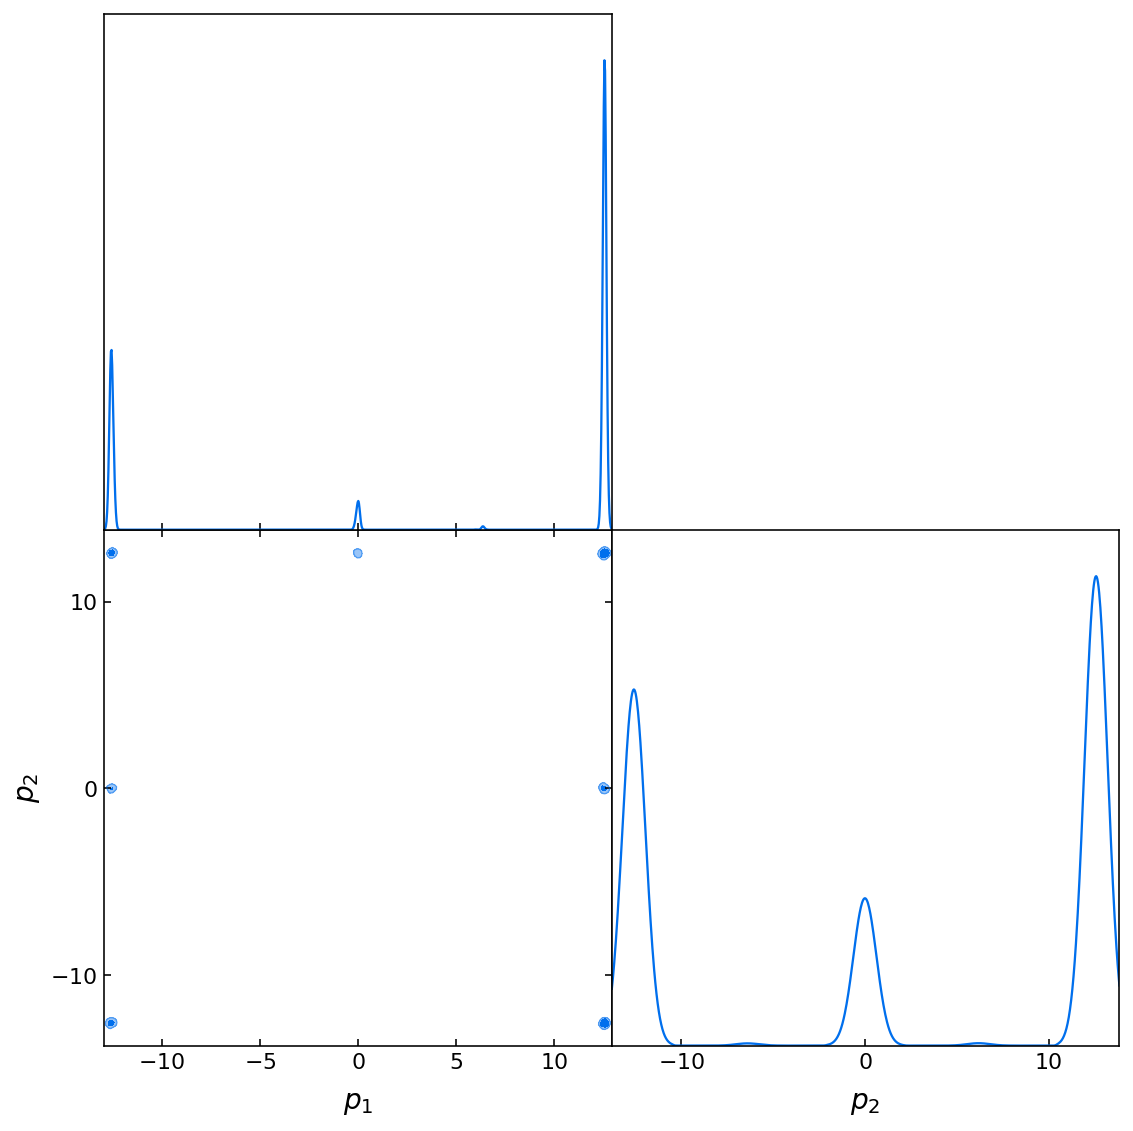

In [14]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

In [13]:
init_samples = mc.makeSingleSamples()

In [14]:
init_samples.shape

(235, 2)

In [15]:
sampler = MCMCSampler(like.x_dim, like, hidden_dim=16, num_blocks=3, flow='spline', prior=prior)

Creating directory for new run logs/test/run35
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

INFO:nnest.trainer:SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            

[nnest.trainer] [INFO] Number of network params: [5844]


INFO:nnest.trainer:Number of network params: [5844]


[nnest.trainer] [INFO] Device [cpu]


INFO:nnest.trainer:Device [cpu]


[nnest.sampler] [INFO] Num base params [2]


INFO:nnest.sampler:Num base params [2]


[nnest.sampler] [INFO] Num derived params [0]


INFO:nnest.sampler:Num derived params [0]


[nnest.sampler] [INFO] Total params [2]


INFO:nnest.sampler:Total params [2]


In [16]:
sampler.run(init_samples=init_samples, bootstrap_iters=2)

[nnest.sampler] [INFO] Alpha [0.7071]


INFO:nnest.sampler:Alpha [0.7071]


[nnest.sampler] [INFO] Using [235] initial samples


INFO:nnest.sampler:Using [235] initial samples


[nnest.sampler] [INFO] Bootstrap step [1]


INFO:nnest.sampler:Bootstrap step [1]


[nnest.trainer] [INFO] Number of training samples [235]


INFO:nnest.trainer:Number of training samples [235]


[nnest.trainer] [INFO] Training jitter [0.2000]


INFO:nnest.trainer:Training jitter [0.2000]


[nnest.trainer] [INFO] Best epoch [380] validation loss [-0.0026]


INFO:nnest.trainer:Best epoch [380] validation loss [-0.0026]


[nnest.sampler] [INFO] Step [500] acceptance [0.5164] min ESS [0.4046] max ESS [0.5315] average jump [0.0606]


INFO:nnest.sampler:Step [500] acceptance [0.5164] min ESS [0.4046] max ESS [0.5315] average jump [0.0606]


[nnest.sampler] [INFO] Bootstrapping [251] samples, ncalls [2803] scale [0.1914]


INFO:nnest.sampler:Bootstrapping [251] samples, ncalls [2803] scale [0.1914]


[nnest.sampler] [INFO] Bootstrap step [2]


INFO:nnest.sampler:Bootstrap step [2]


[nnest.trainer] [INFO] Number of training samples [486]


INFO:nnest.trainer:Number of training samples [486]


[nnest.trainer] [INFO] Training jitter [0.0100]


INFO:nnest.trainer:Training jitter [0.0100]


[nnest.trainer] [INFO] Best epoch [534] validation loss [-0.0384]


INFO:nnest.trainer:Best epoch [534] validation loss [-0.0384]


[nnest.sampler] [INFO] Step [500] acceptance [0.6124] min ESS [1.1779] max ESS [2.5926] average jump [0.1406]


INFO:nnest.sampler:Step [500] acceptance [0.6124] min ESS [1.1779] max ESS [2.5926] average jump [0.1406]


[nnest.sampler] [INFO] Bootstrapping [251] samples, ncalls [5172] scale [0.5327]


INFO:nnest.sampler:Bootstrapping [251] samples, ncalls [5172] scale [0.5327]


[nnest.trainer] [INFO] Number of training samples [737]


INFO:nnest.trainer:Number of training samples [737]


[nnest.trainer] [INFO] Training jitter [0.0100]


INFO:nnest.trainer:Training jitter [0.0100]


[nnest.trainer] [INFO] Best epoch [195] validation loss [-0.0248]


INFO:nnest.trainer:Best epoch [195] validation loss [-0.0248]


[nnest.sampler] [INFO] Step [1000] acceptance [0.3882] min ESS [8.3227] max ESS [9.4953] average jump [0.5577]


INFO:nnest.sampler:Step [1000] acceptance [0.3882] min ESS [8.3227] max ESS [9.4953] average jump [0.5577]


[nnest.sampler] [INFO] Step [2000] acceptance [0.3896] min ESS [19.3522] max ESS [22.1134] average jump [0.5959]


INFO:nnest.sampler:Step [2000] acceptance [0.3896] min ESS [19.3522] max ESS [22.1134] average jump [0.5959]


[nnest.sampler] [INFO] Step [3000] acceptance [0.3883] min ESS [22.4663] max ESS [23.9916] average jump [0.5768]


INFO:nnest.sampler:Step [3000] acceptance [0.3883] min ESS [22.4663] max ESS [23.9916] average jump [0.5768]


[nnest.sampler] [INFO] Step [4000] acceptance [0.3872] min ESS [34.3101] max ESS [39.0359] average jump [0.5678]


INFO:nnest.sampler:Step [4000] acceptance [0.3872] min ESS [34.3101] max ESS [39.0359] average jump [0.5678]


[nnest.sampler] [INFO] Step [5000] acceptance [0.3880] min ESS [46.6486] max ESS [54.5537] average jump [0.5693]


INFO:nnest.sampler:Step [5000] acceptance [0.3880] min ESS [46.6486] max ESS [54.5537] average jump [0.5693]


[nnest.sampler] [INFO] ncall: 22843



INFO:nnest.sampler:ncall: 22843



In [17]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [18]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [19]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)
print(mc.getConvergeTests())

695.6062608202192
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      1.2430853E+00  2.9664287E+00 -2.9159636E+00  3.7134270E+00  two   -3.9235070E+00  3.7922577E+00  two   -3.9442507E+00  3.7852634E+00  two     p_{1}
param2      6.4811229E-01  2.3059363E+00 -2.0395689E+00  3.2706729E+00  two   -3.4473067E+00  3.3796758E+00  two   -3.4414394E+00  3.3573817E+00  two     p_{2}

Best fit sample -log(Like) = -9.462904
Ln(mean 1/like) = -0.745566
mean(-Ln(like)) = -1.075227
-Ln(mean like)  = -2.939124

parameter   bestfit        lower1         upper1         lower2         upper2
param1      3.9735595E+00 -3.9693304E+00  3.9735595E+00 -3.9693304E+00  3.9735595E+00   p_{1}
param2     -1.7142449E+00 -3.6018699E+00  3.5055417E+00 -3.6018699E+00  3.5055417E+00   p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot w

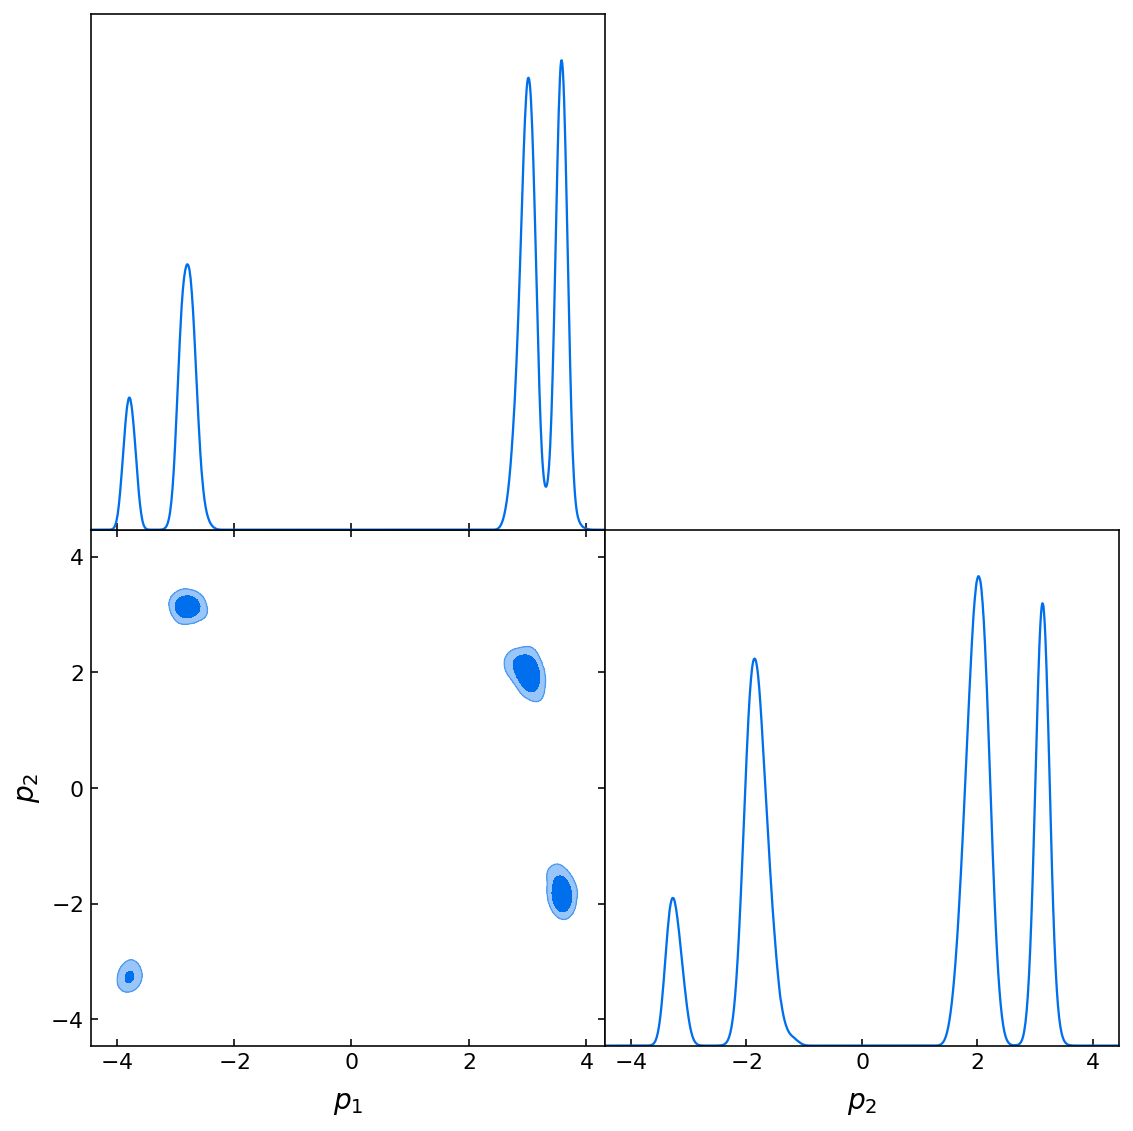

In [20]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

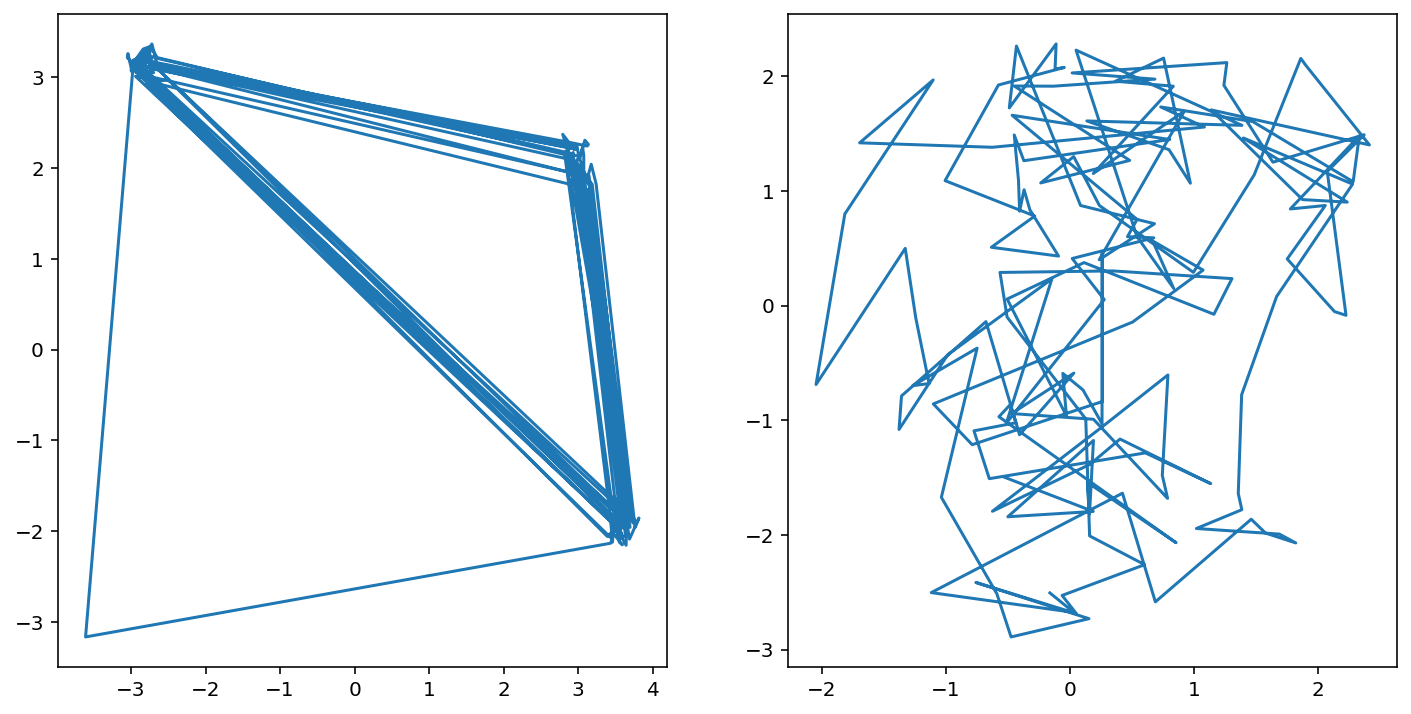

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][2000:2500,0], samples[0][2000:2500,1])
ax[1].plot(latent_samples[0][500:1000,0], latent_samples[0][500:1000,1])
plt.show()

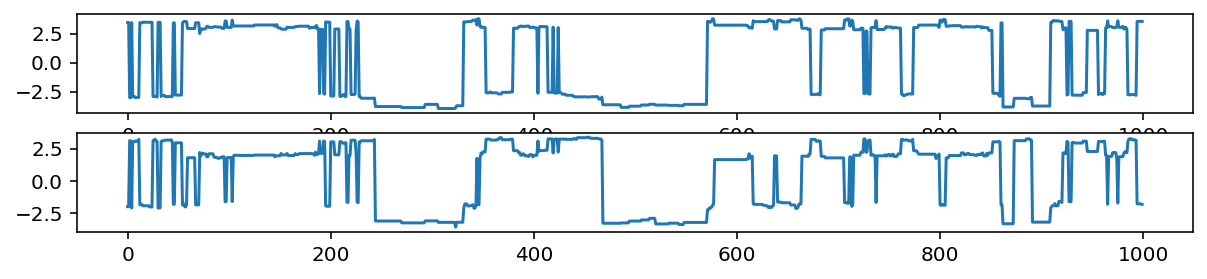

In [22]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim))
for i in range(like.x_dim):
    ax[i].plot(samples[0][500:1500,i])
plt.show()

In [24]:
getdist.set_logging(logging.ERROR)